## Pendahuluan

Data wrangling adalah peroses mengumpulkan, membersihkan, mengorganisir, dan mengubah data mentah menjadi format yang lebih rapi dan siap digunakan untuk analisis atau visualisasi.



## Library of Py

Yang biasanya digunakan adalah **Pandas, Numpy, dan OpenPyXl**.

| Library | Fungsi |
|-|-|
|Pandas| Library utama untuk data wrangling.|
|NumPy|Untuk operasi numerik|
|OpenPyXl|Untuk Manipulasi file Excel|
|marplotlib.pyplot|membuat grafik|


## Call library

In [1]:
#Menghubungkan data dengan google drive
from google.colab import drive

#Mengaktifkan folder  google drive
#drive.mount('/content/drive')

#Import
import pandas as pd
import numpy as np
import openpyxl as op
import matplotlib.pyplot as plt

#Checking if the pacage already to use
print(pd.__version__)
print(np.__version__)
print(op.__version__)
print(plt.__version__)
print(dve.__version__)

2.2.2
1.26.4
3.1.5


AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'

## Pandas data structure (Series)

In [2]:
## Membuat series
kode_barang = ['TZDA','TIRV', 'TEOE', 'T6OG', 'TMOM']
Jumlah_barang = [1, 5, 7, 3, 10]

data_series = pd.Series(Jumlah_barang, kode_barang)
data_series

,0
TZDA,1
TIRV,5
TEOE,7
T6OG,3
TMOM,10


In [3]:
# Mengaksess data
data_series["TMOM"]

# Aksess 2 data
data_series[["TZDA", "TEOE"]]

# Aksess 3 data
data_series[["TZDA", "TEOE", "TMOM"]]

,0
TZDA,1
TEOE,7
TMOM,10


In [4]:
# menambahkan series
# Untuk menambahkan pakai funsi .append
#  Contoh >>> a =a.append(new_data)
# Untuk menhapus
# Contoh >>> a =a.drop(["TZDS"])

## Pandas Data Structure (DataFrame)


In [6]:
dict_data = {
    "nama_barang": ["Indomie", "Taro", "Good Day", "Detergen"],
    "jenis_barang": ["food", "food", "food", "non-food"],
    "jumlah": [5, 2, 1, 1]
}

Data_1 = pd.DataFrame(dict_data)
Data_1

,nama_barang,jenis_barang,jumlah
0,Indomie,food,5
1,Taro,food,2
2,Good Day,food,1
3,Detergen,non-food,1


## Combine Data

|Teknik| Kegunaan|
|-|-|
|concat() |untuk menggabungkan data tanpa kunci (vertikal atau horizontal).|
|merge() |seperti vlookup > untuk penggabungan berbasis kunci (mirip SQL JOIN).|
|join() |untuk penggabungan berbasis indeks.|


Remember : axis = 0 untuk vertikal dan axis = 1 untuk horizontal

default dari axis adalah 0

ignore_index = T, untuk mempertahankan Index awal

defaultnya adalah False


### use concat()

In [7]:
# Buat 2 data dengan nama 'Contoh1' dan 'Contoh2' lalu gabungkan dengan nama file 'gabunga 1'

contoh1 = pd.DataFrame({
    'id': [1,2],
    'nama':['yogi', 'dandi']
})
contoh2 = pd.DataFrame({
    'id':[3,4],
    'nama':['santi', 'gisa']
})

gabungan_1 =pd.concat([contoh1, contoh2], axis = 0, ignore_index= True)
gabungan_1

,id,nama
0,1,yogi
1,2,dandi
2,3,santi
3,4,gisa


In [8]:
#Gabungkan dta tapi jadikan dia dalam colom baru, simpan dalam 'gabungan 2'

a1 = pd.DataFrame({'id': [1, 2], 'name': ['Alice', 'Bob']})
a2 = pd.DataFrame({'age': [25, 30], 'salary': [5000, 6000]})

gabungan2 = pd.concat([a1, a2],axis = 1, ignore_index=True)
gabungan2

,0,1,2,3
0,1,Alice,25,5000
1,2,Bob,30,6000


### Use merge()

Rumus dasarnya adalah seperti berikut :

`result = pd.merge(data1, data2, on='id', how='inner')`

`on` : adalah file kuncian biasa digunaakn untuk lookup, konsep untuk vlookup dalam excel.

`how` : Digunakan untuk jenis margenya.

|how|Fungsi|
|-|-|
|inner|Hanya menyertakan baris dengan nilai kunci yang cocok di kedua DataFrame|
|left|Semua baris dari data1 akan di sertakan, Jika tidak ada pasangan di data2, nilai akan diisi NaN|
|right|Semua baris dari data2 akan disertakan, Jika tidak ada di data 1 akan diisi Nan|
|outher|Semua baris dari data frame akan disertakan|

In [9]:
# Disediakan data sebagai berikut,,
Tes1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
Tes2 = pd.DataFrame({'id': [1, 3, 4], 'age': [25, 30, 35]})

In [10]:
# Gabungkan file dengan nama 'merge1' ambil data yang ada di data 1 saja

marge1 = pd.merge(Tes1, Tes2, on = 'id', how = 'left')
marge1

,id,name,age
0,1,Alice,25.0
1,2,Bob,NaN
2,3,Charlie,30.0


In [11]:
# gabung smua data pastika sesuai yang ada d kolom id lalu, pastikan semua data yang ada d data 1 dan 2 ada
# nama file gabungan 'merge2'

merge2 = pd.merge(Tes1, Tes2, on ='id', how = 'outer')
merge2


,id,name,age
0,1,Alice,25.0
1,2,Bob,NaN
2,3,Charlie,30.0
3,4,NaN,35.0


In [12]:
# gabung data simpan pada nama 'merge3' ambil data 2 saja,

merge3 = pd.merge(Tes2, Tes2, on = 'id', how = 'right')
merge3

,id,age_x,age_y
0,1,25,25
1,3,30,30
2,4,35,35


In [13]:
# Ambil semua data antra tes 1 dan tes 2 sompan dalam file dengan nama 'merge4'
#pastikanyang d ambil yang punya id sam saja ijika tidak ada di antara keduanyagakusah

merge4 =  pd.merge(Tes1, Tes2, on = 'id', how ='inner')
merge4

,id,name,age
0,1,Alice,25
1,3,Charlie,30


### Use join()

Konsepnya sama dengan marge, bedanya ini menggambil dengan index..

In [14]:
# DataFrame pertama
Edata1 = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie'],
    'department': ['HR', 'IT', 'Finance']
}, index=[1, 2, 3])

# DataFrame kedua
Edata2 = pd.DataFrame({
    'age': [25, 30, 35],
    'salary': [5000, 6000, 7000]
}, index=[1, 2, 3])

In [15]:
Edata1

,name,department
1,Alice,HR
2,Bob,IT
3,Charlie,Finance


In [16]:
Edata2

,age,salary
1,25,5000
2,30,6000
3,35,7000


In [17]:
# Gabungkan file Edata1 dan Edata2 dengan join kasih nama 'gab'
gab = Edata1.join(Edata2)
gab

,name,department,age,salary
1,Alice,HR,25,5000
2,Bob,IT,30,6000
3,Charlie,Finance,35,7000


In [18]:
# buat data baru
Edata3 = pd.DataFrame({
    'bonus': [100, 200],
    'overtime_hours': [10, 20]
}, index=[1, 2])
Edata3

,bonus,overtime_hours
1,100,10
2,200,20


In [19]:
#gabungkan Edata1,2 dan 3 pastikan semua data masuk meskipun tidak ada pasanganya
gabungan_join = Edata1.join([Edata3, Edata2], how = 'outer')
gabungan_join

,name,department,bonus,overtime_hours,age,salary
1,Alice,HR,100.0,10.0,25,5000
2,Bob,IT,200.0,20.0,30,6000
3,Charlie,Finance,NaN,NaN,35,7000


Kesimpulan
`join()` cocok untuk penggabungan berbasis indeks.
Anda dapat mengatur how menjadi:
- `left` (default): Semua baris dari DataFrame kiri.
- `right`: Semua baris dari DataFrame kanan.
- `outer`: Semua baris dari kedua DataFrame.
- `inner`: Hanya baris dengan pasangan di kedua DataFrame.


## Membaca data

"membaca data dari file csv"

data = pd.read_csv("expdata1.csv")

Selain data file format ".csv", kita juga bisa membaca file format yang lain menjadi dataframe seperti file format .xls, .xlxs, .json, .stata
* `read_table` --> membaca file format .tsv (tab separate value)
* `read_excel` --> membaca file format .xls atau .xlsx (file excel)
* `read_json` --> membaca file format .json (JavaScript Object Notation)
* `read_stata` --> membaca file format .dta (Stata file format)
* `read_sql` --> membaca file format .db (SQL query)

In [20]:
"""
header = 0 adalah default artinya data akan jadi header paling atas
header = 2 maka akan jdi header baris ke 2
header = none artinya tidak ada header akan menjadi 0 - data
header = none, names["Kolom1", "Kolom2", dst]
"""

data1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA/bank_customer_survey.csv", sep = ',', header = 0)
data1.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [21]:
# Melihat data statistik data
data1.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [22]:
# lihatlah informasi dari data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


## Type data

|Type data|Desc |
|-|-|
|float| Bilangan desimal|
|float64| Bilangan desimal yang bisa menampung lebih banyak|
|int|Bilangan bulat|
|int64|Bilangan bulat yang menampung lebih banyak |
|str|String|
|Categori|Kategorik|
|Bool|True or false|
|Datetime64|Untuk data tanggal|


Pandas akan otomatis membaca jenis data dalam setiap kolom yang dibuat. Tapi, dalam melakukan analisis, kita kadang harus mengubah jenis data dalam kolom tersebut. Misalnya, ingin mengubah data bilangan integer menjadi bilangan decimal. Proses ini dinamakan "casting". Casting ini dapat dengan mudah dilakukan menggunakan pandas. Pandas memiliki fungsi `astype()` yang bisa digunakan untuk melakukan casting.

Misalnya, pada data di bawah ini, saya ingin mengubah data pada kolom "jumlah" dari integer (int64) menjadi decimal (float64)

In [23]:
# Menampilkan type data
data1.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [24]:
# Menampilkan daftar variable yang ber type  Object
data1.select_dtypes(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue,married,secondary,no,no,no,telephone,nov,unknown


In [25]:
# lihat deskripsi data variable education
data1['education'].describe()

""""
Karena data hanya 4 kyknya enak di ubah ke categori
"""

'"\nKarena data hanya 4 kyknya enak di ubah ke categori\n'

In [26]:
# Rubah type data mendjadi category dan periksa apakah sudah sesuai
data1['education'] = data1['education'].astype('category')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  object  
 2   marital    45211 non-null  object  
 3   education  45211 non-null  category
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   contact    45211 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  object  
 16  y          45211 non-null  int64   
dtypes: category(1), int64(8), object(8)
memory usage: 5.6+ MB


## Melihat data

|Fungsi|Kegunaan|
|-|-|
|data1['kolom']	|Menampilkan semua data dalam kolom.|
|data1['kolom'].unique()	|Menampilkan nilai unik dalam kolom.|
|data1['kolom'].nunique()	|Menampilkan jumlah nilai unik.|
|data1['kolom'].value_counts()	|Menampilkan frekuensi nilai unik.|
|data1['kolom'].head()	|Menampilkan 5 data pertama.|
|data1['kolom'].describe()	|Menampilkan statistik kolom (kategori/angka).|

In [27]:
#menampilkan data kolom
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [28]:
# Menampilkan data apa saja yang ada dalam colom / variable (education)
data1['education'].unique()

['tertiary', 'secondary', 'unknown', 'primary']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']

In [29]:
# Menampilkan rinkasan data variable age
data1['age'].describe()

,age
count,45211.000000
mean,40.936210
std,10.618762
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,95.000000


In [30]:
#melihat data llengkap
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  object  
 2   marital    45211 non-null  object  
 3   education  45211 non-null  category
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   contact    45211 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  object  
 16  y          45211 non-null  int64   
dtypes: category(1), int64(8), object(8)
memory usage: 5.6+ MB


## Taking data

### Mengambil data colom

In [31]:
# Mengambil 1 kolom tertentu beri nama data_colom1
data_colom1 = data1['age']
data_colom1.describe()

,age
count,45211.000000
mean,40.936210
std,10.618762
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,95.000000


In [32]:
#Mengambill >2 kolom tertentu [age, duration dan job] berinama data_colom2

data_colom2 = data1[['age', 'duration', 'job']]
data_colom2.describe()

,age,duration
count,45211.000000,45211.000000
mean,40.936210,258.163080
std,10.618762,257.527812
min,18.000000,0.000000
25%,33.000000,103.000000
50%,39.000000,180.000000
75%,48.000000,319.000000
max,95.000000,4918.000000


In [33]:
# mengambil data age dan month dengan job = admin

data_age =data1[data1['job']== 'admin'][['age', 'month']]
data_age

,age,month
10,41,may
11,29,may
16,45,may
25,44,may
32,60,may
...,...,...
45171,33,nov
45173,36,nov
45176,54,nov
45177,36,nov


In [34]:
# Mengambil kolom berdasarkan indeks kolom 3, beri nama kolom_pertama
kolom_pertama = data1.iloc[:,2]

kolom_pertama

,marital
0,married
1,single
2,married
3,married
4,single
...,...
45206,married
45207,divorced
45208,married
45209,married


In [35]:
"""
Ambilkan data pada data1 urutanya kolom ke 2, 5 dan 4 beri nama data3
"""
data3 = data1.iloc[:, [1, 4, 3]]
data3

,job,default,education
0,management,no,tertiary
1,technician,no,secondary
2,entrepreneur,no,secondary
3,blue,no,unknown
4,unknown,no,unknown
...,...,...,...
45206,technician,no,tertiary
45207,retired,no,primary
45208,retired,no,secondary
45209,blue,no,secondary


### Mengambil data baris

In [36]:
# cekan data1 ada varaible apa saja
print(data1.dtypes)

age             int64
job            object
marital        object
education    category
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y               int64
dtype: object


In [37]:
# Cekkan data1 jenis datanya apa sja
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  object  
 2   marital    45211 non-null  object  
 3   education  45211 non-null  category
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   contact    45211 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  object  
 16  y          45211 non-null  int64   
dtypes: category(1), int64(8), object(8)
memory usage: 5.6+ MB


In [38]:
# Ambil semua kolom namun baris 1 sampai 10 saja berinama 'data_baris'
'''cara1'''
data_baris = data1.iloc[0:10,:]
data_baris

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0


In [39]:
'''cara2'''
data_baris1 = data1.head(10)
data_baris1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0


In [40]:
#ambil 10 data terakhir dari data1 beri nama 'data_terakhir
data_terakhir = data1.tail(10)
data_terakhir

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,1
45202,34,admin,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,1
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,1
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,0


In [41]:
#ambilkan data age untuk usia 30 tahun simpan dalam 'data_umur30'
data_umur30 = data1[data1['age']==30]
data_umur30

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
91,30,technician,married,secondary,no,152,yes,yes,unknown,5,may,213,2,-1,0,unknown,0
257,30,technician,single,secondary,no,2573,yes,no,unknown,5,may,67,2,-1,0,unknown,0
265,30,student,single,tertiary,no,25,yes,no,unknown,5,may,89,2,-1,0,unknown,0
284,30,blue,single,secondary,no,0,yes,no,unknown,5,may,5,2,-1,0,unknown,0
332,30,blue,single,secondary,no,-457,yes,no,unknown,5,may,143,2,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45099,30,management,single,tertiary,no,985,yes,no,cellular,25,oct,304,1,94,2,success,1
45115,30,management,single,tertiary,no,565,yes,no,cellular,26,oct,104,1,-1,0,unknown,0
45137,30,management,single,tertiary,no,297,no,no,cellular,8,nov,188,1,-1,0,unknown,1
45138,30,technician,single,secondary,no,500,yes,no,cellular,8,nov,176,1,543,3,failure,0


In [42]:
#ambilkan data age >30 dan job = admin, simpan dalam data "data_filter"
data_filter =data1[(data1['age']==30)&(data1['job']=='admin')]
data_filter

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
529,30,admin,divorced,secondary,no,83,yes,yes,unknown,6,may,310,1,-1,0,unknown,0
551,30,admin,married,secondary,no,46,yes,no,unknown,6,may,114,2,-1,0,unknown,0
750,30,admin,single,secondary,no,115,yes,no,unknown,6,may,66,3,-1,0,unknown,0
780,30,admin,married,secondary,no,4,no,no,unknown,7,may,172,8,-1,0,unknown,0
1167,30,admin,divorced,secondary,no,1,yes,no,unknown,8,may,175,5,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44344,30,admin,single,tertiary,no,8,no,yes,cellular,30,jul,76,2,150,1,failure,0
44422,30,admin,single,secondary,no,3528,no,no,cellular,4,aug,250,1,92,2,failure,1
44523,30,admin,married,secondary,no,590,no,no,cellular,11,aug,443,3,-1,0,unknown,0
44569,30,admin,single,secondary,no,125,yes,no,cellular,16,aug,140,3,116,1,other,0


## Deleting Data

In [43]:
# tampilkan info data

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  object  
 2   marital    45211 non-null  object  
 3   education  45211 non-null  category
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   contact    45211 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  object  
 16  y          45211 non-null  int64   
dtypes: category(1), int64(8), object(8)
memory usage: 5.6+ MB


### Menghapus data colom

In [44]:
#happus kolom loan

data_del = data1.drop(columns =['loan'])
data_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  object  
 2   marital    45211 non-null  object  
 3   education  45211 non-null  category
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   contact    45211 non-null  object  
 8   day        45211 non-null  int64   
 9   month      45211 non-null  object  
 10  duration   45211 non-null  int64   
 11  campaign   45211 non-null  int64   
 12  pdays      45211 non-null  int64   
 13  previous   45211 non-null  int64   
 14  poutcome   45211 non-null  object  
 15  y          45211 non-null  int64   
dtypes: category(1), int64(8), object(7)
memory usage: 5.2+ MB


In [45]:
# Menghapus kolom 'loan' dan 'housing' tambah bebas 1 variable / kolom yg d hapus

data_del2 = data1.drop(columns=['loan', 'housing', 'job'])
data_del2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   marital    45211 non-null  object  
 2   education  45211 non-null  category
 3   default    45211 non-null  object  
 4   balance    45211 non-null  int64   
 5   contact    45211 non-null  object  
 6   day        45211 non-null  int64   
 7   month      45211 non-null  object  
 8   duration   45211 non-null  int64   
 9   campaign   45211 non-null  int64   
 10  pdays      45211 non-null  int64   
 11  previous   45211 non-null  int64   
 12  poutcome   45211 non-null  object  
 13  y          45211 non-null  int64   
dtypes: category(1), int64(8), object(5)
memory usage: 4.5+ MB


### Menghapus data baris

In [46]:
# Menghapus baris ke 2
row_del = data1.drop(index =2)
row_del.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [47]:
# hapus data banyak baris
row_del2 = data1.drop(index =[10, 5, 1])
row_del2.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


## Data Cleaning

In [48]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  object  
 2   marital    45211 non-null  object  
 3   education  45211 non-null  category
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   contact    45211 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  object  
 16  y          45211 non-null  int64   
dtypes: category(1), int64(8), object(8)
memory usage: 5.6+ MB


### Data Duplikar

In [49]:
# Melihat data duplikat, simpan dalam data duplikat
data1.duplicated()

data_duplikar =data1[data1.duplicated]
data_duplikar

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [50]:
data1.duplicated().sum()

0

### Missing value

In [51]:
# menampilkan data kosong
data1.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [52]:
# Missing value menampilkan data kosong simpan dalam 'missing_value'

missing_value =  data1.isnull().any(axis=0)
# > Memeriksa apakah ada nilai kosong di setiap baris, jika 0 untuk kolom
missing_value


,0
age,False
job,False
marital,False
education,False
default,False
balance,False
housing,False
loan,False
contact,False
day,False


### Menghapus data duplikat

In [53]:
# menghapus data duplikat
no_data_duplicate = data1.drop_duplicates()
no_data_duplicate.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### Menghapus missing value

In [54]:
# Menghapus data missing value
no_data_missingvalue = data1.dropna()
no_data_missingvalue.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [55]:
# Mengisi data kosong dengan rata-ratanya saja
data1 = data1.fillna(data1.mean())
data1.head(5)

TypeError: Could not convert ['managementtechnicianentrepreneurblueunknownmanagementmanagemententrepreneurretiredtechnicianadminadmintechniciantechnicianservicesretiredadminblueretiredservicesbluemanagementblueservicesretiredadminmanagemententrepreneurmanagementtechniciantechnicianmanagementadminbluemanagementtechnicianbluetechnicianadminadminservicesmanagementblueretiredretiredadminselftechniciantechnicianmanagementbluemanagementmanagementadmintechnicianentrepreneurmanagementblueblueservicesadmintechnicianblueservicesbluemanagementretiredmanagementtechnicianblueblueservicesmanagementbluetechniciantechnicianblueservicesservicesservicesadminservicestechnicianadminselfblueadmintechnicianmanagementretiredmanagementtechnicianadminblueentrepreneurmanagementblueretiredtechnicianmanagementbluebluebluebluetechnicianbluetechnicianadminretiredmanagementservicestechnicianselfblueretiredblueadminmanagementmanagementtechniciantechnicianblueadminservicestechniciantechnicianadminservicesblueservicesmanagementadmintechnicianadminunemployedbluetechnicianservicesbluebluehousemaidselfunemployedblueblueservicesblueunemployedservicesbluebluestudentmanagementmanagementtechnicianservicesblueretiredblueblueservicestechnicianservicesbluetechnicianadminmanagementtechnicianadminblueblueservicesentrepreneurretiredadminadminunemployedtechnicianservicesmanagementservicestechnicianservicestechnicianadminretiredservicesmanagementbluemanagementretiredmanagementmanagementadminblueblueservicestechnicianmanagementblueadminselfbluestudentservicesservicesmanagementmanagementservicesretiredblueretiredhousemaidservicesbluetechnicianunknownunemployedhousemaidmanagementunemployedblueentrepreneurretiredtechnicianbluemanagementmanagementblueservicesblueservicesentrepreneurblueblueblueadminblueadminbluetechnicianentrepreneuradmintechnicianmanagementmanagementbluemanagementblueservicesadminblueservicestechnicianmanagementblueentrepreneurtechnicianservicesbluebluemanagementtechnicianmanagemententrepreneurstudentmanagementadminbluebluemanagementbluetechnicianentrepreneuradminretiredservicesservicesservicesselfblueadmintechnicianblueblueadminadmintechnicianblueselfmanagementtechnicianstudentmanagementtechniciantechnicianbluestudentbluetechnicianblueadminretiredservicesservicestechnicianmanagementbluebluemanagementadmintechnicianservicesservicesadminadminbluetechnicianretiredbluebluebluemanagementtechnicianadminmanagementbluetechniciantechnicianbluebluebluebluemanagementmanagementblueadmintechnicianadminservicesbluemanagementbluebluemanagementservicestechnicianblueservicesmanagementmanagementblueadminblueunknownadminblueentrepreneurblueadminmanagementservicesservicesadminadmintechnicianadminmanagementadminstudentservicesadminblueadminblueblueadminbluemanagementblueblueservicesmanagementadminblueservicestechnicianunemployedmanagementblueretiredtechniciantechnicianadminbluetechnicianadminadminbluebluehousemaidtechnicianselfservicestechnicianmanagementretiredbluetechnicianblueservicesblueadminadminentrepreneuradmintechnicianunemployedbluetechnicianmanagementmanagementadminbluetechnicianmanagementservicesbluetechnicianblueadminmanagementblueblueblueadminbluemanagementtechnicianadminservicestechnicianblueselftechnicianadmintechnicianselfservicesbluetechnicianservicesmanagementmanagementblueblueadmintechnicianblueblueblueblueblueunemployedservicesretiredadminblueblueselfserviceshousemaidblueblueadminbluemanagementmanagementadminmanagementbluetechniciantechnicianblueservicesmanagementbluemanagementtechnicianbluetechnicianblueblueunemployedblueadminbluebluebluetechnicianadmintechnicianmanagementblueblueblueretiredblueretiredadminretiredadminunemployedbluemanagemententrepreneuradminbluetechnicianbluemanagementmanagementadminmanagementretiredbluemanagementmanagementmanagementadminbluehousemaidservicesmanagementadminblueblueblueblueblueblueservicestechnicianadminunemployedadminblueblueselfservicesservicesadminstudentselfblueadminservicesadminbluetechnicianblueadminentrepreneurtechnicianservicesbluemanagementunemployedblueservicestechnicianbluebluetechnicianservicesretiredentrepreneurtechnicianblueservicesbluetechnicianservicesmanagementtechnicianblueblueservicestechnicianbluetechniciantechnicianadminretiredservicesservicesservicesbluetechnicianselfblueblueservicesbluebluebluetechnicianblueselfservicestechnicianmanagementservicesbluetechnicianmanagementbluebluebluetechniciantechniciantechniciantechnicianretiredtechnicianmanagementunemployedtechnicianadmintechnicianadminadminblueservicesentrepreneurservicesblueunemployedservicesadminmanagementbluebluetechnicianunemployedentrepreneurtechnicianstudentmanagementtechnicianstudentadminselfadmintechnicianblueservicesblueadminmanagementadminservicesadminblueentrepreneurblueadmintechnicianselfservicesblueblueselfbluemanagementmanagementbluetechnicianmanagementadminservicesservicesadminadminmanagementservicesmanagementadminmanagementbluestudentbluetechnicianservicestechnicianentrepreneuradminbluetechnicianmanagementservicesblueadminservicesadminbluetechniciantechniciantechnicianblueadminblueentrepreneurretiredadminadminretiredblueblueadmintechnicianmanagementblueadminblueretiredservicesadminmanagementblueblueentrepreneurbluemanagementservicesbluebluetechnicianretiredmanagementbluemanagementblueblueblueblueselfentrepreneurbluemanagementadminbluemanagementunemployedadminhousemaidadminhousemaidservicestechnicianbluebluetechnicianselftechnicianblueadmintechnicianstudentblueservicesbluetechnicianadmintechnicianservicesbluemanagementblueadminadminblueservicestechniciantechnicianmanagementtechnicianmanagementstudentretiredblueblueretiredblueselfmanagementservicesmanagementblueretiredtechnicianblueservicesblueadminblueservicesservicesretiredtechnicianblueselfbluetechnicianservicesbluebluemanagementtechniciantechnicianservicesservicesblueblueservicesservicesservicesblueretiredmanagementmanagementbluebluemanagementtechniciantechnicianservicesentrepreneurblueadminbluebluetechnicianblueservicesbluemanagementservicesblueadminservicestechnicianmanagementblueblueadminblueservicesblueservicesretiredadminservicesmanagementbluetechnicianbluebluemanagementselfservicesadminbluebluemanagementblueunknownbluetechnicianadminservicesbluehousemaidbluemanagementunemployedmanagementbluemanagementmanagementstudentservicesservicesblueentrepreneurblueblueadminadminblueadminadminservicesadminmanagementmanagementservicesblueretiredselfblueadminmanagementadminselfadminservicesblueblueunemployedadmintechnicianselfservicesbluemanagementservicesblueblueadminretiredblueblueblueblueblueblueadminmanagementservicesblueblueservicesblueservicesadminservicesentrepreneurmanagementtechnicianmanagementtechnicianbluemanagementadmintechnicianblueretiredservicesbluetechnicianretiredmanagementservicesblueadminservicesservicesblueservicesmanagementtechnicianblueretiredunemployedadminretiredmanagementunemployedadminbluetechnicianentrepreneuradminblueunemployedadminentrepreneurtechnicianadminunemployedmanagementblueblueblueblueadminblueservicestechnicianadmintechnicianblueservicesblueservicesblueblueblueservicesbluetechnicianadminmanagementservicesblueblueadminentrepreneurblueentrepreneurtechnicianadmintechnicianbluebluetechnicianmanagementbluebluemanagementservicestechnicianbluebluebluebluebluetechnicianservicesblueadminblueblueadminbluemanagementtechnicianmanagementtechniciantechnicianbluestudentblueblueblueblueblueblueservicesbluetechniciantechnicianblueservicesmanagemententrepreneurservicesbluemanagementmanagementadminunknownblueblueserviceshousemaidbluemanagementtechnicianselftechnicianblueblueblueadminbluebluetechnicianbluebluemanagementmanagementblueadminentrepreneurhousemaidadminblueservicesbluebluebluetechnicianservicesadmintechnicianblueblueservicesadmintechnicianservicesblueblueretiredbluebluebluetechnicianretiredbluebluetechnicianmanagementservicestechnicianblueblueservicesadminadminbluebluebluemanagementbluetechnicianbluemanagementblueservicesentrepreneurtechnicianservicesservicesadmintechnicianadminbluetechnicianadminmanagementtechnicianadminunemployedtechnicianblueretiredadminblueblueselfadminservicesmanagementtechnicianadminmanagementbluebluebluetechnicianbluetechnicianbluebluebluemanagementtechnicianservicesblueadminblueentrepreneurselfmanagementretiredbluemanagementblueentrepreneurbluemanagementmanagementadmintechnicianmanagementhousemaidblueblueentrepreneurunemployedadminbluetechniciantechnicianhousemaidmanagementbluebluebluebluemanagementmanagementblueadminblueblueadminservicesadminadminbluemanagementstudentretiredadminunemployedtechniciantechnicianadmintechnicianblueselfblueentrepreneurtechnicianservicestechnicianblueblueblueservicesmanagementbluetechnicianservicesbluemanagementblueretiredbluemanagementadminservicesservicesselfadminblueretiredtechnicianservicesmanagementtechnicianbluetechnicianadminbluemanagementbluebluemanagementadminselfmanagemententrepreneurtechnicianbluemanagementbluebluemanagementbluetechnicianmanagementblueservicesstudenttechnicianblueadminunknownentrepreneurtechnicianservicesblueservicestechniciantechnicianmanagementtechnicianunemployedmanagementmanagementtechnicianserviceshousemaidbluemanagementbluetechnicianmanagementtechnicianmanagementadminblueblueblueblueservicesblueentrepreneurmanagementservicesbluetechnicianservicesadminbluetechniciantechnicianblueadmintechnicianmanagementtechnicianbluestudentblueadminservicesadminservicestechnicianadminservicestechnicianservicesblueblueblueblueblueblueentrepreneurservicesblueblueblueservicesservicesadmintechnicianunemployedservicesblueselfblueservicesadminservicesmanagementbluestudenttechnicianblueadminadminretiredmanagementadminmanagementmanagementadminhousemaidadminmanagementretiredbluemanagementservicesblueblueblueservicesservicesbluebluemanagementmanagementstudentbluemanagementblueservicesadminbluetechnicianblueservicesservicesbluetechniciantechnicianbluemanagementbluemanagementbluetechnicianmanagementbluebluemanagementbluemanagementtechnicianmanagementblueentrepreneurblueblueadminblueservicesblueblueunemployedblueselftechnicianblueadminblueselfentrepreneurmanagementmanagementservicesservicesentrepreneurblueblueservicesblueblueservicesbluebluemanagementadminblueretiredblueblueblueblueblueservicesbluemanagementbluetechnicianbluebluemanagementtechnicianadminservicestechnicianbluebluemanagementunemployedtechniciantechnicianblueblueblueservicesblueblueblueblueadminmanagementblueblueservicestechnicianentrepreneurselftechnicianmanagementbluemanagementtechnicianbluebluemanagementstudentunemployedservicesmanagementblueadminbluemanagementblueunemployedunemployedblueblueblueblueadminblueunemployedtechnicianservicesmanagementbluetechniciantechnicianbluetechnicianhousemaidmanagementbluemanagementretiredblueadminunemployedblueblueblueblueservicesbluebluetechniciantechnicianselfmanagementservicesservicesmanagementbluemanagementtechnicianselfservicesmanagementunemployedbluebluebluemanagementmanagementmanagementblueblueblueblueadminadminbluetechnicianbluebluebluemanagementadminmanagementmanagementunemployedtechnicianmanagementtechnicianbluebluetechnicianmanagementbluebluebluemanagementservicesblueadminbluemanagementblueservicesservicesadminmanagementmanagementservicesblueblueadminbluemanagementadmintechniciantechniciantechnicianselftechnicianbluemanagementblueblueservicesadmintechnicianblueentrepreneurtechnicianblueservicesblueadminblueblueadminadminadminbluemanagementbluebluebluebluetechniciantechniciantechnicianbluebluebluetechniciantechnicianbluemanagementbluehousemaidblueblueunemployedserviceshousemaidblueadmintechnicianunemployedblueblueservicestechnicianmanagementbluebluebluetechnicianservicesbluetechniciantechnicianbluemanagementhousemaidtechnicianblueadminmanagementadminblueblueblueservicesblueblueblueadminmanagementtechnicianservicesmanagementblueretiredservicesservicesblueblueselfbluebluemanagemententrepreneurservicesunemployedretiredbluemanagementadminstudentblueservicesadminadminmanagementbluetechnicianadminblueblueselfmanagementblueadminservicesblueservicesbluetechniciantechnicianblueblueadminbluebluemanagementadminmanagementblueadminselftechnicianunemployedtechnicianblueservicesunemployedtechnicianstudenttechnicianadminbluetechnicianblueadmintechnicianmanagementblueblueservicesblueservicesserviceshousemaidunemployedservicesadminmanagementtechnicianadminbluebluemanagementmanagementbluebluebluebluemanagemententrepreneuradminbluemanagementbluebluebluetechnicianservicesadminunemployedservicesblueservicesblueservicesretiredadminbluemanagementmanagementtechnicianblueservicesstudententrepreneurmanagementbluemanagementservicesbluebluebluemanagementbluebluestudentselfbluemanagementbluebluemanagementmanagementblueblueservicestechnicianstudentbluebluetechnicianmanagementadminblueunemployedretiredservicesservicestechniciantechnicianmanagementbluebluebluebluetechnicianblueblueblueadminbluetechnicianbluetechnicianbluetechnicianbluebluebluetechnicianservicesmanagementbluebluebluebluebluemanagementbluebluetechnicianservicesservicesadminblueblueadminunemployedbluetechnicianblueentrepreneurmanagementbluetechnicianservicestechnicianselfblueserviceshousemaidmanagementtechnicianentrepreneurselfbluemanagemententrepreneurtechnicianentrepreneuradminblueblueadmintechnicianadminbluebluemanagementservicesservicesbluebluetechnicianadminadminblueservicesbluemanagemententrepreneurmanagementbluetechnicianstudentblueservicesmanagementbluemanagementmanagementbluetechnicianstudentadminservicesadminadminbluemanagementadminblueadminblueblueadminbluemanagementblueadminunemployedblueblueadminservicesbluetechnicianblueblueadminblueadminbluebluemanagementblueblueblueselfbluemanagementmanagementmanagementblueblueadminservicesmanagementblueservicesselfmanagementunemployedentrepreneuradmintechnicianblueblueadminselfadminmanagementbluemanagementadminmanagemententrepreneurservicesselfservicesadminblueblueblueservicesadminbluemanagementmanagementunemployedmanagementtechnicianbluemanagementmanagementservicesbluebluetechnicianblueblueblueadmintechnicianservicesmanagementservicesmanagementbluebluetechniciantechnicianmanagementbluetechnicianselfblueunknownadminmanagementbluemanagementmanagementadminblueunemployedbluebluemanagementblueunemployedstudentadminblueblueservicesretiredadminunemployedblueservicesbluetechnicianbluetechniciantechnicianretiredmanagementbluetechnicianadminservicestechnicianblueadminmanagementblueselfmanagementservicesunemployedblueservicesmanagementblueservicestechnicianmanagementmanagementservicesblueblueblueservicestechnicianbluebluemanagementbluemanagementmanagementtechnicianblueadminblueadminbluebluebluestudentretiredblueentrepreneurblueselftechnicianservicesservicesentrepreneurblueadminselftechniciantechnicianblueblueadmintechnicianadminadminblueservicesentrepreneuradminretiredtechnicianadmintechnicianadmintechnicianblueadminretiredservicestechnicianblueentrepreneurservicesbluemanagementblueblueadminblueservicesblueblueblueblueadminadminentrepreneurbluebluebluemanagementservicesblueblueblueadminbluemanagementtechniciantechnicianadminservicesservicesservicesblueservicestechnicianretiredtechnicianbluetechnicianblueservicesblueunemployedadminentrepreneurbluetechniciantechnicianmanagementadminadminblueadminadminblueservicesadminservicesblueblueblueunemployedbluemanagementbluebluetechniciantechnicianbluemanagementadminstudentservicesblueadminadminbluebluemanagementstudentmanagementtechnicianbluebluemanagementadminhousemaidentrepreneurbluetechnicianadminbluemanagementselfmanagementtechnicianmanagementservicesbluebluemanagementadminbluestudentadminentrepreneurblueentrepreneurselfmanagementmanagementmanagementtechnicianadminblueblueservicesbluemanagementbluemanagementblueblueunemployedadminentrepreneurblueblueadminmanagementservicestechnicianservicesblueblueblueentrepreneurblueblueblueadminadminmanagementadmintechnicianbluetechnicianblueblueadminblueblueentrepreneurbluetechnicianselfblueunemployedblueservicesbluehousemaidadminblueadminmanagementbluetechnicianadminservicesadminbluebluetechnicianbluebluetechniciantechnicianadminadminservicesblueblueservicesblueentrepreneurbluetechnicianblueservicestechnicianmanagementadminbluetechnicianbluebluemanagemententrepreneuradmintechnicianservicesservicestechnicianbluebluetechnicianstudentblueunemployedservicesmanagementtechnicianadminblueadminbluetechnicianservicesmanagementadminmanagementservicesmanagementservicesbluetechnicianblueblueunemployedblueservicesretiredblueblueadminblueadmintechnicianservicesblueretiredblueblueadminblueadminbluebluebluemanagementretiredservicesservicesadminservicesadminmanagementbluebluetechnicianbluetechnicianmanagementtechnicianselfmanagementblueblueblueadminblueblueservicesblueadminbluetechniciantechnicianretiredblueunemployedselfbluetechniciantechnicianunemployedtechnicianmanagementselfblueblueservicesretiredretiredmanagementbluemanagementservicesblueretiredbluebluebluebluetechnicianadminservicesretiredmanagementservicesblueselftechniciantechnicianretiredblueadminentrepreneurbluetechniciantechniciantechnicianmanagementservicesservicesmanagementbluemanagementmanagemententrepreneurmanagementretiredtechnicianblueadminmanagementservicesentrepreneuradminentrepreneurmanagementservicesblueblueblueunemployedadminretiredtechnicianadminblueservicesblueblueservicesblueentrepreneurtechnicianmanagementblueadminretiredmanagementmanagementservicesentrepreneurblueselfmanagementmanagementblueretiredadminservicesmanagementselfblueblueretiredtechnicianadminblueretiredtechnicianadminservicestechnicianblueentrepreneurretiredblueadminadminbluemanagementadminadmintechnicianbluetechnicianadminunemployedentrepreneurbluemanagementhousemaidblueselfbluemanagementadminblueadminadminretiredtechnicianbluetechnicianadmintechnicianadmintechnicianmanagementservicesbluebluebluebluemanagementbluetechnicianmanagementblueservicesmanagementblueadminservicesblueadmintechnicianbluetechnicianservicestechnicianblueblueblueretiredadminservicesbluemanagementservicestechnicianadminmanagementmanagementblueblueentrepreneurmanagementservicesservicesblueblueservicesadminbluetechnicianmanagementtechnicianbluemanagementblueadminblueblueblueservicesretiredretiredblueblueblueadmintechniciantechnicianbluemanagementmanagementretiredblueblueblueentrepreneurmanagementblueadminbluebluetechnicianbluetechnicianbluebluetechnicianbluebluetechnicianentrepreneurbluehousemaidblueblueselftechnicianretiredmanagementretiredservicesmanagementmanagementretiredadminselftechnicianretiredretiredservicesmanagementbluebluebluehousemaidblueblueadminblueservicesblueservicesblueadminadminblueblueblueentrepreneuradminblueblueblueretiredtechnicianbluemanagementbluetechnicianmanagementmanagementblueservicestechnicianblueblueunknownblueunemployedtechnicianbluetechnicianservicesblueadminbluetechnicianblueadminentrepreneurbluemanagementadminadminblueservicesadminblueretiredblueentrepreneuradminmanagementretiredtechnicianbluetechnicianblueblueadminblueadminbluebluetechnicianentrepreneurbluetechnicianbluebluehousemaidbluebluetechniciantechnicianblueblueadminservicesblueselfmanagementtechnicianadminmanagementtechnicianmanagementmanagementmanagementtechnicianadminbluebluetechnicianblueblueentrepreneurtechnicianbluetechnicianstudentbluebluetechniciantechnicianbluetechniciantechnicianblueretiredservicesmanagementmanagementmanagementbluemanagementadminblueadminmanagementtechnicianbluemanagementadminblueadminadminservicesmanagementadminmanagementunemployedtechnicianentrepreneurmanagementservicesretiredtechnicianretiredservicesadminbluetechnicianadminunknowntechnicianmanagementtechnicianretiredretiredhousemaidunknownblueunemployedmanagementbluebluemanagementbluetechnicianadminblueblueblueselfunemployedmanagementmanagementblueblueblueadminentrepreneurblueservicesbluebluebluebluetechnicianbluebluebluebluetechnicianadminblueadminblueblueblueretiredtechnicianmanagementbluemanagementblueadminmanagementmanagementbluebluemanagementadminblueretiredblueretiredentrepreneuradminblueselfmanagementtechnicianblueunemployedblueadmintechnicianadminblueunemployedbluebluetechnicianblueblueadmintechnicianservicesblueblueretiredblueblueadminservicestechnicianbluebluebluemanagementtechnicianservicestechnicianentrepreneurblueretiredmanagementselftechnicianbluemanagementservicesretiredbluemanagementbluetechniciantechnicianselfbluemanagementretiredblueblueadminblueservicesmanagementtechnicianentrepreneurblueentrepreneurentrepreneurblueblueentrepreneurmanagementbluemanagementbluetechnicianselfadmintechnicianentrepreneurblueentrepreneurservicesadmintechnicianblueretiredunemployedretiredmanagementblueadminbluebluemanagementblueservicesblueservicesblueblueservicesmanagementbluemanagementblueblueservicesservicestechnicianservicesservicesadminunemployedblueblueblueblueservicesbluetechnicianadminstudentadminentrepreneurmanagementblueblueadminadminbluetechnicianservicesadminadmintechnicianselfservicestechnicianblueunemployedmanagementservicestechnicianbluehousemaidservicesblueadminbluebluemanagementservicesmanagementbluetechniciantechnicianhousemaidretiredadminadminbluemanagementservicesadmintechnicianblueadminblueretiredmanagementselfmanagementtechnicianadminblueservicesbluestudentservicesservicestechniciantechnicianblueadmintechnicianblueblueblueentrepreneurunemployedunemployedadminhousemaidblueblueblueblueblueblueadmintechnicianblueadminblueentrepreneurunemployedblueadminbluebluetechnicianadmintechnicianbluebluebluebluetechnicianbluebluetechnicianadminmanagementadminretiredblueblueblueadmintechniciantechnicianblueadminservicestechnicianbluebluebluemanagementtechnicianblueretiredselfadminbluetechniciantechnicianbluebluebluebluebluemanagementmanagementtechnicianstudentservicesadminselftechniciantechnicianmanagemententrepreneurbluemanagementadminmanagementservicesblueblueretiredtechnicianblueservicesadminmanagementservicesmanagemententrepreneurservicesmanagementunemployedbluemanagementhousemaidblueblueadminadminadminmanagementtechnicianadminmanagementadminmanagementtechnicianhousemaidservicesadminservicesservicesentrepreneurretiredtechnicianretiredmanagementservicesblueblueretiredtechnicianadminadminretiredunemployedretiredservicesblueadminselftechnicianmanagementservicesmanagementtechnicianservicesservicesservicesmanagementtechnicianentrepreneurblueblueselfretiredentrepreneurblueblueblueblueretiredblueentrepreneurmanagementblueblueadminblueadminmanagemententrepreneurbluebluebluebluebluetechniciantechnicianblueblueblueblueadminservicesblueservicesadminbluebluehousemaidblueunemployedblueentrepreneurretiredbluemanagementservicesservicesblueblueblueblueretiredadminblueblueentrepreneurblueentrepreneurentrepreneurentrepreneurblueblueblueservicesmanagementblueentrepreneuradminmanagementtechniciantechnicianmanagementretiredtechniciantechnicianblueadminretiredblueentrepreneurselfblueadminretiredbluetechnicianunknownadminservicesentrepreneurbluemanagementservicesentrepreneurbluemanagementservicesretiredblueentrepreneurblueblueadminblueretiredretiredbluebluetechnicianblueservicesblueblueservicesmanagementadminblueblueblueblueblueservicesmanagementadmintechnicianretiredmanagementblueentrepreneurhousemaidstudentadminadminservicesmanagementmanagementmanagementtechnicianservicesblueadminretiredblueretiredblueadminadminservicesbluetechniciantechnicianmanagementbluetechnicianbluebluemanagementservicesblueblueservicesbluetechnicianservicestechnicianmanagementblueadminmanagementselfblueretiredmanagementblueblueadminservicesadminunemployedmanagementservicesmanagementblueentrepreneurbluemanagementservicesservicesbluetechnicianmanagementbluebluebluemanagementtechniciantechniciantechnicianservicesmanagementunemployedservicesselfblueservicestechnicianadminbluehousemaidblueselfmanagementstudentadminservicesadmintechnicianservicesadminbluetechniciantechnicianblueunemployedmanagementmanagementstudentunemployedentrepreneuradmintechnicianretiredmanagemententrepreneurbluemanagementtechnicianmanagementtechnicianservicesadminblueadminbluemanagementmanagemententrepreneurbluemanagementtechnicianbluemanagementservicesadminbluetechnicianmanagementblueblueservicesmanagementbluemanagementmanagementadminmanagementtechnicianserviceshousemaidmanagementblueretiredmanagementmanagementblueunknownservicesbluetechnicianblueretiredbluehousemaidservicesblueblueblueblueblueblueblueblueservicesblueblueblueblueblueblueblueadminservicesselfmanagementtechniciantechnicianbluehousemaidservicesbluetechnicianmanagementmanagementbluebluetechnicianadminblueblueblueretiredblueadminbluebluemanagementmanagementblueadminblueblueservicesservicesservicestechnicianbluetechnicianbluetechnicianblueservicesbluemanagementmanagementbluebluebluemanagementbluebluemanagementmanagementblueretiredtechnicianadmintechnicianadminentrepreneurtechniciantechnicianblueservicesmanagementblueadminunemployedtechnicianbluebluetechnicianservicesblueadminselfadmintechnicianretiredmanagementadminmanagementmanagementservicesadminblueretiredbluebluemanagementservicestechnicianbluetechniciantechniciantechniciantechnicianbluemanagementbluetechnicianretiredservicesadminblueentrepreneurblueblueselfmanagementselfbluemanagementblueblueblueadminmanagementretiredadmintechnicianblueadminblueadmintechnicianbluemanagementtechnicianmanagementblueblueblueadminbluetechnicianhousemaidretiredtechnicianservicesservicesadminmanagementbluetechnicianselfmanagementservicestechniciantechnicianstudentadminmanagementmanagementmanagementadmintechnicianselfmanagementservicesservicesserviceshousemaidbluemanagementadminadminblueadminservicesmanagementselftechnicianblueadminservicesblueblueunemployedtechnicianadminadminadminservicesadminmanagementtechnicianbluehousemaidservicesmanagementmanagementadminblueunemployedtechnicianbluebluemanagementservicesmanagementblueadminentrepreneurtechnicianadminblueservicesentrepreneurmanagementmanagementservicesblueblueselfadminservicesservicesadminservicesservicesretiredentrepreneurservicesbluebluebluetechnicianadminretiredadminblueblueadminbluemanagementservicesblueservicesbluetechnicianmanagementadminbluemanagementmanagementtechnicianbluebluebluetechnicianblueadmintechnicianadminblueretiredblueblueblueadminbluebluetechnicianblueblueadmintechnicianblueselfselfblueadminblueadminadminselfblueadminblueadminblueservicesblueunemployedentrepreneurretiredblueservicesservicesmanagementbluebluebluetechnicianbluetechniciantechniciantechnicianmanagementbluetechniciantechnicianbluehousemaidbluetechniciantechnicianblueservicesservicesbluebluebluemanagementbluehousemaidtechnicianmanagementmanagementblueservicesmanagementtechniciantechnicianunemployedblueblueservicesadminadminmanagementmanagementadminbluebluetechnicianentrepreneurtechnicianadminblueentrepreneurblueadmintechnicianunemployedtechnicianselfmanagementmanagementblueblueentrepreneurretiredblueservicesmanagementmanagementblueblueservicesmanagementtechnicianadmintechniciantechnicianretiredtechnicianservicesmanagementretiredadminselftechnicianblueservicesmanagementmanagementservicesadminservicesbluetechnicianmanagementservicestechnicianmanagementtechnicianhousemaidmanagementservicesentrepreneuradmintechnicianadmintechnicianblueunemployedblueblueblueservicestechniciantechnicianbluetechnicianservicestechnicianblueadminblueblueadminmanagementblueblueretiredbluemanagementadminadmintechniciantechnicianblueadminmanagementblueservicesblueblueblueadminbluemanagementbluebluetechnicianselftechnicianblueblueservicesadminbluemanagementmanagementmanagementservicesunknownbluebluebluetechnicianbluebluebluebluetechnicianblueblueblueentrepreneurtechnicianadminservicesbluetechnicianservicesmanagementblueblueunknownservicesbluemanagementservicesadmintechnicianbluebluemanagementservicesservicesselfselfblueblueunemployedmanagementbluetechnicianadminadminretiredtechnicianblueblueservicesblueblueservicesselfmanagementmanagementmanagementmanagementblueselfblueretiredmanagementblueadminblueblueadminservicesmanagemententrepreneurbluebluemanagementbluetechnicianmanagementmanagementservicesblueblueblueblueretiredunemployedservicesservicesbluemanagementservicestechnicianbluemanagementtechnicianadminblueadminservicesblueentrepreneuradmintechnicianservicesservicesservicesadminservicesservicesadminblueadmintechnicianbluebluetechniciantechnicianadminadminadminservicesmanagementservicesmanagementtechnicianservicesbluemanagementbluemanagementbluemanagementtechnicianservicesservicesblueblueunemployedadminmanagementservicesbluebluebluetechnicianadminbluetechniciantechnicianstudentunemployedbluebluemanagementtechnicianservicesbluetechnicianservicestechnicianblueblueentrepreneurblueblueadminhousemaidadminstudentbluetechnicianblueblueblueservicesblueblueblueadmintechnicianentrepreneurblueblueblueservicestechnicianblueentrepreneurservicesblueadminblueservicestechnicianbluemanagementmanagementbluemanagementtechniciantechnicianadminentrepreneurblueservicesmanagementblueentrepreneurblueservicestechnicianmanagementretiredbluebluetechnicianbluetechnicianbluestudentadminbluebluebluebluebluemanagementretiredmanagemententrepreneurbluemanagemententrepreneurtechnicianmanagementunemployedtechniciantechnicianmanagementbluebluebluetechnicianblueselftechnicianadminblueservicesadminselftechnicianservicesservicesblueblueblueselfblueblueservicesbluemanagementmanagementblueadminmanagementadminblueblueblueadminbluemanagementbluebluetechniciantechnicianbluebluebluemanagementmanagementmanagementstudentservicesadminservicesbluebluemanagementblueservicesblueblueblueadminblueadminbluemanagementtechnicianbluemanagementblueadminbluebluetechniciantechnicianbluebluemanagementtechnicianstudentmanagementblueservicesblueentrepreneuradminretiredmanagementmanagemententrepreneurservicesservicesmanagementbluemanagementbluebluemanagementbluetechnicianmanagementblueadminbluetechnicianmanagementbluetechnicianbluebluetechnicianmanagementtechnicianmanagementblueblueblueblueretiredadminbluetechnicianbluetechnicianmanagementtechnicianservicesadminselfmanagementbluemanagementblueblueadminblueblueservicesadminmanagementtechnicianbluebluemanagementblueservicestechnicianblueblueservicesblueadmintechnicianbluemanagementmanagementretiredservicestechnicianmanagementselfselfservicesbluestudentmanagementtechnicianmanagementmanagementmanagementadminservicesadminmanagementtechnicianservicesmanagementmanagementadmintechnicianbluemanagementmanagementblueadminbluemanagementmanagementblueentrepreneurbluemanagementunemployedbluemanagementmanagementbluebluebluebluemanagementservicesmanagementservicesservicestechnicianbluetechnicianservicesadminstudenthousemaidblueselfunemployedmanagementtechnicianservicesblueselfadminadminmanagementstudentbluebluebluemanagementblueservicesservicesunemployedblueblueservicesadminblueservicesservicesblueblueselftechnicianmanagementservicesservicestechnicianhousemaidmanagementretiredtechniciantechnicianadminadmintechniciantechnicianbluebluetechnicianservicesretiredhousemaidservicesentrepreneurbluetechnicianadmintechnicianadminhousemaidtechnicianadminblueadmintechnicianadmintechnicianadminblueblueblueservicesservicesmanagementmanagementbluebluebluetechnicianentrepreneurservicesmanagementtechnicianselfmanagementadminentrepreneurblueblueblueservicesservicesbluetechniciantechniciantechnicianbluemanagementblueadminservicesadminblueservicesbluebluebluemanagementservicesadminbluebluemanagementselfhousemaidbluestudenttechnicianservicesadmintechnicianblueblueadminmanagementadminbluemanagementbluemanagementadminmanagemententrepreneurservicesbluebluemanagementretiredadminhousemaidmanagementblueservicesblueservicesadmintechnicianmanagementservicesblueserviceshousemaidservicesbluetechnicianservicesbluemanagemententrepreneurunemployedhousemaidblueadminblueservicesselfadminbluebluebluemanagemententrepreneurhousemaidblueblueservicesblueentrepreneurtechnicianblueservicesentrepreneurmanagementunemployedbluebluebluebluetechnicianmanagementblueadminmanagementservicesstudententrepreneurmanagementservicesadminmanagementmanagementblueblueblueadminadminbluebluebluemanagementadmintechnicianservicesservicesblueservicesbluetechnicianmanagementblueblueblueblueservicesservicesbluetechnicianhousemaidmanagementbluetechnicianadmintechniciantechnicianmanagementservicesblueselftechnicianunemployedmanagementadmintechnicianmanagementblueservicesblueentrepreneurmanagementtechnicianbluetechnicianselftechnicianservicesservicesservicesbluemanagementbluebluebluebluebluebluebluebluemanagementadminretiredmanagementbluemanagementadminservicesbluebluebluetechnicianblueblueblueservicesblueunemployedbluemanagementmanagementservicesservicesbluetechnicianblueservicestechnicianblueblueblueblueadmintechniciantechnicianservicesbluetechnicianbluebluestudentunemployedservicesblueadminbluemanagemententrepreneurtechnicianunemployedbluebluebluetechnicianunknownblueservicesblueadminmanagementblueblueblueblueblueblueservicesblueblueblueblueservicesmanagementtechnicianbluebluemanagementadmintechnicianblueblueblueretiredtechnicianservicesmanagementadminmanagementadminservicesbluebluemanagementmanagementblueunemployedmanagementblueservicesmanagementservicestechniciantechnicianservicesblueservicesadminadminmanagementblueblueentrepreneuradminmanagementtechnicianadmintechnicianbluemanagementtechnicianstudentbluebluemanagementbluemanagementtechnicianmanagementtechnicianbluetechnicianblueblueblueservicesentrepreneurservicestechniciantechniciantechnicianmanagementbluetechnicianbluetechnicianadminblueadmintechnicianselfservicesservicesservicesmanagementmanagementselfservicesblueentrepreneurtechnicianmanagementbluemanagementtechniciantechnicianadminmanagementtechnicianblueselfmanagementservicesadminblueservicesentrepreneurblueblueunemployedservicesbluebluemanagementmanagementblueblueentrepreneurtechnicianbluetechnicianbluebluetechnicianbluetechnicianretiredbluemanagementtechnicianblueblueblueadminservicestechnicianadminbluetechniciantechnicianbluetechnicianservicestechniciantechnicianmanagementbluetechnicianservicesentrepreneurretiredtechnicianbluebluemanagementservicesbluebluebluemanagementmanagementbluetechnicianservicesadminblueadminblueblueunemployedtechnicianbluetechnicianservicestechniciantechnicianmanagementadminretiredmanagementblueblueadminblueservicesadminmanagementtechniciantechnicianbluebluemanagementblueentrepreneurtechnicianmanagementservicesbluetechnicianbluebluetechnicianentrepreneuradmintechnicianmanagementselftechnicianmanagementservicesmanagementmanagementblueblueblueblueblueselftechnicianblueadmintechnicianmanagementbluemanagementtechnicianselfmanagementadminmanagementstudentmanagementbluemanagementtechnicianmanagementservicesmanagementmanagementmanagementtechnicianselfblueblueselfmanagementunemployedservicesservicestechniciantechnicianselftechnicianhousemaidmanagementservicesadminmanagementbluetechniciantechnicianbluemanagementmanagementmanagementtechnicianblueblueblueretiredservicestechnicianblueservicesbluebluemanagementservicestechnicianblueservicesservicesmanagementservicesmanagementblueentrepreneurservicesunemployedbluetechnicianbluetechnicianbluebluemanagementservicesadminbluemanagementtechnicianentrepreneurbluebluebluebluemanagementbluetechnicianadminbluemanagementselfadminretiredblueservicesblueentrepreneurblueservicesmanagementselfadminmanagementmanagementmanagementblueservicesadminblueblueblueblueunemployedblueblueblueblueadminbluetechnicianbluemanagementservicesbluebluebluebluebluebluetechnicianblueblueselfservicesadmintechniciantechnicianmanagementmanagementtechnicianblueservicestechnicianmanagementtechnicianbluemanagementblueadmintechnicianblueservicesentrepreneurblueadminservicesbluetechnicianadminblueservicesmanagementadminadminadminbluebluetechnicianbluemanagementretiredbluebluebluebluebluemanagementservicestechnicianbluemanagementtechnicianbluebluebluebluebluebluebluebluetechnicianbluehousemaidbluebluebluebluemanagementadminentrepreneurblueservicesservicesmanagementbluemanagementunemployedbluebluebluemanagementmanagementbluemanagementmanagemententrepreneurblueblueservicesbluetechnicianmanagementmanagementadminselfblueservicesmanagementblueservicesbluemanagementservicesadmintechniciantechniciantechniciantechnicianblueblueblueadminselfmanagementtechniciantechnicianselfentrepreneurtechnicianbluetechnicianbluebluemanagementmanagementbluetechnicianbluetechnicianbluebluebluetechnicianblueselfselfbluebluetechnicianentrepreneurservicestechnicianbluebluetechnicianbluetechnicianblueblueblueselfbluetechnicianmanagementblueservicesbluetechnicianservicesblueblueservicesmanagementservicesservicesservicesblueservicestechnicianbluebluemanagementadminselfadminadminmanagementblueadminmanagementtechnicianmanagementservicesstudentblueselfbluemanagementselfmanagementadminmanagementmanagementtechnicianbluetechnicianadminmanagementtechnicianmanagementtechnicianentrepreneurservicestechnicianstudentblueadmintechnicianbluebluetechnicianentrepreneurblueadmintechnicianmanagementblueretiredblueadminmanagementbluemanagementbluehousemaidbluemanagementtechnicianblueservicesblueselfmanagementblueblueadminmanagementtechnicianbluetechniciantechnicianmanagementhousemaidadminbluebluemanagementtechnicianretiredselfbluebluebluestudentmanagementtechnicianadminmanagementblueblueadmintechnicianblueblueservicesservicestechniciantechnicianbluetechnicianmanagementblueadminblueservicestechnicianadminadminadminunemployedservicesservicesmanagementtechniciantechnicianmanagementtechnicianservicesbluemanagementblueservicesblueadmintechnicianbluebluetechniciantechnicianblueservicestechnicianbluemanagementmanagementmanagementbluemanagementservicesservicesadminbluetechniciantechnicianunemployedtechnicianbluemanagementadminunemployedmanagementadminunemployedselfadminservicesadminservicesservicesadminblueadminservicesbluebluebluemanagementservicesservicesmanagementbluemanagementblueblueblueblueadmintechnicianadminbluemanagementmanagementservicesblueadminentrepreneurmanagementtechnicianadmintechnicianentrepreneuradminadminadminservicesservicesadminblueentrepreneurblueadminservicestechnicianmanagementadminbluetechnicianblueblueselfmanagementbluebluemanagementbluebluetechniciantechnicianblueselfblueservicesbluebluetechnicianadminadminblueblueselfblueentrepreneurtechnicianbluetechnicianblueblueservicesmanagementbluebluetechnicianretiredbluebluebluemanagementblueservicesblueadminmanagementbluemanagementmanagementmanagementtechnicianservicesselfbluebluebluemanagementbluetechnicianmanagementtechnicianadminadminbluemanagementtechnicianbluetechnicianstudentadminblueblueblueservicesadminadminmanagementadminadminmanagementadminadminbluetechnicianselfblueblueblueadminblueservicesselfservicesentrepreneurbluebluebluemanagementmanagementblueblueblueadminadminbluemanagementblueblueservicesblueblueentrepreneurblueretiredblueblueunemployedtechnicianblueblueblueentrepreneurtechnicianbluebluebluetechnicianselfadminmanagementbluemanagementadmintechnicianmanagementservicesadminblueblueadminblueadminmanagementblueadminblueadminstudentservicesblueadminretiredtechnicianmanagementmanagementtechnicianservicesblueadmintechnicianservicesadminretiredtechnicianblueservicesadminbluetechniciantechnicianunemployedservicesblueblueblueretiredtechniciantechniciantechnicianservicestechnicianblueblueentrepreneurservicesretiredservicesadminbluetechnicianadminadminblueblueadminblueadmintechnicianblueunknownadminblueadminservicestechnicianblueservicesadminblueblueselfbluetechniciantechnicianstudentservicestechniciantechnicianbluetechnicianmanagementadminbluebluetechnicianadminadminmanagementmanagementtechnicianunemployedadminservicesblueservicestechnicianadminservicesunemployedbluemanagementservicesadminadmintechnicianblueblueservicesservicestechnicianservicesservicestechniciantechnicianmanagementtechnicianblueadminbluetechnicianmanagementretiredadminunemployedbluetechnicianblueunemployedblueretiredadminretiredtechnicianservicesmanagementadminbluetechnicianretiredblueadminservicesmanagementmanagementtechnicianmanagementmanagementservicesblueblueblueadminunemployedblueunemployedmanagementtechnicianmanagementtechnicianblueservicestechnicianblueblueselfbluetechniciantechnicianbluetechnicianbluemanagementtechnicianservicestechniciantechnicianblueservicestechnicianblueblueunemployedmanagementretiredblueservicesadminmanagementretiredservicesbluebluebluetechnicianadminservicesserviceshousemaidblueservicesadmintechnicianbluebluebluemanagementretiredtechniciantechnicianbluebluebluetechnicianselfblueunemployedmanagementunemployedmanagementbluebluebluetechnicianadminservicestechniciantechnicianbluebluemanagementtechnicianservicesmanagementbluetechnicianmanagementbluetechnicianblueunemployedmanagementadminmanagementbluetechnicianunemployedblueretiredbluetechnicianentrepreneurbluebluemanagementtechnicianmanagementbluemanagementblueservicesentrepreneuradminblueadmintechnicianservicesmanagementblueadminbluetechnicianblueadminservicestechnicianmanagementmanagementblueunemployedtechnicianblueservicestechnicianbluetechniciantechnicianservicestechnicianmanagemententrepreneurretiredtechnicianmanagementstudentbluemanagementblueservicestechnicianadmintechnicianservicesbluetechnicianmanagementadminunknownbluetechnicianadmintechnicianunemployedservicestechnicianadmintechnicianblueblueunemployedbluemanagementservicestechnicianblueadmintechnicianmanagementtechnicianbluetechnicianblueblueblueblueadminbluebluemanagementadminmanagementservicesbluemanagementadminadminmanagementmanagementtechnicianbluebluemanagementbluemanagementtechniciantechnicianbluemanagementblueadminbluetechniciantechnicianunemployedtechnicianbluetechnicianmanagementselftechnicianmanagementservicesretiredservicesbluebluetechnicianservicesmanagementbluetechnicianblueblueblueservicesselfmanagemententrepreneurtechnicianservicesunemployedbluetechnicianbluetechnicianblueblueblueblueadminservicesmanagementblueblueblueblueretiredunemployedtechniciantechnicianbluebluemanagementblueadminservicesblueblueretiredbluebluemanagementbluestudentblueblueadminservicesmanagementmanagementblueservicesmanagementmanagementservicesservicesbluetechniciantechnicianbluebluetechnicianbluebluemanagementmanagemententrepreneurbluetechnicianblueentrepreneurbluebluetechnicianservicesmanagementtechnicianunemployedmanagementbluetechnicianmanagementadminadminblueadminadminbluebluemanagementadminmanagemententrepreneurmanagementblueservicesadminbluetechniciantechnicianretiredblueservicesadminmanagementmanagementselfbluetechnicianblueblueblueservicesservicesbluetechnicianadminbluetechnicianbluetechnicianadminblueblueadminservicesentrepreneurmanagementbluetechniciantechnicianmanagementtechniciantechnicianservicesbluebluebluebluehousemaidbluetechniciantechnicianadmintechnicianadminadminmanagementblueservicesentrepreneurunknownmanagementtechnicianblueblueadminbluetechnicianadminadminservicesblueadminmanagementbluemanagementbluetechnicianadminblueadminmanagementblueblueadminadminadmintechnicianretiredblueservicesblueadminretiredadminadminblueservicesentrepreneuradminstudentbluetechnicianmanagementtechnicianbluebluebluemanagementunemployedmanagementtechnicianmanagementservicesadminentrepreneuradminmanagementmanagementtechnicianblueblueblueblueservicesselfservicesservicesservicesentrepreneurmanagementretiredbluemanagementmanagementbluebluemanagementstudentmanagementbluetechnicianmanagementblueservicesbluetechnicianadminblueadminblueservicestechnicianselfbluetechnicianhousemaidservicestechnicianblueadminblueadminadmintechnicianadminblueadminservicestechnicianservicesbluetechnicianblueservicesblueadminmanagementtechniciantechnicianblueadminmanagementblueadminblueadminservicesblueadminadminstudentadminblueselfbluemanagementmanagementservicesunemployedblueadmintechnicianblueblueblueblueblueblueselfunemployedmanagementservicesmanagementbluetechniciantechniciantechnicianentrepreneurentrepreneurbluemanagementadminadminmanagementmanagementblueadminmanagementtechnicianmanagementmanagementservicesadminadminmanagementtechnicianadmintechnicianmanagementadmintechnicianblueretiredentrepreneurservicesentrepreneurmanagementservicesadminadminservicesbluebluemanagementservicesselftechniciantechnicianadminadminmanagementblueblueunemployedtechnicianblueblueunemployedmanagementadminmanagementretiredadminentrepreneurbluebluebluebluebluebluetechniciantechnicianservicesmanagementserviceshousemaidblueblueblueblueadminblueservicesmanagementbluetechniciantechnicianmanagementmanagementmanagementtechnicianmanagementservicesentrepreneurtechnicianblueservicesservicestechnicianadminservicesservicesblueblueservicesbluemanagementtechnicianbluetechnicianmanagementtechnicianadminbluetechnicianmanagementadminmanagementmanagementbluemanagementtechnicianadmintechnicianmanagementtechnicianblueblueblueblueadminmanagementmanagementblueservicesservicesadminservicesadmintechniciantechniciantechnicianunemployedtechnicianbluebluebluebluebluemanagementservicesmanagementtechniciantechnicianblueunemployedblueblueblueservicesblueentrepreneurservicesmanagementadminentrepreneurbluetechnicianmanagementtechnicianblueservicesblueadminmanagementbluetechnicianblueadminservicesbluetechnicianservicestechnicianmanagementmanagementmanagemententrepreneurentrepreneurtechnicianstudentmanagementmanagementservicesstudentadminhousemaidbluemanagementtechnicianbluetechnicianmanagementmanagementbluetechnicianselftechniciantechnicianblueunemployedtechnicianadminbluebluetechnicianservicesbluemanagementmanagementblueadminbluetechnicianadmintechnicianmanagementtechnicianmanagementblueservicesbluemanagementbluebluebluemanagementtechnicianbluebluebluemanagementblueservicesunknownadminmanagementtechnicianbluebluebluemanagementadminentrepreneurbluetechnicianblueadminadminadmintechnicianmanagementmanagementmanagementblueunemployedbluetechnicianadminbluemanagementadminadminbluetechnicianblueservicesblueblueadminmanagementblueadminmanagementmanagementservicesblueadminadminselftechnicianbluemanagementtechnicianbluetechnicianservicestechnicianadminblueadminservicesmanagementtechnicianservicesmanagementtechnicianentrepreneurmanagementadminservicesservicesmanagementstudentretiredmanagementbluetechnicianbluemanagementtechnicianservicesmanagementmanagementtechnicianbluetechniciantechniciantechniciantechniciantechniciantechnicianbluebluehousemaidservicesentrepreneurblueadminmanagementmanagementmanagementservicesblueservicesservicesservicesblueadminservicestechnicianservicesadminadmintechnicianbluetechnicianblueblueselfservicesbluetechnicianadminblueservicesadmintechnicianservicesservicesblueblueadminadminbluetechnicianbluetechnicianmanagementblueblueadminblueadminbluetechnicianbluemanagementadminadminbluebluemanagementadminbluetechnicianselfbluebluetechnicianbluebluetechnicianservicesservicesblueblueblueretiredadminmanagementtechnicianblueservicesbluebluebluetechnicianblueservicestechnicianblueservicesblueblueblueblueselfunemployedbluebluestudentservicesblueadminblueadminselfentrepreneurbluetechniciantechnicianbluemanagementadminmanagementservicesservicesbluebluemanagementtechniciantechniciantechniciantechnicianmanagementtechnicianbluemanagementmanagementservicesbluetechnicianadminbluestudentadmintechnicianblueservicesmanagementservicesadminadminservicestechnicianmanagemententrepreneurtechnicianbluetechniciantechnicianbluemanagementblueadminblueservicesbluetechnicianbluemanagementbluemanagementtechnicianadminblueservicesentrepreneurservicesbluebluemanagementblueservicestechniciantechniciantechnicianbluetechnicianmanagementservicesadminadminretiredunemployedadmintechnicianadminmanagementblueservicesadminbluestudentadminservicesblueselfbluemanagementretiredunemployedadminbluebluemanagementadminbluetechnicianretiredblueblueunemployedblueservicesbluemanagementmanagementbluetechniciantechniciantechniciantechnicianmanagementadminmanagementtechnicianmanagementservicesmanagementtechniciantechnicianblueentrepreneurbluemanagementbluemanagementblueselfadminservicesservicesblueadminmanagementtechnicianretiredservicesbluetechnicianadminblueadminservicesmanagementmanagementadminadminmanagementadminmanagementmanagementmanagementblueadminservicesselfservicestechnicianretiredtechnicianmanagementstudentadminadminentrepreneurbluebluemanagementadminblueblueblueentrepreneurmanagementadminservicesmanagementblueadminretiredstudentstudenttechniciantechnicianadminadmintechnicianselfservicesadminbluemanagementbluemanagementadminblueservicesmanagementmanagementretiredtechnicianbluemanagementbluebluebluetechnicianblueblueunknowntechnicianblueblueblueservicesblueservicesmanagementmanagementtechnicianservicestechnicianservicestechnicianservicesbluemanagementservicesblueservicesblueblueblueadminmanagementtechniciantechniciantechnicianmanagementadminbluemanagementbluebluetechnicianbluetechnicianadminservicestechniciantechniciantechnicianadminadminmanagementbluetechnicianadminselfadminadmintechnicianblueblueadminblueblueadminmanagementadminselfblueblueblueservicesblueadminbluebluestudentblueblueblueunemployedtechnicianblueservicesservicesservicesblueblueentrepreneurbluetechnicianbluetechnicianselftechniciantechnicianmanagementadminadminblueselftechnicianbluebluetechniciantechnicianadminbluebluemanagementbluetechnicianservicesservicestechnicianmanagementtechnicianbluebluetechnicianblueadminservicesblueadminbluebluemanagementtechnicianblueblueretiredtechnicianmanagementstudentservicestechnicianservicesmanagementmanagementbluetechniciantechnicianblueblueservicesblueadmintechniciantechnicianservicesbluetechniciantechnicianretiredentrepreneurmanagementbluemanagementblueblueservicesblueadminbluetechniciantechnicianmanagementbluetechnicianmanagementblueunemployedadminservicesmanagementadminentrepreneuradminadmintechnicianblueretiredservicesmanagementblueentrepreneurstudentservicestechnicianmanagementbluetechnicianmanagementadminblueretiredbluetechnicianselfselfbluemanagementtechnicianbluebluetechnicianblueadminblueadminblueselftechnicianadminbluetechnicianadminblueblueservicesunknowntechnicianservicesmanagementselfservicestechnicianblueservicesselfunemployedservicesmanagementtechniciantechniciantechniciantechnicianbluebluetechnicianblueunemployedservicesmanagementmanagementmanagementservicesbluetechniciantechnicianbluetechnicianadmintechniciantechniciantechnicianblueblueservicestechnicianmanagementservicestechnicianretiredmanagementmanagementunemployedbluetechnicianmanagementtechnicianservicesadminbluemanagementblueselfblueblueselfbluebluetechniciantechniciantechnicianbluetechnicianadminbluebluebluetechnicianunemployedbluetechnicianservicesservicesadmintechnicianservicesservicesservicestechnicianentrepreneurtechnicianmanagementselftechnicianblueservicestechnicianservicesservicesadminblueblueblueblueservicesbluetechnicianservicesmanagementtechniciantechnicianadminmanagementselftechnicianadminblueservicesblueblueblueservicesadminbluemanagementblueblueservicestechniciantechnicianbluemanagementadminbluetechnicianadminblueadminblueadminblueadminadminmanagementmanagementservicesmanagementbluemanagementbluemanagementblueservicesadminmanagementunemployedmanagementmanagementbluemanagementmanagementadminblueentrepreneurtechnicianadminstudentbluetechnicianbluemanagementtechniciantechnicianadminblueadminservicesservicesmanagementbluebluemanagementbluemanagementmanagementtechnicianmanagementtechnicianadmintechnicianbluestudentunknownadmintechnicianbluemanagementtechnicianmanagemententrepreneuradminbluemanagementbluebluetechnicianmanagementtechnicianbluemanagementadminstudentblueentrepreneurbluemanagementbluemanagementmanagementhousemaidtechnicianserviceshousemaidbluetechnicianservicesmanagementtechnicianbluemanagementbluetechnicianblueblueblueadminmanagementretiredmanagementbluetechnicianretiredblueadminblueservicesbluemanagementblueadminstudentadminbluebluebluetechnicianmanagementmanagementtechnicianmanagementbluemanagementmanagementmanagementadminadminblueblueblueunemployedtechnicianadmintechnicianadmintechnicianhousemaidblueservicesbluemanagementblueretiredblueunemployedbluemanagementblueblueservicesbluetechnicianadminbluebluebluemanagementbluetechnicianbluebluemanagementblueservicestechnicianblueblueblueblueservicesbluemanagementblueadmintechnicianblueservicestechnicianblueselfblueblueblueblueservicesservicesmanagementservicesbluebluebluemanagementbluebluemanagementblueblueentrepreneurbluemanagementservicesstudentservicestechniciantechnicianblueblueblueblueadminstudentblueservicesentrepreneurbluemanagementmanagementservicesblueselftechnicianbluebluebluetechnicianmanagementselfhousemaidmanagementmanagementtechnicianservicesentrepreneurentrepreneurblueunemployedbluetechnicianstudentblueservicestechnicianadminservicesmanagementmanagementadminbluemanagementmanagementtechnicianblueretiredservicesbluemanagementblueentrepreneurblueselfblueentrepreneuradminblueblueblueservicesselfbluetechnicianbluebluetechnicianmanagementtechnicianmanagementtechnicianmanagementmanagementmanagementblueblueunemployedservicesmanagementservicesservicesblueadminbluebluetechnicianbluetechnicianretiredadminmanagementbluetechnicianhousemaidadminmanagementblueadmintechnicianmanagementmanagementmanagementmanagementbluemanagementservicesbluemanagementservicesadminadminretiredmanagementmanagementbluemanagementadmintechnicianadminmanagementservicesblueadminmanagementtechniciantechnicianmanagementmanagementblueblueservicesblueretiredmanagementservicesmanagementbluetechnicianmanagementadminadmintechnicianblueadminblueretiredservicesmanagementunemployedmanagementservicestechniciantechnicianhousemaidmanagementmanagementadminbluetechnicianunemployedbluemanagementbluemanagementtechnicianmanagementmanagementblueadminservicesretiredtechnicianmanagementunemployedadminselfblueselftechnicianbluebluetechnicianentrepreneurbluetechniciantechnicianadminservicesmanagementbluemanagementblueblueadmintechniciantechnicianadminentrepreneurblueblueblueadminbluetechnicianadminservicestechnicianadmintechnicianadminblueservicestechniciantechnicianadminmanagementmanagementtechnicianmanagementselfbluetechnicianblueadminserviceshousemaidtechnicianbluetechniciantechniciantechnicianbluemanagementbluemanagementbluemanagementblueservicesblueadminmanagementservicesunemployedselfunemployedblueblueadminmanagementmanagementmanagementmanagementadminmanagementadminstudentblueadminbluetechnicianhousemaidselftechnicianservicestechnicianmanagementtechnicianmanagementadminmanagementblueservicestechnicianmanagementtechnicianmanagementselfmanagementmanagementbluetechniciantechnicianservicesmanagementtechniciantechnicianblueretiredmanagementservicesbluetechnicianmanagementtechnicianadmintechnicianunemployedmanagementservicesadmintechniciantechnicianentrepreneurmanagementbluemanagementbluebluetechnicianbluetechniciantechnicianbluetechnicianentrepreneurmanagementbluetechniciantechnicianblueadminmanagementservicesbluebluebluemanagementblueservicesservicesmanagementbluebluetechniciantechnicianentrepreneurmanagementblueblueadminbluetechniciantechnicianmanagementtechnicianmanagementtechnicianblueselfadminmanagementtechniciantechnicianservicesadminhousemaidadminretiredblueadminmanagemententrepreneurblueblueadmintechnicianmanagementbluetechnicianbluebluebluetechnicianbluebluetechnicianservicesblueservicesblueblueservicesbluetechnicianselfmanagementblueunemployedadminadminbluemanagementmanagementtechniciantechnicianunemployedblueblueblueselfbluemanagementblueblueblueentrepreneuradmintechnicianmanagementservicestechnicianbluemanagementblueadminbluebluemanagementbluebluemanagementhousemaidbluemanagementbluemanagementbluemanagementadmintechnicianblueblueblueblueadminblueselftechnicianmanagementservicesmanagementblueretiredbluetechniciantechnicianadminentrepreneurmanagementadminservicesservicesmanagementbluemanagementadminservicestechnicianbluetechnicianbluemanagementbluetechnicianmanagementadmintechnicianmanagementbluetechnicianadminmanagementblueentrepreneurtechnicianentrepreneurbluemanagementblueadminbluemanagementmanagementselfbluetechnicianmanagemententrepreneurbluetechnicianmanagementbluebluemanagementblueadminservicesblueretiredmanagementbluebluebluemanagementblueselftechnicianadminservicesservicesadminbluetechnicianservicesentrepreneurservicesmanagementservicesserviceshousemaidadminblueretiredtechnicianadminentrepreneurtechnicianblueservicesunemployedretiredbluebluebluebluetechnicianadminmanagementmanagementbluebluemanagementtechnicianblueservicesmanagementtechnicianblueselfbluemanagemententrepreneurbluetechnicianblueblueunemployedmanagementmanagementbluemanagementtechnicianblueservicesentrepreneuradminbluebluemanagementmanagementblueblueadmintechnicianblueservicesblueblueblueselftechnicianmanagementtechnicianblueservicesmanagementblueservicesblueselfmanagementbluetechniciantechnicianselfblueadmintechniciantechnicianretiredmanagementservicesblueretiredadminbluetechnicianretiredblueservicestechnicianblueadminselfblueservicesselfadminmanagementbluemanagementblueadminbluestudententrepreneurhousemaidadminbluetechnicianadminmanagementadmintechnicianmanagementadmintechnicianservicestechnicianmanagementbluebluebluemanagementblueservicesbluebluebluemanagementtechnicianblueunemployedtechniciantechnicianservicesservicesbluebluetechniciantechnicianblueadminmanagementmanagementbluebluetechnicianbluebluemanagementtechnicianblueadminblueretiredmanagementblueservicesentrepreneurmanagementtechnicianretiredadmintechnicianblueblueadminadmintechnicianmanagementbluebluetechniciantechnicianentrepreneuradmintechnicianblueadmintechnicianmanagementservicesservicestechnicianblueselfservicestechnicianblueservicesselfbluemanagementblueblueblueadminadminmanagementservicesblueservicesmanagementservicesbluebluetechnicianmanagementbluebluetechnicianunemployedretiredadmintechnicianmanagementbluemanagementselftechnicianbluebluemanagementblueadminblueblueservicesbluetechnicianhousemaidbluetechnicianbluebluetechnicianblueservicesblueservicestechnicianbluetechnicianblueentrepreneurhousemaidbluebluetechnicianmanagementblueadminblueunemployedtechnicianservicesblueadminmanagementblueadminentrepreneuradminblueretiredadminmanagementadminadminmanagementbluemanagementblueblueadminblueunemployedbluetechnicianblueblueadmintechnicianbluestudentblueblueblueentrepreneurbluemanagementservicesbluemanagementmanagementbluemanagementadminunemployedbluetechnicianbluebluemanagementservicesmanagementservicestechnicianadminmanagementtechnicianblueservicesentrepreneuradminservicesadmintechnicianadminmanagementblueblueblueadminmanagementservicesblueservicestechnicianbluetechnicianadminadminmanagementtechnicianblueservicestechnicianadminmanagementservicestechnicianmanagementadmintechnicianblueblueunemployedtechniciantechnicianunemployedservicesbluemanagementtechnicianadminadminmanagementadminbluebluetechnicianblueblueunemployedadminservicesadminbluetechniciantechnicianservicestechnicianmanagementbluehousemaidblueservicestechnicianmanagementblueunemployedblueselftechnicianmanagementadmintechnicianmanagementadminbluetechnicianservicesblueretiredbluemanagementmanagementblueselfselfservicesblueentrepreneuradminblueentrepreneurmanagementblueretiredentrepreneurmanagementretiredbluetechnicianservicesblueentrepreneurblueblueservicesselfbluemanagementblueblueblueblueservicestechnicianblueservicesretiredunemployedblueservicesmanagementmanagementbluetechnicianservicesadminmanagementblueblueblueadminmanagementmanagementmanagementadminservicesbluemanagementbluetechnicianmanagementbluemanagementmanagementservicesmanagementservicesadminblueadmintechniciantechnicianadminadminservicesadminbluemanagementadminselfbluetechnicianservicesadminservicesblueadminmanagementblueblueentrepreneurmanagementmanagementbluebluetechnicianmanagementservicesbluemanagementblueselfservicesentrepreneurblueentrepreneurmanagemententrepreneurblueadminservicestechnicianbluehousemaidservicesbluebluetechnicianservicesservicesservicesservicesbluemanagementbluetechnicianmanagemententrepreneurtechnicianblueentrepreneurblueblueservicesbluebluetechnicianmanagementblueservicesmanagementadminmanagementservicesblueblueblueservicestechnicianadminbluebluemanagementunemployedbluebluemanagementadminmanagementservicesmanagementmanagementselfblueblueadminmanagementservicesblueblueadmintechnicianmanagementbluebluemanagementadminadminbluemanagementbluetechnicianbluemanagementmanagementblueadminretiredblueadminservicesblueadminblueservicestechnicianmanagementadmintechnicianbluetechnicianadminservicesblueservicesretiredunemployedmanagementadminadminadminbluebluetechnicianmanagementservicesbluetechnicianblueadminretiredmanagementadminbluebluemanagementadmintechnicianbluebluetechnicianmanagementadminentrepreneurmanagementunknownblueblueservicesblueservicesselfservicestechnicianmanagementmanagementadminblueservicesmanagementblueblueadminbluestudenttechnicianbluemanagementtechnicianbluebluetechniciantechnicianadminunemployedblueadminbluetechnicianadminmanagementmanagementtechnicianadminservicestechnicianadmintechnicianblueservicesmanagementmanagementblueadminmanagementtechniciantechnicianservicesservicesservicesadmintechnicianbluebluebluetechnicianmanagementblueadminbluetechnicianmanagementblueadmintechnicianservicesadminblueservicesblueservicesadminblueretiredtechnicianstudentservicesservicesretiredservicesadminmanagementblueservicesadminmanagementadminmanagementadminmanagementadminblueadminservicesmanagementtechnicianblueservicesbluebluetechnicianblueservicesblueblueblueentrepreneurmanagementbluebluestudentblueblueservicesadminbluebluemanagementadminadminbluebluebluebluetechniciantechnicianservicesblueblueblueselfadminstudentmanagementtechnicianunemployedservicesmanagementbluemanagementadminmanagementtechnicianservicesbluebluehousemaidservicesadminadminunknownentrepreneurservicestechnicianselftechnicianblueblueentrepreneurblueservicesunknowntechnicianadminmanagementtechnicianblueservicestechnicianservicesmanagementblueblueservicesselfbluemanagementunemployedtechnicianmanagementhousemaidadminmanagementblueblueblueblueservicesblueservicesbluetechnicianstudentbluemanagementblueblueblueservicesmanagementservicesblueadminblueadminblueblueunemployedentrepreneurservicesadminadminblueblueunemployedbluebluemanagementunemployedbluebluebluebluemanagementbluetechnicianmanagementservicesblueblueblueadminblueservicesservicesadmintechnicianadminadminblueblueservicesblueadminblueblueservicesbluestudentservicesmanagementblueblueblueblueblueadminbluebluemanagementblueadminblueservicesblueblueblueservicesmanagementservicesentrepreneurunemployedbluebluetechnicianbluemanagementblueservicesmanagementadminbluemanagementselfadminmanagementtechnicianunknownselfhousemaidmanagementadminretiredmanagementtechnicianadminretiredblueunemployedblueservicestechnicianblueblueadminunemployedentrepreneurbluehousemaidmanagemententrepreneuradminbluemanagementbluemanagementselfadminretiredtechnicianmanagementtechnicianadmintechnicianunknownentrepreneurbluemanagementmanagementtechnicianunknownblueunknownblueblueservicesadminmanagementtechnicianmanagementadminhousemaidentrepreneurbluebluebluemanagementretiredretiredblueservicestechnicianblueblueservicesselfhousemaidtechnicianservicesservicesbluetechnicianretiredmanagementadminretiredentrepreneurretiredunemployedhousemaidhousemaidentrepreneurmanagementblueservicesretiredservicesmanagementblueadminunknownretiredservicesblueselfbluebluetechnicianservicesbluemanagementmanagementblueentrepreneurmanagementtechnicianblueblueretiredservicesunemployedmanagementadminhousemaidentrepreneurretiredmanagementbluehousemaidadminblueadminblueservicesretiredunknowntechnicianunemployedtechnicianhousemaidmanagementhousemaidretiredblueblueblueblueunemployedmanagementmanagementblueunknownhousemaidentrepreneurservicesretiredmanagementunemployedtechnicianentrepreneurservicesservicesadminmanagementblueservicesbluebluebluemanagementblueadminhousemaidblueblueserviceshousemaidunemployedmanagementhousemaidadminbluemanagementadminadminbluehousemaidhousemaidblueblueselfmanagemententrepreneurtechnicianadminblueentrepreneurservicesmanagementblueunemployedhousemaidbluetechnicianselfblueblueservicesunknowntechnicianservicesservicesblueblueservicesbluebluetechnicianservicesadminadminmanagementservicesunknownadminadmintechnicianadminretiredservicestechnicianblueentrepreneurhousemaidentrepreneurselfservicesadminmanagementmanagementhousemaidmanagementmanagementunemployedretiredretiredselfselfadminmanagementservicesadmintechnicianblueretiredbluemanagementunknownmanagementadminbluetechnicianservicesmanagementmanagementblueretiredselftechnicianadminselfservicesunemployedmanagementblueblueunemployedunknownbluetechnicianbluebluetechniciantechnicianblueblueblueadminservicesentrepreneurmanagementmanagementunemployedadmintechnicianmanagementblueadmintechnicianadmintechnicianmanagementadminselfentrepreneurservicesmanagementbluebluebluehousemaidbluetechnicianunemployedselfservicesretiredmanagementtechnicianbluemanagementbluemanagementadminstudentadmintechnicianservicesmanagementtechnicianadminblueentrepreneurblueblueadminstudentbluemanagementtechnicianmanagementtechnicianblueselfadminblueblueadminmanagementblueblueblueblueblueselfmanagementunemployedselfblueadminserviceshousemaidtechnicianmanagementmanagementtechnicianunknownentrepreneurblueblueservicesmanagementservicesservicesmanagementblueservicesmanagementbluehousemaidunknownservicesselfhousemaidbluemanagementretiredblueentrepreneurservicesblueentrepreneurmanagementblueblueservicesmanagementmanagementtechnicianadminmanagementtechnicianblueselfbluemanagementbluemanagementselfbluemanagementmanagementunknownadminblueunknownblueunknowntechnicianmanagementhousemaidbluetechnicianadminadminbluemanagementmanagementadminblueunknownbluebluebluetechnicianbluehousemaidadminadmintechnicianentrepreneurblueunknowntechnicianservicestechnicianmanagementadminunknownservicesmanagemententrepreneurretiredselftechnicianentrepreneurselftechnicianselfhousemaidhousemaidunemployedblueretiredbluebluetechnicianhousemaidmanagementservicestechnicianblueblueselfmanagementhousemaidadminblueselfselfselfblueselfmanagementtechnicianbluemanagementadminadminadminunemployedblueentrepreneurtechnicianmanagementselfadminblueunknownadminblueservicesmanagementmanagementmanagementselfentrepreneurtechnicianselfservicesblueunemployedblueselfentrepreneurtechnicianselftechnicianblueretiredservicesbluehousemaidservicesselfmanagementhousemaidselfservicesadminhousemaidblueservicesmanagementservicesservicesretiredblueadminmanagementservicestechniciantechnicianhousemaidentrepreneurhousemaidblueadmintechnicianservicesserviceshousemaidhousemaidhousemaidhousemaidmanagementselfbluebluemanagementblueadminbluetechnicianhousemaidblueblueretiredmanagementblueunemployedretiredtechnicianselfservicesentrepreneurbluehousemaidentrepreneurbluehousemaidentrepreneurmanagementselfbluetechnicianadminmanagementselftechnicianhousemaidbluebluestudentmanagementmanagementretiredretiredservicesservicesselfbluemanagementblueretiredhousemaidmanagementhousemaidbluetechnicianentrepreneurhousemaidentrepreneurtechnicianretiredtechnicianblueselfbluemanagementmanagementbluestudentadminadminretiredbluehousemaidbluebluetechnicianentrepreneuradmintechnicianblueretiredmanagementadminmanagementunknownselfentrepreneurhousemaidtechnicianserviceshousemaidservicesunknownblueadminmanagementservicesblueblueretiredmanagementtechnicianblueadminselfmanagementselfbluemanagementservicestechnicianretiredbluemanagementblueretiredhousemaidbluetechnicianadminblueretiredhousemaidadmintechnicianservicesretiredunknowntechnicianblueadminmanagementunknownmanagementbluetechnicianunemployedservicesblueadminbluetechnicianblueentrepreneurblueblueservicesblueblueblueselfmanagementtechnicianhousemaidunknownbluebluetechnicianselfselfunknownentrepreneurhousemaidmanagementservicesselfadminretiredbluetechnicianadminmanagementretiredadminblueblueselfservicesblueadminadminentrepreneurblueentrepreneurhousemaidblueservicesservicestechnicianbluebluetechnicianmanagementselfunknownbluetechnicianstudentmanagementbluetechnicianmanagementservicesadminadmintechnicianretiredadminunemployedtechnicianbluetechnicianunemployedretiredservicestechnicianmanagementhousemaidservicesservicesunknownblueblueretiredentrepreneurtechnicianbluebluehousemaidhousemaidmanagementmanagementhousemaidunemployedtechnicianadminmanagementhousemaidadminmanagementselfhousemaidmanagementhousemaidretiredmanagementblueselfretiredserviceshousemaidservicesservicesblueadminbluebluemanagementserviceshousemaidadminmanagementmanagementtechnicianmanagementbluebluehousemaidtechnicianadminentrepreneurtechnicianmanagementmanagementretiredmanagementbluemanagementbluehousemaidhousemaidhousemaidretiredunemployedmanagementhousemaidservicesmanagementbluehousemaidtechnicianunemployedbluemanagementbluetechnicianselfblueretiredretiredblueservicesmanagementmanagementtechnicianmanagementbluemanagementselfmanagementbluehousemaidmanagementtechnicianretiredmanagementretiredblueservicestechniciantechniciantechnicianblueselfretiredtechnicianentrepreneurhousemaidtechnicianblueadmintechnicianmanagementtechnicianbluebluehousemaidblueadminhousemaidtechnicianservicesmanagementblueservicesentrepreneurtechnicianhousemaidbluemanagementtechnicianmanagementmanagementmanagementbluebluetechnicianblueadminhousemaidmanagementbluehousemaidmanagementservicesmanagemententrepreneurmanagemententrepreneurbluehousemaidadminadminhousemaidadmintechnicianbluemanagementadminretiredblueunknownadminhousemaidhousemaidadmintechnicianbluehousemaidretiredhousemaidadminbluemanagementunemployedservicesunemployedadminblueservicesmanagementbluetechniciantechnicianretiredhousemaidmanagementmanagementhousemaidservicesmanagementmanagementservicesadminunemployedservicesadminentrepreneurunemployedservicesretiredblueblueserviceshousemaidentrepreneurmanagementservicestechnicianhousemaidmanagementmanagementtechnicianservicesmanagementadminmanagementblueadminblueadmintechnicianbluemanagementadmintechnicianadminmanagementbluemanagementtechnicianbluebluebluemanagementblueselfservicesentrepreneurbluehousemaidhousemaidservicesblueunemployedbluehousemaidadminblueservicestechnicianadminentrepreneurbluemanagementbluemanagementbluetechnicianblueselftechnicianhousemaidentrepreneurblueservicestechnicianadminblueservicesadminmanagementretiredadminservicesunemployedbluemanagementhousemaidbluestudentretiredtechnicianservicesretiredmanagementadminmanagementbluebluehousemaidentrepreneurbluehousemaidhousemaidblueselfblueservicesmanagementmanagementblueblueservicesmanagementblueretiredadminblueadminblueretiredselftechniciantechnicianselfentrepreneurservicesbluemanagementadminadminmanagementadminblueblueservicesentrepreneurbluemanagementadminretiredmanagementmanagementretiredtechnicianretiredmanagementtechnicianblueblueretiredserviceshousemaidselftechnicianentrepreneurtechnicianbluemanagementadminbluetechnicianbluemanagementblueblueentrepreneurblueselfmanagementretiredhousemaidretiredhousemaidretiredmanagementbluetechnicianbluehousemaidadminbluemanagementmanagementblueretiredadminselfadminselfselfblueservicesselfhousemaidbluehousemaidmanagementservicesadminmanagementhousemaidselfmanagementbluetechnicianblueblueretiredhousemaidhousemaidretiredservicestechnicianblueentrepreneurselfadminmanagementblueservicesservicesunknownretiredadminhousemaidservicesblueunknownhousemaidbluetechnicianunknownmanagementhousemaidblueblueadminunemployedbluebluemanagementservicesmanagementunknownbluebluebluetechniciantechnicianbluestudentbluehousemaidblueretiredbluetechnicianselfadminbluehousemaidadmintechnicianbluehousemaidadminservicesunemployedservicesmanagementretiredmanagemententrepreneurmanagementmanagementselfadmintechnicianservicesmanagementmanagementblueunknownhousemaidhousemaidtechnicianmanagementretiredretiredentrepreneurservicesretiredunemployedentrepreneurretiredunknownmanagementadminblueunknownmanagementservicesbluetechnicianserviceshousemaidmanagementretiredentrepreneurselfservicesadminbluetechnicianadminselfadminblueservicesadminblueunemployedadminhousemaidtechnicianbluemanagementadminblueservicesblueblueblueadminbluemanagementtechnicianadminretiredmanagementbluetechnicianbluebluetechnicianmanagementblueblueunemployedbluemanagementbluetechnicianmanagementselfmanagementservicesunknownbluemanagementblueservicestechnicianadminservicesblueretiredentrepreneurservicesmanagementblueblueblueadminadminmanagementservicesmanagementadminblueretiredretiredblueunemployedadminhousemaidservicesblueunemployedservicestechnicianentrepreneurmanagementmanagementblueservicesmanagementservicestechnicianhousemaidtechnicianunemployedadminservicesselfbluehousemaidblueservicesselfmanagementhousemaidbluehousemaidentrepreneurretiredblueadminunknownentrepreneurentrepreneurtechnicianblueadminstudentbluebluehousemaidbluehousemaidretiredbluebluemanagementunemployedretiredunknownbluetechnicianservicesblueretiredbluetechnicianservicesentrepreneurblueentrepreneurmanagementblueselfbluehousemaidtechnicianmanagementhousemaidservicesservicesservicesbluetechnicianblueadminbluebluemanagementbluebluemanagementunknownstudentmanagementmanagementhousemaidhousemaidblueadminservicesmanagementtechnicianadminblueblueretiredmanagementhousemaidunemployedretiredblueadminmanagementblueblueserviceshousemaidmanagementadminunemployedhousemaidmanagementtechnicianentrepreneurretiredmanagementservicestechnicianhousemaidblueunemployedmanagementmanagemententrepreneurhousemaidbluemanagementservicesmanagementmanagementmanagemententrepreneurunemployedhousemaidretiredtechnicianservicestechnicianmanagementservicesblueblueretiredbluebluemanagementservicesunemployedbluetechnicianbluebluemanagementtechnicianblueblueretiredtechniciantechnicianhousemaidblueblueservicesentrepreneurbluetechnicianbluemanagementhousemaidtechnicianadminbluetechnicianretiredhousemaidhousemaidservicesbluemanagementservicesblueserviceshousemaidblueunemployedservicesblueblueservicesselfretiredtechnicianmanagementservicesbluebluebluebluebluetechniciantechnicianblueunemployedmanagementblueservicesmanagementtechniciantechnicianadmintechnicianbluemanagementretiredmanagementmanagementservicesentrepreneurselfservicesbluemanagementmanagementtechnicianservicesmanagementmanagementmanagementblueentrepreneurmanagementtechnicianadminmanagementservicesblueblueblueservicesblueadminunemployedservicesblueblueadminmanagementblueretiredbluetechnicianretiredblueservicesretiredhousemaidmanagementservicestechnicianblueblueservicesbluebluebluebluehousemaidretiredbluetechnicianretiredbluemanagementblueblueselftechnicianblueblueunemployedunemployedbluetechniciantechnicianmanagementmanagementblueretiredhousemaidblueservicesentrepreneurmanagementservicesservicesblueentrepreneurmanagementadminselfadminmanagementmanagementtechniciantechnicianmanagementretiredservicesmanagementmanagementtechnicianhousemaidtechnicianhousemaidtechnicianbluetechnicianblueservicestechnicianentrepreneuradminunknownadminadminselfblueadminadminservicesentrepreneurblueblueservicesadminbluebluehousemaidblueservicesretiredblueservicesretiredmanagementserviceshousemaidadminadminbluetechnicianbluetechnicianblueblueservicesmanagementadminentrepreneuradminblueblueblueentrepreneurentrepreneurmanagementadminadminbluebluetechnicianadminbluetechnicianmanagemententrepreneurservicesbluehousemaidselfmanagementbluetechnicianservicesbluebluemanagementmanagementadminbluehousemaidadminmanagementtechnicianservicesadminbluehousemaidadminmanagementbluebluetechniciantechnicianretiredmanagementblueentrepreneurmanagemententrepreneurretiredhousemaidhousemaidentrepreneurmanagementselftechnicianunemployedblueentrepreneurhousemaidbluebluetechnicianmanagementunknownadminmanagementtechnicianmanagementadminmanagementmanagemententrepreneurtechnicianadminmanagementmanagementtechnicianselfmanagementmanagementselfservicesblueblueselfmanagementbluebluemanagementhousemaidblueblueselftechnicianmanagementservicesentrepreneurmanagementbluehousemaidblueretiredservicestechnicianadminretiredretiredblueretiredtechniciantechnicianhousemaidservicestechnicianmanagementbluetechnicianmanagementadmintechnicianretiredbluemanagementblueblueentrepreneurtechnicianunemployedadminservicesmanagementadminbluemanagementmanagementretiredadminretiredblueentrepreneurblueretiredadminentrepreneurserviceshousemaidselfblueretiredmanagementmanagementselfmanagementretiredhousemaidmanagementhousemaidblueblueblueblueunknowntechniciantechnicianretiredservicesretiredhousemaidhousemaidmanagementhousemaidblueblueblueservicesentrepreneurblueselfmanagementbluehousemaidadminretiredtechnicianhousemaidretiredselfservicestechnicianbluebluehousemaidunknownbluetechniciantechniciantechnicianbluemanagementbluebluemanagementblueadminadminbluemanagementmanagemententrepreneurblueblueretiredblueblueunknownblueservicesentrepreneurbluebluebluebluemanagementbluehousemaidbluemanagementtechniciantechnicianhousemaidadminhousemaidmanagementblueselfbluetechnicianbluemanagementblueblueadminhousemaidbluemanagementhousemaidservicesbluehousemaidmanagementselfblueselfmanagementselfunemployedblueblueretiredblueservicesselfselfadminretiredservicesmanagementblueentrepreneurmanagementbluehousemaidmanagementtechnicianmanagementhousemaidretiredhousemaidentrepreneurunemployedbluetechnicianblueretiredstudentblueblueentrepreneurservicesentrepreneurservicesentrepreneurservicesstudentservicesmanagementtechnicianbluemanagementmanagementservicesblueentrepreneurselfselfadminadminmanagementhousemaidservicesmanagementbluebluetechnicianmanagementblueselfentrepreneurservicesunemployedblueadmintechnicianbluehousemaidhousemaidadmintechnicianservicesretiredunknownservicestechnicianselfretiredservicesunemployedtechnicianblueselfblueservicestechnicianadminservicesmanagementhousemaidmanagemententrepreneuradminadminblueservicesservicesretiredmanagementtechnicianbluemanagementmanagemententrepreneurhousemaidblueentrepreneurhousemaidbluetechnicianbluebluetechniciantechnicianhousemaidservicestechnicianservicesblueblueblueservicesmanagementblueservicesmanagementselfmanagementmanagementhousemaidunknownblueblueblueadminmanagementtechnicianmanagementadminbluetechnicianservicesmanagementservicesretiredentrepreneurbluetechnicianretiredservicesblueblueretiredmanagementbluetechnicianhousemaidbluetechnicianadminservicesmanagementadminunknownadminblueblueselfretiredentrepreneurbluebluehousemaidblueservicesbluemanagementmanagementservicesunknownhousemaidhousemaidadminretiredretiredblueservicesselfblueblueunemployedmanagementadminbluemanagementservicesblueentrepreneurunknownmanagementunemployedtechnicianblueadminservicesadminservicesbluebluebluebluemanagementadminmanagementadminblueadminmanagementtechnicianblueblueentrepreneurunknownserviceshousemaidadminretiredhousemaidmanagementmanagemententrepreneurretiredhousemaidbluehousemaidblueadminbluetechnicianmanagementmanagementmanagementstudentunknownbluetechnicianretiredbluetechnicianentrepreneurtechnicianmanagementhousemaidmanagementmanagementmanagementretiredtechnicianbluebluebluetechnicianselfhousemaidretiredretiredretiredmanagementtechnicianservicesservicesselfretiredstudentmanagementretiredunknownservicesblueservicesbluebluemanagementhousemaidservicesmanagementadminmanagementretiredmanagementhousemaidblueservicesretiredmanagementretiredhousemaidblueadminselfservicesentrepreneurmanagementblueadminmanagementblueentrepreneuradminblueblueselfunemployedmanagementblueretiredblueadminservicesentrepreneurtechniciantechnicianadminmanagementservicesservicesunknownhousemaidbluetechnicianretiredhousemaidtechnicianmanagementtechnicianadminmanagementunknownadminmanagementstudentblueservicestechnicianretiredretiredblueentrepreneurbluetechniciantechniciantechnicianhousemaidservicesservicesblueblueentrepreneurtechnicianblueservicesadminblueblueadminbluetechnicianbluemanagementblueretiredretiredmanagementservicesentrepreneurselfmanagementblueunemployedretiredbluehousemaidservicestechnicianadminhousemaidbluemanagementblueservicesunknownbluebluehousemaidbluetechniciantechnicianretiredbluehousemaidentrepreneurservicesunknownmanagementmanagementbluehousemaidservicesservicesadminblueblueservicesblueadminhousemaidadminblueblueblueadminblueentrepreneurunknownblueblueblueadmintechnicianblueservicesadminservicestechnicianmanagementmanagementhousemaidblueblueunemployedadminselfservicesunemployedtechnicianblueretiredmanagemententrepreneurretiredtechnicianretiredentrepreneuradmintechnicianentrepreneurretiredmanagementblueblueblueretiredtechnicianselfservicestechnicianmanagementblueunemployedretiredadmintechnicianentrepreneurentrepreneurselfentrepreneurservicesblueselfmanagementtechnicianbluemanagementmanagementselfunemployedservicesadminblueretiredblueretiredmanagementblueservicesservicestechniciantechnicianservicesadminbluemanagementadminblueadminretiredbluemanagementunemployedentrepreneuradminunemployedblueblueblueunemployedblueblueadminblueunemployedselfmanagementadminblueunemployedservicesblueadminretiredadminbluemanagementmanagementadminselfretiredblueretiredblueretiredblueadminblueunemployedtechnicianblueblueservicesblueunemployedhousemaidadminretiredblueentrepreneurtechnicianunemployedentrepreneurblueentrepreneurblueunemployedhousemaidservicestechnicianmanagementservicesblueselftechnicianblueblueadminmanagementtechniciantechniciantechnicianhousemaidentrepreneurentrepreneurmanagementadminservicesadminadmintechnicianmanagementunemployedblueservicesunknownblueblueentrepreneurretiredblueretiredtechniciantechnicianblueunknownmanagementretiredadminhousemaidentrepreneuradminunknownblueadminretiredhousemaidblueretiredadminmanagementtechnicianadmintechnicianblueunknowntechnicianbluemanagementbluehousemaidhousemaidservicesadminselfservicesadminadminblueunemployedhousemaidblueretiredblueservicesmanagementbluetechnicianservicesunknownselfservicestechnicianbluestudentselfmanagementblueblueblueretiredtechnicianretiredservicesentrepreneurmanagementservicestechnicianadminentrepreneurbluemanagementbluetechnicianadminmanagemententrepreneurtechnicianblueblueunemployedadminadminadminhousemaidunknownentrepreneurselfbluebluetechnicianbluehousemaidadminblueadmintechnicianmanagementunemployedunknownbluetechnicianbluebluebluetechnicianhousemaidretiredmanagemententrepreneurblueentrepreneurhousemaidtechnicianadminblueblueentrepreneurblueentrepreneurtechnicianunemployedretiredunemployedstudentunemployedtechnicianmanagementtechnicianmanagementblueretiredbluehousemaidadminmanagementblueblueunknownadminblueunemployedbluehousemaidretiredbluebluebluetechniciantechnicianmanagementmanagementadminretiredmanagementservicesentrepreneurmanagemententrepreneurselfmanagementbluetechnicianselfselfentrepreneurbluehousemaidbluehousemaidmanagementbluetechnicianblueunemployedblueentrepreneurentrepreneurblueretiredtechniciantechniciantechnicianretiredunemployedtechnicianbluemanagementtechnicianselfbluetechniciantechnicianhousemaidmanagementtechnicianunemployedservicesblueunemployedhousemaidretiredbluebluebluetechnicianhousemaidblueentrepreneurserviceshousemaidretiredtechnicianunemployedblueentrepreneurtechnicianmanagementmanagementunknownmanagementmanagementadminblueunknownservicesmanagementselfmanagementselftechnicianselfservicesadminservicesunemployedadminselfblueretiredblueunemployedtechnicianservicesservicesbluetechnicianselfselfmanagementunemployedadminadminmanagementblueservicesblueadminentrepreneurbluemanagementretiredblueblueblueservicesservicesmanagementblueblueretiredservicesretiredmanagementmanagementmanagementtechnicianselfselfbluetechnicianmanagementbluehousemaidunknownadminmanagementtechnicianbluebluemanagementtechnicianselftechnicianservicesmanagementretiredmanagementbluehousemaidblueblueretiredadminstudentblueservicesadminretiredtechnicianblueunknownadmintechnicianhousemaidadmintechnicianunemployedmanagemententrepreneurentrepreneurselfadminselfblueservicesbluehousemaidmanagementbluebluebluemanagementtechnicianmanagementservicesselfbluebluebluebluemanagementstudenthousemaidhousemaidmanagementblueadmintechnicianadminunknownunemployedblueselfbluebluebluemanagementadminmanagementblueblueblueservicesbluetechnicianblueretiredselfhousemaidselfblueblueadminretiredbluemanagementunemployedblueblueunemployedmanagementtechnicianmanagementselfservicestechnicianservicestechnicianblueadmintechnicianhousemaidtechnicianbluemanagementmanagementblueservicestechnicianbluemanagementtechnicianservicesmanagementblueservicesmanagementblueservicesunemployedtechnicianentrepreneurtechniciantechniciantechnicianbluetechnicianmanagementunemployedbluebluemanagementblueblueservicesretiredtechnicianadminmanagementadminadminretiredbluehousemaidbluemanagementblueentrepreneurselfmanagementselfblueblueadminunknowntechnicianmanagementhousemaidservicesadminhousemaidadminblueservicesentrepreneurentrepreneurservicesmanagementblueservicesadminmanagementmanagementmanagementbluebluetechnicianblueblueblueservicesentrepreneurretiredtechnicianmanagementmanagementtechnicianadminserviceshousemaidmanagementservicesblueadminservicesentrepreneuradminentrepreneurbluemanagementbluetechnicianadminunknownadminservicesentrepreneurbluetechnicianadminmanagementadmintechnicianadminmanagementservicesmanagementblueadminretiredhousemaidbluetechnicianbluemanagementmanagementblueblueretiredservicestechnicianselfblueblueadmintechnicianmanagementmanagementtechniciantechniciantechnicianretiredentrepreneurhousemaidadminretiredmanagementblueblueadminselfretiredadminmanagementblueretiredbluebluemanagementadminservicesbluestudentadminblueentrepreneurunknownblueretiredmanagementadmintechniciantechniciantechnicianmanagementtechnicianmanagementadminservicesmanagementunknownstudenttechniciantechnicianhousemaidbluemanagementservicesmanagementmanagementselfmanagementretiredunknownblueentrepreneurselfservicesblueblueblueblueadminadminservicesmanagementblueadminbluebluemanagementbluemanagementservicestechnicianbluemanagementmanagementservicesservicestechnicianmanagementadminbluebluemanagementbluetechnicianunknownservicesselfmanagementadminmanagementmanagementblueadminmanagementmanagementtechnicianservicesunemployedmanagementbluebluebluetechnicianserviceshousemaidbluetechnicianblueblueadminbluemanagementtechniciantechnicianbluetechnicianmanagementbluestudentmanagementbluemanagementbluetechnicianunknownstudentblueadmintechnicianmanagementservicesadminservicesblueunemployedblueadmintechniciantechnicianentrepreneurunknownbluetechnicianretiredbluestudentbluemanagementmanagementadminbluemanagementbluetechniciantechnicianunknownblueblueretiredselfadminbluetechniciantechnicianhousemaidblueservicesunemployedblueblueunemployedservicesretiredservicesmanagementretiredadminmanagementblueblueservicesselfunknownselfunemployedblueblueadminbluetechnicianblueblueunemployedbluetechnicianretiredmanagementmanagementservicesmanagementmanagementtechnicianselfbluemanagementmanagementhousemaidbluemanagementmanagementblueadminhousemaidbluetechnicianhousemaidblueadminblueentrepreneurbluetechnicianhousemaidtechnicianblueservicesmanagementbluetechnicianretiredretiredservicesadmintechnicianselfservicesservicestechnicianbluetechnicianhousemaidblueunemployedbluemanagementblueservicesadminbluemanagementblueselftechnicianunemployedadminblueadminblueadminretiredtechnicianservicesselfbluebluetechnicianservicesmanagementtechnicianblueblueadminservicesservicestechnicianblueadminblueblueadminservicesbluetechnicianhousemaidadminbluemanagementblueadminentrepreneurselfselfblueblueblueadminadminservicesservicestechnicianservicesservicesbluetechnicianretiredbluehousemaidretiredbluebluemanagementhousemaidmanagementretiredservicesbluebluebluetechnicianretiredmanagementbluetechniciantechnicianservicesentrepreneurblueadminretiredbluetechnicianadminservicesretiredblueblueblueadminservicesblueadmintechniciantechnicianmanagementmanagementtechnicianservicesentrepreneurmanagemententrepreneurservicesbluemanagementadminservicesbluebluetechnicianadminblueselftechnicianblueservicesentrepreneurblueblueblueselfadminadminbluemanagementtechnicianadminblueretiredtechnicianadminservicesretiredservicesblueadminbluebluetechniciantechnicianblueadminservicesservicesadmintechnicianhousemaidblueserviceshousemaidadminbluetechnicianretiredservicestechniciantechnicianserviceshousemaidmanagementadminbluetechnicianmanagementadminunemployedtechnicianentrepreneurmanagementadminselftechnicianadminservicestechniciantechnicianmanagementtechniciantechnicianservicestechniciantechnicianretiredtechniciantechnicianmanagementstudentadminblueadmintechnicianadminselftechnicianservicestechnicianselfservicesretiredservicesservicesadminmanagementtechniciantechnicianservicesblueentrepreneurtechniciantechnicianadmintechnicianblueservicesservicesblueunemployedretiredmanagementblueadminmanagementblueservicesblueservicesretiredblueblueblueblueretiredservicesunemployedtechnicianhousemaidadmintechnicianservicesmanagementmanagementadmintechnicianservicesservicestechnicianservicesservicesservicesbluetechnicianretiredblueservicesretiredblueservicestechnicianbluebluetechnicianblueselfmanagementtechnicianservicesadminblueretiredentrepreneurtechnicianadminblueadminblueentrepreneurbluetechniciantechnicianmanagemententrepreneurtechniciantechnicianblueadminblueservicestechniciantechnicianretiredbluetechnicianadminadminmanagementmanagementservicesadmintechnicianmanagementbluetechnicianadminmanagementblueadminbluemanagementadminblueserviceshousemaidtechnicianadminhousemaidmanagementmanagementretiredtechnicianblueservicesservicesunemployedadminbluebluemanagementservicesadminblueretiredadminadminservicestechnicianbluemanagementblueselfservicestechnicianblueblueblueblueretiredmanagementbluebluetechniciantechnicianbluebluebluebluebluetechnicianbluetechnicianblueservicesadmintechnicianunemployedtechnicianservicesservicesmanagementservicesadminadminentrepreneurservicesbluebluetechnicianmanagementblueentrepreneurmanagementmanagemententrepreneurservicesadmintechnicianbluebluemanagementmanagementhousemaidserviceshousemaidretiredmanagementblueunemployedmanagementmanagementbluemanagementservicesblueunknownmanagementbluetechnicianselftechnicianmanagementservicestechnicianunemployedservicesadminmanagementblueblueservicesselfblueentrepreneuradmintechnicianadminmanagementadminblueblueselfblueblueunemployedmanagementmanagementtechnicianadminunknownmanagementblueunknownadmintechnicianentrepreneurbluetechnicianservicesservicesselfmanagementmanagementservicesselfunknownunemployedtechnicianretiredservicestechnicianmanagementmanagementmanagementservicesadminbluebluetechnicianadmintechnicianretiredretiredservicesservicesmanagementadminblueservicesbluebluebluemanagementbluehousemaidtechnicianmanagementselfadminbluemanagementblueservicesservicesbluebluetechnicianbluehousemaidservicesbluetechnicianmanagementmanagementhousemaidadmintechniciantechniciantechnicianadminretiredadminbluetechnicianbluemanagementadminadminservicesservicesadminservicestechnicianbluehousemaidbluemanagementadminadminbluebluebluemanagementunknownbluebluetechnicianmanagementtechniciantechnicianblueblueblueservicesbluebluehousemaidhousemaidtechnicianblueadminbluebluehousemaidblueblueentrepreneurmanagementbluemanagementbluehousemaidmanagementtechniciantechnicianbluetechniciantechnicianservicesblueadminadminmanagementmanagementtechnicianhousemaidservicesretiredtechnicianmanagementblueadminmanagementblueadminservicesservicesunemployedservicesblueblueadminbluemanagementretiredbluemanagementadmintechnicianservicestechnicianbluetechnicianadminadminservicestechnicianunemployedadminblueserviceshousemaidblueentrepreneurbluebluetechnicianbluebluetechnicianmanagementblueservicesbluebluemanagementadminmanagementmanagementblueadminblueadminmanagementunemployedbluetechnicianservicesbluebluetechnicianselfmanagemententrepreneurtechnicianserviceshousemaidtechnicianblueblueadminmanagementservicesadminblueselftechnicianentrepreneurentrepreneurbluebluemanagementadminbluemanagementbluebluemanagementblueselfselfmanagementbluetechnicianbluebluemanagementblueblueentrepreneurbluehousemaidselfblueblueservicesentrepreneurtechnicianretiredbluebluetechnicianunknownservicesentrepreneurmanagementtechnicianblueserviceshousemaidadminservicesbluestudententrepreneurblueunknowntechnicianbluemanagementbluebluebluemanagementtechnicianblueadminmanagementadmintechnicianadminentrepreneurmanagemententrepreneuradminadmintechnicianservicesretiredunemployedmanagementmanagementbluemanagementblueentrepreneurbluemanagementtechnicianbluetechnicianmanagementmanagementtechnicianmanagementretiredblueselfadminmanagementadminmanagementservicesbluemanagementtechniciantechnicianselfentrepreneurentrepreneurbluemanagementselfblueadminadminadmintechnicianmanagementretiredretiredretiredbluebluehousemaidtechnicianservicesmanagementmanagementblueblueunemployedadminservicesmanagemententrepreneurhousemaidtechnicianservicesentrepreneurblueadminadminbluemanagementblueselfadminretiredtechnicianadminservicesretiredblueblueservicestechnicianservicestechnicianretiredmanagementservicesadmintechnicianunemployedtechnicianmanagementadminadminservicesbluemanagementtechnicianmanagemententrepreneurservicesstudentselfmanagementtechnicianmanagementhousemaidadminretiredservicesunemployedmanagementbluetechnicianadminblueadminmanagementmanagementtechnicianblueentrepreneurservicesentrepreneurblueselfadmintechnicianblueblueblueblueadminblueblueadminselfmanagementtechniciantechnicianblueentrepreneurservicesmanagementmanagementadminblueselfretiredmanagementretiredentrepreneurretiredservicesadminservicesservicesblueretiredhousemaidadmintechniciantechnicianhousemaidblueunemployedtechnicianservicesblueservicesbluetechnicianblueadminadminservicesselfunemployedretiredservicesmanagementservicesbluehousemaidtechnicianservicestechnicianservicesadminmanagementbluemanagementadminhousemaidblueblueservicesbluemanagementservicestechnicianblueunemployedadmintechnicianmanagementadminbluetechnicianmanagementservicesunemployedblueadminselfbluebluetechnicianretiredbluemanagementadminmanagementblueadminentrepreneurmanagementtechniciantechnicianblueblueservicesadminmanagementbluemanagementtechnicianadminadminbluebluebluehousemaidservicesbluebluemanagementselfadmintechnicianbluebluebluetechnicianservicesblueadmintechnicianretiredtechnicianmanagementmanagementadminmanagementblueadminbluetechnicianadmintechniciantechnicianmanagementbluetechnicianmanagementblueblueblueadminhousemaidmanagementretiredmanagementtechnicianblueblueservicesadminblueadminmanagementbluemanagementblueadminblueserviceshousemaidselfservicesblueentrepreneurservicesbluebluetechnicianselfadmintechnicianblueadminbluehousemaidretiredadminservicesbluemanagementbluetechnicianmanagementtechnicianadmintechnicianmanagementmanagementadminblueblueblueblueservicesservicesadminretiredselfmanagementmanagementservicesbluemanagementretiredblueadminblueservicestechnicianmanagementservicesservicestechniciantechniciantechniciantechniciantechnicianbluemanagementunknownadminadminbluemanagementunemployedadminservicesselfmanagementblueblueadminmanagementhousemaidmanagementblueentrepreneurretiredentrepreneurtechnicianmanagementadminmanagementselftechnicianbluebluehousemaidmanagementmanagementbluetechnicianselfservicesselftechnicianadminservicesbluehousemaidblueselfadminmanagementservicesmanagementtechnicianmanagementbluetechnicianunemployedtechnicianmanagementservicestechnicianblueservicesmanagementtechnicianservicesretiredadminmanagementblueselfmanagemententrepreneurblueblueretiredadminbluemanagementadmintechnicianblueentrepreneurhousemaidmanagementbluebluehousemaidservicesblueadminmanagementadminservicestechniciantechnicianserviceshousemaidadminmanagementmanagementadminselfbluebluetechnicianselfmanagementmanagementretiredtechniciantechnicianstudentadminmanagementselfmanagementservicestechniciantechnicianmanagementmanagementserviceshousemaidhousemaidadminretiredtechnicianmanagementadminentrepreneurmanagementretiredretiredblueentrepreneurtechniciantechnicianmanagemententrepreneurmanagementtechnicianblueretiredselfhousemaidentrepreneurbluemanagementselftechnicianhousemaidadminbluetechnicianadminservicesmanagementservicesbluemanagementbluetechniciantechnicianblueservicesmanagementadminadminblueblueblueservicesmanagementretiredselfblueservicesadminblueblueentrepreneurblueunemployedblueadmintechnicianmanagementselfbluemanagementserviceshousemaidtechnicianmanagementadminservicesadminadminservicesmanagementblueadminselfselfservicesservicesblueselftechnicianblueadminbluetechnicianretiredbluemanagementbluebluemanagementblueblueservicesbluemanagementblueserviceshousemaidtechnicianentrepreneurbluemanagementservicesblueadminservicesbluebluetechnicianunemployedtechniciantechnicianbluebluetechnicianblueadminhousemaidmanagemententrepreneurselfbluetechniciantechnicianadminunemployedmanagementtechnicianbluehousemaidblueblueblueblueadminmanagementmanagementbluemanagementhousemaidretiredmanagementblueadminmanagementblueadminservicesretiredhousemaidtechnicianblueunknownservicesmanagementblueadminblueblueentrepreneurbluebluetechnicianentrepreneurhousemaidadminmanagementmanagementservicesblueadminbluebluemanagementblueunemployedbluemanagementselfmanagementadminhousemaidselftechnicianadminblueblueservicesbluebluebluetechnicianadminentrepreneuradminservicesmanagementservicesbluemanagementmanagementadminadminblueentrepreneurmanagementbluemanagementmanagementtechnicianretiredservicesmanagemententrepreneurselftechnicianblueblueblueservicesservicesservicesblueadminblueretiredentrepreneurtechnicianadminbluebluetechnicianadminmanagementmanagemententrepreneurtechnicianadminblueadminmanagementhousemaidbluehousemaidblueservicesbluebluehousemaidmanagementservicesadminadminmanagementblueretiredadmintechnicianmanagementtechnicianretiredservicesmanagementselfmanagementtechnicianadminbluemanagementtechnicianblueservicesmanagementblueservicesadminadminmanagementblueblueentrepreneurbluemanagementservicesentrepreneurtechnicianadminblueselfservicesadminblueblueadminbluetechnicianblueadminblueservicesservicesmanagementselfblueretiredmanagementblueretiredtechnicianblueservicesretiredretiredadminmanagementtechnicianblueblueblueadminunknownbluebluebluemanagementmanagementmanagementadminblueadminservicesservicesadmintechnicianmanagementretiredblueservicesadminadminbluemanagemententrepreneurblueentrepreneuradminblueblueadminentrepreneurmanagementadminbluemanagementadminblueblueselfadmintechnicianhousemaidadminservicesservicesmanagementmanagementbluetechnicianretiredbluehousemaidblueretiredselftechnicianservicesselfadminadminmanagementunemployedunemployedhousemaidtechnicianadminretiredmanagementretiredretiredtechnicianretiredbluetechnicianservicesblueblueadminentrepreneurbluebluemanagementadminblueadminhousemaidmanagementblueadminservicesblueblueservicesservicesblueadmintechnicianmanagementadminmanagementmanagementbluetechniciantechnicianbluemanagementmanagementadminblueretiredbluehousemaidtechnicianunemployedtechnicianservicesservicesentrepreneurblueadminblueservicesbluetechnicianbluetechniciantechniciantechniciantechnicianadminblueblueservicesservicesblueblueselfretiredbluebluestudentbluetechnicianservicesmanagementadminbluetechnicianhousemaidblueunemployedservicesmanagementservicesbluebluetechnicianservicesbluestudentbluetechnicianmanagementmanagementmanagementbluebluemanagementblueblueunknownstudententrepreneurtechnicianentrepreneurentrepreneurmanagementbluetechnicianadminservicesbluehousemaidadmintechnicianadminselfmanagementbluemanagementmanagementadmintechnicianmanagementmanagementbluebluemanagementselfselftechnicianhousemaidmanagementservicesmanagementadmintechnicianblueadmintechniciantechniciantechnicianbluemanagementblueservicesmanagementtechnicianadmintechnicianmanagementtechnicianblueadmintechniciantechnicianservicesmanagementadminentrepreneurhousemaidentrepreneurblueservicesmanagementtechniciantechnicianmanagementmanagementservicesservicesadminadmintechnicianmanagementbluetechnicianhousemaidmanagementtechniciantechnicianselfbluehousemaidmanagementhousemaidmanagementservicesentrepreneurtechniciantechnicianretiredadminentrepreneuradmintechnicianretiredblueadminservicesselftechnicianunemployedblueblueadminadminselfadminadminblueadminentrepreneuradminservicesentrepreneurhousemaidtechniciantechnicianadminadminservicesblueadminmanagementtechniciantechnicianretiredmanagementhousemaidtechnicianserviceshousemaidentrepreneurservicesmanagementadminadminselfbluemanagementtechnicianserviceshousemaidmanagementretiredmanagementblueentrepreneurmanagementbluemanagementbluemanagementservicesadminmanagementbluemanagemententrepreneurretiredmanagementtechnicianadminretiredentrepreneuradminservicesmanagementhousemaidhousemaidadminretiredmanagementtechnicianbluebluetechnicianadmintechnicianretiredserviceshousemaidselfblueservicesbluetechnicianservicestechnicianservicesmanagementblueentrepreneurtechnicianblueservicesmanagementadminadmintechnicianservicesadminblueentrepreneurbluehousemaidservicesmanagementmanagementservicesservicesmanagementtechnicianblueadminmanagementadminadminbluebluebluetechnicianmanagementmanagementtechnicianadminservicesbluetechnicianmanagementadminadminbluetechnicianblueservicesmanagementservicesbluemanagementblueservicesbluetechnicianadmintechnicianmanagementtechnicianservicesblueblueservicesretiredentrepreneuradminadminmanagemententrepreneurtechnicianservicestechnicianadminselfbluetechnicianblueretiredadminservicesbluetechnicianbluetechnicianbluemanagementbluemanagementtechnicianmanagementbluemanagementbluebluetechnicianselfservicesblueretiredhousemaidmanagementmanagementtechnicianentrepreneurmanagementblueservicesbluehousemaidentrepreneurblueselfservicesmanagementtechnicianretiredservicesblueservicesadminmanagementbluetechnicianmanagementmanagementmanagementmanagementblueentrepreneurhousemaidentrepreneurmanagementtechnicianblueretiredmanagementbluemanagementretiredbluemanagementservicestechnicianmanagementtechnicianblueentrepreneurmanagementmanagementadminbluehousemaidtechnicianbluetechnicianblueadminblueretiredtechnicianservicestechnicianentrepreneurblueadminadminservicesservicestechnicianblueentrepreneurmanagementservicesserviceshousemaidbluemanagementmanagementblueservicesbluemanagementselfmanagementtechnicianblueselfbluetechnicianbluetechnicianmanagementtechnicianadmintechnicianmanagementmanagementmanagementadminretiredhousemaidservicesunemployedblueadmintechnicianselftechnicianmanagemententrepreneurbluetechnicianservicesadmintechnicianmanagementservicesbluetechniciantechniciantechnicianretiredtechnicianservicesretiredretiredservicestechnicianadminadmintechniciantechnicianblueadmintechnicianhousemaidservicesmanagementservicesmanagementmanagementtechnicianadminhousemaidbluebluetechnicianadmintechnicianblueadminadmintechnicianmanagementbluetechnicianservicesmanagementblueentrepreneuradminmanagementtechnicianretiredtechniciantechnicianbluetechniciantechniciantechnicianadminhousemaidmanagementadmintechnicianblueblueblueentrepreneurmanagementadminservicesblueblueadminhousemaidblueservicesbluetechniciantechnicianblueselfadmintechnicianblueservicesadminadminhousemaidtechnicianadminblueentrepreneurtechnicianbluebluemanagementservicesmanagementtechnicianblueadminblueblueblueadminmanagementtechnicianmanagementblueserviceshousemaidentrepreneurentrepreneurmanagementmanagementhousemaidbluetechnicianadmintechnicianentrepreneurretiredunemployedbluetechnicianretiredservicesmanagementservicesblueservicesretiredmanagementadminservicesblueentrepreneurentrepreneurentrepreneurbluemanagementhousemaidtechnicianbluehousemaidretiredtechnicianblueadminretiredmanagemententrepreneurselfmanagementadminblueservicesservicesadminhousemaidblueblueservicesmanagemententrepreneurmanagementmanagementtechnicianmanagementservicesretiredretiredhousemaidentrepreneurservicesadminmanagementadminunemployedtechnicianmanagementselfmanagementblueblueentrepreneurmanagementblueadminmanagementretiredtechnicianmanagementunemployedbluetechnicianblueretiredmanagementblueserviceshousemaidmanagementadmintechniciantechnicianbluemanagementbluetechnicianservicesselfbluebluehousemaidservicesmanagementblueblueadminmanagementselfretiredmanagementbluemanagementstudenttechniciantechnicianblueadminmanagementblueselfservicestechnicianunemployedservicesservicesretiredbluebluemanagemententrepreneurunemployedhousemaidmanagementstudentservicesadminbluemanagemententrepreneurmanagementadmintechnicianmanagementtechnicianmanagementunemployedhousemaidmanagemententrepreneurretiredmanagementservicesentrepreneurbluebluemanagementtechnicianentrepreneuradminblueretiredtechnicianbluetechnicianmanagementblueblueservicesmanagementadminblueretiredbluetechnicianbluebluemanagementblueservicesadminadminadminretiredblueservicesadmintechniciantechnicianentrepreneurblueadminadminadminselfbluemanagementtechnicianmanagementbluetechnicianretiredentrepreneurbluemanagemententrepreneurtechnicianstudentmanagementbluemanagementmanagementservicesretiredentrepreneurhousemaidadmintechnicianservicesbluetechniciantechnicianmanagementstudententrepreneurbluemanagementbluemanagementadmintechnicianblueentrepreneurservicesblueservicesmanagementservicesadminmanagementtechnicianmanagementmanagementbluetechnicianserviceshousemaidtechnicianbluemanagementtechnicianservicesservicesmanagementmanagementservicesservicesunemployedservicesentrepreneurbluehousemaidbluemanagementblueblueretiredretiredservicesblueblueentrepreneurentrepreneurentrepreneurservicestechnicianmanagementtechnicianbluetechnicianadminbluemanagementbluetechnicianmanagementselfmanagementmanagementbluetechnicianadminbluemanagementbluebluemanagementmanagementmanagementtechnicianservicestechnicianselfmanagementservicesmanagementblueselfblueblueblueadmintechnicianblueadminentrepreneurselfmanagementservicesentrepreneurblueentrepreneurtechnicianmanagementservicesmanagementbluetechnicianservicesbluetechnicianservicesmanagementhousemaidunemployedretiredadminmanagementtechnicianbluebluetechnicianservicesservicesmanagementservicestechnicianselftechniciantechniciantechnicianmanagementbluemanagementservicesmanagementblueretiredadminadminbluebluemanagementbluebluemanagementmanagementblueretiredblueadminadminadminmanagementmanagementhousemaidbluemanagementmanagementbluetechnicianentrepreneuradminbluetechnicianhousemaidblueservicesservicesadminblueservicesadminmanagementtechnicianretiredretiredadminunemployedtechnicianhousemaidadminmanagementmanagementhousemaidblueadminbluemanagementmanagementmanagementbluemanagementbluemanagementblueadminmanagemententrepreneurservicesadminhousemaidhousemaidtechnicianentrepreneurmanagementadminadmintechnicianmanagementselftechnicianadmintechnicianadmintechnicianbluetechnicianbluestudentservicesstudentmanagementadminentrepreneurblueadminselfservicesmanagementblueselfentrepreneurbluemanagementadmintechnicianadminadminretiredservicesmanagementadminadminbluebluetechnicianmanagementservicesretiredtechnicianunemployedmanagementretiredblueservicesblueselfbluemanagementmanagementtechnicianmanagementservicestechnicianbluebluemanagementblueadminmanagementservicesadminbluetechnicianmanagemententrepreneurentrepreneurbluetechnicianentrepreneurservicestechnicianadminblueblueservicesmanagementmanagementservicesretiredmanagementadminselfservicesretiredentrepreneurbluetechnicianunemployedadminentrepreneurhousemaidhousemaidadminbluehousemaidadminservicesservicesmanagementbluetechnicianmanagementadminservicesadminmanagementtechnicianbluebluemanagementmanagementadminblueblueadminmanagementmanagementhousemaidmanagementtechnicianmanagementadminmanagementadminentrepreneurmanagementbluemanagementserviceshousemaidselfservicesservicesblueadminselfunemployedbluestudentmanagementmanagementbluemanagementtechnicianbluemanagementtechnicianmanagementservicesmanagementservicesblueadminadmintechnicianretiredadminbluemanagementtechnicianbluemanagementmanagementservicesservicestechnicianservicesmanagementbluemanagementadmintechniciantechniciantechnicianmanagementmanagementblueservicestechnicianmanagementtechniciantechnicianmanagementmanagementmanagementtechnicianbluemanagementservicesblueservicestechnicianadminmanagementbluemanagementadminmanagementservicesmanagementbluebluebluemanagementmanagementmanagementtechnicianretiredblueservicestechnicianservicesservicesservicesmanagementunemployedadmintechnicianblueservicesservicesmanagementadminmanagementselfmanagementmanagementmanagementblueadmintechnicianbluebluebluebluetechnicianmanagementtechnicianunemployedservicesselftechnicianselfhousemaidbluemanagemententrepreneurmanagemententrepreneurretiredblueadminmanagementblueselftechnicianbluemanagementmanagementservicesbluehousemaidtechnicianmanagementselfblueadminservicestechnicianbluehousemaidmanagementstudentmanagementselfunemployedblueadminmanagementtechnicianbluemanagementmanagementadminselfmanagementservicesservicesretiredtechnicianmanagementtechnicianmanagementmanagementtechnicianbluemanagementblueadminservicesservicesstudentbluetechnicianhousemaidadminunemployedhousemaidretiredbluemanagementservicesbluetechnicianservicesmanagementadminhousemaidhousemaidtechnicianmanagementblueblueblueadminadminservicestechnicianmanagementmanagementblueservicesbluemanagemententrepreneurentrepreneurtechnicianmanagementhousemaidadmintechnicianselfretiredmanagementblueadmintechnicianmanagementadminmanagementtechnicianadminmanagementbluetechnicianentrepreneurhousemaidtechniciantechnicianselfmanagementservicesunemployedmanagementbluemanagementservicesservicesservicesservicestechnicianservicesservicesmanagementmanagementbluebluemanagementtechnicianmanagementstudentblueblueadminservicesmanagementbluebluetechnicianmanagementadminbluebluetechnicianmanagementservicesadminblueadmintechnicianservicestechnicianservicesretiredbluemanagemententrepreneurservicesentrepreneurtechnicianmanagementservicesselfmanagemententrepreneurblueentrepreneurmanagementtechnicianmanagementtechnicianblueblueblueadmintechnicianmanagementadminmanagementmanagementadminmanagementservicesadminmanagementadminmanagementtechnicianselfadminretiredblueselfadminadminmanagementtechnicianbluemanagementmanagementservicesunemployedservicestechniciantechnicianhousemaidadminmanagementmanagementhousemaidbluemanagementadminmanagementadminadminhousemaidmanagementtechnicianselftechnicianmanagementservicesselfmanagementtechnicianadminbluetechnicianhousemaidadminmanagementmanagementbluebluemanagementadminadmintechnicianmanagementbluemanagementadminmanagementmanagementmanagementblueretiredservicesadminentrepreneurmanagementmanagementtechniciantechnicianmanagementblueadminblueretiredservicesentrepreneurmanagementtechnicianselfservicesservicesblueservicesservicesentrepreneurunemployedadminmanagementmanagementretiredmanagementservicesmanagementblueadminentrepreneurretiredtechnicianmanagementmanagementbluemanagementservicesservicesbluetechnicianblueservicesmanagementmanagementblueserviceshousemaidtechnicianmanagementblueadminmanagementunemployedadminadminmanagementtechnicianbluemanagementadminmanagementtechnicianmanagementmanagementadminmanagementadmintechnicianadminblueblueadminblueentrepreneurbluebluemanagementbluetechnicianadminbluebluetechnicianunemployedretiredtechnicianbluemanagemententrepreneurblueservicesmanagementmanagementtechnicianentrepreneurmanagementbluehousemaidadminretiredtechnicianmanagementtechnicianmanagementmanagementadminselftechniciantechnicianretiredentrepreneurblueadminblueservicesblueadminentrepreneurmanagementservicesblueunknownentrepreneurbluebluemanagementhousemaidtechniciantechnicianadminentrepreneurmanagementadminunemployedservicestechnicianservicesretiredentrepreneurmanagementadminblueservicesblueservicesadminentrepreneurblueblueadmintechnicianadminservicesmanagementservicesadmintechniciantechniciantechnicianbluebluebluehousemaidtechnicianadmintechnicianbluetechnicianmanagementadminmanagementmanagementadminbluemanagementblueunemployedtechnicianmanagementbluetechnicianunemployedbluehousemaidmanagementtechnicianblueservicesmanagementbluemanagementunemployedmanagementtechnicianadminentrepreneurtechniciantechnicianservicesmanagementunemployedunemployedmanagementadminadmintechnicianretiredhousemaidadminblueselfretiredhousemaidmanagementblueselfmanagementadminbluemanagementhousemaidselfservicestechnicianbluetechnicianadminmanagementstudentmanagementadmintechnicianadminbluemanagementmanagementmanagementblueselftechnicianblueretiredtechnicianmanagementbluemanagementmanagementtechnicianselfunemployedservicestechnicianadmintechnicianmanagementadminservicestechnicianhousemaidmanagementmanagementadminselfblueselfbluemanagementbluetechniciantechnicianservicesadminmanagementservicesmanagementbluetechnicianunemployedmanagementmanagementtechnicianservicesblueretiredadminmanagementmanagementblueentrepreneurmanagementservicesretiredblueadminadminunemployedtechnicianselfbluemanagementtechnicianblueservicestechnicianblueservicesmanagementmanagementmanagementbluebluebluehousemaidbluetechnicianunemployedadminmanagementservicesbluehousemaidmanagementretiredbluehousemaidretiredblueentrepreneurbluestudentretiredmanagemententrepreneurselfservicestechnicianmanagementadminadminbluemanagementstudentbluetechnicianservicesadmintechnicianmanagementunemployedentrepreneurmanagementmanagementbluehousemaidmanagementadmintechnicianadminmanagementtechnicianmanagementtechnicianhousemaidmanagementhousemaidbluemanagementservicesmanagementmanagementadminservicesretiredtechnicianentrepreneurmanagementblueblueservicesservicesretiredtechniciantechnicianmanagementmanagementtechnicianmanagementbluebluebluehousemaidbluetechnicianadminmanagementadminhousemaidmanagementblueservicesretiredservicesadminblueblueservicesservicesmanagementmanagementservicestechnicianmanagementservicesretiredbluetechnicianadminmanagementblueadminblueadmintechnicianmanagementadminmanagementbluetechniciantechniciantechniciantechnicianmanagementhousemaidservicesadminhousemaidtechniciantechnicianservicesblueentrepreneurblueblueservicesadminservicesblueservicestechnicianblueadminadmintechnicianmanagementbluemanagementunemployedmanagementadminservicesservicesmanagementbluehousemaidadminadmintechnicianentrepreneurbluetechnicianhousemaidmanagementretiredmanagementtechnicianblueblueadminblueadminhousemaidretiredblueretiredadminmanagementadminblueadminadmintechnicianentrepreneurtechnicianmanagementmanagementmanagementtechnicianhousemaidblueservicesentrepreneurtechnicianadminservicestechniciantechnicianadminservicesbluetechnicianmanagementhousemaidservicesmanagementservicesmanagementmanagementtechniciantechnicianadminentrepreneurmanagementmanagementselftechnicianretiredadmintechnicianentrepreneurmanagementmanagementhousemaidbluetechniciantechnicianmanagementhousemaidadminblueservicesmanagementblueblueadminadminservicesselfentrepreneurselfstudentadminentrepreneurunemployedmanagementhousemaidmanagementadminentrepreneurtechnicianmanagementtechniciantechnicianservicesadminblueselfunemployedmanagementhousemaidbluetechnicianbluemanagementhousemaidblueentrepreneuradminmanagementmanagementadmintechnicianadminbluebluemanagementtechniciantechnicianmanagementmanagementtechnicianmanagementmanagementmanagementadminbluemanagementmanagemententrepreneurtechniciantechnicianblueservicesadminhousemaidbluemanagementtechnicianservicesbluemanagementtechnicianmanagementadminbluemanagementtechnicianblueselfmanagementservicesmanagementadmintechnicianbluebluemanagemententrepreneurservicesservicesmanagementadminstudenthousemaidtechnicianservicesservicesservicesservicesmanagementmanagementbluetechnicianservicesselfmanagementblueretiredblueservicesentrepreneuradminblueadminmanagementmanagementtechnicianadminselfadminserviceshousemaidmanagementbluemanagemententrepreneurmanagementtechniciantechnicianblueblueretiredbluemanagementblueadminunknownserviceshousemaidservicestechnicianhousemaidbluebluetechniciantechnicianunemployedadminadminmanagementmanagementblueblueservicesmanagementtechnicianmanagementadminmanagementmanagementtechnicianadminhousemaidmanagementtechnicianadminservicesblueentrepreneurtechnicianmanagementblueblueblueadmintechnicianadminmanagementblueblueblueservicesmanagementadminadminservicesmanagementadminblueblueblueretiredbluebluetechnicianadminblueadminadminmanagementbluetechnicianservicesservicesbluetechnicianblueadminblueservicesmanagementhousemaidselfmanagementadminmanagementblueservicesservicestechniciantechnicianhousemaidtechniciantechnicianmanagementmanagementtechniciantechnicianservicesadminadminhousemaidbluebluetechnicianmanagementretiredbluemanagementmanagementtechnicianservicesservicestechnicianadminunemployedblueservicesmanagementservicesservicesbluemanagementservicesadminmanagementtechnicianmanagemententrepreneurtechnicianretiredtechnicianadminbluemanagementtechnicianmanagementselfmanagemententrepreneurmanagementmanagementtechnicianadminmanagementblueserviceshousemaidmanagementretiredtechnicianadminmanagementselftechnicianservicesblueadminadminbluebluebluemanagementselfbluemanagemententrepreneurmanagementbluebluemanagementbluemanagementtechnicianblueblueretiredhousemaidblueretiredretiredadminmanagementtechniciantechnicianselfbluebluebluetechniciantechnicianmanagementbluetechniciantechniciantechnicianadminhousemaidselftechnicianblueentrepreneurtechnicianbluemanagementbluemanagementhousemaidmanagementblueadmintechniciantechnicianretiredadminbluebluemanagementservicesbluetechnicianhousemaidadminadminhousemaidmanagementstudentadminservicesselfservicestechnicianservicesbluetechniciantechnicianbluemanagementselfblueentrepreneuradminblueretiredmanagementservicesmanagementhousemaidbluebluemanagementhousemaidblueadmintechnicianservicesunemployedadminbluemanagementmanagementblueadminmanagementmanagementadminservicesmanagementmanagemententrepreneurservicesservicesentrepreneurmanagementhousemaidservicesselfservicesunemployedservicesmanagementselfretiredadminmanagementadminmanagementbluebluemanagementtechnicianmanagementmanagementretiredentrepreneurbluemanagementblueblueselfmanagementadmintechnicianmanagementtechnicianbluehousemaidservicesselftechnicianmanagementadmintechnicianadmintechnicianservicesblueservicesadminselftechnicianbluetechnicianservicesentrepreneurmanagementservicesretiredserviceshousemaidmanagementhousemaidbluetechnicianselfmanagementadmintechnicianmanagementadminmanagementmanagementadminretiredmanagementadminmanagementhousemaidstudenttechnicianstudentadminmanagementservicestechnicianservicesadminmanagementbluemanagementadminretiredbluemanagementtechnicianentrepreneuradminadminservicesbluetechnicianblueblueentrepreneurretiredadminmanagementselftechniciantechnicianblueentrepreneurretiredmanagementblueblueblueretiredservicesblueservicesservicestechnicianservicesbluetechnicianadminselfadminadminservicesentrepreneurblueselfadminblueblueselfhousemaidtechnicianmanagementtechnicianmanagementblueadminmanagementblueadminmanagementtechnicianservicestechnicianblueservicestechniciantechnicianselfmanagementtechnicianmanagementmanagementmanagementadminbluehousemaidtechnicianadminmanagementblueadminservicestechnicianretiredentrepreneurmanagementservicestechniciantechnicianmanagementtechniciantechniciantechnicianblueselfadminretiredservicesmanagementmanagementtechnicianmanagementtechnicianentrepreneurunemployedselfadminmanagementtechnicianservicesretiredtechnicianentrepreneurmanagementblueentrepreneuradminentrepreneurmanagementadminservicestechniciantechnicianentrepreneurretiredservicesblueblueservicesmanagementservicesservicestechnicianmanagementblueentrepreneurentrepreneuradminmanagementservicesentrepreneurbluemanagementhousemaidtechnicianhousemaidmanagemententrepreneurtechniciantechnicianblueadminmanagementbluetechnicianretiredentrepreneurunemployedhousemaidmanagementadminselfservicesbluemanagementservicesmanagementmanagementadminmanagementmanagementselftechnicianbluetechniciantechnicianblueblueblueblueadminbluetechnicianbluetechnicianentrepreneurtechnicianadminmanagementunemployedmanagementmanagementblueblueadminblueblueentrepreneurservicestechnicianservicesbluetechniciantechnicianbluebluemanagementbluebluemanagementtechnicianmanagementtechnicianunemployedmanagementtechnicianmanagementselfadmintechnicianservicestechniciantechnicianbluebluebluehousemaidbluemanagementbluemanagementmanagementtechnicianadminbluemanagementtechnicianunemployedselfmanagementblueadmintechnicianstudentmanagemententrepreneurretiredadminmanagementservicesretiredservicestechnicianmanagementmanagementservicesadmintechnicianblueentrepreneurhousemaidmanagementmanagementservicesbluebluemanagemententrepreneurbluebluetechnicianblueadminadmintechnicianmanagementtechnicianblueblueblueservicesblueblueentrepreneurservicesbluemanagementbluetechnicianhousemaidentrepreneurtechnicianmanagementbluetechnicianmanagementadminadminservicesmanagementmanagementtechnicianretiredtechnicianadmintechnicianadminhousemaidmanagemententrepreneurentrepreneurmanagementhousemaidmanagementhousemaidmanagementadminselftechnicianblueblueservicesbluetechnicianbluetechnicianadminselfmanagementservicesservicesmanagementtechnicianbluehousemaidmanagementadmintechnicianblueentrepreneurentrepreneurmanagemententrepreneurmanagementblueservicesblueentrepreneurservicesadminblueservicesservicesadmintechnicianmanagementtechnicianmanagemententrepreneuradminservicesunemployedhousemaidbluemanagementtechnicianbluemanagementmanagementretiredunknownmanagementbluetechnicianretiredmanagementmanagementbluehousemaidbluemanagementselfentrepreneurtechnicianservicesmanagementmanagementservicesentrepreneurservicestechnicianservicesservicesmanagementmanagementtechnicianservicestechnicianservicesentrepreneurbluetechnicianentrepreneurtechnicianbluebluemanagementmanagementtechnicianservicesservicestechnicianblueservicesadminmanagementtechnicianblueservicesservicesblueadminselfblueadmintechnicianentrepreneurentrepreneurhousemaidtechniciantechnicianservicesmanagementtechnicianunemployedbluetechnicianbluebluemanagementbluemanagementselfmanagementadminmanagementmanagementblueadminbluemanagementtechnicianadminblueadminmanagementstudentmanagementtechnicianretiredmanagementmanagementtechnicianmanagemententrepreneurbluemanagementservicesblueservicesmanagementblueadminblueblueblueadminadminblueretiredtechnicianentrepreneurservicesblueretiredblueselfserviceshousemaidbluehousemaidretiredretiredtechnicianselfbluemanagementbluemanagementmanagementserviceshousemaidtechnicianbluemanagementselftechnicianblueservicesentrepreneurmanagementservicesmanagementservicesadminhousemaidadminadminadmintechnicianmanagementmanagementtechniciantechnicianhousemaidhousemaidretiredmanagementmanagementbluebluetechnicianhousemaidmanagementhousemaidmanagementservicesservicesunemployedblueblueservicesblueadminmanagementmanagementmanagementtechnicianserviceshousemaidunemployedservicesmanagementtechniciantechnicianservicestechniciantechnicianentrepreneurblueentrepreneurbluehousemaidservicesmanagementmanagementblueretiredtechnicianretiredselfmanagementtechnicianmanagementmanagemententrepreneuradminservicesadminmanagementhousemaidbluetechnicianservicesadmintechnicianmanagementblueservicesadminadmintechniciantechnicianselfbluetechnicianentrepreneurtechnicianbluebluehousemaidservicesblueadminmanagementhousemaidmanagementmanagementblueblueblueblueservicesbluemanagementservicestechnicianadminadminmanagementadminblueblueretiredblueservicesadminservicesbluemanagementblueselfservicesadminbluehousemaidtechnicianretiredentrepreneurentrepreneurbluetechnicianmanagementadminmanagemententrepreneurbluemanagementadmintechniciantechnicianbluebluetechnicianmanagementblueretiredadminmanagementservicesservicesentrepreneurmanagementbluetechnicianservicesblueentrepreneurservicesblueentrepreneurretiredtechniciantechniciantechnicianmanagementbluetechnicianentrepreneurmanagementmanagementtechnicianmanagementmanagementmanagementservicesadminmanagementbluetechnicianretiredblueadminservicesblueservicesmanagementservicesmanagementblueservicesmanagementtechnicianservicesentrepreneurmanagementadminservicesservicestechnicianmanagementmanagementmanagementservicesstudentretiredtechnicianentrepreneurservicesadminmanagementselfmanagementtechnicianblueadmintechniciantechnicianmanagementadminservicesmanagementmanagementmanagementservicesentrepreneurblueserviceshousemaidmanagementselfbluemanagementtechnicianadminadmintechnicianservicesmanagementblueservicesserviceshousemaidtechnicianretiredservicesservicestechniciantechnicianbluebluebluehousemaidservicesbluehousemaidmanagementadminmanagementblueselfadminselfbluebluetechniciantechnicianadminblueservicestechniciantechnicianservicesadminadminbluetechnicianmanagementmanagemententrepreneurretiredadminretiredadminselfservicesbluehousemaidhousemaidentrepreneurservicesadminhousemaidservicesservicestechnicianhousemaidservicesbluehousemaidbluetechnicianmanagementbluemanagementadmintechnicianservicesblueblueservicesblueservicesservicesbluetechniciantechnicianmanagementbluetechnicianblueadminhousemaidblueblueselfadminserviceshousemaidmanagementblueservicestechniciantechnicianmanagementhousemaidmanagementtechnicianentrepreneurtechnicianmanagementbluebluetechnicianservicesmanagementtechniciantechnicianmanagementadmintechnicianbluehousemaidservicesmanagementservicesmanagementbluetechnicianadminentrepreneuradminselfunemployedhousemaidadminselfstudentbluemanagementblueselftechnicianretiredentrepreneurmanagementadminbluetechnicianmanagementtechnicianbluemanagementblueservicestechnicianentrepreneurbluehousemaidretiredhousemaidhousemaidmanagementmanagementservicesmanagementmanagementselfservicesunemployedadmintechnicianentrepreneurmanagementtechnicianbluetechnicianservicestechnicianadminservicesadminblueservicesblueadmintechnicianblueadminmanagementmanagementbluebluebluemanagementadminadminmanagementhousemaidtechnicianmanagementtechnicianunemployedadmintechnicianservicesservicesretiredunemployedservicesblueservicesbluemanagementblueservicestechnicianmanagementservicesmanagementblueentrepreneurbluemanagementtechnicianadminblueadminunemployedentrepreneuradminadmintechnicianmanagementadminhousemaidmanagementbluehousemaidmanagementservicesselfservicesblueretiredmanagementbluebluemanagementadminbluemanagementadminadminblueadmintechnicianadminblueservicesbluemanagementtechnicianservicesbluemanagementadminblueadminentrepreneurentrepreneurtechniciantechnicianblueblueblueadminunemployedbluemanagementtechnicianadminmanagementselfbluetechnicianentrepreneurretiredservicesbluetechnicianmanagementservicesbluemanagementtechnicianadminretiredservicesadminservicestechnicianblueretiredunemployedretiredservicesservicesadmintechnicianservicestechnicianbluemanagementtechnicianretiredmanagementservicesmanagementadminmanagementunemployedtechnicianmanagementbluemanagementservicesunemployedmanagementblueentrepreneurentrepreneurtechnicianbluemanagementtechnicianbluetechnicianmanagementhousemaidmanagementmanagementtechnicianservicesselfadmintechnicianservicesentrepreneuradminblueadminblueblueblueretiredmanagementservicesservicesadminbluemanagementmanagementtechnicianadminmanagementunemployedbluebluemanagementmanagementtechnicianentrepreneurtechnicianservicestechnicianservicesadminbluemanagementadminmanagementmanagementunemployedselfadmintechnicianselfmanagementbluemanagementunemployedtechnicianentrepreneurretiredservicesentrepreneurunemployedblueblueadminunknownunemployedadminentrepreneurservicesretiredadminunemployedtechniciantechnicianmanagementadminservicesmanagementtechnicianmanagementblueservicestechnicianhousemaidtechnicianblueunemployedbluetechnicianblueadminblueentrepreneurtechnicianblueservicesselfadminservicestechniciantechnicianblueselftechniciantechnicianunemployedadminblueadminmanagementtechnicianservicesblueentrepreneurmanagementmanagementretiredhousemaidhousemaidadminadmintechnicianretiredservicesservicesmanagementadminunemployedunemployedentrepreneurbluebluemanagementadminmanagementserviceshousemaidunemployedmanagementblueselfblueservicesmanagementadminservicesunknownadminmanagementadminblueretiredservicestechnicianretiredunemployedmanagementadminservicesretiredmanagementblueentrepreneurmanagementadminblueadminblueservicesadminselfunemployedbluetechnicianmanagementbluebluemanagementtechnicianadminmanagementunknownmanagementhousemaidmanagementtechnicianbluemanagementmanagementbluetechnicianadminunemployedtechnicianunemployedunemployedtechnicianservicesservicesmanagementretiredbluebluetechnicianadmintechnicianselfhousemaidunknowntechnicianadmintechnicianadminretiredbluetechniciantechnicianselfhousemaidadminhousemaidmanagementbluetechnicianmanagementmanagementtechnicianentrepreneurhousemaidblueretiredbluetechnicianservicesmanagementblueadminmanagementblueselfhousemaidservicestechnicianhousemaidadminblueadminbluemanagementmanagementmanagementtechnicianmanagemententrepreneurhousemaidtechniciantechnicianretiredserviceshousemaidservicesadminservicesadminentrepreneurselfservicestechnicianhousemaidadminbluetechnicianmanagementservicesmanagementblueentrepreneurselfselfservicesretiredservicestechnicianmanagementmanagementservicesunemployedunknownservicestechnicianservicesunemployedmanagementservicesbluebluemanagementservicestechnicianbluetechnicianadminbluetechnicianservicesservicesretiredblueretiredretiredadmintechnicianadmintechnicianmanagementhousemaidentrepreneurtechnicianunemployedmanagementmanagementblueblueadminadminmanagementservicesmanagementadminblueretiredmanagementretiredretiredblueadminmanagementretiredmanagementblueblueselfblueblueentrepreneurservicesadmintechnicianadminmanagementadminhousemaidtechnicianunemployedblueservicesblueselftechnicianbluetechnicianblueunemployedblueunknownadminservicesentrepreneurmanagementselfmanagementtechniciantechniciantechnicianhousemaidblueretiredblueadminhousemaidtechniciantechnicianblueunemployedmanagementblueadminmanagementhousemaidentrepreneurunemployedtechnicianmanagementservicesblueblueselfadmintechniciantechnicianblueunemployedservicesretiredadminhousemaidbluetechnicianentrepreneurretiredbluemanagementbluetechnicianselftechnicianservicesbluebluemanagementbluemanagementbluebluetechnicianservicesservicesmanagementmanagementmanagementtechnicianservicesentrepreneurservicesblueretiredunemployedmanagementadminservicesunemployedmanagementretiredunemployedunemployedtechnicianblueentrepreneuradminmanagementunemployedadminbluehousemaidadminadminmanagementmanagementbluetechnicianmanagementblueunemployedmanagementselfservicesservicesmanagementretiredtechnicianselfhousemaidbluetechnicianretiredblueretiredblueunemployedentrepreneurbluemanagementmanagementtechnicianservicestechnicianadminretiredhousemaidmanagementunemployedadminblueselfservicestechnicianunemployedmanagementmanagemententrepreneurtechnicianselfbluetechnicianblueadminblueadminunemployedblueentrepreneurretiredentrepreneurselfhousemaidentrepreneurretiredblueadminmanagementhousemaidunknownservicestechnicianservicesblueadminbluebluebluetechnicianmanagementtechnicianmanagementmanagementtechnicianblueservicestechnicianadminstudentunemployedadminservicesadminbluemanagementservicesmanagementhousemaidadminentrepreneurmanagementadminunknowntechnicianhousemaidbluemanagementunemployedmanagementretiredmanagementretiredmanagementblueentrepreneurselfmanagementadminservicesmanagementtechnicianmanagementblueblueunemployedmanagementretiredtechnicianservicesretiredmanagementmanagementservicestechnicianblueselfadminhousemaidhousemaidservicesmanagementselfservicesbluebluemanagementunemployedunemployedservicesservicesselfretiredtechnicianunemployedblueentrepreneurmanagementadminretiredblueservicesmanagemententrepreneurhousemaidtechnicianadminblueadminselfbluemanagementmanagementadminblueservicesmanagementmanagementtechnicianunemployedtechnicianadminblueadminhousemaidmanagementhousemaidmanagementtechnicianhousemaidtechnicianadminmanagementselfservicesbluetechnicianservicesmanagementadminservicesservicestechnicianmanagementmanagementadminhousemaidadminbluemanagementhousemaidmanagementtechnicianmanagementblueadminbluemanagementblueunemployedblueselfservicesservicesselfmanagementretiredmanagementadmintechniciantechnicianunemployedblueservicesunemployedservicesblueservicesadminadminbluetechnicianadminmanagementservicesadminadminmanagementmanagementmanagemententrepreneurblueservicestechnicianmanagementmanagementmanagementmanagementunemployedmanagementadminmanagementmanagementservicesblueretiredmanagementtechniciantechnicianadminblueblueservicesadmintechnicianselfblueretiredretiredadmintechnicianadminentrepreneurmanagementblueentrepreneurmanagementselftechnicianmanagementadminadminmanagementtechnicianbluemanagementblueadminhousemaidmanagementretiredblueunemployedmanagementadminservicesblueblueentrepreneurservicesbluetechniciantechnicianmanagementbluetechnicianadmintechnicianmanagementtechnicianblueadminentrepreneurblueblueentrepreneurtechniciantechnicianblueservicestechnicianmanagementselfhousemaidentrepreneurblueservicesblueselfentrepreneurretiredbluetechniciantechniciantechnicianretiredbluebluemanagementselfmanagemententrepreneurunemployedmanagementmanagementhousemaidbluebluemanagementselfadminservicesbluemanagementselfretiredmanagementmanagementservicesblueadmintechniciantechnicianunemployedentrepreneurtechnicianadminhousemaidservicestechnicianblueadminbluetechnicianadmintechnicianblueadminblueservicesblueblueblueretiredretiredblueblueunemployedadminservicesblueentrepreneurservicesbluemanagementmanagementbluetechnicianadminbluebluetechnicianserviceshousemaidadminmanagementblueservicesmanagementtechnicianblueservicesservicestechnicianmanagementservicesbluemanagementhousemaidbluemanagementhousemaidtechnicianservicesadminunemployedselfretiredservicesblueunemployedretiredmanagementblueadminretiredselfmanagementmanagementretiredhousemaidadmintechnicianmanagementbluebluemanagementtechnicianbluemanagementservicesbluemanagementunemployedmanagementservicesmanagementbluemanagementtechnicianblueadminmanagementmanagementretiredmanagementservicesblueselfservicesblueblueservicesbluetechnicianmanagementmanagementunemployedbluemanagementtechnicianmanagementadminadminmanagementmanagementmanagementmanagementmanagementhousemaidadminservicesbluetechnicianretiredmanagementbluetechnicianmanagementselfunknownmanagementmanagementmanagementblueservicesmanagemententrepreneurentrepreneurmanagementbluemanagementmanagementbluetechnicianbluetechniciantechnicianentrepreneurmanagemententrepreneurhousemaidadminservicesbluehousemaidmanagementtechnicianretiredservicesbluebluebluemanagementservicesunemployedservicesmanagementservicesservicesblueservicesblueselfmanagemententrepreneurservicestechnicianblueretiredtechnicianadminblueunemployedtechnicianmanagementunemployedmanagementmanagementretiredmanagementservicesservicesblueadminmanagementbluetechnicianblueblueadminadminhousemaidtechnicianunknownmanagementmanagementbluetechnicianentrepreneurtechnicianmanagementtechnicianmanagementadminadminbluetechnicianadminmanagementmanagementblueselfmanagementblueadminservicesmanagementblueselfblueentrepreneurmanagementbluetechnicianentrepreneurmanagementretiredblueservicesmanagementblueadminblueselfbluemanagementmanagementservicesunemployedblueblueservicesmanagementmanagementunemployedservicesadmintechnicianbluetechnicianselfmanagementmanagementblueservicestechniciantechnicianadminservicesservicesbluebluemanagementmanagemententrepreneurtechnicianservicesmanagementbluemanagementservicesmanagementtechnicianmanagementselfadminservicesmanagementmanagementmanagementbluebluebluetechnicianmanagementtechnicianadminadminbluemanagementtechnicianselfbluetechnicianblueselfselfservicestechnicianmanagementadminbluetechnicianselfhousemaidservicestechnicianunemployedtechnicianselfblueblueselfbluetechnicianretiredbluebluebluemanagementbluemanagementadminservicestechnicianretiredblueadminadmintechnicianadminservicesblueunemployedbluemanagementadminservicesbluemanagementtechnicianbluemanagementservicesblueservicesservicesretiredretiredmanagementservicesadmintechnicianblueblueadminblueserviceshousemaidmanagemententrepreneuradminbluebluetechnicianmanagementtechnicianservicesmanagementmanagementblueadminmanagemententrepreneurretiredunemployedunemployedtechniciantechnicianadminunemployedblueblueadminretiredblueselfadmintechnicianblueunemployedmanagementblueblueblueservicesbluemanagementmanagementmanagementblueblueadminstudentadmintechnicianstudentblueunemployedhousemaidunemployedservicesadminadminunemployedadminretiredblueservicesadminadminunemployedunemployedadmintechnicianservicesmanagementmanagementmanagementtechnicianmanagementmanagementmanagementselfhousemaidmanagementmanagementmanagementtechnicianmanagementtechniciantechnicianadmintechnicianunknownmanagementtechnicianmanagementtechnicianunknownadmintechnicianretiredtechnicianmanagementtechnicianbluemanagementtechnicianadminmanagementselfmanagementtechniciantechnicianbluemanagementbluebluetechniciantechnicianbluemanagementtechnicianbluemanagementblueblueserviceshousemaidmanagementmanagementtechnicianunknownhousemaidmanagementblueselfmanagementmanagementunknownselfretiredbluemanagementmanagementmanagementunemployedmanagementtechniciantechniciantechnicianmanagementblueadminservicesunemployedservicesbluehousemaidretiredunemployedmanagementblueretiredhousemaidtechniciantechnicianmanagementretiredunemployedbluetechnicianmanagementmanagementretiredtechniciantechniciantechniciantechniciantechnicianblueadminunknownmanagementblueunemployedbluebluemanagementtechnicianadminadminunknownunknownmanagementselfmanagementadminmanagementtechnicianbluemanagementbluemanagementmanagementmanagementservicestechnicianmanagementtechnicianblueservicesbluemanagementmanagementtechniciantechnicianblueservicesmanagementadmintechnicianservicesentrepreneurretiredtechnicianadminentrepreneurmanagementtechnicianretiredtechnicianselftechnicianadminmanagementbluetechniciantechnicianunknownservicestechniciantechnicianadminselfmanagementselftechnicianmanagementmanagementadmintechnicianmanagementretiredbluetechnicianmanagementtechniciantechniciantechnicianmanagementbluemanagementretiredmanagementmanagementmanagementblueblueretiredretiredretiredbluemanagementtechnicianhousemaidservicestechniciantechniciantechnicianbluetechnicianblueservicestechniciantechnicianhousemaidretiredtechnicianadmintechnicianmanagementtechnicianmanagementunknownmanagementtechnicianmanagementmanagementretiredtechnicianretiredtechnicianadminadminbluemanagementbluemanagementmanagementmanagementunknowntechnicianmanagementunknownretiredtechnicianadminunknownmanagementtechniciantechnicianmanagementmanagementmanagementtechniciantechnicianblueretiredmanagementmanagementretiredhousemaidmanagementbluemanagementmanagementmanagementmanagementbluetechnicianmanagementmanagementadminblueadminmanagementmanagementadminadminmanagementretiredretiredadmintechnicianmanagementtechniciantechnicianservicestechnicianadmintechnicianservicesmanagementtechnicianmanagementblueadmintechnicianhousemaidmanagementblueservicesretiredadminmanagementhousemaidservicesmanagementselfmanagementbluetechniciantechnicianretiredtechnicianmanagementadminentrepreneuradminadminmanagementmanagementtechniciantechniciantechnicianretiredblueselftechnicianblueretiredservicesbluetechnicianservicestechnicianmanagementadminmanagementtechniciantechnicianmanagementmanagementmanagementtechnicianservicestechniciantechnicianmanagementtechnicianmanagementtechnicianmanagementmanagementtechniciantechniciantechnicianservicesservicestechnicianmanagementmanagementretiredservicestechnicianadminmanagementselfmanagementmanagementretiredtechnicianretiredadminmanagementmanagementmanagementtechnicianselfretiredtechnicianservicestechnicianretiredmanagementmanagementunknownblueservicestechnicianadmintechniciantechnicianadminretiredselftechnicianmanagementmanagementadminservicesselfmanagementmanagementtechnicianmanagementtechnicianblueselfmanagementretiredmanagementtechnicianbluehousemaidmanagementmanagementbluemanagementmanagementhousemaidservicesmanagementmanagementmanagementblueservicesmanagementmanagementmanagementblueretiredmanagementtechnicianservicestechnicianhousemaidbluemanagementmanagementmanagementmanagementtechniciantechnicianhousemaidmanagementmanagementselfselfbluetechnicianhousemaidblueunknownmanagementtechnicianmanagementtechnicianretiredmanagementtechniciantechnicianmanagementbluehousemaidtechnicianmanagementbluebluemanagementtechniciantechnicianbluetechnicianmanagementmanagementbluemanagementtechnicianhousemaidservicesmanagementretiredmanagementmanagementmanagementretiredretiredtechnicianretiredtechnicianserviceshousemaidmanagementmanagementblueservicestechnicianmanagementadminselfmanagementunknownmanagementtechniciantechniciantechniciantechnicianhousemaidmanagementadmintechniciantechniciantechniciantechnicianmanagementmanagementretiredmanagementtechnicianservicesmanagementtechnicianmanagementtechniciantechnicianmanagementretiredtechnicianblueunemployedmanagementmanagementservicestechnicianbluemanagementblueretiredretiredmanagementtechnicianmanagementtechnicianselfblueselfselfmanagementblueretiredmanagementtechnicianentrepreneurtechnicianbluemanagementmanagementtechnicianadminmanagementmanagementtechnicianblueblueselfmanagementtechnicianmanagementretiredselfblueadmintechnicianmanagementtechniciantechniciantechnicianmanagementtechniciantechniciantechnicianhousemaidunknownstudenttechnicianblueretiredentrepreneurtechnicianmanagementmanagementtechnicianmanagementtechnicianmanagementadmintechnicianadminhousemaidbluetechnicianhousemaidmanagementtechnicianmanagementmanagementservicesmanagementtechnicianmanagementservicesbluetechnicianbluetechniciantechniciantechnicianmanagementmanagementservicesadminbluemanagementtechnicianblueretiredtechniciantechnicianservicestechnicianmanagementmanagementadminbluetechnicianbluehousemaidadminadminmanagementmanagementtechnicianmanagemententrepreneurtechnicianmanagementmanagementblueentrepreneurstudenttechnicianmanagementtechnicianmanagementtechnicianhousemaidtechniciantechniciantechniciantechniciantechnicianmanagementtechnicianselftechniciantechnicianadminhousemaidtechnicianunemployedadminbluetechniciantechnicianmanagementtechnicianbluemanagementtechnicianmanagementtechnicianentrepreneurtechniciantechnicianselfmanagementmanagementtechniciantechniciantechnicianadminadminretiredtechnicianmanagementtechnicianmanagementtechnicianretiredtechnicianbluetechnicianmanagementhousemaidtechnicianbluetechnicianservicesbluemanagementmanagementadmintechnicianbluemanagementbluetechnicianadminmanagementadminmanagementmanagementretiredtechniciantechnicianmanagementadmintechnicianmanagementmanagementtechnicianmanagementmanagementretiredmanagementmanagementselftechnicianmanagementtechniciantechnicianmanagementmanagementmanagementselfhousemaidmanagementretiredunknowntechniciantechnicianservicestechnicianmanagementmanagementbluemanagementhousemaidtechniciantechnicianselftechniciantechnicianhousemaidhousemaidtechnicianbluetechniciantechnicianselfbluetechniciantechnicianhousemaidmanagementtechniciantechnicianmanagementblueentrepreneurmanagementmanagementhousemaidbluebluemanagementblueadminmanagemententrepreneurmanagementtechnicianbluetechniciantechnicianblueblueselfretiredmanagementmanagementbluemanagementtechnicianblueselfentrepreneurmanagementservicesservicesmanagementmanagementtechniciantechnicianbluetechnicianbluetechnicianadminmanagementtechnicianmanagementadminmanagementservicesmanagementtechnicianmanagementselfadminretiredmanagementhousemaidtechnicianretiredretiredtechniciantechnicianmanagementmanagementtechnicianmanagementmanagementtechnicianretiredbluetechnicianmanagementbluemanagementselfretiredserviceshousemaidmanagementmanagementmanagementmanagementmanagementtechniciantechnicianmanagementtechnicianbluemanagementmanagementmanagementtechnicianretiredtechniciantechnicianservicesmanagementbluemanagementtechniciantechnicianmanagementservicestechnicianservicesmanagementmanagementtechnicianretiredmanagementmanagementadminmanagementretiredservicestechniciantechnicianbluetechnicianservicesbluetechniciantechniciantechnicianmanagementmanagementtechniciantechnicianservicesmanagementbluetechnicianhousemaidbluetechnicianblueretiredmanagementmanagementmanagementtechniciantechniciantechnicianmanagementservicesadminunemployedadminbluetechniciantechnicianselfmanagementmanagementtechnicianentrepreneurmanagementservicestechnicianmanagementtechnicianunknownbluemanagementhousemaidtechnicianmanagementmanagementmanagementunemployedmanagementbluetechnicianbluetechnicianretiredtechnicianmanagementbluebluemanagementtechniciantechnicianservicesservicesmanagementmanagementbluemanagementbluetechniciantechnicianhousemaidmanagementunemployedblueentrepreneurunemployedmanagementtechniciantechnicianblueretiredtechniciantechnicianmanagementbluetechniciantechnicianentrepreneurmanagementtechnicianmanagementmanagementmanagementmanagementtechnicianentrepreneurtechniciantechnicianmanagementadminmanagementtechnicianservicesservicestechnicianmanagementmanagementtechnicianmanagementunknownmanagementmanagementmanagementselfmanagementbluemanagementselfblueselfmanagementhousemaidmanagementtechnicianmanagementmanagementtechnicianmanagementmanagementmanagemententrepreneurtechnicianmanagementtechnicianmanagementmanagementunemployedtechnicianbluetechniciantechnicianmanagementblueblueadminselfmanagementmanagementunknowntechniciantechnicianmanagementmanagemententrepreneurretiredunemployedentrepreneurtechniciantechniciantechniciantechniciantechniciantechniciantechnicianservicesmanagementmanagementtechnicianselfselfmanagementtechniciantechnicianmanagementmanagementmanagementretiredtechnicianservicestechniciantechnicianmanagementtechnicianmanagementmanagementtechnicianbluemanagementtechnicianadminbluemanagementmanagementblueadminbluemanagementmanagementmanagementtechniciantechnicianmanagementmanagementtechnicianbluemanagementmanagementmanagementretiredmanagementtechniciantechnicianadminmanagementadmintechnicianmanagemententrepreneuradminunemployedmanagementtechnicianmanagementbluetechnicianmanagementtechnicianhousemaidtechnicianmanagementselftechnicianbluetechniciantechnicianretiredtechnicianadmintechnicianmanagementmanagementmanagementtechniciantechnicianmanagementmanagementbluemanagementservicestechnicianblueservicestechnicianservicestechniciantechnicianmanagementservicesmanagementselftechnicianmanagementtechniciantechniciantechnicianmanagementmanagementbluemanagementhousemaidtechnicianadminhousemaidtechnicianadminmanagementmanagemententrepreneurmanagementhousemaidmanagementtechniciantechnicianmanagementtechniciantechnicianmanagementbluemanagementbluehousemaidtechnicianunemployedservicesmanagementmanagementmanagementtechniciantechnicianmanagementservicesentrepreneurtechnicianretiredmanagementmanagementtechniciantechniciantechniciantechniciantechnicianhousemaidselfmanagementmanagementmanagementmanagementmanagementmanagementmanagementmanagementmanagementtechnicianserviceshousemaidbluetechnicianbluehousemaidblueadminmanagementmanagementtechnicianretiredtechniciantechnicianmanagementmanagementbluetechnicianmanagementhousemaidmanagementhousemaidunknownhousemaidtechnicianhousemaidbluemanagementbluetechnicianadminbluehousemaidtechnicianbluehousemaidtechnicianmanagementmanagementmanagementbluemanagementbluetechnicianservicesmanagementtechniciantechnicianmanagementhousemaidtechnicianmanagementtechniciantechnicianentrepreneurtechnicianmanagementmanagementmanagementblueselftechnicianhousemaidmanagementmanagementtechniciantechnicianmanagementmanagementadmintechnicianmanagementtechnicianmanagementmanagementblueunknownmanagementbluemanagementmanagementmanagementtechnicianhousemaidtechniciantechnicianmanagementmanagementretiredtechniciantechnicianentrepreneurstudentretiredmanagementtechnicianservicestechnicianmanagementhousemaidtechniciantechniciantechnicianbluebluemanagementmanagementretiredtechnicianmanagementtechniciantechniciantechniciantechnicianadminmanagementbluemanagementtechniciantechnicianbluemanagementmanagementmanagementmanagementunknownmanagementmanagementretiredtechniciantechnicianmanagementretiredmanagementtechnicianbluetechnicianhousemaidtechniciantechnicianselfmanagementmanagementservicesbluemanagementtechnicianmanagementtechniciantechnicianmanagementtechniciantechnicianbluemanagementtechniciantechnicianselfretiredmanagementtechnicianservicesmanagementblueunknowntechniciantechnicianmanagementtechnicianmanagementhousemaidretiredunknownbluetechnicianmanagementtechnicianmanagementtechnicianmanagementmanagementadmintechnicianmanagementhousemaidhousemaidtechniciantechniciantechnicianselfmanagementretiredmanagementadmintechnicianbluetechnicianbluehousemaidtechnicianbluemanagementunemployedmanagementretiredbluemanagementtechnicianhousemaidadminmanagementtechnicianhousemaidmanagementbluetechnicianmanagementmanagementtechnicianentrepreneurtechnicianbluetechnicianhousemaidmanagementretiredtechnicianmanagementmanagementmanagementtechnicianmanagementservicesservicesretiredmanagementservicesmanagementmanagementservicestechniciantechniciantechnicianmanagementmanagementmanagementbluemanagementtechnicianselftechnicianbluemanagementhousemaidtechniciantechnicianmanagementtechnicianmanagementmanagementmanagementselfmanagementmanagementretiredtechniciantechnicianmanagementmanagementtechnicianservicestechnicianmanagementmanagementtechnicianmanagementtechnicianadmintechnicianbluemanagementselftechnicianmanagementtechnicianbluetechniciantechnicianretiredmanagementtechniciantechnicianadminhousemaidmanagementtechnicianmanagementtechniciantechnicianmanagementunemployedtechnicianmanagementmanagementselfservicesmanagementmanagementtechnicianservicestechnicianretiredtechnicianbluemanagementselfbluemanagementtechniciantechnicianunknownmanagementtechnicianmanagementmanagementretiredservicestechniciantechnicianretiredbluetechnicianselfservicesbluemanagementretiredmanagementtechniciantechnicianblueretiredmanagementtechnicianmanagementmanagementmanagementunknowntechnicianmanagementbluetechnicianunknowntechnicianmanagementmanagementbluetechnicianadminmanagementhousemaidtechniciantechnicianunemployedmanagementmanagementretiredretiredretiredtechniciantechnicianmanagementblueadminmanagementtechnicianretiredselfbluetechnicianmanagementmanagementmanagementmanagementmanagementmanagementselfmanagementtechnicianmanagementmanagementmanagemententrepreneurtechnicianblueadminhousemaidhousemaidmanagementmanagementmanagementmanagementmanagementhousemaidmanagementmanagementtechnicianunemployedretiredretiredmanagementmanagementmanagementtechnicianmanagementhousemaidbluemanagementmanagementtechnicianunknownmanagementmanagementtechnicianmanagementtechnicianbluemanagementmanagementtechnicianmanagementretiredservicesretiredmanagementtechnicianbluetechnicianmanagementmanagementmanagementmanagementtechnicianmanagementmanagementtechniciantechniciantechnicianunemployedmanagementmanagementmanagementmanagementmanagementunemployedblueadminmanagementmanagementadminmanagementtechnicianadmintechniciantechnicianmanagementselfmanagementmanagementmanagementtechniciantechniciantechnicianunemployedmanagementmanagementmanagementretiredtechniciantechniciantechnicianmanagementmanagementmanagementbluehousemaidmanagementmanagementbluemanagementhousemaidmanagementselfmanagementmanagementmanagementmanagementtechnicianmanagementbluemanagementselfmanagementtechnicianbluetechnicianmanagementmanagementunemployedmanagementtechnicianmanagementhousemaidhousemaidmanagementtechniciantechnicianretiredtechnicianmanagementtechniciantechniciantechnicianselftechnicianmanagementhousemaidmanagementadmintechniciantechnicianmanagementmanagementadminselftechnicianbluetechnicianselftechnicianmanagementmanagementselfmanagementmanagementmanagementadmintechnicianmanagementtechnicianmanagementretiredbluemanagementbluebluebluemanagementmanagementblueretiredmanagementmanagementadminmanagementmanagementretiredretiredtechnicianbluemanagementtechnicianservicesbluemanagementunemployedmanagementbluemanagementselfmanagementmanagementbluetechnicianmanagementmanagementmanagementmanagementservicesmanagementmanagementmanagementtechniciantechnicianmanagementmanagementtechnicianadminbluemanagementmanagementtechniciantechnicianmanagementretiredadminmanagementbluebluemanagementmanagementretiredmanagementtechniciantechnicianmanagementtechnicianmanagementmanagementservicesadmintechniciantechnicianmanagementadmintechnicianmanagementblueunemployedadminmanagementmanagementtechnicianservicestechnicianmanagementbluemanagementretiredmanagementadminmanagementtechnicianmanagementmanagementunemployedservicesmanagementmanagementbluebluemanagementtechniciantechnicianselfretiredmanagemententrepreneurhousemaidtechnicianhousemaidhousemaidhousemaidtechniciantechnicianmanagementbluemanagementselfmanagementtechnicianhousemaidtechnicianhousemaidbluetechnicianservicesmanagementtechnicianmanagementbluetechnicianadminbluehousemaidhousemaidmanagementretiredmanagementadmintechnicianadminentrepreneurtechnicianhousemaidmanagementadmintechniciantechnicianmanagementmanagementmanagementretiredhousemaidtechniciantechnicianbluemanagementmanagementmanagementmanagementbluetechniciantechnicianadminunemployedtechnicianretiredblueservicestechnicianmanagementmanagementadminbluemanagementretiredtechniciantechnicianbluehousemaidmanagementmanagementmanagementmanagementselfmanagementbluetechniciantechniciantechniciantechniciantechniciantechniciantechniciantechnicianmanagementadminbluetechniciantechniciantechnicianbluemanagementmanagementmanagementunknowntechnicianretiredtechnicianmanagementtechnicianmanagementtechniciantechnicianbluetechnicianselfmanagementservicesretiredblueadmintechniciantechniciantechniciantechnicianretiredtechniciantechnicianmanagementmanagementtechnicianbluetechniciantechniciantechnicianmanagementtechnicianmanagementtechnicianbluetechnicianmanagementtechniciantechniciantechnicianadminmanagementblueservicesmanagementmanagementtechnicianunemployedservicesmanagementblueblueretiredmanagementtechniciantechniciantechnicianmanagementmanagementtechnicianmanagementtechniciantechnicianmanagementmanagementmanagementtechnicianmanagementmanagementmanagementmanagementhousemaidmanagementservicesmanagementblueretiredtechnicianmanagementbluehousemaidadmintechnicianmanagementmanagementtechnicianentrepreneurtechnicianbluemanagementtechnicianmanagementmanagementtechnicianmanagementtechnicianmanagementtechnicianretiredtechniciantechnicianmanagementmanagementtechniciantechnicianhousemaidtechnicianservicesmanagementmanagementmanagementtechnicianservicesmanagementmanagementtechnicianmanagementtechniciantechniciantechnicianmanagementmanagementblueblueservicesmanagementmanagementmanagementadminadmintechniciantechnicianbluetechnicianmanagementmanagementmanagementmanagementbluehousemaidtechnicianmanagementretiredblueadmintechniciantechnicianmanagementmanagementmanagementmanagementhousemaidhousemaidmanagementtechnicianservicestechniciantechnicianmanagementtechnicianadminmanagementhousemaidtechnicianmanagementadmintechniciantechniciantechnicianbluetechniciantechnicianblueunemployedtechnicianretiredtechniciantechnicianmanagementmanagementtechnicianunknowntechnicianmanagementmanagementadminhousemaidtechniciantechniciantechnicianmanagementmanagementtechnicianservicesselfmanagementmanagementmanagementservicesentrepreneurmanagementtechnicianmanagementretiredtechnicianmanagementtechnicianretiredtechniciantechniciantechnicianretiredtechnicianmanagementmanagementmanagementtechniciantechniciantechniciantechnicianentrepreneurmanagementtechnicianretiredservicesmanagementtechnicianmanagementmanagementblueservicesservicesmanagementmanagementmanagementmanagementbluebluebluetechnicianhousemaidmanagementmanagementtechniciantechnicianmanagementmanagementmanagementretiredmanagementmanagementmanagementmanagementtechniciantechnicianentrepreneurtechnicianmanagementtechnicianmanagementhousemaidmanagementserviceshousemaidadmintechnicianbluemanagementmanagementblueretiredbluemanagementservicesmanagementmanagementtechnicianmanagementbluehousemaidtechnicianblueselfservicestechniciantechnicianbluetechnicianhousemaidtechnicianservicesblueretiredadminmanagementmanagementtechnicianblueretiredtechnicianmanagementmanagementmanagementtechnicianhousemaidmanagementmanagementtechnicianbluemanagementbluetechnicianselfservicesmanagementmanagementtechnicianmanagementmanagementhousemaidmanagementmanagemententrepreneurhousemaidmanagementbluebluebluetechnicianmanagementhousemaidmanagementtechnicianselfservicesretiredtechniciantechniciantechnicianretiredbluemanagementhousemaidmanagementservicesbluetechnicianunknownmanagementtechnicianmanagementadmintechnicianmanagementbluemanagementselfselftechniciantechnicianmanagementtechniciantechnicianmanagementservicestechnicianselfretiredmanagementmanagementmanagementtechnicianblueservicesmanagementmanagementmanagementselfmanagementtechniciantechniciantechnicianserviceshousemaidhousemaidmanagementretiredhousemaidbluehousemaidtechnicianbluetechnicianretiredmanagementservicesmanagementtechniciantechnicianmanagementbluemanagementunemployedbluetechnicianmanagementbluemanagementtechnicianentrepreneuradminmanagementbluebluetechniciantechnicianmanagementmanagementmanagementretiredtechnicianmanagementselfmanagementtechnicianbluetechnicianmanagementselfhousemaidblueretiredretiredselfbluehousemaidhousemaidbluemanagementhousemaidbluemanagementmanagementmanagementservicesmanagementblueselfmanagementblueretiredbluemanagementbluemanagementbluetechnicianbluebluetechnicianbluemanagementservicesmanagementbluetechnicianservicesretiredtechnicianmanagementservicesbluemanagementblueservicesadminservicesbluemanagementhousemaidadminservicesmanagementselfunemployedunemployedmanagementselfmanagementmanagementblueselfservicesmanagementbluemanagementmanagementadminmanagementbluemanagementmanagementmanagementmanagementtechnicianmanagementadminhousemaidtechnicianhousemaidmanagementbluemanagementmanagemententrepreneurretiredbluetechnicianhousemaidtechnicianmanagementtechnicianadmintechniciantechniciantechniciantechnicianmanagementtechnicianselftechnicianbluebluemanagementmanagementbluetechnicianmanagementmanagementbluehousemaidmanagementmanagementretiredtechnicianmanagementmanagementmanagementservicestechnicianselftechnicianmanagementhousemaidtechnicianmanagementmanagementservicesmanagementadminmanagementbluetechniciantechniciantechnicianmanagementtechnicianmanagementtechnicianretiredmanagementtechnicianmanagementhousemaidmanagementtechnicianmanagementmanagementmanagementmanagementmanagementmanagementmanagementmanagementtechniciantechnicianbluetechnicianbluetechnicianmanagementbluehousemaidblueselfservicesmanagementtechnicianmanagementtechnicianmanagementmanagementbluebluebluemanagementtechniciantechniciantechnicianentrepreneurtechnicianmanagementtechnicianhousemaidmanagementservicesbluebluemanagementtechnicianblueretiredmanagementtechnicianselfmanagementmanagementmanagementtechniciantechnicianbluetechniciantechniciantechnicianblueselfhousemaidtechniciantechniciantechnicianservicestechniciantechnicianmanagementmanagementtechnicianselftechniciantechnicianmanagementtechniciantechniciantechnicianmanagementmanagementbluetechnicianmanagementadminservicesservicestechnicianblueservicesmanagementtechniciantechniciantechniciantechnicianhousemaidunemployedadmintechnicianmanagementtechnicianunknownmanagementmanagementselfmanagementunknownbluetechnicianmanagementadminservicesbluetechniciantechnicianretiredmanagementtechnicianretiredtechnicianmanagementtechnicianmanagementretiredmanagementmanagementmanagementretiredmanagementmanagementtechnicianbluemanagementbluemanagementbluemanagementmanagementtechnicianselftechniciantechnicianunknownselfblueadminmanagementtechnicianretiredtechniciantechnicianentrepreneurretiredtechniciantechniciantechnicianmanagementtechniciantechnicianretiredunknownmanagementadminmanagementtechniciantechnicianmanagementtechnicianmanagementhousemaidmanagementtechnicianretiredtechnicianretiredadminmanagementmanagemententrepreneurblueretiredmanagementbluetechnicianretiredmanagementtechniciantechnicianadminadmintechniciantechnicianmanagementtechnicianhousemaidtechniciantechnicianmanagementtechnicianretiredselfadminmanagementmanagementmanagementtechnicianmanagementmanagementtechnicianmanagementmanagementmanagementtechnicianunemployedtechnicianmanagementmanagementmanagementselfentrepreneurmanagementtechnicianadminmanagementmanagementmanagementtechniciantechniciantechnicianadminmanagementtechnicianhousemaidtechnicianhousemaidmanagementselfmanagementtechnicianmanagementmanagementtechniciantechniciantechnicianservicesmanagementretiredtechnicianmanagementtechnicianentrepreneurtechnicianadminadminmanagementbluetechnicianmanagementtechnicianmanagementtechniciantechnicianadmintechnicianmanagementselfmanagementadminmanagementmanagementtechniciantechnicianmanagementmanagementtechniciantechniciantechniciantechnicianunknownbluehousemaidtechnicianmanagementtechnicianbluetechniciantechniciantechniciantechnicianbluemanagementmanagementmanagementtechniciantechniciantechnicianadminbluetechnicianmanagementretiredretiredbluetechnicianadminmanagementmanagementmanagementadmintechnicianretiredretiredselftechnicianretiredtechniciantechnicianmanagementadminmanagementtechnicianmanagementtechnicianmanagementtechnicianmanagementtechnicianmanagementtechnicianmanagementtechnicianmanagementtechniciantechniciantechnicianbluetechnicianselfmanagementtechnicianmanagementretiredtechnicianmanagementtechnicianmanagementtechniciantechniciantechniciantechnicianmanagementmanagementblueblueservicesmanagementtechnicianmanagementblueretiredhousemaidselftechnicianblueretiredtechniciantechnicianmanagementhousemaidtechnicianunknowntechnicianmanagementmanagementtechnicianbluemanagementselfadmintechnicianservicesservicesmanagementmanagementtechniciantechniciantechniciantechnicianunemployedtechnicianmanagementtechniciantechnicianmanagementmanagementbluemanagementtechnicianunemployedadminadmintechnicianhousemaidtechnicianmanagementtechnicianselfblueblueblueselfmanagementtechniciantechnicianbluetechnicianmanagementretiredmanagementtechnicianblueadmintechnicianmanagementmanagementselfmanagementtechniciantechnicianretiredmanagementtechnicianbluetechniciantechnicianmanagementmanagementtechnicianservicesunemployedtechnicianblueblueservicestechniciantechnicianmanagementtechniciantechnicianmanagementtechniciantechniciantechnicianmanagementmanagementtechnicianadminmanagementtechnicianmanagementmanagementtechniciantechniciantechnicianmanagementhousemaidbluehousemaidselftechniciantechnicianmanagementtechnicianmanagementretiredtechnicianmanagementmanagementtechnicianmanagementmanagementtechnicianmanagementadminadminunknownservicestechnicianbluetechnicianmanagementtechniciantechniciantechnicianmanagementtechniciantechnicianadmintechnicianmanagementmanagementselfunemployedentrepreneurservicestechnicianbluemanagementmanagementtechnicianadminmanagementtechnicianmanagementservicesmanagementtechniciantechniciantechnicianmanagementtechniciantechnicianmanagementtechnicianentrepreneurservicesretiredmanagementblueadmintechniciantechniciantechniciantechnicianmanagementhousemaidbluetechnicianmanagementtechniciantechnicianservicesmanagementtechniciantechnicianmanagementbluetechnicianbluemanagementmanagementmanagementtechnicianmanagementhousemaidmanagementmanagementtechniciantechniciantechniciantechnicianbluetechnicianselfservicesadmintechnicianservicesadmintechniciantechniciantechnicianbluemanagementtechnicianadminmanagementmanagementmanagementmanagementhousemaidmanagementhousemaidservicesmanagementtechniciantechniciantechnicianmanagementmanagementtechniciantechniciantechnicianbluetechniciantechnicianentrepreneurretiredbluetechnicianhousemaidbluetechnicianmanagementtechnicianadminservicesadminadminmanagementmanagementtechniciantechnicianservicesmanagementmanagementmanagementmanagementtechnicianmanagementtechniciantechnicianservicesmanagementbluetechniciantechniciantechnicianmanagementmanagementtechnicianhousemaidmanagementservicestechnicianadmintechnicianmanagementhousemaidblueunknownhousemaidmanagementmanagementmanagemententrepreneurmanagementtechnicianmanagementretiredbluetechnicianmanagementhousemaidtechnicianselfmanagementmanagementtechnicianmanagementmanagementmanagementadmintechniciantechniciantechnicianbluemanagementmanagementtechniciantechnicianmanagementmanagementstudenttechnicianbluetechnicianblueentrepreneurmanagementmanagementtechnicianmanagementtechnicianmanagementmanagementmanagementmanagementmanagementmanagementhousemaidtechniciantechnicianhousemaidtechnicianmanagementtechnicianmanagementretiredmanagementtechnicianmanagementbluehousemaidtechnicianmanagementmanagementtechniciantechnicianmanagementmanagementmanagementtechniciantechnicianmanagementtechnicianmanagementtechnicianmanagementtechnicianmanagementtechnicianselfunknownblueblueretiredtechnicianmanagementtechniciantechniciantechniciantechnicianmanagementbluemanagementmanagementmanagementtechnicianmanagementmanagementtechnicianmanagementtechniciantechniciantechniciantechnicianbluetechniciantechniciantechniciantechniciantechnicianservicesbluehousemaidmanagementblueblueservicestechnicianbluehousemaidmanagementmanagementmanagementbluetechniciantechnicianbluetechniciantechniciantechniciantechnicianmanagementtechnicianmanagementtechniciantechniciantechniciantechnicianhousemaidmanagementmanagementunemployedmanagementhousemaidtechniciantechnicianmanagementretiredadmintechnicianmanagementmanagementtechnicianbluetechnicianmanagementtechniciantechniciantechnicianmanagementselftechnicianmanagementtechniciantechniciantechnicianmanagementmanagementtechnicianbluemanagementmanagementselftechnicianbluebluemanagementadmintechnicianmanagementtechnicianmanagementbluetechnicianmanagementtechniciantechnicianselftechniciantechnicianmanagementmanagementtechnicianblueservicestechnicianhousemaidservicesservicesservicesadminunknownretiredtechnicianmanagementtechnicianmanagementtechnicianmanagementmanagementadmintechnicianmanagementmanagementbluemanagementadminmanagementmanagementmanagementtechniciantechnicianmanagementmanagementmanagementtechnicianmanagementtechnicianmanagementmanagementmanagementmanagementmanagementselfmanagementtechniciantechnicianbluetechniciantechniciantechnicianmanagementservicesmanagementtechnicianretiredhousemaidtechniciantechnicianmanagementtechnicianmanagementmanagementmanagementmanagementbluemanagementselftechnicianmanagementselfhousemaidunknownbluemanagementtechniciantechnicianhousemaidtechnicianmanagementselftechnicianmanagementmanagementtechnicianmanagementtechniciantechnicianmanagementtechnicianmanagementhousemaidtechnicianbluebluemanagementtechnicianmanagementbluebluemanagementbluemanagementtechnicianretiredtechnicianmanagementretiredtechniciantechnicianmanagementmanagementtechnicianblueservicesmanagementmanagementtechniciantechnicianadmintechniciantechnicianmanagementunemployedtechniciantechniciantechnicianmanagementtechnicianservicesmanagementtechniciantechniciantechnicianselftechnicianmanagementbluemanagementmanagementtechnicianselfmanagementmanagementselftechniciantechniciantechnicianhousemaidtechniciantechnicianmanagementtechnicianmanagementbluetechnicianbluetechnicianmanagementretiredblueretiredtechniciantechnicianmanagementmanagementtechnicianmanagementmanagementtechnicianblueadminadminmanagementbluetechnicianblueselfretiredselfmanagementbluemanagementmanagementtechniciantechniciantechnicianmanagementmanagementtechnicianmanagementmanagementtechnicianmanagementadminmanagementmanagementmanagementtechnicianmanagementmanagementbluetechnicianmanagementtechniciantechnicianbluetechnicianservicesmanagementtechnicianmanagementblueselftechnicianselftechniciantechnicianmanagementmanagementbluemanagementbluemanagementhousemaidselfbluetechniciantechniciantechnicianhousemaidmanagementbluetechniciantechnicianhousemaidtechnicianmanagementtechnicianblueselfbluehousemaidtechnicianmanagementmanagementtechnicianhousemaidtechnicianmanagementadminmanagementservicesmanagementserviceshousemaidtechnicianservicesentrepreneurretiredmanagementmanagementtechnicianmanagementtechnicianmanagementhousemaidbluemanagementmanagementbluemanagementmanagemententrepreneurtechnicianretiredmanagementmanagementtechnicianmanagementhousemaidmanagementmanagementtechnicianmanagementmanagementmanagementblueadminadminselfunknownunemployedtechnicianmanagementmanagementbluemanagementtechnicianhousemaidmanagementmanagementtechnicianunemployedtechnicianselfmanagementmanagementmanagementmanagementmanagementtechniciantechniciantechniciantechnicianmanagementhousemaidunknownretiredmanagementtechnicianretiredtechnicianmanagementmanagementadminmanagemententrepreneurmanagementmanagementmanagementtechnicianmanagementtechniciantechniciantechnicianserviceshousemaidtechnicianmanagementtechniciantechnicianmanagementbluetechnicianmanagementtechnicianmanagementretiredtechnicianservicestechnicianretiredadmintechnicianmanagementtechniciantechnicianmanagementmanagementmanagementhousemaidtechniciantechniciantechnicianservicestechnicianmanagementmanagementtechniciantechnicianselftechnicianblueservicestechnicianunemployedtechniciantechnicianmanagementbluemanagementadminservicestechnicianhousemaidmanagementhousemaidbluebluetechnicianmanagementservicesblueservicesmanagementmanagementblueblueblueblueselfhousemaidtechnicianmanagementhousemaidselftechnicianselfmanagementtechnicianmanagementtechniciantechnicianmanagementmanagementmanagementhousemaidhousemaidhousemaidmanagementbluetechniciantechniciantechnicianunknowntechniciantechnicianselfservicesretiredunemployedtechnicianmanagementtechnicianmanagementtechnicianservicestechniciantechnicianretiredtechnicianretiredbluetechnicianmanagementmanagementmanagementtechnicianmanagementmanagementservicesunknowntechniciantechnicianmanagementretiredmanagementbluetechnicianselfbluemanagementtechnicianmanagementtechniciantechnicianmanagementtechnicianmanagementbluetechnicianbluetechnicianbluemanagementtechniciantechnicianmanagementmanagementtechniciantechnicianmanagementadmintechnicianmanagementadminmanagementbluetechniciantechnicianbluetechnicianmanagementtechnicianbluebluebluemanagementhousemaidtechnicianbluetechnicianmanagementmanagementhousemaidretiredmanagementtechniciantechniciantechnicianmanagementmanagementhousemaidmanagementtechnicianmanagementmanagementhousemaidselftechnicianbluetechnicianhousemaidtechnicianmanagementmanagementmanagementselftechnicianmanagementhousemaidtechniciantechnicianbluehousemaidmanagementmanagementtechnicianunemployedmanagementtechnicianadmintechniciantechniciantechniciantechnicianblueunemployedbluebluetechniciantechnicianmanagementmanagementmanagementtechnicianmanagementmanagementtechnicianservicestechnicianmanagementbluetechniciantechniciantechnicianadminmanagementmanagementservicesunknownmanagementmanagementselfmanagementtechnicianservicestechnicianmanagementmanagementmanagementretiredtechnicianentrepreneurtechniciantechnicianselfbluemanagementtechniciantechnicianmanagementtechniciantechnicianretiredtechnicianmanagementbluehousemaidbluemanagementbluetechnicianmanagementmanagementmanagementunknownmanagementbluetechnicianmanagementmanagementbluemanagemententrepreneurmanagementtechniciantechniciantechnicianmanagementselfmanagementtechnicianunemployedretiredtechniciantechnicianservicesmanagementservicestechniciantechnicianmanagementretiredtechnicianmanagementmanagementmanagementmanagementmanagementmanagementtechnicianbluemanagementservicestechnicianmanagementtechniciantechnicianmanagementtechniciantechnicianmanagementblueservicestechniciantechnicianmanagementbluetechnicianblueentrepreneurmanagementhousemaidtechnicianbluebluetechnicianservicesmanagementmanagementtechniciantechnicianmanagementtechnicianbluemanagementmanagementmanagementtechniciantechniciantechnicianselfservicesmanagementadmintechnicianmanagementmanagementmanagementmanagementadmintechnicianhousemaidbluetechnicianmanagementservicestechniciantechnicianretiredmanagementmanagementmanagementblueentrepreneurmanagementmanagementtechnicianmanagementmanagementmanagementtechniciantechnicianmanagementstudentblueunknownbluemanagementbluetechnicianmanagementadmintechniciantechnicianselftechniciantechnicianadminmanagementtechniciantechnicianmanagementbluemanagementretiredbluemanagementmanagementtechnicianmanagementmanagementtechnicianadmintechnicianbluetechniciantechnicianmanagementhousemaidtechniciantechniciantechnicianmanagementmanagementhousemaidtechnicianadminblueunemployedtechniciantechnicianmanagementservicesblueentrepreneurhousemaidtechniciantechnicianunknownbluetechnicianbluetechnicianmanagementtechnicianmanagementmanagementmanagementmanagementmanagementtechniciantechnicianretiredtechniciantechniciantechnicianmanagementbluetechniciantechnicianmanagementmanagementtechniciantechniciantechnicianretiredtechnicianbluebluebluetechnicianmanagementmanagementmanagementbluetechniciantechnicianmanagementmanagementmanagementretiredadmintechniciantechnicianmanagementmanagementservicesbluetechnicianmanagementmanagementservicesservicestechnicianmanagementservicesbluemanagementmanagementtechnicianbluemanagementadminbluetechnicianbluetechniciantechniciantechnicianmanagementadmintechnicianmanagementretiredmanagementmanagementbluemanagementmanagementmanagementbluemanagementmanagementmanagementmanagementtechnicianselfmanagementmanagementmanagementtechnicianmanagementtechnicianmanagementservicesmanagementmanagementservicestechnicianblueselftechnicianmanagementmanagementmanagementselfmanagementtechnicianmanagementtechnicianmanagementmanagementtechnicianadminmanagementbluemanagementtechniciantechnicianadminmanagemententrepreneurmanagementtechnicianselfhousemaidservicesservicesmanagementselftechnicianmanagementmanagementmanagementmanagementtechniciantechniciantechnicianadminselfmanagementunemployedbluemanagementtechniciantechnicianmanagementservicesmanagementtechnicianmanagementtechniciantechniciantechnicianservicesadminselfbluetechnicianadminbluemanagementtechnicianmanagementmanagementmanagementtechnicianmanagementunemployedmanagementmanagementmanagementtechnicianbluemanagementtechnicianmanagementunknownbluemanagementmanagementmanagementmanagementbluetechniciantechniciantechniciantechnicianmanagementmanagementhousemaidtechnicianselftechniciantechnicianmanagementtechniciantechnicianselfbluetechnicianmanagementmanagementtechnicianservicestechniciantechnicianservicesmanagemententrepreneurmanagementadminmanagementmanagementmanagementmanagementblueretiredtechnicianselfretiredmanagementblueretiredtechnicianmanagementtechniciantechnicianmanagementservicestechnicianbluemanagementmanagementtechnicianadminmanagementtechnicianhousemaidmanagementtechnicianmanagementtechnicianmanagementmanagementmanagementtechnicianmanagementtechniciantechnicianmanagementmanagementselfmanagementtechnicianadminadminmanagementmanagementtechniciantechnicianmanagementmanagementmanagementtechniciantechnicianmanagementunemployedretiredtechniciantechnicianbluemanagementretiredmanagementmanagementbluetechniciantechnicianbluetechniciantechnicianmanagementtechniciantechnicianservicestechniciantechnicianmanagementblueentrepreneurtechnicianbluetechniciantechnicianhousemaidtechniciantechnicianmanagementbluetechniciantechnicianservicestechniciantechnicianblueadmintechnicianunemployedbluemanagementadminbluemanagementtechnicianmanagementretiredtechnicianadminmanagementmanagementmanagementmanagementtechnicianservicestechnicianstudentselfselfadmintechnicianselfretiredselfretiredtechniciantechnicianmanagementmanagementselftechniciantechniciantechnicianbluemanagementblueblueselftechniciantechnicianmanagementselfmanagementretiredbluetechniciantechnicianhousemaidmanagementmanagementtechniciantechnicianhousemaidmanagementservicesmanagementretiredtechniciantechniciantechnicianblueselfmanagementmanagementselftechniciantechnicianserviceshousemaidmanagementtechnicianservicesmanagementtechnicianbluemanagementtechnicianmanagementmanagementbluemanagementmanagementmanagementselfmanagementhousemaidselfmanagementretiredservicesmanagementtechnicianbluetechnicianmanagementtechnicianbluehousemaidadminmanagementmanagementservicesmanagementtechniciantechniciantechnicianmanagementmanagementtechnicianadmintechnicianmanagementmanagementmanagementtechnicianmanagementmanagementadminmanagementtechniciantechniciantechnicianentrepreneurmanagementhousemaidmanagementhousemaidadminadminmanagementselftechniciantechnicianmanagementbluebluemanagementmanagementselfunemployedblueentrepreneurtechnicianselfmanagementtechnicianmanagementmanagementmanagementtechnicianadmintechnicianmanagementadminmanagementmanagementservicestechniciantechnicianretiredmanagementmanagementtechnicianmanagementmanagementtechniciantechnicianmanagementretiredtechniciantechnicianbluemanagementmanagementmanagementretiredmanagementbluetechniciantechnicianselfmanagementtechniciantechnicianmanagementhousemaidtechnicianmanagementtechnicianmanagementmanagementmanagemententrepreneurtechnicianunemployedmanagementtechnicianentrepreneurmanagementbluemanagementmanagementmanagementtechnicianservicesmanagementmanagementbluemanagementtechnicianretiredmanagementtechnicianmanagementmanagementmanagementtechnicianmanagementtechnicianmanagementmanagementtechnicianmanagementmanagementhousemaidhousemaidservicesmanagementtechniciantechnicianmanagementmanagementmanagementmanagementmanagementmanagementretiredtechnicianretiredmanagementmanagementmanagementhousemaidmanagementunknownhousemaidtechniciantechniciantechniciantechniciantechnicianmanagementtechnicianbluebluetechnicianmanagementmanagementmanagementblueservicesadmintechnicianmanagementretiredunemployedtechniciantechnicianunemployedretiredtechniciantechniciantechnicianmanagementretiredtechniciantechnicianretiredmanagementmanagementstudentmanagementtechnicianretiredmanagementtechniciantechnicianmanagementmanagementtechnicianservicesbluetechniciantechnicianretiredmanagementservicestechnicianadmintechnicianretiredtechnicianselfbluemanagementtechnicianhousemaidtechnicianmanagementservicesentrepreneurtechniciantechnicianmanagementserviceshousemaidtechnicianmanagementselfadminmanagementhousemaidtechnicianmanagementmanagementmanagementservicestechniciantechnicianhousemaidtechnicianmanagementretiredservicestechnicianmanagementhousemaidtechniciantechnicianmanagementadmintechnicianmanagementhousemaidmanagementselfmanagementbluebluemanagementtechnicianmanagementmanagementbluetechnicianblueselfmanagementhousemaidservicesservicestechniciantechniciantechniciantechnicianbluemanagementtechniciantechniciantechnicianbluetechniciantechnicianretiredadmintechnicianhousemaidselfmanagementtechnicianmanagementtechnicianmanagementtechnicianmanagementmanagementselftechniciantechnicianmanagementselftechnicianmanagementmanagementtechnicianadmintechnicianmanagementtechniciantechnicianservicesmanagementtechniciantechniciantechniciantechnicianmanagementmanagementtechniciantechnicianmanagementtechnicianselfbluehousemaidretiredtechnicianmanagementmanagementmanagementhousemaidbluetechnicianbluetechnicianmanagementbluetechnicianmanagementretiredtechnicianmanagementtechniciantechnicianbluemanagementmanagementtechnicianmanagementtechniciantechniciantechnicianmanagementtechnicianmanagementretiredadminmanagementmanagementretiredtechnicianbluetechniciantechnicianretiredretiredbluemanagementtechniciantechniciantechniciantechnicianmanagementmanagementbluetechniciantechnicianmanagementmanagementtechniciantechnicianmanagementtechnicianbluetechnicianmanagementtechniciantechnicianbluetechniciantechnicianmanagementretiredtechnicianmanagementtechniciantechnicianmanagementtechniciantechnicianmanagementmanagementtechniciantechnicianselftechnicianbluetechnicianservicestechnicianmanagementtechnicianbluetechnicianbluetechniciantechnicianmanagementtechniciantechniciantechniciantechnicianmanagementselfmanagementmanagementservicesadmintechniciantechnicianmanagementretiredtechniciantechniciantechniciantechnicianmanagementblueadminbluemanagementtechnicianmanagementmanagementmanagementtechniciantechnicianmanagementtechnicianunknowntechnicianbluetechnicianselfmanagementmanagementmanagementmanagementmanagementtechniciantechnicianadminretiredmanagementadmintechnicianhousemaidmanagementtechnicianmanagementmanagementbluetechnicianmanagementselfservicesmanagementtechnicianmanagementtechnicianmanagementblueadmintechniciantechnicianservicestechniciantechnicianmanagementtechnicianselftechnicianmanagementmanagementtechnicianadmintechnicianmanagementtechniciantechnicianservicestechnicianmanagementtechnicianmanagementmanagementtechnicianmanagementtechnicianmanagementtechnicianservicestechnicianadmintechniciantechnicianblueretiredmanagementmanagementmanagementblueentrepreneurmanagementtechnicianbluemanagementmanagementmanagementservicestechnicianmanagementmanagementtechnicianmanagementtechniciantechnicianmanagementhousemaidmanagementtechnicianbluetechniciantechnicianmanagementbluebluemanagementselfunemployedmanagementadmintechniciantechniciantechnicianbluemanagementtechnicianbluebluebluetechnicianmanagementunknownentrepreneurbluetechniciantechnicianmanagementhousemaidmanagementblueadminservicesbluetechniciantechnicianbluemanagementtechnicianmanagementadminselfmanagementtechnicianmanagementmanagementhousemaidtechniciantechniciantechniciantechniciantechniciantechniciantechnicianbluebluemanagementadminbluetechniciantechnicianselfretiredmanagementtechnicianmanagementtechniciantechniciantechniciantechnicianretiredservicesselftechniciantechniciantechniciantechnicianmanagementmanagementtechniciantechniciantechniciantechnicianmanagementtechniciantechniciantechniciantechniciantechnicianunemployedtechniciantechnicianmanagementadminadminadmintechnicianunemployedmanagementmanagementtechnicianbluehousemaidadminretiredtechnicianmanagementmanagementselfbluehousemaidmanagementmanagemententrepreneurbluemanagementtechnicianselfmanagementmanagementblueblueselfadminmanagementbluemanagemententrepreneurtechnicianmanagementadminadminstudentmanagementtechnicianbluetechnicianblueadminadminadmintechnicianservicesretiredmanagementblueadminmanagementbluestudentmanagementadmintechnicianselfmanagementmanagementadminentrepreneurtechnicianunknownservicestechnicianadminmanagementblueadminadmintechnicianentrepreneurretiredentrepreneurmanagementmanagementadminadmintechnicianmanagementmanagementtechnicianadminmanagementmanagementbluebluemanagementmanagementtechnicianretiredentrepreneurhousemaidblueselfadminblueretiredmanagementtechnicianservicesmanagementmanagementtechnicianentrepreneurtechnicianmanagementadminadminmanagementmanagementservicesselfretiredservicesmanagementmanagementmanagementmanagementadmintechnicianunemployedmanagementmanagementblueadminmanagementtechnicianadmintechnicianmanagementmanagementunemployedadminmanagementmanagementtechniciantechnicianunemployedmanagementselfadminbluetechniciantechnicianmanagementadminblueadminbluehousemaidmanagementmanagementblueentrepreneuradminunknownstudentunemployedbluebluemanagementadmintechnicianmanagemententrepreneurbluemanagementtechniciantechnicianmanagementadminadmintechniciantechnicianmanagemententrepreneurtechnicianadmintechnicianselfmanagementbluemanagementmanagementservicesselfretiredhousemaidmanagementtechniciantechniciantechnicianmanagementmanagementblueservicesmanagementmanagementselftechnicianmanagementmanagementretiredentrepreneurmanagementmanagementretiredmanagementmanagementadminblueselfmanagementmanagementmanagementadmintechnicianmanagementmanagementadminadminadminservicestechnicianmanagementmanagementmanagementmanagementtechnicianservicestechniciantechnicianservicesadminbluebluetechnicianmanagementhousemaidentrepreneurhousemaidtechnicianmanagementbluemanagementadmintechniciantechnicianmanagementtechnicianmanagementtechniciantechnicianmanagementblueblueentrepreneurmanagementmanagemententrepreneurretiredadminmanagementadminmanagementmanagementadmintechnicianadmintechnicianentrepreneuradmintechnicianentrepreneurbluetechnicianservicesmanagementmanagementmanagementtechnicianentrepreneurtechnicianmanagementbluebluemanagementtechniciantechnicianblueadminretiredentrepreneurmanagementservicestechniciantechnicianblueentrepreneurtechnicianbluemanagemententrepreneurtechniciantechnicianadminservicesmanagementmanagementmanagementmanagementmanagementstudentmanagementadminservicesmanagementadminadminbluemanagementadminretiredhousemaidadminadminmanagementtechnicianservicesmanagementmanagementadminadminservicesselfmanagementmanagementmanagementmanagementretiredunemployedtechnicianbluemanagementretiredadmintechnicianmanagementmanagementmanagementmanagementadminmanagementhousemaidtechnicianretiredmanagementblueunemployedtechnicianhousemaidservicesservicesselfmanagementmanagementadminadminmanagementmanagementtechnicianbluemanagementtechnicianmanagementadmintechnicianbluemanagementmanagementmanagementmanagementadmintechnicianmanagementtechniciantechnicianretiredmanagementtechnicianadminmanagementtechnicianmanagementmanagementmanagementtechnicianmanagementtechnicianadminretiredtechnicianentrepreneurtechnicianunemployedservicesentrepreneurmanagemententrepreneurbluetechnicianmanagemententrepreneurentrepreneurmanagementtechnicianadminadminadminadminretiredunemployedmanagementmanagementmanagementtechnicianmanagementselfunemployedadminservicesservicestechnicianadminbluemanagementblueentrepreneurservicesservicesservicestechnicianadminmanagementadmintechnicianservicestechniciantechniciantechnicianadminmanagementservicesbluemanagementtechnicianunemployedmanagementmanagementmanagementadminmanagementservicesmanagementbluemanagemententrepreneurmanagementmanagementtechnicianentrepreneuradminmanagementbluetechnicianmanagementmanagementadminselfmanagementmanagementtechnicianselfbluemanagementblueunemployedmanagementtechnicianretiredmanagementtechnicianselfmanagementmanagementunknownmanagementservicesservicesadminunemployedselfblueentrepreneurentrepreneurmanagementservicesmanagementbluebluemanagementmanagementmanagementadminmanagementtechniciantechnicianmanagementretiredmanagementbluemanagementadminservicesservicesservicesmanagementhousemaidmanagementmanagementadminbluetechnicianmanagementunknownadminmanagementmanagementmanagementblueunemployedretiredblueblueadminselfmanagementadminselftechnicianselfadminentrepreneurtechnicianmanagementadminmanagemententrepreneuradminmanagementmanagementmanagementtechnicianadminadminretiredselfselfmanagementserviceshousemaidbluemanagementbluetechnicianservicesmanagementmanagementblueretiredmanagementmanagementmanagementtechnicianmanagementselftechniciantechnicianmanagementtechnicianmanagementblueadminmanagementbluetechnicianblueadminmanagementmanagementmanagementhousemaidretiredbluetechnicianmanagementmanagementmanagementmanagemententrepreneurmanagementtechniciantechniciantechnicianbluemanagementblueunemployedhousemaidservicesadminmanagementunemployedadminselfmanagementmanagementmanagementselfmanagementmanagementservicesadmintechniciantechnicianmanagementadminmanagementtechnicianadminmanagementbluemanagementadminbluetechnicianadminentrepreneuradminmanagementtechnicianmanagementservicesselfadminservicesmanagementunemployedadmintechnicianbluetechnicianadminbluebluemanagementunemployedmanagementadminmanagementmanagementtechniciantechniciantechnicianunemployedtechnicianmanagementtechnicianservicestechnicianservicesmanagementmanagementblueserviceshousemaidmanagementmanagementservicesentrepreneurmanagementblueretiredmanagementtechnicianselftechnicianadminadminselfbluetechnicianblueservicesservicestechniciantechnicianmanagementtechnicianbluemanagementselfselfhousemaidmanagementtechnicianselftechnicianblueselftechnicianmanagementblueservicestechniciantechniciantechnicianblueentrepreneurselfselftechnicianhousemaidmanagementblueentrepreneurblueselftechnicianbluetechnicianentrepreneurtechnicianblueservicestechnicianmanagementservicesselftechnicianblueadminmanagementmanagementhousemaidmanagementtechnicianmanagementmanagementadminmanagementmanagementtechnicianselfbluemanagementbluetechnicianentrepreneurtechnicianservicestechnicianentrepreneurmanagementmanagementmanagementbluemanagementtechnicianunemployedtechnicianmanagementtechnicianadminblueadminmanagemententrepreneuradmintechnicianadmintechnicianentrepreneurtechnicianselftechnicianmanagementtechnicianadminmanagementmanagementtechnicianentrepreneurentrepreneurtechnicianadmintechnicianmanagementmanagemententrepreneurentrepreneurentrepreneurselfentrepreneurmanagemententrepreneurtechnicianblueadminadmintechniciantechnicianbluetechnicianmanagementtechnicianmanagementmanagemententrepreneurmanagementtechnicianmanagementretiredmanagementadminmanagementbluemanagementtechnicianadminservicesadminbluebluemanagementmanagementhousemaidentrepreneurmanagementservicestechnicianbluemanagementblueentrepreneurmanagementbluemanagementbluemanagementmanagemententrepreneurentrepreneurentrepreneurmanagementbluetechnicianmanagementmanagementmanagementunemployedtechnicianservicesunemployedunemployedadmintechnicianbluetechnicianmanagementselfmanagementservicesmanagementadminselfmanagementtechnicianretiredtechnicianmanagementtechnicianretiredadminmanagementmanagementmanagementbluebluetechnicianadminentrepreneurmanagementservicestechnicianadminmanagementtechnicianbluebluebluemanagementmanagemententrepreneurselfadmintechnicianmanagementunemployedmanagementtechnicianadminmanagementmanagementadminentrepreneurtechnicianmanagementtechnicianentrepreneurbluemanagementunemployedadminmanagementbluemanagementretiredtechnicianadminbluetechniciantechnicianselfmanagementtechnicianmanagemententrepreneurentrepreneuradminselfadminmanagementselftechnicianservicesmanagementretiredretiredmanagementmanagementblueservicesentrepreneurtechnicianunemployedtechnicianmanagementadminunemployedmanagementselfadmintechnicianblueentrepreneurtechniciantechnicianmanagementadminmanagementmanagemententrepreneurmanagementblueservicestechnicianbluemanagementmanagemententrepreneurmanagementservicesbluetechnicianhousemaidservicesblueservicesadminadminblueblueservicesservicestechnicianhousemaidservicestechnicianservicestechnicianretiredmanagementtechniciantechnicianadminblueservicesmanagementmanagementtechnicianretiredblueservicestechnicianblueselftechnicianmanagementtechnicianbluemanagementmanagementmanagementmanagemententrepreneurbluebluemanagementtechnicianblueunemployedmanagementblueunemployedblueunemployedentrepreneurmanagementmanagementmanagementadminentrepreneurmanagementmanagementmanagementtechnicianservicesmanagementmanagementservicesblueselfbluetechnicianblueadmintechnicianblueselfservicesentrepreneurbluemanagementselfmanagementmanagementtechnicianadminentrepreneurhousemaidtechniciantechniciantechnicianmanagemententrepreneuradminhousemaidbluetechnicianmanagementmanagementmanagementtechnicianentrepreneurmanagementmanagementmanagementblueblueselfmanagementmanagementmanagementblueadminservicesselfadminmanagementblueblueservicesadminservicesbluetechnicianmanagementtechnicianmanagementmanagementmanagemententrepreneurbluetechnicianadminblueselfmanagemententrepreneurselfmanagementbluebluemanagementmanagementmanagementmanagementblueunemployedmanagementblueunemployedadminselfservicesmanagementservicesselfentrepreneurselfmanagementselfmanagemententrepreneuradminservicesbluemanagementmanagementmanagementtechnicianbluemanagementservicesmanagementmanagemententrepreneurselfadminentrepreneurmanagementservicesmanagemententrepreneurentrepreneurentrepreneurtechnicianmanagementblueservicesservicesadminmanagementhousemaidmanagementmanagementbluebluemanagementbluetechnicianservicesbluemanagementmanagementtechnicianadminentrepreneurtechnicianadminmanagementserviceshousemaidblueunemployedmanagementretiredmanagementservicesbluestudentmanagementmanagementmanagementmanagementbluemanagementmanagementselfservicesentrepreneuradmintechnicianmanagemententrepreneuradminmanagementadminadmintechnicianmanagementhousemaidtechniciantechnicianmanagementtechnicianadminmanagementmanagemententrepreneurmanagementtechnicianmanagementservicesmanagementmanagementservicesadminretiredunemployedbluemanagementadminservicesmanagementblueselfmanagementmanagementbluemanagementservicesmanagementselfbluemanagementservicestechnicianmanagementmanagemententrepreneurselfmanagementbluetechnicianunemployedselfmanagementmanagementmanagementservicestechnicianadmintechniciantechniciantechnicianservicesservicestechnicianselftechnicianadminmanagementservicesunemployedmanagementadminmanagementunemployedtechnicianadminbluemanagementtechnicianbluemanagementblueselfmanagementbluebluehousemaidmanagementbluebluetechnicianbluemanagementselfbluetechnicianservicesservicestechnicianentrepreneurentrepreneurservicesentrepreneurmanagementmanagementmanagementadminretiredadmintechniciantechnicianmanagementmanagementadminmanagemententrepreneurselfbluetechnicianbluetechnicianbluebluetechnicianmanagementadminselfbluetechnicianmanagementbluemanagementadminselfservicesbluemanagementtechnicianmanagementmanagementmanagementbluemanagementmanagementtechnicianmanagementadminservicesblueadmintechnicianblueselfmanagementmanagementmanagementmanagementmanagementretiredbluemanagementadminbluebluetechnicianmanagementtechnicianmanagementmanagementmanagementadmintechnicianentrepreneurhousemaidblueadminadminservicesselftechniciantechnicianadmintechnicianbluemanagementmanagementselfblueretiredentrepreneurentrepreneurmanagementmanagementbluetechnicianmanagementtechnicianentrepreneurmanagementmanagemententrepreneurtechnicianservicesmanagementbluemanagementtechnicianmanagemententrepreneuradminmanagementmanagementmanagementtechnicianadminselfbluemanagementtechnicianmanagementadmintechniciantechnicianhousemaidentrepreneurmanagementbluetechnicianmanagementmanagementtechnicianservicesmanagementtechnicianmanagemententrepreneurservicesblueentrepreneurmanagementmanagementtechnicianservicesbluemanagementmanagementbluemanagementmanagementadminbluemanagementservicesentrepreneurblueentrepreneurmanagementmanagementmanagementselfmanagementservicesmanagemententrepreneurunemployedmanagementservicesmanagementtechnicianbluemanagementtechnicianretiredbluetechniciantechnicianmanagementservicesmanagementbluemanagementunemployedunemployedtechnicianmanagementtechnicianadminservicesretiredtechnicianmanagementmanagementtechnicianmanagementadminblueentrepreneurmanagementselfselfblueservicestechnicianservicesunemployedblueselfmanagementservicesmanagementservicesretiredbluehousemaidmanagementmanagementblueservicesmanagementmanagementblueadminmanagementmanagementmanagementservicesbluetechnicianadmintechnicianretiredmanagementselfmanagementblueblueadminadminentrepreneuradminmanagementtechniciantechnicianselfmanagementblueadminhousemaidtechnicianmanagementadminselfmanagementbluetechnicianentrepreneurunemployedentrepreneurunemployedselfmanagementtechnicianbluemanagemententrepreneurmanagementblueadminblueunemployedmanagementselfblueentrepreneurblueentrepreneurmanagementbluemanagementhousemaidservicesselfservicesbluemanagementtechnicianadmintechnicianmanagementblueblueretiredtechnicianmanagementbluehousemaidmanagementmanagemententrepreneurmanagementmanagementtechnicianadminservicesretiredmanagementmanagementtechniciantechnicianservicesunemployedtechnicianselfbluebluemanagementmanagementmanagementservicesmanagementhousemaidmanagementtechnicianmanagementtechnicianadminentrepreneurtechnicianretiredtechnicianstudentunemployedselfblueadminentrepreneurunemployedblueselfretiredselfadminmanagementtechnicianblueblueservicesmanagementadminmanagementmanagementadminselfmanagementhousemaidunemployedblueservicesmanagementmanagementservicesadmintechnicianunemployedservicesservicesstudentblueservicesmanagementhousemaidmanagementservicesmanagementselfbluetechnicianmanagementmanagementmanagementmanagementbluebluetechnicianbluemanagementblueservicesmanagementbluetechnicianmanagementretiredblueselfselfbluetechniciantechnicianhousemaidretiredmanagementunknownunemployedtechnicianbluetechnicianmanagementbluemanagementbluebluebluemanagementmanagementtechnicianunknownblueentrepreneurblueselfbluetechnicianadminmanagementmanagemententrepreneurunemployedunemployedmanagementmanagementtechnicianadminadminblueblueretiredtechnicianentrepreneurentrepreneurmanagementservicestechnicianblueadminbluemanagementmanagementtechniciantechnicianmanagementtechniciantechnicianbluemanagementhousemaidadminmanagementmanagementmanagementadminmanagementtechniciantechniciantechniciantechnicianbluemanagementmanagementservicesblueretiredtechnicianselfmanagementblueentrepreneurservicesmanagementmanagementblueadmintechnicianentrepreneuradminmanagementmanagementselftechnicianunemployedadminentrepreneurunemployedbluebluemanagementretiredadminselfunemployedselfblueblueentrepreneurunemployedservicesmanagemententrepreneurselfmanagementselfmanagementunemployedservicesblueselfservicesservicesadminmanagementmanagementblueblueentrepreneurtechnicianmanagementmanagementservicesmanagementtechnicianservicesentrepreneurmanagementretiredmanagementmanagementserviceshousemaidtechniciantechnicianmanagementbluebluehousemaidentrepreneurtechnicianadminmanagementbluetechniciantechnicianselfentrepreneurmanagementmanagementselfmanagementtechnicianmanagementselfselfadminhousemaidbluemanagementadminselfentrepreneurmanagementadminentrepreneurbluemanagementblueunemployedtechnicianunemployedblueadmintechnicianadminservicestechniciantechniciantechnicianmanagementmanagementblueadminmanagementblueservicesunemployedunemployedmanagementmanagementservicesselfselfadminblueadminentrepreneurmanagementbluebluetechniciantechnicianadminunemployedadminadmintechnicianadminselfblueadminmanagementadmintechnicianunknownmanagementadminadminmanagementtechnicianbluemanagementblueservicesbluemanagementadminadminmanagemententrepreneurselfmanagementmanagementbluemanagementmanagementmanagementbluetechnicianhousemaidservicesmanagementmanagementmanagementmanagementstudentunemployedunemployedmanagementtechnicianentrepreneurtechnicianblueblueadminentrepreneurtechniciantechnicianadminmanagementmanagementmanagementmanagementretiredadminunemployedselftechnicianretiredmanagementmanagementservicestechnicianstudentmanagementbluemanagementmanagementmanagementselfbluemanagementadminmanagementservicesmanagementblueentrepreneuradminunemployedtechnicianblueadminretiredtechnicianmanagementmanagementadminmanagementmanagemententrepreneurmanagemententrepreneurentrepreneurmanagementmanagementmanagementservicesselfblueblueretiredtechnicianblueselfadminunemployedmanagementmanagementservicestechnicianhousemaidadmintechnicianservicesservicesselfblueunemployedretiredmanagementtechnicianservicesselfblueadminadminmanagementmanagementmanagementservicesunemployedhousemaidmanagementblueselfselfunemployedmanagementhousemaidmanagementtechnicianunemployedtechnicianmanagementmanagementservicesadminblueselfbluemanagementmanagementselfunemployedentrepreneurmanagementtechnicianservicesmanagementmanagementadminmanagementmanagementtechnicianbluetechnicianmanagementadminbluetechnicianentrepreneuradminentrepreneurtechnicianselfblueselfentrepreneurselfblueadminentrepreneurmanagementservicesmanagementblueentrepreneurtechnicianservicesmanagementmanagementtechnicianmanagementmanagementbluetechnicianselftechnicianbluetechnicianadminunemployedmanagementservicesblueservicestechniciantechnicianunemployedbluehousemaidmanagementservicestechnicianservicesstudentadminbluemanagementmanagementservicesmanagemententrepreneurblueadminblueentrepreneurmanagementselftechnicianblueadminmanagementselfmanagementmanagementtechnicianunemployedmanagementtechnicianservicesentrepreneurmanagementbluemanagementbluetechnicianentrepreneurmanagementbluebluemanagementmanagementservicesentrepreneuradminmanagementmanagementtechnicianretiredmanagementbluetechniciantechnicianmanagementadmintechnicianentrepreneuradminbluemanagementselfmanagementservicesblueadminservicesbluemanagementservicesmanagementblueblueservicesblueblueadmintechnicianselfmanagementunemployedselfadmintechnicianmanagementunemployedadminmanagementbluehousemaidbluetechniciantechniciantechniciantechnicianblueblueselfblueadmintechniciantechniciantechnicianselfmanagementblueserviceshousemaidmanagementblueadminmanagemententrepreneurbluemanagementblueservicesblueblueblueselfmanagementtechnicianadminservicesselfretiredselfbluemanagementadminbluetechnicianmanagementmanagementstudentmanagementmanagementmanagemententrepreneurtechnicianblueadminbluebluebluemanagementunemployedmanagementtechnicianblueservicesmanagementmanagementblueblueadmintechniciantechnicianentrepreneurmanagementbluemanagementblueselfservicesentrepreneurblueblueblueselfblueblueblueselfentrepreneurbluemanagementservicesselfblueentrepreneurtechnicianmanagementadminadminbluemanagementblueentrepreneurmanagementmanagementbluebluemanagementselfservicestechnicianservicesentrepreneurtechnicianadminentrepreneurbluetechniciantechnicianbluebluemanagementservicesentrepreneuradminbluebluemanagementmanagementblueservicesentrepreneuradminentrepreneurtechnicianentrepreneurmanagementservicesbluemanagemententrepreneurentrepreneurentrepreneurservicesentrepreneurblueblueselfselfblueservicestechnicianmanagementadmintechnicianmanagementblueselftechnicianselfselfselfservicesentrepreneurbluebluemanagementbluetechnicianbluemanagementbluebluebluetechnicianadmintechnicianblueretiredtechniciantechniciantechniciantechniciantechnicianunemployedservicesservicesunemployedblueblueblueselftechnicianmanagementblueunemployedtechniciantechniciantechnicianstudentblueservicesservicesmanagementmanagementmanagementmanagementselftechnicianblueservicesmanagementblueblueservicesbluebluemanagementbluemanagementmanagementadminselftechnicianadminadminmanagementmanagementtechnicianadminselfmanagementservicesservicesmanagementbluebluemanagemententrepreneurbluetechnicianservicesblueadminblueblueadminmanagementtechnicianmanagementmanagementtechnicianservicesbluetechnicianentrepreneurbluebluemanagementadminmanagementblueentrepreneurhousemaidbluetechnicianmanagementadminbluetechnicianmanagementselfunemployedblueservicesmanagementbluemanagementadminadminblueentrepreneuradminbluemanagementservicesmanagementblueservicesmanagementbluetechnicianservicesmanagementadminstudentblueselfadminbluemanagementbluemanagementbluetechnicianentrepreneurblueselftechnicianmanagementblueentrepreneuradmintechnicianmanagementservicesentrepreneuradmintechniciantechnicianservicesmanagementmanagemententrepreneurmanagementadminblueservicestechnicianmanagementadminblueselfselfunemployedtechnicianblueselfretiredunemployedselftechnicianselfbluebluebluestudentunemployedadminadminmanagementblueunemployedadminentrepreneurmanagementmanagementretiredadminadminadminmanagementmanagementtechnicianretiredmanagementselfadminbluemanagementretiredtechnicianservicesblueadminselfunemployedbluetechnicianblueselfadmintechniciantechnicianmanagementtechnicianadminmanagementmanagementtechnicianselfselftechnicianunknownadminmanagementhousemaidmanagemententrepreneurblueservicesmanagementmanagementmanagementbluemanagementmanagementtechnicianentrepreneurtechnicianmanagementblueadminblueadmintechnicianselfblueselfservicesservicesmanagementblueentrepreneurunemployedblueservicestechnicianservicesselfblueselfadminhousemaidretiredblueunemployedservicesselfselftechnicianadminblueadminselfbluemanagemententrepreneurmanagementblueservicesblueselfmanagementtechnicianentrepreneuradminmanagementblueblueservicesmanagementmanagementtechniciantechnicianbluemanagementmanagementmanagementservicesbluemanagementadminentrepreneurmanagementbluemanagementbluebluebluetechnicianbluebluebluebluemanagementselftechnicianbluetechnicianmanagementmanagementmanagementbluebluetechnicianblueadminmanagementbluemanagementretiredadminunemployedunemployedtechnicianmanagementblueadminhousemaidservicesblueunemployedbluebluetechnicianblueentrepreneurbluebluebluemanagementtechniciantechnicianbluetechnicianblueselfblueunemployedservicesentrepreneurmanagementselfmanagementmanagementblueselfmanagementmanagementadminmanagemententrepreneurmanagementtechnicianadminservicesunemployedmanagementblueadminmanagementtechnicianmanagementadminblueservicesentrepreneurblueblueunemployedblueentrepreneurmanagementservicesmanagementunemployedmanagementblueselftechnicianunemployedservicesadminentrepreneurbluetechnicianadmintechnicianmanagementadminmanagementretiredblueservicesadmintechnicianadminmanagementblueadminbluemanagementblueblueunemployedselfmanagementadminmanagementtechnicianhousemaidtechnicianbluemanagementtechnicianblueselfmanagementbluemanagemententrepreneurservicestechnicianselfentrepreneurmanagemententrepreneurservicesbluebluetechnicianunemployedadminadminmanagementunemployedbluemanagementmanagementadminmanagementservicesmanagementadminservicesselfbluetechnicianbluemanagementmanagementmanagementmanagementadmintechnicianservicesmanagementmanagementhousemaidmanagementservicesmanagementblueservicesmanagementmanagementmanagemententrepreneurmanagementservicesmanagementadminadminadminmanagementbluemanagementtechnicianservicesadminselfadmintechnicianmanagementmanagementretiredbluebluetechnicianentrepreneurtechnicianadminbluemanagementtechnicianretiredunemployedadminunemployedmanagementtechnicianunemployedservicesbluemanagemententrepreneuradminentrepreneurmanagementservicestechnicianadminmanagementmanagementselfunemployedhousemaidmanagementblueselfservicesmanagementmanagementservicesbluemanagementmanagementblueblueentrepreneurselfentrepreneurblueselfselftechnicianblueservicesmanagementadmintechnicianservicesservicestechnicianmanagementservicesmanagementtechnicianunemployedmanagementtechnicianunemployedblueentrepreneurhousemaidunemployedmanagementadminservicesmanagementmanagementhousemaidhousemaidadminmanagementselfhousemaidmanagementmanagemententrepreneuradminadminadminselfselfunemployedmanagementservicesservicestechnicianblueadminmanagementmanagementtechnicianmanagementmanagementretiredtechnicianunemployedentrepreneurmanagementtechnicianblueunemployedbluebluemanagementmanagementunemployedadminentrepreneurselftechnicianstudententrepreneurbluetechnicianselfmanagementselfentrepreneurbluebluemanagementunemployedentrepreneurbluebluemanagementtechnicianblueservicesunemployedmanagementtechniciantechniciantechnicianbluetechnicianbluemanagementunemployedentrepreneurentrepreneurunemployedmanagementmanagementservicesretiredtechnicianunemployedunemployedmanagementtechnicianbluetechnicianblueservicestechnicianbluemanagementbluetechnicianmanagementmanagementadminblueservicesblueentrepreneurtechnicianmanagementtechnicianentrepreneurhousemaidmanagementmanagementadminmanagementselfservicesadminmanagementmanagementservicesservicesbluebluemanagementtechnicianservicesmanagementtechnicianselfadmintechnicianblueadminmanagementservicesblueadminbluetechnicianservicesmanagementtechniciantechnicianentrepreneurmanagementadmintechnicianentrepreneurmanagementmanagementmanagementunknownmanagementmanagemententrepreneurtechnicianentrepreneurmanagementblueadmintechnicianhousemaidselfblueblueblueadminmanagementservicesmanagementmanagementmanagementmanagementmanagementbluetechnicianblueblueentrepreneurmanagementblueentrepreneuradminbluemanagementbluemanagementservicesmanagementselfservicesbluemanagementblueretiredtechnicianmanagemententrepreneurtechniciantechniciantechnicianentrepreneurmanagementtechnicianmanagementtechnicianunemployedmanagementmanagementmanagementadmintechnicianblueselfentrepreneurmanagementbluetechnicianbluemanagementtechnicianunemployedhousemaidselftechnicianadmintechnicianmanagementtechnicianmanagementadminbluebluemanagementtechnicianmanagementblueadminblueblueadminbluetechnicianmanagementbluemanagementserviceshousemaidservicesselfmanagementtechniciantechniciantechnicianadminadminmanagementmanagementunemployedservicesmanagementadmintechnicianbluemanagementmanagementmanagementtechnicianadminmanagementtechnicianmanagementservicesunemployedmanagementtechnicianentrepreneurmanagementservicesmanagementtechnicianstudentmanagementservicesservicesservicesmanagementtechnicianadminretiredmanagementstudentmanagementadminadminadminmanagementservicesservicesmanagementadminmanagementadmintechniciantechnicianunemployedmanagementhousemaidmanagementselfmanagementmanagemententrepreneurmanagementunemployedtechnicianmanagementselfservicesmanagementmanagementservicesentrepreneurentrepreneurmanagementmanagementbluemanagementservicesserviceshousemaidtechnicianservicesadmintechnicianservicesmanagementtechnicianadminbluebluetechnicianmanagementbluemanagementtechnicianbluestudentselfselftechnicianentrepreneurmanagementbluemanagementtechnicianhousemaidblueretiredadminadminmanagementblueentrepreneurmanagementmanagementmanagementservicesblueblueentrepreneurstudentmanagemententrepreneuradminmanagementblueblueunemployedmanagementtechnicianservicesselfservicesselftechnicianbluemanagementservicesadminadminadminentrepreneuradminmanagementmanagementtechnicianadminmanagementadminmanagementmanagementbluemanagementblueservicestechnicianmanagementadminadminunemployedmanagementmanagementmanagementservicesmanagementblueunemployedmanagementtechnicianadminmanagementunknownhousemaidtechnicianmanagementretiredmanagementmanagementmanagementmanagementbluemanagementunemployedunemployedblueunknownmanagementhousemaidtechnicianblueadminblueblueadminunknowntechnicianretiredservicesmanagementunemployedservicesmanagementmanagementmanagemententrepreneurselfblueentrepreneurtechnicianselfmanagementselfservicestechnicianservicesmanagementadminadminadmintechnicianmanagementmanagementmanagementmanagementselfhousemaidservicesservicesentrepreneurblueadminselfbluebluetechnicianadminselfmanagementtechnicianmanagementtechnicianmanagementmanagementstudentadminblueblueselftechnicianselftechnicianentrepreneurentrepreneurtechniciantechnicianretiredbluetechnicianentrepreneurentrepreneurmanagementunemployedentrepreneurbluetechnicianselftechnicianbluemanagementbluemanagementmanagementservicesblueservicesadminselfadminadminblueentrepreneurbluemanagementadminadminmanagementmanagementmanagementservicestechnicianmanagementtechnicianunemployedtechnicianhousemaidmanagementtechnicianmanagementbluemanagementtechnicianblueselftechnicianselfbluemanagementtechnicianbluemanagementmanagementbluemanagementtechnicianbluemanagementservicesbluetechnicianmanagementtechnicianselfmanagementbluemanagementadminentrepreneurmanagementtechnicianentrepreneurtechnicianadminservicestechnicianadminserviceshousemaidretiredblueservicesmanagemententrepreneurhousemaidbluemanagementtechnicianbluemanagementtechnicianentrepreneurmanagementbluemanagementmanagementmanagementbluebluemanagementhousemaidadminselfmanagemententrepreneurtechnicianblueblueservicesadminservicesselftechnicianunemployedtechnicianmanagementservicesservicesselfmanagementtechnicianentrepreneurbluemanagementbluetechnicianmanagementselfmanagementadminselfmanagementtechnicianentrepreneurhousemaidmanagementselfentrepreneurmanagementtechnicianentrepreneuradminmanagementunemployedblueadminadminmanagementtechnicianmanagementservicesservicestechnicianmanagementservicestechnicianadmintechnicianmanagementservicesentrepreneurblueservicesmanagementbluebluetechnicianselfservicesunemployedmanagementselftechnicianmanagementservicesmanagementblueblueselfmanagementtechniciantechnicianmanagemententrepreneurmanagementtechnicianmanagementtechniciantechnicianadminblueblueservicesblueblueadminselfmanagementstudentunemployedtechnicianmanagementtechnicianbluemanagementtechnicianmanagementservicesretiredmanagementbluemanagementadminmanagementmanagementadmintechniciantechnicianunknownmanagementadminunemployedmanagementunemployedtechnicianmanagementservicesserviceshousemaidtechnicianretiredhousemaidtechnicianmanagementblueservicesblueentrepreneurretiredentrepreneurmanagementtechnicianbluetechnicianretiredstudenttechniciantechniciantechnicianunemployedmanagementadminstudentblueblueadminretiredservicesmanagementmanagementunemployedtechniciantechnicianretiredblueadminunemployedservicesmanagementservicesmanagementblueselftechnicianblueservicesservicesmanagementmanagementtechniciantechnicianmanagementstudentmanagementadmintechnicianmanagementadmintechniciantechniciantechnicianadminstudentunemployedblueservicesunemployedservicestechnicianbluetechnicianmanagementadminunemployedmanagementmanagementtechnicianunknownbluemanagementblueblueservicesmanagementselfunemployedmanagementunemployedmanagementadminmanagementtechniciantechnicianretiredmanagementtechnicianblueretiredunknownadmintechnicianmanagementunemployedtechniciantechnicianunemployedtechnicianbluetechnicianentrepreneurmanagementunemployedretiredhousemaidblueservicesadminretiredunemployedunemployedselfservicesunemployedtechniciantechniciantechnicianhousemaidbluebluemanagementbluemanagementblueadminunemployedserviceshousemaidadminunemployedselfmanagementadminadminhousemaidunemployedhousemaidmanagementmanagementselfretiredtechnicianmanagementhousemaidadminretiredadmintechnicianmanagementblueadminhousemaidretiredblueserviceshousemaidtechnicianservicestechnicianretiredmanagementunemployedmanagementadminretiredmanagementadminhousemaidmanagementstudenttechnicianmanagementunknownmanagementblueunemployedtechnicianservicesunknownhousemaidadminmanagementadminadmintechniciantechnicianmanagementadmintechnicianretiredtechnicianselfblueunemployedunknownunemployedselfadmintechnicianblueadminservicesmanagemententrepreneurtechnicianadminblueservicesadminmanagementunemployedretiredbluestudentmanagementtechnicianmanagementtechniciantechnicianselfbluemanagementtechniciantechnicianmanagementservicestechnicianbluebluebluetechniciantechnicianmanagementmanagementmanagementtechnicianselftechnicianadmintechnicianbluetechnicianmanagementtechnicianunemployedmanagementtechnicianbluetechnicianservicestechnicianbluetechnicianunemployedadminmanagementmanagementbluehousemaidservicestechnicianservicesservicesblueservicestechnicianretiredmanagementservicestechnicianselfbluetechnicianbluemanagementunemployedtechnicianmanagementselfmanagementbluetechniciantechnicianmanagementbluetechnicianmanagementstudentstudenttechnicianselfstudentservicestechnicianmanagementservicesstudentblueunemployedretiredtechnicianadminmanagementadminmanagementservicesbluebluetechniciantechnicianblueunemployedstudenthousemaidretiredmanagementmanagementmanagementmanagementmanagementunknowntechnicianhousemaidtechnicianadmintechnicianmanagementtechnicianadminmanagementadminadminblueservicesadminmanagementmanagementmanagementtechniciantechnicianservicesadminservicesadminservicesselfadmintechniciantechnicianadminbluetechnicianunemployedmanagementadminunemployedmanagementtechnicianunemployedservicesservicesmanagementunknownstudentmanagementtechnicianmanagementmanagementstudentmanagementmanagementmanagementmanagementstudentstudentbluetechnicianadmintechnicianhousemaidservicesservicesservicesadmintechniciantechnicianbluebluetechniciantechnicianadminretiredblueservicestechnicianblueadminservicestechniciantechnicianunemployedhousemaidunemployedadminunemployedadminunemployedservicesadminstudentmanagementmanagemententrepreneurmanagementretiredadminselftechnicianblueretiredmanagementmanagementmanagementbluetechnicianselfservicestechnicianbluetechnicianmanagementmanagemententrepreneurmanagementstudentservicesmanagementmanagementselfretiredmanagementmanagementblueblueunemployedtechniciantechnicianservicesunemployedadminmanagementselfadminblueentrepreneuradminretiredbluemanagementmanagementtechnicianservicesadminadminadminbluetechnicianmanagementtechnicianmanagementadminadminadminbluemanagementtechnicianmanagementtechnicianretiredmanagementmanagementmanagementunemployedentrepreneurtechnicianservicesretiredblueblueunemployedunemployedmanagementunemployedunemployedbluemanagementmanagementmanagementmanagementmanagementservicesadminbluemanagementservicesmanagementtechniciantechnicianblueunemployedmanagementunemployedbluebluetechnicianmanagementmanagementmanagementbluemanagementunemployedadminadminmanagementadminretiredservicesmanagementtechnicianbluemanagementadminselfadminblueadminretiredretiredadminservicesmanagementblueentrepreneurmanagementservicesadminblueadminstudentadminblueadminhousemaidservicesselftechnicianentrepreneurblueselftechnicianservicesblueblueservicesmanagementmanagementmanagementadminblueadmintechnicianmanagementmanagementservicestechnicianselftechnicianselfbluetechnicianselfblueblueadmintechnicianbluetechnicianblueservicesstudentadminunemployedmanagementmanagementblueservicesadminentrepreneurmanagementblueservicesmanagementservicesunknownselfblueblueadmintechnicianadminblueblueservicesunemployedmanagementunemployedentrepreneuradmintechnicianentrepreneurmanagementmanagementmanagementadminmanagementmanagementretiredunemployedadminmanagementservicestechnicianstudentmanagementservicestechnicianadminmanagementblueservicesbluemanagementadminunemployedretiredselfmanagementblueadminmanagementadmintechnicianbluebluebluemanagementmanagementservicesmanagementservicestechniciantechnicianmanagemententrepreneurunknowntechnicianretiredadminadminbluetechnicianblueentrepreneurretiredunemployedmanagementtechnicianentrepreneurservicesblueblueadminadminhousemaidmanagementadminadminblueunemployedunemployedmanagementadminadmintechnicianentrepreneurselfservicesbluetechnicianselfbluetechnicianselfblueadminadminservicesunemployedunemployedmanagementselfservicestechnicianhousemaidbluetechnicianstudenttechniciantechnicianselftechnicianunemployedmanagementbluemanagementtechnicianstudententrepreneurentrepreneurblueservicesblueservicesbluetechnicianbluehousemaidentrepreneurtechnicianmanagementblueservicesmanagementmanagementmanagementtechnicianservicestechniciantechnicianmanagementmanagementmanagementtechniciantechnicianservicesselftechnicianentrepreneurtechnicianunemployedtechnicianmanagementtechnicianbluemanagementmanagementtechnicianentrepreneurservicesmanagementstudentmanagementmanagementmanagementbluebluetechnicianmanagementtechniciantechniciantechnicianstudentmanagementservicesservicesadmintechnicianmanagementtechniciantechnicianservicesbluemanagementtechnicianmanagementmanagementunemployedbluestudentmanagementservicesselfservicesmanagementbluemanagementblueadmintechnicianservicestechniciantechnicianentrepreneurentrepreneurselftechnicianblueservicesadmintechnicianbluetechnicianblueblueentrepreneurunemployedbluemanagementadmintechnicianservicesbluebluemanagementadmintechnicianbluetechnicianentrepreneurbluemanagementblueunemployedservicesservicesservicesretiredservicesadminbluemanagementbluemanagementadminbluemanagementtechnicianmanagementtechnicianretiredservicesmanagementmanagementtechniciantechniciantechniciantechnicianentrepreneurmanagementblueservicesmanagementadminblueadminadminselfbluetechnicianbluebluetechnicianbluebluemanagementservicesmanagementmanagementhousemaidadmintechnicianselftechnicianselfunemployedmanagementblueadminunemployedmanagementmanagementselfmanagementadminselfmanagementmanagementservicesmanagementmanagementtechnicianservicesservicesblueblueblueservicestechnicianservicestechnicianservicesadminmanagementselfmanagementretiredblueunemployedblueunemployedtechnicianservicesadminadmintechnicianadminunemployedserviceshousemaidservicesselfmanagementmanagementservicesmanagementtechnicianadminmanagementservicesservicesentrepreneurtechniciantechniciantechniciantechniciantechnicianunemployedtechniciantechnicianbluemanagementadminadmintechnicianadminbluetechnicianstudentbluemanagementtechnicianunemployedadminservicesadminservicesstudentretiredentrepreneurservicesadminblueunemployedentrepreneurunemployedmanagementunemployedadminmanagementadminmanagementmanagementblueservicesservicesmanagementadminunemployedservicesentrepreneurbluemanagementadmintechnicianselfservicesmanagementblueentrepreneurunemployedretiredunemployedservicesmanagementretiredbluemanagementadmintechnicianmanagementhousemaidadminmanagementbluetechnicianblueunemployedmanagementblueunemployedadminhousemaidservicesselftechnicianentrepreneurservicesservicesmanagementbluebluehousemaidtechnicianunemployedselftechnicianservicesmanagementunemployedunemployedretiredentrepreneurtechniciantechnicianadminservicestechnicianmanagementunemployedblueservicesentrepreneurmanagementservicesmanagementadminservicesmanagementbluetechnicianmanagementunemployedadminservicestechnicianretiredtechniciantechniciantechnicianbluetechnicianunemployedtechniciantechnicianadminunemployedadminblueretiredmanagementadmintechnicianservicesblueunemployedentrepreneurmanagementmanagementblueselfmanagementmanagementadminunemployedbluebluebluebluetechnicianbluemanagementtechnicianmanagementtechnicianblueunemployedservicesunemployedblueselfblueadminunemployedunemployedunemployedmanagementadminmanagementmanagementtechnicianbluemanagementunemployedadmintechnicianadminhousemaidbluetechnicianmanagementadminadminmanagementservicestechnicianmanagementbluemanagementunemployedservicesserviceshousemaidmanagementretiredmanagementservicesadminadmintechnicianbluemanagementadminunemployedadminselfmanagementmanagementtechnicianbluetechniciantechnicianservicestechnicianentrepreneurbluemanagementtechnicianunemployedhousemaidmanagementunemployedmanagementtechniciantechniciantechnicianbluetechnicianadmintechnicianmanagementadminadminretiredblueretiredmanagementbluemanagementstudentunemployedmanagementadmintechnicianstudentmanagementservicesadminblueservicesmanagementretiredmanagementtechnicianservicestechnicianservicesadminmanagementbluemanagementservicesbluemanagementtechnicianhousemaidadminunemployedadminblueadminmanagementadmintechnicianbluemanagementadminservicesretiredservicesunemployedtechnicianservicesunemployedselfmanagementtechniciantechniciantechnicianservicesselfadminadminservicesretiredservicestechnicianmanagementbluetechnicianunemployedtechnicianadmintechnicianadmintechnicianblueadminmanagementtechnicianstudentmanagementblueadminservicesentrepreneurblueblueselfblueentrepreneurtechnicianretiredhousemaidbluetechniciantechnicianmanagementtechnicianunemployedbluetechnicianunemployedservicesblueadminunemployedmanagementtechniciantechnicianblueservicesstudentretiredservicesadminentrepreneuradminmanagementselfmanagementblueservicestechnicianblueretiredmanagementtechnicianunemployedmanagementmanagementblueservicestechnicianadminservicesmanagementtechnicianservicestechnicianentrepreneurservicesblueblueadminbluemanagementservicesservicesadmintechnicianadminmanagementservicestechnicianselfadminunemployedblueservicestechnicianadminmanagementbluemanagementstudentservicesmanagementbluetechniciantechnicianservicesmanagemententrepreneurmanagementunemployedstudentbluetechnicianmanagementtechnicianadminselfadminmanagementtechniciantechnicianmanagementservicesmanagementservicesadminmanagementtechnicianmanagementadminmanagementunemployedbluemanagementunemployedblueservicesbluemanagementunemployedselfhousemaidmanagementmanagementmanagementadmintechnicianblueretiredadmintechnicianunemployedbluemanagementtechnicianmanagementservicesadminselfadminservicesmanagementadminblueadminhousemaidblueservicesmanagementunemployedmanagementretiredmanagementmanagementadmintechnicianmanagementadminmanagemententrepreneuradminservicesmanagementblueservicesmanagementadminmanagementmanagementtechnicianmanagementmanagementretiredadminmanagementstudentbluemanagementadminhousemaidmanagementbluetechnicianadminmanagementmanagementservicesstudentselfmanagementtechnicianhousemaidunemployedmanagementmanagementmanagementstudentservicesunemployedmanagementadminentrepreneurretiredstudentmanagementmanagementbluebluemanagementretiredunemployedadminmanagementblueservicesbluebluebluemanagementmanagementadminservicesservicesunemployedservicesbluetechnicianservicesmanagementtechnicianmanagementretiredtechnicianretiredservicesmanagementtechnicianblueadminbluemanagementbluemanagementunemployedmanagementmanagementadminservicestechnicianservicesadminmanagementmanagementunemployedadminentrepreneuradminbluemanagementmanagementtechnicianselftechniciantechnicianadminmanagementretiredretiredmanagementadminadmintechnicianselftechnicianadminmanagementmanagementunemployedmanagemententrepreneuradmintechnicianmanagementservicesunemployedtechniciantechnicianentrepreneurunemployedbluetechnicianretiredretiredbluemanagementbluemanagementbluemanagementmanagementstudentbluetechnicianbluestudentadminmanagementmanagementadminadminservicesadminmanagementtechnicianblueadmintechnicianservicesunemployedtechnicianentrepreneurselfbluebluebluetechnicianmanagementbluestudentmanagementservicesstudenttechnicianmanagementtechniciantechniciantechnicianmanagementretiredmanagementstudentadminadminretiredtechnicianadminunemployedtechnicianmanagementadminentrepreneurtechnicianretiredbluetechnicianretiredservicesblueadminmanagementtechnicianmanagementmanagementmanagementtechnicianmanagementmanagementmanagementbluebluetechnicianmanagementtechnicianservicesblueservicestechnicianservicesmanagementmanagementadmintechnicianmanagementservicesservicesservicesmanagementblueservicesservicesmanagementservicesretiredhousemaidservicesmanagementbluebluemanagementmanagementblueblueselfservicesadmintechnicianservicestechnicianmanagementadmintechniciantechniciantechnicianservicesserviceshousemaidhousemaidretiredtechnicianadminblueretiredservicesadminadminservicesservicestechnicianblueretiredmanagementmanagementtechnicianadminretiredentrepreneurblueentrepreneuradmintechnicianbluebluetechnicianbluetechnicianservicesadminbluebluetechniciantechnicianservicesunemployedstudentblueunemployedunemployedunemployedunemployedtechniciantechnicianblueunemployedmanagementtechnicianselfadminadminunemployedmanagementtechnicianblueunemployedmanagementstudenttechnicianadminunemployedretiredentrepreneurmanagementunemployedunemployedretiredentrepreneurblueadminstudentmanagementadmintechnicianunemployedtechnicianretiredmanagementunemployedadminservicesmanagementbluebluehousemaidservicesunknownblueentrepreneurmanagementmanagementbluetechnicianbluetechnicianunemployedblueunemployedblueblueblueadminmanagementtechnicianadmintechniciantechnicianentrepreneurbluetechnicianbluemanagementmanagementbluemanagementmanagementhousemaidmanagementtechnicianmanagementservicesservicesadminadminservicestechnicianselfstudentbluetechnicianunemployedblueblueblueblueservicesselfadminstudenttechnicianmanagementmanagementhousemaidunknowntechnicianmanagementmanagementunknownbluetechnicianunemployedmanagementmanagementtechnicianblueunknownretiredmanagementservicesunemployedunemployedbluetechnicianretiredmanagementunemployedmanagementadminmanagementadminadminstudentunemployedbluemanagementmanagementblueentrepreneurblueretiredunemployedselftechniciantechnicianbluemanagementmanagementmanagementadminentrepreneurtechnicianselfretiredentrepreneurunemployedmanagementblueunemployedblueadminunemployedblueunknownservicesstudenttechnicianmanagemententrepreneurtechnicianservicesservicesmanagementtechnicianmanagementtechnicianmanagementtechnicianadminadmintechnicianselfadminunemployedmanagementmanagementtechniciantechnicianadminunemployedmanagementmanagementservicestechnicianblueunemployedretiredtechnicianblueservicesbluebluebluemanagementhousemaidadmintechniciantechnicianunemployedtechniciantechnicianmanagementmanagementmanagementretiredunemployedmanagementtechniciantechnicianbluebluetechnicianbluemanagementblueblueadminmanagementmanagementtechnicianmanagementbluemanagementtechniciantechnicianentrepreneurmanagementadminmanagementtechnicianmanagementadminentrepreneurmanagementretiredadmintechnicianbluebluemanagementunemployedtechniciantechnicianstudentmanagementtechnicianunemployedselfentrepreneurtechnicianselfmanagementservicesblueunemployedunemployedadminadminadminunemployedunemployedunemployedtechniciantechnicianadminblueadminmanagementselfstudentselfblueservicesbluemanagementblueblueblueadminblueunemployedadminblueadminmanagementtechnicianselftechnicianblueblueservicesunemployedunemployedblueselfmanagementmanagementblueentrepreneurtechnicianblueservicesmanagementmanagementselfblueselfadminselfretiredunemployedservicesservicesadminservicesservicestechnicianunemployedmanagementmanagementservicesbluetechnicianmanagementunemployedtechniciantechnicianbluetechnicianmanagementtechnicianmanagementmanagementunemployedmanagemententrepreneurunemployedretiredservicestechnicianadminmanagementunemployedservicesmanagementtechnicianmanagementmanagementadminretiredselftechnicianbluebluebluestudentservicesmanagemententrepreneurtechnicianblueselfmanagemententrepreneurmanagementservicestechniciantechnicianselfretiredmanagementservicesservicesblueservicesmanagementtechnicianmanagementmanagementtechnicianblueservicesblueadminunemployedmanagementtechnicianbluebluemanagementhousemaidadminbluebluestudenttechniciantechnicianselfselfadmintechnicianservicesmanagementblueunemployedtechnicianmanagementblueblueblueentrepreneurselfretiredblueunemployedmanagementtechnicianmanagementunemployedservicesmanagementblueunemployedtechnicianselfunemployedmanagementbluemanagementblueretiredbluetechnicianmanagementmanagementtechnicianadminmanagementselftechniciantechnicianadminunemployedunemployedadminentrepreneurservicesadminadminunemployedunemployedadminservicesadminadminmanagementblueunemployedbluebluemanagementunemployedmanagementbluetechnicianretiredservicesretiredmanagementadminselfmanagementselfblueadminmanagementbluehousemaidadminselfentrepreneuradmintechnicianunemployedunemployedblueblueunemployedentrepreneurmanagementmanagementunemployedtechnicianblueentrepreneurservicestechnicianentrepreneurservicesadminservicesmanagementadminunemployedservicesunemployedmanagementunemployedblueservicesbluetechnicianunemployedtechnicianservicesbluetechnicianservicesentrepreneuradminbluebluetechnicianadminselftechnicianservicesselfservicesblueadmintechniciantechnicianadminserviceshousemaidbluetechniciantechnicianretiredmanagementbluetechnicianentrepreneurmanagementtechnicianbluebluebluebluestudentunemployedbluemanagementselfblueblueblueunemployedmanagementadminunemployedadminbluetechnicianunemployedtechniciantechnicianservicesadminblueselfblueentrepreneuradminmanagemententrepreneurtechnicianadminmanagementunemployedadminmanagementtechnicianservicesservicesadmintechnicianservicesmanagementunknownblueselfmanagemententrepreneurservicesbluetechnicianmanagemententrepreneurretiredmanagementblueunemployedentrepreneuradminstudentblueadminunemployedadminbluehousemaidbluemanagementbluetechnicianmanagementtechnicianservicesmanagementstudenttechnicianbluetechnicianmanagementblueservicesadminblueadminselfadminentrepreneurblueadmintechnicianmanagementtechnicianadminbluemanagementadminselftechnicianadminblueselfunemployedmanagementadminbluemanagementtechnicianbluetechnicianmanagementadmintechnicianstudentmanagementbluetechnicianstudentmanagementunemployedblueadminbluemanagementadminretiredservicestechnicianbluehousemaidbluemanagementmanagementselfmanagementblueunemployedbluemanagementblueservicesblueadminentrepreneurservicesmanagementbluebluebluemanagementmanagementunemployedblueselfretiredadminbluestudentservicesmanagementmanagementretiredtechnicianunemployedretiredblueservicesblueadminbluetechnicianmanagementtechnicianmanagementblueadminstudentadminmanagementbluemanagemententrepreneurmanagementretiredunemployedmanagementblueadminhousemaidadminblueentrepreneurblueblueentrepreneurtechnicianmanagementunemployedunemployedmanagementservicesmanagementmanagementtechniciantechnicianunemployedmanagemententrepreneurunemployedblueunemployedmanagementblueselfbluebluemanagementblueadminselfadminblueretiredbluemanagementmanagementretiredservicestechnicianblueentrepreneurblueadminunemployedmanagementmanagementunemployedservicesretiredservicesblueblueentrepreneuradminretiredmanagementtechniciantechnicianentrepreneurhousemaidentrepreneurmanagementunemployedmanagementunemployedmanagementtechnicianmanagemententrepreneurtechnicianunemployedunemployedtechnicianstudentservicesselfunemployedtechnicianunemployedbluemanagementservicesbluetechnicianmanagementmanagementadminmanagementunemployedservicesservicesmanagemententrepreneuradminunemployedentrepreneurblueentrepreneurunemployedmanagementblueselfblueselfadminunemployedselfunemployedblueservicesselfservicesunemployedunemployedunemployedtechniciantechnicianadminselfunemployedtechnicianadminblueservicesmanagementhousemaidretiredmanagementselfservicesbluemanagementtechnicianblueblueretiredunemployedadminstudentblueservicesservicesstudentunemployedtechnicianselfmanagementbluemanagementmanagementmanagementservicesmanagementmanagementtechnicianblueselftechnicianmanagementmanagementmanagementtechnicianretiredentrepreneurblueunemployedmanagementbluetechnicianselfmanagementmanagementunemployedservicesservicestechnicianadminservicesmanagementmanagementservicesservicesmanagementbluehousemaidadminadminunemployedservicesservicesbluetechnicianservicestechnicianservicesmanagementadminentrepreneurblueadmintechnicianblueadminmanagementunemployedtechnicianadminmanagementtechnicianbluetechniciantechnicianservicesmanagementselftechniciantechniciantechnicianmanagementunemployedadmintechnicianentrepreneurtechnicianadminselfbluemanagementmanagementadminservicesmanagementbluemanagementadmintechniciantechnicianentrepreneurstudentbluestudenttechnicianselfretiredblueunknownmanagementbluemanagementunemployedstudentbluehousemaidunemployedadmintechnicianmanagementunemployedmanagementunemployedmanagementmanagementbluetechniciantechniciantechniciantechnicianblueentrepreneurstudentmanagementtechnicianhousemaidunemployedadminunemployedtechnicianmanagementtechnicianadminbluebluestudentmanagementunemployedservicesbluetechniciantechnicianmanagementunemployedtechnicianentrepreneurtechnicianadminunemployedselfmanagemententrepreneurbluebluemanagementbluetechnicianunemployedadminmanagementunemployedunemployedmanagementblueadminadminblueentrepreneurentrepreneurmanagementunemployedtechniciantechniciantechnicianmanagementhousemaidadminblueselfblueblueunemployedadmintechnicianmanagementbluehousemaidservicestechnicianmanagementtechnicianselfbluebluemanagementmanagementadminservicestechnicianunemployedtechnicianservicesblueentrepreneurbluemanagementmanagementunemployedtechnicianunemployedadminblueretiredmanagementtechnicianservicesmanagementtechnicianadminentrepreneurunemployedretiredstudentservicesunemployedmanagementselfmanagementadminselftechnicianblueunemployedservicesmanagementmanagementmanagementadminmanagementbluetechniciantechnicianunemployedservicesbluebluemanagementadmintechnicianunknownbluetechnicianservicesstudentmanagementhousemaidbluebluemanagementmanagementhousemaidbluemanagementretiredbluetechnicianadminmanagementmanagementblueretiredblueblueblueunemployedmanagementservicesentrepreneurstudentbluetechnicianentrepreneurbluemanagementunemployedselfbluebluemanagementadminmanagementmanagementmanagementmanagementtechniciantechnicianunemployedservicesadminservicesadmintechnicianunemployedstudentunemployedservicesretiredunemployedbluetechnicianbluebluetechnicianblueselfadminentrepreneurretiredstudenthousemaidbluebluestudentservicesunemployedservicestechnicianhousemaidbluebluemanagementadminhousemaidhousemaidblueentrepreneurunknowntechnicianmanagementmanagementadminmanagementtechnicianmanagementbluemanagementunemployedservicesselfblueadminunemployedretiredservicesadminservicesservicesadminselfmanagementmanagementmanagementmanagementadminservicesretiredtechnicianmanagementadminselfadmintechniciantechnicianservicesbluetechnicianretiredblueunemployedtechniciantechnicianbluetechnicianblueblueunemployedunemployedbluetechnicianselfservicesmanagementbluetechnicianunemployedservicestechnicianblueunemployedmanagementtechnicianbluemanagementmanagementhousemaidentrepreneurtechnicianmanagementblueentrepreneurmanagementstudentstudenttechnicianbluemanagementtechnicianblueretiredunemployedblueadminbluebluestudentmanagementadminmanagementselfservicesblueentrepreneurunemployedunemployedblueunemployedunemployedadminmanagementbluebluebluemanagementmanagementtechnicianmanagementselfadmintechniciantechnicianadminblueadminselfadminservicesadminmanagementadminadminmanagementunemployedtechnicianbluebluebluebluetechnicianblueblueadminbluebluetechniciantechnicianmanagementblueadminselfentrepreneurservicesunemployedmanagementmanagementmanagementservicestechniciantechnicianmanagementtechnicianadminbluemanagementblueservicesadminunemployedblueunemployedmanagementunemployedmanagementtechnicianservicesunemployedtechnicianentrepreneurselfblueadminmanagementmanagementmanagementhousemaidtechnicianmanagementselfmanagementretiredselfadminservicesmanagementmanagementunemployedblueblueadminretiredretiredadminadminadminmanagementbluemanagementselftechniciantechnicianadminstudenthousemaidmanagementbluetechnicianservicesadminunemployedtechnicianmanagementmanagementunemployedtechnicianadminunemployedmanagementblueblueunemployedbluetechnicianblueservicesblueadminbluetechnicianentrepreneurtechnicianmanagementunemployedentrepreneuradminbluemanagementunemployedblueblueblueservicestechnicianservicesmanagementmanagementunemployedentrepreneurblueunemployedunemployedhousemaidselfunemployedselfmanagementtechnicianmanagementmanagementunemployedmanagementhousemaidunemployedblueblueunemployedselfbluemanagementunemployedblueservicestechnicianmanagemententrepreneurservicesbluemanagementmanagementservicesunemployedadminbluemanagementtechniciantechnicianadminmanagementselfadminmanagementtechnicianbluetechnicianservicesmanagementunemployedtechnicianmanagementretiredtechnicianunemployedmanagementblueblueadminmanagementtechnicianselfselfstudentunemployedtechnicianmanagementmanagementretiredmanagementadmintechnicianadminmanagementmanagementmanagementtechnicianstudentmanagementservicestechnicianmanagementmanagementstudentstudentadminadminretiredretiredmanagementmanagementretiredmanagementretiredadminadmintechniciantechnicianretiredtechnicianmanagementmanagementretiredadminmanagementretiredselfadminretiredstudenttechnicianmanagementselfretiredstudentretiredadminunemployedentrepreneuradmintechnicianservicesselfmanagementselfretiredblueadmintechnicianmanagementretiredhousemaidmanagementtechnicianmanagementretiredstudentretiredmanagementretiredbluetechnicianretiredadminretiredservicesadminretiredselfservicesretiredretiredretiredmanagementmanagementretiredmanagementtechnicianentrepreneurtechnicianstudentretiredbluemanagementretiredunemployedretiredmanagementtechnicianmanagementtechniciantechnicianstudenttechnicianadmintechnicianmanagementstudentmanagementstudentadminretiredmanagementmanagementtechnicianretiredhousemaidretiredbluemanagementmanagementstudentstudentadminunemployedservicestechnicianservicesblueunknownadminadminmanagementstudentselfadminmanagementtechniciantechnicianmanagementtechniciantechnicianmanagementadminmanagementbluetechnicianadminmanagementretiredmanagementmanagementmanagementtechnicianretiredretiredmanagementtechnicianunemployedtechniciantechnicianadmintechnicianunknowntechnicianblueadminservicestechnicianmanagementmanagementtechnicianservicestechniciantechnicianunknownblueblueadminmanagementtechnicianadminstudentadminmanagementmanagementadminselfretiredblueadminadmintechniciantechnicianunemployedadminmanagementstudentadminretiredtechnicianblueadminunknownselftechnicianmanagementmanagementmanagementretiredtechnicianstudenttechnicianmanagementtechnicianretiredmanagementmanagementmanagementstudentretiredretiredmanagementmanagementadminunemployedmanagementretiredadminstudentmanagementadminmanagementadminunemployedselftechnicianmanagementretiredmanagementstudentstudenttechnicianmanagementmanagementstudentbluemanagementmanagementmanagementmanagementretiredselfmanagementtechniciantechnicianunemployedtechnicianmanagementmanagementmanagementmanagementtechnicianadminretiredtechnicianmanagementmanagementadminmanagementstudenttechnicianstudentstudentadminmanagementadminmanagementtechnicianservicesunemployedmanagementhousemaidadminmanagementmanagementhousemaidentrepreneurtechnicianretiredretiredmanagementtechniciantechnicianservicesmanagementadminmanagementretiredselfmanagementmanagementbluebluemanagementtechnicianmanagementhousemaidtechniciantechnicianstudentselfbluestudententrepreneurretiredmanagementservicesadminstudentadminadminmanagementmanagementtechnicianmanagementselfadminstudenttechnicianmanagementretiredadminadmintechnicianhousemaidservicesadminmanagementadminservicesstudentadminmanagementmanagementmanagementtechnicianmanagementadminretiredretiredmanagementunemployedunemployedadminmanagementmanagementmanagementmanagementretiredmanagementretiredmanagementadminstudentmanagementstudentmanagementmanagementadminadminadminblueadminblueselfmanagementhousemaidbluetechnicianretiredmanagementmanagementmanagementselfadminmanagementadminmanagementtechnicianservicesstudentmanagementtechnicianretiredadmintechnicianretiredstudentmanagementmanagementmanagementunemployedadminadminservicesbluemanagementmanagementadminstudentmanagementmanagementretiredadminmanagementadminmanagementmanagementadminadmintechnicianmanagementhousemaidservicestechnicianadminentrepreneurservicesmanagementmanagementtechnicianretiredtechnicianservicesadminbluebluebluemanagementmanagementservicesmanagementtechnicianservicesretiredtechnicianadminselfselfadminblueadminservicesbluemanagementmanagementbluestudentservicesmanagementbluemanagementadminmanagementmanagementmanagementbluemanagementadminblueblueadminmanagementmanagementmanagementstudentadminmanagementtechnicianservicesstudenttechniciantechnicianservicesblueselfselfselfhousemaidadmintechnicianbluehousemaidadminmanagementtechnicianretiredadminmanagementtechnicianblueunknownstudentadminservicesmanagementmanagementstudentbluemanagementbluestudentbluemanagementtechnicianentrepreneurretiredentrepreneurservicestechnicianadminmanagementservicestechnicianblueadminservicesbluetechnicianmanagementtechnicianretiredretiredmanagementretiredadminservicesbluemanagementtechnicianbluemanagementunemployedbluetechniciantechniciantechnicianblueentrepreneuradminservicesservicestechnicianblueentrepreneurservicesbluetechnicianblueservicesadminservicestechnicianservicesentrepreneurbluetechnicianmanagemententrepreneurselfmanagementadminadminmanagementmanagementtechnicianadminmanagementadmintechnicianmanagemententrepreneurtechnicianservicesblueblueretiredstudentblueadminbluetechniciantechnicianstudentbluemanagementbluebluetechnicianmanagementadminservicesunemployedadminbluebluebluemanagementbluemanagementtechnicianmanagementretiredblueadminmanagementtechnicianbluetechnicianservicestechnicianselfadmintechnicianblueadminbluetechnicianservicesblueblueblueadminadminadmintechnicianretiredbluemanagementretiredadminunemployedselfbluemanagementtechnicianadmintechnicianservicesbluebluemanagementblueadminadminmanagementadminentrepreneuradminbluebluemanagementadminentrepreneurtechniciantechnicianservicesunemployedbluemanagementblueunemployedmanagementunemployedselfentrepreneurblueblueservicesbluetechnicianservicesservicesadmintechnicianblueservicestechnicianretiredmanagementbluebluemanagementtechnicianservicestechnicianadminentrepreneurservicesmanagementadminbluestudentadminstudenttechnicianblueunemployedmanagementtechniciantechnicianblueservicesblueblueunemployedbluemanagementmanagementbluemanagementhousemaidbluetechnicianmanagementbluebluebluetechnicianbluetechniciantechniciantechnicianbluetechnicianadminretiredadminbluetechnicianmanagementstudentadmintechnicianblueunemployedadminselfadminmanagementselfstudentselfbluetechnicianadmintechnicianblueentrepreneurstudentretiredservicesadminblueretiredtechnicianbluetechnicianservicesmanagementbluemanagementmanagemententrepreneurtechniciantechnicianadminunemployedtechnicianunemployedtechnicianhousemaidbluehousemaidmanagementadminmanagemententrepreneurselfadminadminadminmanagementtechnicianmanagementbluestudentmanagementmanagementtechnicianblueservicesstudenttechnicianservicesblueentrepreneurmanagementmanagementbluestudentadminbluetechnicianmanagementblueblueadminmanagementservicesunemployedtechniciantechnicianadminretiredbluetechnicianblueblueadmintechnicianmanagementbluetechnicianbluestudentservicesmanagementbluemanagementadminmanagementtechnicianblueservicestechniciantechniciantechnicianadminbluemanagementadminbluemanagementadminblueadminunemployedadminmanagementblueadmintechnicianblueservicesmanagementadminservicesadminretiredentrepreneurmanagementtechnicianadminselfbluemanagementblueselfadminblueservicesadminmanagementretiredstudentblueadminentrepreneurmanagementbluetechniciantechnicianadminmanagementblueblueentrepreneuradminblueservicesmanagementadminbluemanagementbluemanagemententrepreneurtechniciantechnicianmanagementtechnicianmanagementmanagementbluebluetechnicianblueblueentrepreneurblueadminadminbluemanagementtechnicianblueblueadminservicesblueadminmanagementbluemanagementblueadminbluebluebluebluebluetechnicianadminentrepreneurblueadminmanagementadminblueblueentrepreneurmanagementtechnicianadminadmintechnicianservicesblueadminbluemanagementbluebluemanagementservicesmanagementblueadminservicesselfselfblueblueretiredmanagementblueadminbluetechniciantechnicianblueservicesservicestechnicianblueservicesservicesmanagementmanagementselftechniciantechnicianmanagementtechnicianstudentunemployedhousemaidbluebluemanagementtechnicianadminstudenttechniciantechnicianretiredadminbluemanagementmanagementservicesservicesmanagementhousemaidadminretiredadminadminblueretiredmanagementselfselftechnicianhousemaidtechnicianretiredtechnicianretiredmanagementblueblueretiredhousemaidblueservicesunemployedservicesretiredadminadminbluemanagementadminmanagementbluetechnicianblueblueadminadminblueunemployedunknownservicesblueadminblueservicesmanagementblueservicesservicesmanagementmanagementtechnicianservicesblueadminretiredservicesservicesservicesentrepreneurretiredservicestechnicianservicesmanagementservicesbluemanagementtechnicianretiredservicesadminmanagementmanagementservicestechnicianbluebluetechnicianblueselfmanagementtechnicianselftechnicianblueunemployedbluemanagementadminservicesadminselfmanagementservicesselfblueblueservicesmanagementmanagementmanagementblueretiredmanagementbluebluemanagementtechnicianserviceshousemaidadminblueretiredhousemaidbluehousemaidtechnicianbluestudentbluemanagementadminblueadminservicesbluemanagementbluemanagementbluehousemaidblueretiredtechnicianunemployedservicestechnicianadmintechnicianmanagementbluebluemanagementunemployedmanagementmanagementbluemanagementbluehousemaidservicestechniciantechnicianretiredblueblueselfbluetechnicianhousemaidretiredtechnicianmanagementbluetechnicianadminblueadminbluebluetechnicianbluebluemanagementblueselfbluebluemanagementmanagementtechnicianblueadmintechnicianmanagementblueblueservicesmanagementblueblueblueblueadminblueentrepreneurbluemanagementservicesbluebluemanagementtechnicianbluebluebluemanagementadminservicesbluebluetechnicianservicesmanagementblueservicesmanagementservicesmanagementblueadminbluetechnicianbluetechnicianadminmanagementbluetechnicianmanagementtechnicianservicesmanagementbluebluemanagementbluemanagementadminmanagementunemployedhousemaidselfblueunemployedservicesmanagementstudentunemployedbluebluemanagemententrepreneurbluemanagementtechnicianmanagementadminblueadminentrepreneurmanagementtechnicianadminservicesblueservicesmanagementmanagementblueretiredmanagementmanagementblueblueadminselfbluebluemanagementadminbluebluetechnicianblueadminadminmanagementbluemanagementadminbluemanagemententrepreneurtechnicianblueadmintechniciantechnicianbluetechniciantechnicianmanagementadminstudenthousemaidmanagementtechnicianblueadminservicesadminbluetechnicianselfblueadminadminmanagementservicestechnicianbluetechnicianmanagementtechnicianadminblueadminbluebluebluemanagementtechnicianmanagementadminmanagementbluetechnicianadminadminservicesmanagementservicesservicesmanagementselfservicesadminblueadminbluetechnicianbluemanagementtechnicianservicesadmintechnicianbluebluebluestudenttechnicianmanagementtechnicianadminbluebluemanagementmanagemententrepreneuradmintechniciantechnicianservicestechnicianentrepreneurtechnicianmanagementblueservicesadminmanagementadminbluetechniciantechnicianbluebluebluemanagementtechnicianselfblueadminservicesretiredadminadminadminretiredselfadminblueblueadminmanagementbluemanagementbluemanagementtechnicianstudentbluemanagementmanagementmanagementblueblueentrepreneurservicestechnicianadminblueselfbluemanagementadminmanagementmanagementservicesblueentrepreneuradminservicesbluebluebluemanagementmanagementadminmanagementblueblueblueservicesadminservicestechnicianmanagementblueblueservicesmanagementretiredblueblueblueadminbluemanagementmanagementserviceshousemaidservicesbluetechnicianadminadminbluemanagementblueadminbluestudentservicesservicesservicesstudentblueservicesretiredentrepreneurblueadminadminblueblueblueadminbluebluebluetechnicianblueservicesmanagementservicesadminadminblueadminadminblueblueservicesretiredbluemanagementblueadminblueservicesblueblueblueblueservicestechnicianservicesbluebluebluebluemanagementblueservicesservicesbluetechniciantechniciantechnicianbluebluemanagementtechnicianservicesbluemanagementunemployedblueadminblueadminstudententrepreneurblueblueblueadminbluemanagementblueadminmanagementselftechnicianadminblueadminbluetechnicianmanagementservicesservicesservicesbluetechnicianservicesbluebluestudentbluebluemanagementblueadminservicesmanagementmanagemententrepreneurmanagementblueadminadminentrepreneurservicesmanagementadmintechnicianservicesbluebluetechnicianblueservicestechnicianbluetechnicianadminservicesselfbluebluetechnicianblueretiredentrepreneurmanagementblueservicesblueservicesblueblueadmintechnicianadminbluetechniciantechnicianmanagementtechnicianbluetechnicianblueblueservicestechnicianbluemanagementadmintechnicianbluetechnicianadminblueservicesmanagementadminadminbluebluebluemanagementadminblueadminretiredmanagementretiredbluemanagementblueservicesbluebluebluehousemaidbluehousemaidblueselfbluebluebluetechnicianblueservicesadminadminmanagementtechnicianblueretiredblueblueservicesbluemanagementbluemanagementbluemanagementmanagementmanagementblueadminadminservicesservicesunemployedblueblueblueblueadminmanagementtechnicianbluetechnicianbluebluetechnicianadminbluebluebluebluebluebluetechniciantechnicianbluemanagementbluemanagementbluebluetechnicianmanagementmanagementadminmanagementservicesadminblueadminservicesservicesmanagementtechnicianblueblueadminservicesunemployedtechniciantechnicianblueretiredentrepreneurselftechnicianblueadminbluebluebluemanagementadminretiredservicesadminadminservicesentrepreneurmanagementservicesservicesblueservicesmanagementtechnicianbluetechniciantechnicianblueservicesblueblueservicesmanagementblueservicesservicesblueadminmanagementblueblueadminadminblueblueblueservicesselfbluemanagementselfhousemaidbluebluebluetechnicianservicestechnicianmanagementadminadmintechnicianmanagementmanagementblueblueselfbluetechnicianblueblueadminadminbluemanagementbluebluetechnicianadminbluemanagementmanagementservicesblueservicesmanagementhousemaidblueblueadminentrepreneuradminentrepreneurretiredmanagementretiredadminservicestechnicianmanagementservicesentrepreneurservicesblueblueblueblueservicesservicesbluemanagementservicestechnicianentrepreneurbluetechnicianbluebluebluemanagementservicesadminmanagementblueblueblueblueblueblueselfmanagementtechnicianservicestechniciantechnicianservicesbluebluemanagementbluebluemanagementselfblueservicesbluetechnicianmanagementmanagementadminmanagementtechnicianhousemaidservicestechnicianmanagementmanagementblueservicesadminbluehousemaidtechnicianbluetechnicianbluetechnicianblueselfmanagementblueretiredservicesunemployedtechnicianblueblueblueblueservicesbluemanagementservicesblueservicesblueblueblueadminbluebluemanagementtechnicianbluetechnicianblueadminmanagementadminservicesbluebluebluehousemaidblueblueblueselfadminmanagementblueservicesbluemanagementmanagementservicesadmintechnicianbluebluebluetechniciantechniciantechnicianblueservicesretiredadminblueblueblueadminbluetechnicianblueadminbluetechnicianbluemanagementblueadmintechnicianservicesentrepreneurblueblueblueadminadminblueadminadminbluetechniciantechniciantechnicianadminadminselftechniciantechnicianretiredservicesservicesadminmanagementbluetechnicianblueblueblueservicesmanagementtechnicianhousemaidmanagementadminmanagementtechnicianblueblueblueadminselfmanagementblueblueadminstudentbluebluemanagementblueservicestechniciantechnicianblueadminbluemanagementservicestechnicianblueentrepreneurmanagementblueblueblueentrepreneurservicestechnicianblueadminblueblueblueservicesbluemanagementservicesmanagementbluebluetechnicianbluebluetechnicianadmintechnicianbluebluetechnicianmanagementstudentbluebluetechniciantechniciantechnicianblueblueservicesmanagementmanagementmanagementadminblueadmintechnicianmanagementblueunemployedtechnicianblueservicesretiredbluebluemanagementtechnicianmanagementmanagementservicesblueadminbluetechnicianmanagementadminbluemanagementservicesadminadminunemployedblueentrepreneuradminstudentunemployedadminmanagementmanagementbluebluebluetechnicianadminmanagementtechnicianblueentrepreneurunemployedhousemaidblueblueblueblueretiredbluebluetechniciantechnicianunknownservicesblueadminadminentrepreneurblueadminmanagementhousemaidblueservicesmanagementblueadminbluetechnicianmanagementbluetechnicianselftechnicianmanagementmanagementbluetechnicianentrepreneurmanagementblueservicesblueblueblueadminbluetechnicianmanagementmanagementblueadminmanagementadminselfbluebluetechnicianservicesretiredadminmanagementblueblueservicesadminadminadminmanagementtechnicianselfbluebluetechnicianretiredblueservicesmanagementblueretiredmanagementbluebluebluehousemaidservicesblueblueblueblueadmintechnicianmanagementadmintechnicianservicesbluemanagementtechnicianservicesbluetechnicianmanagementmanagementbluemanagemententrepreneurbluehousemaidentrepreneurservicesretiredbluetechnicianadminadminservicestechnicianblueblueretiredadminbluebluemanagemententrepreneurbluebluebluemanagementmanagementservicestechnicianblueadminblueadminservicesbluebluetechnicianselfentrepreneurbluebluebluemanagementservicesbluestudentblueadminblueservicestechnicianhousemaidblueblueblueblueservicesadminservicesservicesbluebluemanagementbluebluemanagementadminbluemanagementadminblueservicesblueretiredtechnicianservicesblueselftechnicianblueblueservicesadminadminadminservicesblueblueadminadminblueblueblueblueadminmanagementbluebluetechniciantechnicianbluemanagementservicesmanagementmanagementservicestechnicianstudentbluebluehousemaidmanagementtechnicianservicesselfmanagementblueservicesblueservicesselfbluestudentmanagementadminmanagementadminretiredadminbluebluemanagementtechniciantechnicianentrepreneurmanagementservicesbluemanagementmanagementservicestechnicianbluestudentadminstudentadminstudentblueunemployedmanagementblueblueservicesadminentrepreneurservicestechniciantechnicianstudentretiredmanagementblueserviceshousemaidmanagementtechniciantechnicianretiredadminmanagementbluebluemanagementtechnicianmanagementtechnicianunemployedblueservicestechnicianadminblueblueentrepreneurblueservicesunemployedblueblueblueselfretiredtechnicianmanagementadminblueentrepreneurblueblueadmintechnicianbluetechnicianmanagementadminmanagementtechnicianservicesblueunemployedbluemanagementbluetechnicianmanagementstudentservicestechniciantechnicianmanagementservicesbluetechnicianmanagementmanagementtechnicianservicesmanagementmanagementbluemanagementblueblueservicesservicesmanagementtechnicianmanagementadminretiredblueblueadminblueblueservicesadminblueblueblueretiredservicesbluebluetechnicianmanagementselfblueservicestechnicianservicesadminmanagementblueblueblueservicestechnicianmanagementbluebluebluetechniciantechnicianservicestechnicianservicesadminblueunemployedservicestechnicianhousemaidmanagementbluemanagementmanagementselfservicesmanagementtechnicianbluebluemanagementadminentrepreneurbluemanagementservicesblueadminmanagementadminblueblueadminmanagementblueadminblueblueservicesbluemanagementtechniciantechniciantechnicianbluetechnicianblueentrepreneurservicesadminservicesservicesstudentservicesservicesmanagementbluebluemanagementtechniciantechnicianmanagementblueservicesblueblueblueservicesblueblueadminentrepreneurmanagementservicesservicesentrepreneurmanagementtechnicianservicesmanagementservicesbluetechniciantechnicianservicesadmintechnicianadminservicesbluetechnicianblueadminadminmanagementadminadminbluetechnicianmanagementadminentrepreneurblueblueservicesservicesbluebluemanagementmanagementstudentblueservicesblueselfmanagementbluetechnicianmanagementservicesadminbluetechnicianbluemanagementbluetechnicianstudentbluetechnicianbluemanagementstudentmanagementtechnicianadmintechnicianretiredretiredretiredadminbluetechnicianmanagementmanagementretiredunemployedadminservicesretiredmanagementretiredstudentmanagementblueselfretiredmanagementretiredunknownblueadminmanagementmanagementadminstudentadmintechnicianretiredmanagementbluemanagementtechnicianmanagementstudentunknowntechnicianmanagementmanagementtechnicianmanagementtechnicianhousemaidadminservicesservicesretiredadminselfretiredretiredadminmanagementmanagementmanagementretiredblueadminadminstudentmanagementadminselftechnicianmanagementretiredretiredmanagementunemployedmanagementadminbluemanagementstudentretiredmanagementretiredselfbluemanagementadminadminblueunemployedservicesadminadminservicesstudentblueretiredadminmanagementretiredunemployedmanagementtechnicianmanagementadminservicesservicesmanagementretiredmanagementblueadmintechnicianmanagementtechnicianretiredretiredadminmanagementstudenttechnicianunemployedstudentadminadminstudentmanagementservicesmanagementretiredadminmanagementselfadminmanagementmanagementtechnicianadminadminselfselfadminmanagementtechnicianhousemaidservicesadmintechnicianmanagementblueretiredretiredretiredtechnicianretiredblueadminblueblueadmintechnicianbluemanagementmanagementtechnicianretiredtechnicianentrepreneurhousemaidmanagementmanagementtechnicianselftechnicianadminmanagementadminunemployedretiredmanagementadminservicestechnicianunemployedmanagementtechnicianmanagementstudentmanagementunemployedretiredretiredtechnicianhousemaidservicesretiredadminmanagementretiredbluestudenttechnicianadminmanagementtechnicianstudentservicesmanagementtechnicianadminmanagementstudentstudentstudentbluestudentmanagementmanagementhousemaidtechniciantechnicianmanagementadminadmintechnicianmanagementbluebluestudentmanagementtechnicianunemployedselfadmintechnicianadmintechnicianmanagementbluemanagementadminservicesselfbluemanagementretiredadminadminstudentunknownretiredselfbluemanagementadmintechnicianretiredmanagementmanagementselfservicesselftechnicianmanagementtechnicianservicesmanagementunemployedretiredtechnicianmanagementmanagementtechnicianmanagementmanagementbluestudentadminmanagementmanagementbluemanagementadminretiredmanagementretiredunemployedmanagementadminunemployedadminadminhousemaidtechnicianretiredtechnicianadmintechnicianselfblueunknownmanagementretiredtechniciantechnicianadminservicesunemployedmanagementtechnicianmanagementmanagementmanagementmanagementmanagementservicesmanagementmanagementservicestechnicianadmintechnicianmanagementadmintechniciantechnicianadminmanagementmanagementmanagementadminstudentblueunemployedtechnicianmanagementadmintechnicianretiredmanagementadminadminmanagementmanagementselfmanagementservicesblueadmintechnicianhousemaidselfmanagementmanagementunemployedselftechnicianstudentmanagementretiredmanagementmanagementmanagementadmintechniciantechnicianservicesstudentmanagementmanagementselfstudentadmintechniciantechniciantechnicianmanagementselfmanagementservicestechnicianmanagementmanagementblueretiredtechnicianadminmanagementunemployedstudentservicesbluestudentunemployedstudentmanagementbluehousemaidunemployedentrepreneurmanagementbluemanagemententrepreneurtechnicianbluebluemanagementmanagementstudentmanagementtechnicianmanagementtechnicianmanagementretiredadmintechnicianmanagementblueadminblueadminhousemaidbluestudenttechnicianmanagementadminmanagementadminbluetechnicianretiredmanagementtechnicianmanagementstudenttechniciantechnicianblueadminadminhousemaidservicestechnicianmanagementmanagementmanagementtechnicianbluetechnicianbluemanagementmanagementretiredmanagementadminmanagementmanagementmanagementunemployedadmintechnicianadmintechniciantechnicianmanagementadminmanagementtechnicianservicesmanagementhousemaidstudentmanagementadminmanagementselfselfblueadminstudentselfmanagementstudentselfbluetechnicianmanagementstudenttechnicianmanagementbluestudenttechnicianmanagementmanagementtechnicianmanagementmanagementunemployedmanagementservicestechnicianmanagementmanagementtechnicianadminstudentbluemanagementmanagementstudentbluetechniciantechnicianadminmanagementmanagementservicestechnicianentrepreneuradminstudenttechnicianservicesadminservicesblueadminbluemanagementmanagementblueunemployedadminadminhousemaidtechniciantechnicianservicesservicesstudentmanagementservicestechnicianunemployedservicesretiredadminstudentbluemanagementbluestudentmanagementblueadmintechnicianadminmanagementbluemanagementmanagementmanagementadminadminadminmanagementmanagementstudentmanagementmanagementmanagementretiredstudentselfblueservicestechnicianselfblueblueselfbluestudentadminunemployedadminmanagementmanagementmanagementstudentbluetechnicianmanagementservicesunemployedbluemanagementmanagementmanagementmanagemententrepreneurmanagementmanagementtechnicianmanagementbluetechnicianselfselftechnicianmanagementbluetechnicianmanagementselfmanagementunemployedselfmanagementmanagementadmintechniciantechnicianbluebluebluetechnicianstudentadminselfbluetechnicianentrepreneurbluebluemanagementmanagementmanagementmanagementmanagementretiredretiredmanagementtechnicianblueadminadminmanagementmanagemententrepreneurstudenttechnicianmanagementstudentmanagementbluetechnicianmanagementunemployedmanagementmanagementmanagementstudentunemployedbluetechnicianstudententrepreneurtechnicianmanagementadminmanagementadmintechnicianmanagementservicesmanagementstudentbluetechnicianmanagementtechnicianbluebluetechnicianmanagementstudentmanagementadmintechnicianmanagementmanagementretiredstudentmanagementstudentmanagementmanagementbluemanagementblueblueadminblueadminunemployedblueblueadminmanagementunemployedservicesblueservicesmanagementmanagementbluetechnicianbluebluetechnicianadminentrepreneurbluebluemanagementadminstudentadminmanagementblueentrepreneurmanagementtechniciantechnicianmanagemententrepreneurservicesblueunemployedservicestechnicianadminservicesmanagementmanagementmanagementbluetechnicianmanagementmanagemententrepreneurservicesselfblueblueadminserviceshousemaidmanagementmanagementselfadminadminadminbluemanagementblueservicesservicesmanagementtechnicianadminmanagementtechnicianmanagementstudentadminadminblueadminbluemanagementselfbluebluetechnicianblueadminblueadminbluetechnicianmanagementmanagementadminblueadminadminmanagementselfmanagementtechnicianunemployedblueretiredadminadminservicesadminstudentstudentmanagementblueblueunemployedservicesservicesmanagementadminbluemanagementblueadmintechnicianblueentrepreneurmanagementbluetechnicianadminunemployedselfstudentblueservicestechnicianbluemanagemententrepreneuradminentrepreneurtechniciantechnicianmanagementbluetechniciantechnicianbluemanagementtechnicianretiredmanagementadmintechnicianmanagementadminbluemanagementservicestechnicianhousemaidbluemanagementselfbluebluebluemanagementblueblueadminblueentrepreneurservicesservicesselfmanagementbluebluebluemanagementtechnicianadminblueservicesservicesservicesadminmanagemententrepreneurmanagementadminblueadminblueblueadminmanagementblueadmintechnicianblueunemployedmanagementmanagementadminmanagementselftechnicianblueservicesmanagementbluetechnicianservicesservicesadminbluetechnicianblueservicesadminentrepreneurtechnicianentrepreneurservicesmanagementmanagementtechnicianadminservicestechniciantechnicianblueadminmanagementtechnicianservicesmanagementadminservicesservicesentrepreneurbluestudentadmintechnicianservicesbluemanagementmanagementservicesadminadminmanagementblueservicesmanagementmanagementadminadminbluemanagementblueservicestechnicianadminbluehousemaidmanagementtechnicianstudentservicesadmintechnicianstudenttechnicianbluetechnicianbluemanagementadminblueretiredadminmanagementbluetechnicianservicesblueadminservicesservicesservicesmanagementmanagementtechnicianbluemanagementmanagementservicestechnicianbluetechnicianadminadminservicestechnicianadminbluebluetechnicianmanagementmanagementunemployedadmintechnicianblueentrepreneurbluemanagementbluemanagementtechniciantechniciantechnicianblueblueblueservicestechnicianmanagementtechnicianbluemanagementretiredmanagementmanagementblueblueblueservicesblueadminmanagementmanagementblueentrepreneuradminbluebluemanagementselfmanagementtechnicianadminservicestechnicianservicesadminblueadmintechnicianadminadminadminblueselftechniciantechnicianmanagementblueblueservicesentrepreneurmanagementservicesservicesselfretiredtechnicianmanagementmanagementmanagemententrepreneurservicesentrepreneurblueservicesadminmanagementtechnicianadminbluetechnicianmanagementmanagementbluebluemanagementservicesentrepreneurtechnicianmanagementservicesadminbluetechnicianadminmanagementadminentrepreneurretiredbluebluemanagementadminbluemanagementtechnicianservicesservicesblueadminunemployedservicesbluemanagementbluebluebluestudenttechnicianmanagementadminmanagementblueadminadminselfentrepreneurblueservicesblueentrepreneurtechnicianadminentrepreneurmanagementstudentadminbluetechnicianadminservicesblueadminentrepreneurblueservicesadminmanagementmanagementhousemaidstudentblueunemployedunemployedservicesmanagementtechniciantechnicianblueservicesmanagemententrepreneurservicesservicesservicesadminblueblueadminblueadminmanagementselfservicestechniciantechnicianservicesselfunemployedentrepreneurbluemanagementadmintechnicianbluebluetechnicianunemployedbluemanagementmanagementadminservicesmanagementadmintechnicianunemployedtechnicianblueblueselfadminblueservicesservicesadminbluemanagementtechnicianadminservicesblueentrepreneurbluetechnicianblueservicesbluemanagementblueunemployedtechnicianbluemanagementblueselftechnicianadminadminbluetechniciantechnicianmanagementmanagementadminentrepreneurmanagementtechnicianunemployedadminservicestechnicianstudentmanagementtechnicianservicesentrepreneurmanagementbluetechnicianbluemanagementbluemanagementblueentrepreneurservicesblueservicestechnicianadminmanagementadminmanagementbluetechnicianunemployedtechnicianbluebluemanagementmanagementservicesentrepreneurentrepreneurmanagementblueunemployedtechnicianmanagementmanagementadminblueservicesblueservicestechnicianhousemaidblueservicesselfblueadminadminblueblueservicestechnicianentrepreneurtechniciantechniciantechnicianmanagementblueselftechnicianmanagementbluestudentmanagementbluemanagementadminmanagementadminservicesbluebluetechnicianmanagementtechnicianservicesadminmanagementblueadmintechnicianstudententrepreneurmanagementmanagementbluebluemanagementmanagementblueselfadminadminbluemanagementservicesadminmanagementmanagementbluetechniciantechnicianblueservicesadminblueadminblueadminunemployedtechnicianbluebluebluebluebluemanagementtechnicianmanagemententrepreneurmanagementselfservicesservicesblueblueadminmanagementblueblueservicesservicesmanagementservicesstudentadmintechnicianblueblueunemployedbluetechnicianstudentblueentrepreneurbluemanagementbluebluetechnicianmanagementtechnicianmanagementmanagementbluebluebluetechnicianmanagementtechnicianmanagementtechniciantechnicianmanagementmanagementselfbluemanagementstudentmanagementblueblueadminadminselfbluemanagemententrepreneurtechnicianbluebluebluebluestudentmanagementstudententrepreneurservicesservicesmanagementbluemanagementtechnicianunemployedmanagementservicesselfmanagementservicesbluebluemanagementblueadminadminblueadminmanagementtechnicianadminmanagementblueadminblueblueservicesbluemanagementbluetechnicianmanagementblueadminmanagementservicesmanagementselfadminmanagementmanagementservicesblueadminadminentrepreneurtechnicianservicesadminblueselfservicestechnicianbluebluebluetechnicianadminmanagementbluemanagementservicesadminservicesmanagementservicestechniciantechnicianblueunknownmanagementtechnicianservicesmanagementadminblueentrepreneurmanagementmanagementbluebluebluemanagementtechniciantechnicianblueadmintechnicianmanagementblueselftechnicianentrepreneurmanagementblueblueservicesblueservicesblueentrepreneurmanagementservicesadminmanagementselfadminblueentrepreneurretiredadminmanagementblueadminmanagementmanagementadminbluetechnicianmanagementmanagementservicestechnicianmanagementblueentrepreneurbluetechnicianblueservicesentrepreneurservicesblueblueentrepreneurbluetechnicianmanagementtechnicianadminblueretiredbluemanagementblueentrepreneurservicesmanagementservicestechnicianservicestechnicianstudenttechniciantechniciantechnicianblueadminblueservicesbluetechnicianretiredentrepreneurmanagementbluemanagementmanagementblueservicesretiredtechnicianmanagementmanagementadminblueservicesbluetechniciantechnicianselfbluemanagementadminblueservicesselfservicesadminentrepreneurmanagementtechniciantechnicianmanagementbluetechniciantechnicianblueserviceshousemaidblueblueservicesblueadminbluemanagementtechnicianbluehousemaidtechnicianbluemanagementblueblueadminmanagementtechnicianbluebluestudentbluebluemanagementtechnicianretiredblueentrepreneurservicesservicesblueservicesservicesservicesbluebluebluebluetechnicianblueservicesblueservicestechnicianbluetechnicianmanagementblueblueentrepreneurbluebluetechnicianblueadmintechnicianbluebluebluetechnicianservicesadminservicesadminmanagementblueblueservicesbluetechnicianservicesmanagementtechniciantechnicianmanagementtechnicianbluebluemanagementmanagementblueblueservicestechnicianentrepreneuradminunemployedbluetechnicianblueservicesmanagementbluestudentselftechnicianadminbluemanagementmanagementservicesmanagementmanagementadminblueadminentrepreneurbluemanagementtechnicianblueblueblueadminmanagementadminblueblueunemployedentrepreneurblueselfentrepreneurmanagementmanagementadminmanagementstudentunknownadminmanagementadminservicesblueselfblueblueservicesmanagementmanagementtechnicianmanagementtechniciantechnicianblueadminselfbluetechniciantechnicianhousemaidservicesentrepreneurbluetechnicianadmintechnicianblueadminadmintechnicianhousemaidhousemaidunemployedmanagementblueblueentrepreneuradminblueblueservicesblueblueblueselfunemployedbluebluetechnicianadminbluemanagementtechnicianunemployedblueretiredentrepreneurmanagementtechniciantechnicianblueadminentrepreneurmanagementadminmanagementmanagementmanagementservicesretiredbluetechnicianservicesservicestechniciantechniciantechnicianservicestechnicianadminblueselfbluetechnicianhousemaidblueservicesservicesmanagementadminmanagementadminadminbluemanagemententrepreneurbluemanagementtechniciantechnicianmanagementselfbluetechniciantechnicianservicesretiredblueservicestechnicianstudentadminstudentblueservicestechnicianblueblueblueadminbluemanagementbluemanagementbluemanagementblueadminbluetechnicianbluetechniciantechnicianbluetechniciantechnicianservicesmanagementblueservicesblueadminblueservicesblueservicesmanagementtechnicianadminmanagemententrepreneurbluemanagementadminunemployedbluetechnicianadminmanagementbluebluemanagementadminentrepreneurblueselfunemployedretiredbluebluemanagementadminadminbluetechniciantechniciantechniciantechnicianmanagementmanagementadminselfmanagementtechnicianselfservicesadminservicesmanagementmanagementadmintechnicianbluetechnicianbluebluemanagementbluetechnicianmanagementtechniciantechnicianmanagementselfservicesbluebluetechniciantechniciantechnicianadmintechnicianadminmanagementadminunemployedbluemanagementunemployedmanagementtechnicianservicesbluetechnicianmanagementtechnicianmanagementadmintechnicianadminmanagemententrepreneurbluetechnicianentrepreneurbluemanagementservicesblueblueretiredtechnicianbluetechnicianblueblueservicestechnicianadminbluebluemanagementadminblueblueblueblueselfblueretiredbluemanagementadminmanagementadminservicesmanagementadminmanagementbluebluemanagementmanagementbluetechnicianbluetechnicianservicesmanagementadminmanagementmanagementtechnicianblueservicesservicesadminretiredtechnicianbluetechnicianservicesmanagementbluebluetechnicianselfbluemanagementservicesblueadminbluebluemanagementblueblueadminbluebluebluemanagementblueadmintechnicianbluebluemanagementtechnicianhousemaidmanagementmanagementservicesservicesstudentmanagementservicestechnicianselfblueblueservicesbluebluebluetechnicianentrepreneurtechnicianservicesmanagementmanagementadminservicesmanagementadmintechnicianadmintechnicianretiredblueservicesbluetechnicianblueservicesbluemanagementbluetechnicianentrepreneurbluebluebluemanagementretiredtechnicianmanagementservicesbluetechnicianservicesadminmanagementservicestechnicianentrepreneurtechnicianservicestechnicianmanagementmanagementbluebluemanagementmanagementblueservicesblueadminselfadminadmintechnicianblueadminadminselfblueservicesbluemanagementadminservicestechnicianadminadminblueadminmanagementbluehousemaidblueadminservicesbluetechnicianbluetechnicianbluetechnicianadminservicesservicesunemployedmanagementblueservicestechniciantechnicianmanagementservicesmanagementstudentmanagementadminadminblueselftechnicianretiredbluemanagementadminhousemaidtechnicianadmintechnicianservicesbluemanagementmanagementadminbluebluemanagementadminservicesmanagementadminblueservicesadminadmintechnicianservicesselfmanagementbluehousemaidtechnicianservicesbluetechnicianmanagementadminblueretiredretiredtechnicianservicesmanagementmanagementbluebluetechnicianstudentbluebluemanagementservicesblueservicesservicesadminblueblueblueadminblueselfmanagementselfbluebluetechnicianblueservicesbluetechnicianbluemanagementservicesadmintechnicianunemployedblueblueblueretiredbluebluemanagementblueservicesblueselfadminservicesadminmanagementblueretiredselfmanagementmanagementtechnicianadminbluetechnicianbluetechniciantechnicianblueentrepreneurmanagementbluebluemanagementservicesselfservicesblueblueselfentrepreneurmanagementadminadminretiredblueblueadminadminblueadminentrepreneurblueblueselfblueblueservicesblueservicesentrepreneurbluebluetechniciantechnicianservicesservicesmanagementbluemanagementblueselftechnicianadminadminmanagementservicesbluemanagementtechnicianmanagementblueblueserviceshousemaidbluebluebluetechnicianentrepreneurtechnicianmanagementblueadminretiredmanagementadminblueentrepreneurblueblueservicesadminadmintechnicianmanagemententrepreneurtechnicianselfbluetechnicianadminbluemanagementstudentstudentmanagementtechnicianadminbluetechnicianblueserviceshousemaidservicesadminmanagementservicesblueblueservicesmanagementservicestechnicianservicesadminmanagementadminbluemanagementadminbluebluebluetechnicianservicesservicesadminservicesblueservicesadminbluebluetechnicianmanagementselfbluebluetechnicianadminbluemanagementserviceshousemaidservicesblueservicesblueselftechnicianmanagementblueselfblueblueblueblueblueservicesstudentstudentunemployedservicesservicesservicestechnicianblueretiredentrepreneurblueblueadmintechnicianservicesadmintechnicianservicestechnicianblueunemployedblueservicesservicesadminblueservicesservicesadminadmintechnicianbluemanagementblueadminblueservicesbluemanagementblueservicesmanagementtechnicianselfmanagementbluemanagementblueadminservicesbluemanagementserviceshousemaidblueunemployedunemployedmanagementblueblueadminservicesentrepreneurmanagementblueservicesmanagementbluetechnicianadminentrepreneurmanagementselftechnicianadminmanagementtechnicianunemployedtechnicianbluebluetechnicianhousemaidservicesadminservicesentrepreneurservicesblueblueservicesblueservicesblueadminmanagementadminmanagementservicesblueblueservicesselfselfmanagementblueunemployedadminmanagementbluebluestudentselfmanagementservicesservicesservicesmanagementadminbluehousemaidadminselfservicesbluemanagemententrepreneurblueentrepreneuradminservicesbluetechnicianblueblueblueservicesservicesadminservicesmanagementservicesmanagementblueretiredadminservicesadminblueadminservicesadminmanagementbluetechnicianblueservicesblueblueblueblueblueblueblueblueservicestechnicianadminbluebluebluetechnicianselfadminblueblueblueservicesadminblueadminservicesservicesentrepreneurblueentrepreneurblueretiredservicesbluebluebluebluemanagementmanagementblueentrepreneurtechniciantechnicianservicestechniciantechnicianblueblueblueblueselfservicesservicesblueunemployedservicesmanagemententrepreneurbluebluemanagementblueservicesbluemanagementblueblueblueunemployedbluemanagementtechnicianblueadminservicesblueservicestechnicianadmintechnicianmanagementbluetechnicianservicesblueblueadmintechnicianadminstudentmanagementmanagementbluebluetechnicianentrepreneurentrepreneurtechnicianblueblueadminunemployedtechnicianbluemanagementtechnicianbluetechnicianservicesadminbluetechnicianselfmanagementbluebluetechnicianbluebluebluetechnicianmanagementbluehousemaidservicesblueservicesblueadminselfblueservicesservicestechnicianadminbluemanagementblueblueadminadminadminstudentmanagementadminadminblueblueservicesblueunemployedadminmanagementblueservicesservicesblueadmintechnicianservicesmanagementtechnicianbluemanagementblueblueblueservicesmanagementadminservicesselfentrepreneurservicesbluebluebluemanagementbluetechnicianretiredretiredadminmanagementretiredretiredadmintechniciantechnicianretiredservicesbluemanagementstudentservicesbluebluetechnicianblueadminbluemanagementblueadminretiredadminentrepreneurblueadminbluemanagementbluetechnicianselfblueblueadminservicesservicesmanagementtechnicianmanagementadmintechnicianservicesadmintechnicianentrepreneurmanagementhousemaidblueservicesservicestechnicianblueblueservicesadminmanagementtechniciantechniciantechnicianadminbluebluebluetechnicianblueblueadminmanagementadminblueblueservicesretiredmanagementblueentrepreneuradminblueblueentrepreneurtechnicianblueadminhousemaidtechnicianentrepreneurblueblueentrepreneurblueblueunemployedbluebluemanagementblueservicesblueadminblueblueadminservicesretiredblueentrepreneurservicesbluebluebluehousemaidmanagementbluetechnicianadminservicesblueblueblueblueadminadminblueblueadmintechnicianblueservicesmanagementmanagementbluebluemanagementblueblueadminservicesbluemanagementbluebluebluetechnicianservicesmanagementmanagementbluebluetechnicianselfunemployedbluetechnicianmanagementbluebluehousemaidservicesbluehousemaidbluebluebluetechniciantechnicianadminadmintechnicianbluetechnicianentrepreneurmanagementblueservicesbluemanagementmanagementbluemanagementblueadminservicesmanagementadminblueadminstudentblueadminmanagementmanagementblueservicesservicestechnicianmanagementblueblueadminbluebluemanagementbluetechnicianadmintechnicianblueblueservicestechnicianentrepreneuradminretiredadminadminblueblueadminbluemanagementbluetechnicianservicesmanagementblueblueservicesblueblueentrepreneurbluehousemaidblueblueservicesadmintechnicianmanagementblueservicesmanagementadminmanagementbluebluehousemaidentrepreneurservicesblueblueblueservicesadminblueblueadminmanagementbluetechnicianretiredtechnicianmanagementadminblueblueadminservicesadmintechniciantechnicianadminblueservicesservicesblueblueservicesmanagementmanagementadminadminadminbluetechnicianbluetechnicianmanagementselfadminblueservicesservicesmanagementtechnicianblueblueblueentrepreneurservicesbluemanagementservicesstudentmanagementselftechnicianbluebluemanagementblueadminbluebluetechnicianmanagementmanagementbluemanagementmanagementadminstudentadminadminbluebluestudentbluebluebluebluemanagementadminmanagementadminunemployedblueblueadminbluemanagementservicesbluetechnicianblueretiredtechniciantechniciantechnicianadminblueselfblueservicesstudenttechnicianbluetechnicianblueservicesadminmanagementtechnicianbluetechnicianblueblueblueblueservicesstudentblueservicesservicesretiredblueadminselfbluemanagementadminadminservicesbluestudentbluetechnicianadminservicesselfblueservicesbluebluetechnicianadmintechnicianmanagementmanagementblueadminadminhousemaidbluebluebluehousemaidentrepreneurretiredblueblueblueservicesservicestechnicianservicesblueservicesadminstudentadmintechnicianblueblueblueblueservicesbluebluebluetechnicianadminblueadminunemployedblueblueblueblueblueservicesblueblueblueadminbluebluetechnicianmanagementservicesservicesbluemanagementmanagementblueentrepreneurbluebluetechnicianbluebluemanagementtechnicianadminbluebluehousemaidbluetechnicianblueservicesentrepreneurtechnicianblueblueservicesbluemanagementblueretiredmanagementretiredbluehousemaidstudentbluetechnicianadmintechnicianbluetechnicianadminadminblueservicesservicesbluebluemanagementstudentmanagementretiredbluebluemanagementblueservicesretiredblueadminbluemanagementblueadminmanagementbluemanagementblueadminblueservicesbluetechniciantechnicianservicesservicesentrepreneurtechnicianadminbluebluetechniciantechnicianmanagementblueadminbluetechnicianunemployedmanagementservicesentrepreneurblueblueservicesblueadminblueblueblueselfblueblueservicesmanagementtechnicianblueblueservicesservicesservicesbluemanagementservicesservicesblueservicesblueblueblueadminbluebluemanagementblueselfbluetechnicianselfmanagementadminhousemaidservicesblueadminselfbluemanagementbluebluebluetechnicianmanagementblueblueblueservicestechnicianblueselfserviceshousemaidblueblueservicestechnicianentrepreneurmanagementmanagementadminblueblueblueblueunemployedtechnicianunemployedblueservicesblueservicesadmintechniciantechnicianbluetechnicianblueblueservicesadminblueentrepreneurstudentbluebluebluetechnicianmanagementservicesmanagementadminblueblueadminmanagementbluebluemanagementblueblueblueblueservicesadminmanagementblueblueadminbluebluebluehousemaidtechnicianmanagementadmintechnicianmanagementstudentadminblueblueadminmanagementblueblueblueservicesentrepreneurmanagementmanagementbluemanagementbluebluetechnicianblueblueblueblueservicesbluemanagementbluemanagementbluebluemanagementbluebluemanagementblueadminservicesblueblueadminunemployedmanagementbluebluemanagementblueblueservicesmanagementservicesentrepreneurbluemanagementbluemanagementbluemanagementtechnicianselfblueblueadminadminretiredadminentrepreneurbluetechnicianadminmanagementmanagementtechnicianbluebluebluebluebluehousemaidblueadminadminmanagementadminservicesadminadminmanagementbluetechnicianretiredblueblueblueservicesadminmanagementblueblueservicestechniciantechnicianunemployedmanagementbluemanagementblueblueservicesservicesblueblueadminmanagementtechnicianblueservicesselfblueadminbluetechnicianservicesblueadminblueblueadminservicesblueblueservicesmanagementbluehousemaidbluebluebluemanagementservicesbluemanagementselfblueentrepreneurbluemanagemententrepreneurbluemanagementblueservicestechnicianservicesmanagementmanagementmanagementbluemanagementblueadminblueblueblueservicesunemployedbluebluebluemanagemententrepreneurselfstudentservicesmanagementblueadminblueunemployedmanagementmanagementservicesselftechniciantechnicianmanagementblueblueblueblueblueadminblueservicesservicesadminbluemanagementbluemanagementservicesmanagementbluemanagementblueblueblueservicesblueentrepreneurbluebluemanagementblueservicesadminmanagementblueentrepreneurservicesbluemanagementservicesbluebluebluebluemanagementbluemanagementblueservicesmanagementservicesadminselfmanagementmanagementblueadminmanagementadmintechnicianblueservicesblueblueblueadminservicesmanagementservicesbluetechnicianselfadminmanagementbluemanagementbluebluebluebluetechnicianservicesblueservicesblueservicesmanagementadminmanagementtechnicianbluebluebluemanagementservicesservicesmanagementmanagementservicesbluebluebluemanagementtechniciantechnicianservicesservicesblueblueblueservicesunemployedmanagementbluetechnicianunemployedservicesbluebluebluebluetechnicianblueblueadminbluehousemaidmanagementblueadminblueblueadminbluemanagementretiredblueadminbluemanagementservicesbluemanagementbluebluetechnicianservicesservicestechniciantechnicianservicesbluetechniciantechnicianblueblueservicesservicestechnicianmanagemententrepreneurblueunemployedentrepreneurbluetechniciantechnicianbluemanagementservicesservicesservicesadminmanagementtechnicianstudentservicesmanagementservicesentrepreneurblueservicesadminmanagementbluemanagementservicesblueblueblueblueblueblueblueservicesentrepreneurservicesbluemanagementbluebluetechnicianadminadminbluebluebluemanagementservicesmanagementservicesservicesblueblueadminmanagementtechnicianblueadminbluemanagementmanagementmanagementtechnicianservicesselfadminadminbluebluebluemanagementblueservicesservicesblueblueservicestechnicianblueservicestechnicianbluetechnicianmanagementblueservicestechnicianbluebluemanagementblueadminblueservicesmanagementblueblueblueadminadminadminblueservicesbluebluebluestudentmanagementblueblueblueblueadminadmintechnicianbluestudentservicesmanagementmanagementmanagementadminbluemanagementservicestechnicianselfadminblueservicesadminblueservicesmanagementbluebluetechnicianbluemanagementbluemanagementbluemanagementretiredadmintechnicianselfblueservicesblueblueadminmanagementbluetechnicianadminunemployedtechnicianmanagementadminservicesblueadminblueservicesmanagementblueblueservicesadminbluetechnicianmanagementadminadminentrepreneurbluetechnicianservicesservicesblueadminadminretiredmanagementadminmanagementbluemanagementadminmanagementmanagementmanagementbluetechnicianbluebluetechnicianadminbluestudentadminblueblueretiredentrepreneurbluemanagementbluetechnicianadminbluetechnicianmanagementbluemanagementbluebluemanagementblueblueblueentrepreneurbluebluetechnicianadminblueblueretiredmanagementmanagementbluebluetechnicianbluemanagementmanagementtechnicianbluehousemaidservicesstudenttechnicianadminmanagementadminblueservicesbluetechnicianbluetechnicianblueservicesentrepreneurmanagementadminentrepreneurmanagementadminbluebluebluetechnicianblueblueblueblueblueblueselfadminmanagementselfadminbluemanagementservicesselfservicestechniciantechnicianservicesservicesadminselfhousemaidmanagementblueselfstudentservicesbluebluemanagementadminbluebluebluebluehousemaidbluebluehousemaidblueservicesbluebluebluetechnicianservicesblueadminbluebluemanagementbluetechnicianblueselftechnicianmanagementhousemaidbluebluetechnicianbluestudentretiredmanagemententrepreneurblueblueadminunemployedtechnicianservicesblueadminblueselfblueblueadminbluemanagementmanagementbluemanagementblueservicesblueservicesservicesbluebluebluebluebluemanagemententrepreneurretiredretiredmanagementblueservicesservicesadminblueselfblueadminadmintechnicianmanagementblueservicestechnicianbluemanagementmanagementblueservicesadminbluebluebluemanagementmanagementservicesbluemanagementadminadminbluetechnicianservicesbluemanagementservicesmanagementblueadminmanagementblueservicesblueadminbluetechnicianbluestudentblueblueblueadminblueblueretiredbluebluebluetechnicianservicesbluemanagementtechnicianstudentblueblueadminbluebluetechnicianblueblueadminblueblueadminbluebluemanagementservicesmanagementbluebluebluetechnicianbluemanagementbluehousemaidtechnicianbluebluetechniciantechnicianbluehousemaidmanagementmanagementadminadminbluemanagemententrepreneurselfblueblueblueservicestechnicianservicestechnicianblueadminadminentrepreneurblueselfblueblueblueadminretiredtechnicianbluetechnicianmanagementadminblueblueentrepreneurservicesmanagementadminbluebluetechnicianadmintechnicianbluetechnicianmanagementservicesmanagementhousemaidservicesselfmanagementblueblueadmintechnicianblueblueselfservicestechnicianblueblueadminblueservicesadminblueblueunemployedbluetechnicianblueselfservicesbluemanagementblueblueadminservicesblueadminstudentservicesblueblueblueblueservicesentrepreneurservicesbluebluetechnicianbluetechnicianblueblueservicesservicesservicesblueselfbluebluemanagementstudentretiredservicesentrepreneurblueblueadmintechnicianbluetechniciantechniciantechniciantechnicianselfservicesservicesblueentrepreneurservicesadminselfblueretiredtechnicianadminbluestudentservicesservicesbluetechnicianservicestechnicianadminservicesblueadminmanagementbluemanagementservicesservicestechnicianbluebluemanagementmanagementblueblueservicesadminmanagementblueblueretiredblueselfentrepreneurtechnicianadminservicesservicestechnicianadminblueadminbluebluebluebluetechnicianbluebluebluemanagementservicesblueservicesservicesbluetechnicianblueservicesbluemanagementtechnicianmanagementservicesblueblueblueblueservicestechnicianblueservicesmanagementservicesadminbluebluebluemanagementblueservicestechnicianhousemaidadminmanagementblueadminmanagementbluemanagementblueentrepreneuradminadminblueservicesadminselfmanagementservicesmanagementblueblueadminmanagementtechnicianbluetechnicianblueblueselfselfblueblueadminbluehousemaidblueselfservicesunemployedblueblueservicestechnicianbluebluemanagementbluetechnicianmanagementbluebluebluetechnicianservicesadminstudentadmintechnicianblueblueselfblueservicesbluetechnicianselftechnicianhousemaidadminadminadminbluebluetechnicianmanagementservicesunemployedhousemaidadminbluebluetechniciantechnicianblueblueservicestechniciantechnicianblueadminstudentblueservicestechnicianbluemanagementblueadminbluebluebluebluetechnicianbluebluetechnicianadminblueservicesservicesmanagementadmintechnicianadminblueservicesservicesblueblueentrepreneurservicesbluetechnicianentrepreneurblueentrepreneurstudenttechniciantechniciantechnicianbluetechnicianblueservicesservicesbluemanagementblueblueservicesbluetechnicianservicesbluebluestudentadminblueservicesblueadminentrepreneurtechnicianservicesblueadminblueblueblueservicesbluetechnicianunemployedselfblueservicesblueblueadminbluebluestudentbluemanagemententrepreneurmanagementtechnicianhousemaidretiredblueservicesmanagementblueadminstudentservicesblueblueselfservicestechnicianadminblueblueblueservicesadminservicesentrepreneurbluemanagementservicesentrepreneurstudentmanagementmanagementblueselfadminblueservicesadmintechnicianmanagementblueunemployedstudentadminblueservicesbluemanagementmanagementtechnicianservicesstudentblueservicesbluestudentadmintechnicianblueadminservicesservicesblueselfmanagementblueentrepreneurbluetechniciantechnicianblueadminservicesblueadminadminbluestudentadminservicesservicesretiredadminadminadminadminadminblueservicesservicesbluebluestudentadminretiredstudentmanagementbluemanagementblueadminbluemanagementmanagementservicesentrepreneurblueblueblueadminblueadminstudenttechnicianservicesbluemanagementbluetechnicianblueblueblueblueblueentrepreneurtechnicianadminmanagementtechnicianadminbluetechnicianbluebluebluemanagementtechnicianservicesstudentadminentrepreneurentrepreneurtechnicianservicesblueblueblueblueadminbluetechnicianmanagementservicesservicesmanagementbluemanagementtechnicianretiredadminmanagementtechnicianadminbluebluemanagementblueblueunemployedselfblueservicesstudentbluetechniciantechnicianmanagementmanagementservicesselfblueselftechnicianbluebluetechniciantechniciantechnicianadminadminmanagementservicesmanagementbluetechnicianservicesmanagementservicesblueservicesadminselfservicestechnicianblueblueadminmanagementmanagementblueblueservicesadminservicesadmintechnicianmanagementservicestechniciantechniciantechniciantechnicianadminmanagementunemployedtechnicianblueservicesservicesblueblueentrepreneurstudentblueblueservicesadminblueblueserviceshousemaidblueblueblueblueadminbluemanagementtechnicianblueblueadminmanagementblueadminadminmanagementmanagementblueservicesservicesblueadminblueadminadminblueadminentrepreneurbluetechniciantechnicianselfadminmanagementretiredmanagementmanagementblueblueretiredmanagementmanagementblueadminadminmanagementblueadminselfadminbluestudentadminbluebluemanagementblueadminblueblueservicesselfadminblueservicesservicestechnicianbluemanagemententrepreneuradminmanagementservicesadminblueadminblueadminbluetechnicianadminmanagementblueentrepreneurblueservicesselfbluetechnicianstudenttechnicianbluetechnicianbluebluemanagementadminmanagementservicesselfadminbluebluebluebluestudentservicestechnicianstudenttechnicianblueadminblueselftechnicianbluebluemanagementadminmanagementmanagemententrepreneurbluebluemanagementblueadminmanagementblueservicesmanagementblueservicestechnicianadminmanagementtechnicianbluebluetechnicianblueblueservicesservicesblueblueservicesblueblueblueblueservicesadminblueservicestechnicianhousemaidmanagementadminhousemaidmanagementadminservicesservicesservicestechniciantechnicianbluemanagementbluehousemaidblueblueadminselfblueblueadminbluebluebluebluemanagementblueadminblueservicesadmintechnicianblueservicesblueservicesblueservicesblueadminhousemaidentrepreneurtechnicianadminadminblueservicestechnicianadminservicesstudentblueblueadminbluetechniciantechniciantechnicianblueblueadmintechnicianentrepreneurstudentmanagementblueservicesadmintechnicianblueblueadminservicesmanagemententrepreneurtechnicianmanagementservicesservicesbluebluemanagementservicesmanagementmanagementblueblueservicesbluetechnicianselftechniciantechnicianblueadminadminblueservicesservicesentrepreneuradminservicesmanagementadminservicesentrepreneurtechnicianbluebluebluemanagementmanagementbluebluebluestudentadmintechnicianmanagementmanagementadminadminservicesbluemanagementselfbluestudentbluemanagementadminservicesentrepreneuradmintechnicianblueservicesentrepreneurmanagemententrepreneurbluebluemanagementbluebluebluetechnicianbluebluebluemanagementselfbluebluebluebluemanagementadmintechnicianservicesblueadmintechnicianadminbluetechnicianadminblueservicesbluehousemaidtechnicianblueblueblueadminbluemanagementmanagementbluebluebluetechnicianadminadmintechnicianservicesblueservicesblueadminservicesadminservicesmanagementblueblueblueservicesadminadminblueservicesbluebluemanagementtechnicianentrepreneurservicesbluetechnicianblueadminservicestechniciantechniciantechnicianadminblueentrepreneurmanagementselfmanagementadminadminblueadminadminservicesadminadminservicesservicesadminmanagementbluetechnicianbluemanagementbluetechniciantechnicianservicesblueblueadminstudentmanagementbluetechnicianservicesadminblueadminbluemanagementadmintechnicianmanagementmanagementservicesservicesblueservicesadminservicesmanagementbluemanagementservicesmanagementbluemanagementtechnicianservicesmanagementmanagementblueadminblueblueservicesblueservicesretiredadminbluebluebluemanagementselfadminadminbluetechnicianmanagementblueselfbluetechnicianadminblueservicesblueblueblueblueblueselfmanagementblueservicesmanagementhousemaidadmintechniciantechniciantechniciantechnicianbluebluebluebluetechnicianbluetechnicianblueservicesadminservicesbluemanagementmanagementselfadminadmintechnicianmanagementadminblueentrepreneurtechnicianblueunemployedtechnicianblueblueblueservicesstudentbluetechnicianservicesstudentbluemanagementblueblueservicestechnicianentrepreneurentrepreneuradminadminadminadminblueservicesbluebluebluebluetechnicianbluetechnicianadmintechnicianmanagementretiredadminmanagementblueblueadminbluemanagemententrepreneurtechnicianblueadminadmintechniciantechnicianmanagementadminblueservicestechnicianblueservicesblueadminblueadminadminstudentadminservicesadminservicesretiredtechniciantechnicianmanagementbluemanagementtechnicianbluebluebluebluemanagementtechnicianblueblueservicesmanagementbluetechnicianadminblueadminservicesbluemanagemententrepreneurunemployedblueadmintechnicianblueentrepreneurretiredmanagemententrepreneurmanagementbluemanagementtechnicianmanagementtechnicianbluetechnicianbluemanagementadminbluestudentmanagementservicesmanagementbluebluestudentadminbluemanagemententrepreneurblueadminretiredmanagementblueblueblueblueselfmanagementbluetechnicianadminblueadminservicesservicesblueblueentrepreneurmanagementblueblueblueservicesbluemanagementservicesblueadminmanagementmanagementbluemanagementbluebluetechniciantechnicianselftechnicianretiredtechnicianadminblueblueservicesbluetechnicianblueservicesbluebluebluetechnicianservicesadminadminservicestechnicianentrepreneuradmintechnicianblueservicesadminunemployedbluebluetechniciantechnicianentrepreneuradminadmintechnicianservicestechnicianselfblueblueservicesadminblueadminbluemanagementtechnicianmanagementadminselfservicesblueadminbluemanagementbluebluestudentservicestechnicianselftechnicianblueadminbluetechniciantechniciantechnicianbluemanagementservicestechnicianblueservicesservicesbluebluemanagementservicesservicesblueservicestechnicianadminstudentadminservicesunemployedbluebluemanagementblueadminservicesmanagementmanagementtechnicianstudentadminbluemanagementadminmanagementmanagementmanagementmanagementselfmanagementtechniciantechnicianmanagementtechnicianunemployedmanagementmanagementadminunemployedservicesmanagementtechnicianmanagementbluetechnicianadminmanagementservicesstudentmanagementretiredservicesretiredbluestudentservicestechnicianmanagementmanagementmanagementmanagementstudentmanagementtechnicianmanagementmanagementstudentservicesservicesadminmanagementmanagementunemployedmanagementtechnicianbluetechnicianentrepreneurmanagementtechnicianadminmanagementmanagementunemployedmanagementstudentadminadminadmintechnicianblueadmintechnicianhousemaidtechniciantechniciantechniciantechnicianstudentadmintechnicianselftechniciantechnicianretiredtechniciantechnicianbluestudentunemployedtechnicianadmintechnicianstudentstudentstudentservicesmanagementhousemaidmanagementmanagementadminservicestechniciantechnicianadmintechnicianmanagementservicesretiredadmintechnicianservicestechnicianentrepreneuradminbluemanagementadminmanagementblueretiredmanagementretiredadmintechnicianstudentadminunknownadminmanagementmanagementmanagementadminadminselfservicesservicesmanagementtechnicianmanagementtechnicianmanagementtechnicianblueadminunemployedservicestechniciantechniciantechnicianmanagementunemployedstudenttechniciantechniciantechnicianbluemanagementmanagementservicesmanagementselfmanagementstudentbluetechnicianmanagementmanagementtechniciantechnicianmanagementunemployedentrepreneurtechnicianservicestechnicianmanagementmanagementstudentstudentmanagementmanagementtechnicianunemployedunknowntechniciantechnicianmanagementtechnicianmanagementadminmanagementunknownmanagemententrepreneurmanagementunemployedmanagementunknownmanagementunemployedmanagementselftechnicianstudentretiredretiredtechnicianmanagementtechniciantechnicianmanagementmanagementadminunemployedadmintechnicianretiredmanagementadminstudentmanagementtechniciantechniciantechnicianretiredmanagementselfmanagementadminmanagementmanagementtechnicianstudentselfmanagementmanagementstudentmanagementmanagementtechnicianhousemaidmanagementadminmanagementselftechniciantechnicianmanagementtechniciantechnicianservicesmanagementadmintechniciantechniciantechnicianstudentstudentblueblueservicestechnicianadminadminmanagementstudentmanagementtechnicianadminstudentretiredstudenttechnicianmanagementmanagementhousemaidmanagementadminadminmanagementmanagementtechnicianselfadmintechnicianadminadminselfmanagementadminadminmanagementadminretiredmanagementmanagementhousemaidadminstudentadminservicesretiredadminhousemaidadminmanagementadmintechnicianmanagementadminbluehousemaidmanagementblueunemployedstudentmanagementselfmanagemententrepreneurhousemaidtechnicianstudentadminretiredmanagementadminmanagementbluemanagementmanagementadmintechnicianmanagementadminmanagementmanagementbluestudenthousemaidmanagementadminadminbluestudentbluemanagementselfmanagementselftechnicianadmintechnicianmanagementadminstudentmanagementmanagementservicesmanagementselfretiredadminadminadminadminstudenttechniciantechnicianservicestechnicianmanagementmanagementmanagementbluetechniciantechnicianretiredadminadminentrepreneurmanagementtechnicianadmintechnicianmanagementadminmanagementunemployedmanagementtechnicianmanagementmanagementhousemaidtechniciantechniciantechniciantechnicianmanagementstudentbluemanagementadminmanagementadminretiredtechnicianmanagementstudentunemployedunemployedadminmanagementadmintechniciantechnicianentrepreneurmanagementtechnicianmanagementtechniciantechniciantechnicianmanagemententrepreneurmanagementblueretiredmanagementmanagementunknownmanagementretiredentrepreneurhousemaidmanagementmanagementmanagementservicesadminmanagementmanagementadminservicesmanagementselftechnicianunemployedstudenttechnicianadminmanagementretiredmanagementmanagementtechnicianblueselfservicesmanagementmanagementtechnicianbluetechnicianmanagementmanagementadminmanagementmanagementtechnicianunknownbluemanagementunemployedmanagementmanagementadminadminadminmanagementmanagementmanagementblueadminstudentunemployedmanagementmanagementmanagementselfmanagementservicestechnicianunemployedmanagementhousemaidmanagementselftechnicianblueunemployedtechnicianadmintechnicianselftechnicianservicesmanagementtechnicianadminservicesadminhousemaidtechnicianmanagementtechnicianservicesmanagementbluebluemanagementselftechniciantechnicianmanagementselfadminadminunemployedentrepreneurmanagementretiredtechnicianstudentunemployedstudentmanagementtechniciantechnicianselfservicesstudentadminmanagementadminmanagementservicesblueblueadmintechniciantechniciantechnicianservicesbluetechnicianblueadminentrepreneurtechnicianmanagementmanagementmanagementhousemaidbluemanagementmanagementadminselftechnicianmanagementadminadmintechnicianmanagementmanagementstudentretiredtechniciantechnicianunemployedtechnicianselfstudentstudentselfadmintechnicianentrepreneurmanagementbluemanagementretiredmanagementhousemaidbluebluemanagementtechniciantechnicianmanagementservicesblueadminunemployedtechnicianmanagementmanagementstudentstudentmanagementadmintechnicianmanagementtechnicianmanagementmanagementtechnicianservicestechnicianmanagementmanagementtechnicianmanagementadminmanagementtechnicianretiredmanagementtechnicianadminservicesbluetechnicianmanagementmanagementtechnicianselfadminunemployedtechnicianmanagementhousemaidtechnicianadminmanagementretiredentrepreneurtechnicianadminunemployedadmintechnicianbluemanagementretiredtechnicianadminbluehousemaidbluetechnicianmanagementtechnicianmanagementtechnicianblueretiredtechnicianmanagementmanagementmanagementstudentmanagementmanagementadminmanagementmanagementtechnicianmanagementservicesmanagementmanagementadminunemployedservicesmanagementmanagementservicestechnicianmanagementmanagementstudentadminstudentadminmanagementservicesmanagementtechnicianservicesmanagementtechnicianmanagementmanagementmanagementtechnicianadminadminentrepreneurmanagementservicesblueunemployedservicestechniciantechnicianstudenttechnicianmanagementmanagementstudentunemployedservicesservicesentrepreneurunknownmanagementstudentmanagementadminadminmanagementadminadminadminunknownmanagementunemployedtechniciantechnicianmanagementmanagementadminretiredstudentadminmanagementadminadminadminmanagementadminmanagementmanagementadminretiredmanagementtechnicianservicesbluemanagementservicestechnicianservicesretiredselfstudentmanagementtechnicianmanagementretiredadminmanagementmanagementbluebluehousemaidadmintechnicianmanagementmanagementmanagementhousemaidhousemaidmanagementadminstudentunemployedservicesmanagementtechnicianmanagementunemployedtechnicianstudentmanagementunemployedselfblueadminhousemaidunemployedtechnicianmanagementmanagementbluetechnicianadminmanagementblueservicestechnicianretiredselfmanagementmanagementblueadminretiredtechnicianadminselfunknownhousemaidunemployedtechniciantechnicianmanagementmanagementadminselftechnicianselfbluemanagementmanagementtechnicianmanagementadmintechnicianservicesunemployedentrepreneurunemployedentrepreneurmanagementmanagementmanagementtechnicianservicesbluemanagementmanagementmanagementservicesmanagementtechnicianservicesbluemanagementtechnicianadmintechniciantechnicianselfstudentbluestudentselftechnicianselfmanagementmanagementtechnicianblueadminbluemanagementtechnicianmanagementmanagementmanagementadminadminservicesadminentrepreneurunemployedbluestudenttechniciantechnicianadminretiredblueadminmanagementservicesretiredentrepreneurmanagementservicesselfstudentmanagementadminbluetechnicianadminhousemaidmanagementservicesservicesadmintechnicianadminservicesadminmanagementmanagementmanagementadminretiredmanagementmanagementtechnicianmanagementmanagementblueadminstudenttechnicianservicesblueadminstudentstudentservicesadminmanagementmanagementmanagementstudentadmintechnicianmanagementmanagementtechnicianmanagementservicesbluemanagementservicesstudentmanagementadminadmintechnicianmanagementbluemanagementtechnicianentrepreneurtechnicianbluemanagemententrepreneurretiredselfmanagementretiredmanagementservicesretiredtechnicianmanagementselfstudentmanagementmanagementmanagementmanagementmanagementselfadminselfunemployedentrepreneurtechnicianretiredtechnicianbluemanagementretiredretiredunemployedretiredmanagemententrepreneuradminretiredretiredstudentadminmanagementadminmanagementretiredretiredretiredretiredadminmanagementtechnicianhousemaidretiredtechnicianmanagementmanagementstudentmanagementadminentrepreneurretiredtechnicianunknownretiredselfretiredservicesretiredbluetechnicianmanagementbluemanagementmanagementservicesretiredtechnicianmanagementunemployedmanagementmanagementadminmanagementservicesentrepreneurtechniciantechnicianmanagementmanagementtechnicianretiredadminmanagementservicesadmintechnicianbluemanagementmanagementhousemaidmanagementadminblueadminbluemanagementretiredservicesselfunemployedselfmanagementunemployedretiredblueselfadminadminservicesadminentrepreneurbluemanagementretiredservicesunemployedstudentstudentmanagementservicesmanagementtechnicianservicesmanagementselfblueadminmanagementhousemaidstudentmanagementtechnicianservicesunknownretiredmanagementmanagementadminselfretiredtechnicianadminmanagementmanagementadminretiredmanagementmanagementservicesmanagementtechnicianmanagementmanagementmanagementtechnicianretiredmanagementmanagementmanagementunemployedservicesbluestudentstudentservicesretiredretiredhousemaidmanagementtechnicianservicesretiredmanagementadminmanagementmanagementstudentretiredmanagementretiredtechniciantechnicianmanagementtechnicianretiredadminretiredserviceshousemaidtechnicianmanagementretiredadminselfservicesadminblueadmintechnicianmanagementhousemaidadmintechnicianadminmanagementblueunemployedstudentstudententrepreneurmanagementadminstudentunknownretiredmanagementadminstudentservicesblueretiredmanagementmanagementmanagementretiredmanagementadminblueunknownmanagementhousemaidunknowntechniciantechnicianretiredselfstudentmanagementtechnicianretiredretiredentrepreneuradminmanagementtechnicianadmintechnicianmanagementretiredadminbluemanagementmanagementservicesretiredhousemaidhousemaidadminservicesadminselfmanagementmanagementmanagementretiredmanagementadminmanagementmanagementmanagementtechniciantechnicianretiredentrepreneurretiredretiredretiredtechnicianmanagementadminadminmanagementtechnicianmanagementselfadminmanagementmanagementstudentadminmanagementmanagementunemployedmanagementretiredmanagementmanagementadminbluestudentstudenthousemaidselfunemployedmanagementmanagementmanagementmanagementretiredmanagementretiredretiredadminmanagementadminmanagementstudentadminretiredservicesretiredservicesmanagementmanagementmanagementadminadminretiredstudentretiredretiredretiredunknownretiredretiredadminmanagementmanagementretiredadminadminretiredmanagementmanagementhousemaidhousemaidadminhousemaidtechnicianstudenttechnicianservicesretiredretiredadminretiredretiredadminunemployedadminmanagementstudentadminretiredservicesretiredadmintechnicianstudentadminmanagementmanagementadminmanagementmanagementtechnicianservicesunemployedunknownretiredservicestechnicianentrepreneurentrepreneurentrepreneurretiredmanagementstudentmanagementstudentmanagementselfhousemaidadminadmintechnicianmanagementstudentblueadminstudentunemployedtechniciantechnicianmanagementmanagementretiredadminbluestudentretiredblueretiredblueselfadminselfbluehousemaidretiredtechnicianstudentmanagementretiredmanagementtechnicianstudentblueadmintechnicianmanagementstudentmanagementmanagementstudentretiredmanagementadminunknownretiredadminselfmanagementretiredtechnicianmanagementblueretiredadminselfentrepreneurtechnicianunemployedservicesstudentstudentstudentstudenttechnicianadminhousemaidtechnicianretiredbluemanagementunemployedmanagementtechnicianretiredretiredmanagementservicesmanagementmanagementstudentunemployedbluetechnicianadminmanagementadminmanagementadminadminadmintechnicianadminretiredselfstudentunknownretiredadminbluebluestudentretiredmanagementretiredmanagementmanagementbluemanagementstudentretiredentrepreneurbluemanagementservicesmanagementselfmanagementtechnicianstudentservicestechnicianstudentretiredselfstudenttechniciantechnicianmanagementhousemaidadminretiredstudentadminhousemaidadminadminmanagementtechnicianmanagementunemployedservicesadminmanagementtechnicianmanagementstudentmanagementretiredadmintechniciantechnicianmanagementmanagementmanagementretiredservicesmanagementmanagementbluebluemanagementadminservicesservicesstudentretiredbluetechnicianretiredmanagementunemployedretiredentrepreneurretiredmanagementtechniciantechniciantechnicianblueretiredselftechnicianservicesservicesmanagementstudenttechnicianunemployedmanagementadminretiredtechnicianstudentmanagementtechnicianhousemaidunemployedselfservicestechniciantechnicianmanagementtechnicianmanagementretiredretiredunemployedblueservicestechnicianbluetechnicianretiredblueretiredretiredmanagementmanagementadminadmintechnicianmanagementadminmanagementhousemaidstudenttechnicianservicesretiredtechnicianretiredtechnicianstudenttechnicianretiredtechnicianretiredretiredadminmanagementstudentmanagementmanagementmanagementmanagementretiredretiredmanagementservicesstudentstudenthousemaidmanagementadminmanagementmanagementservicesadmintechniciantechnicianadmintechnicianselfadmintechnicianretiredadminselftechniciantechnicianhousemaidmanagementmanagementadminretiredadminhousemaidmanagementmanagementtechnicianretiredmanagementstudentmanagementmanagementbluemanagementmanagementtechnicianhousemaidmanagementadminretiredservicesretiredretiredmanagementmanagementunemployedretiredstudentadminunemployedunemployedmanagementunemployedadminretiredselfretiredunemployedretiredmanagementmanagementmanagementstudentadmintechnicianmanagementretiredbluestudenttechnicianstudentmanagementstudentblueretiredmanagementmanagementtechnicianblueretiredretiredstudentmanagementtechnicianretiredmanagementmanagementunemployedentrepreneurtechnicianblueadminbluetechnicianstudentmanagementtechniciantechniciantechniciantechnicianadminselfentrepreneuradminretiredmanagementretiredentrepreneurmanagementretiredmanagementblueservicestechnicianstudentadminstudentmanagementtechnicianmanagementmanagementtechnicianmanagementmanagementadminretiredretiredmanagementretiredmanagementtechnicianmanagementmanagementmanagementretiredmanagementmanagementtechnicianmanagementstudentstudenthousemaidblueservicestechnicianmanagementtechnicianmanagementhousemaidretiredretiredmanagementtechnicianmanagementtechnicianentrepreneurhousemaidmanagementretiredmanagementhousemaidretiredretiredretiredadminretiredadminretiredmanagementtechniciantechnicianadminmanagementretiredadminmanagementretiredmanagementmanagementmanagementtechniciantechnicianadminhousemaidretiredstudentmanagementstudentretiredentrepreneurselfmanagementmanagementretiredtechnicianbluemanagementstudentselfmanagementmanagementstudentretiredmanagementhousemaidadminadminmanagementtechnicianadmintechnicianadminmanagementmanagementstudentstudentadminhousemaidstudentmanagementhousemaidmanagementadminretiredmanagementadminstudentstudentadminadmintechnicianadminretiredtechnicianstudentstudentadminmanagementmanagementretiredstudenttechnicianretiredadminmanagementblueunemployedretiredretiredmanagementmanagementtechnicianretiredhousemaidmanagementmanagementretiredstudenttechnicianadminunemployedhousemaidretiredretiredmanagementadminstudenthousemaidbluetechnicianstudentmanagementunknownhousemaidtechnicianretiredstudentselfstudentadminretiredretiredmanagementmanagementservicestechnicianmanagementmanagementhousemaidservicestechnicianretiredtechnicianstudentretiredretiredretiredtechnicianretiredretiredmanagementretiredmanagementtechnicianstudentstudenttechnicianmanagementmanagementmanagementtechnicianmanagementbluestudentretiredretiredtechnicianadmintechniciantechniciantechnicianadmintechnicianretiredblueunemployedadminadmintechnicianservicesretiredadminmanagementtechnicianmanagementmanagementretiredbluetechnicianunemployedmanagementadminmanagementtechnicianretiredbluetechnicianstudenttechnicianadminmanagementretiredbluemanagementtechnicianselfunemployedretiredstudentmanagementretiredselfmanagementmanagementmanagementblueservicesmanagementmanagementbluetechnicianunemployedservicesbluetechnicianbluetechnicianstudentstudententrepreneurmanagementretiredmanagementmanagementretiredunemployedmanagementmanagementretiredtechnicianentrepreneurentrepreneurretiredtechnicianadminmanagementadminmanagementservicestechniciantechnicianretiredretiredadminservicesmanagementadminstudentmanagementadminretiredretiredtechnicianadminmanagementselfadminmanagementmanagementadminhousemaidunemployedadminmanagementmanagementretiredmanagementadminretiredmanagementmanagementtechnicianretiredmanagementmanagementtechnicianunemployedretiredstudentmanagementmanagementadmintechniciantechnicianretiredadminhousemaidhousemaidstudentmanagementmanagementstudenthousemaidretiredbluemanagementretiredtechnicianadminretiredretiredmanagementunknowntechnicianretiredmanagementunknownmanagementadminmanagementtechnicianhousemaidmanagementmanagementretiredretiredentrepreneurservicesmanagementmanagementmanagementselfunemployedmanagementadminmanagementretiredadminmanagementretiredstudentbluestudentmanagementselftechnicianretiredadminmanagementmanagementmanagementmanagementstudenttechnicianmanagementstudentbluemanagementblueadminretiredretiredadminretiredmanagementmanagementretiredbluetechnicianunemployedretiredretiredservicesmanagementretiredretiredadminretiredretiredunknownadminretiredselfmanagementadminselfmanagementbluemanagementretiredmanagemententrepreneurstudentretiredadminstudentretiredunknownretiredmanagementhousemaidstudentadminretiredtechnicianmanagementstudenttechnicianretiredretiredbluemanagementretiredentrepreneurbluemanagementretiredretiredmanagementselfmanagementadminstudentmanagementretiredmanagementtechniciantechnicianmanagementmanagementadminbluehousemaidblueservicesstudenttechnicianmanagementunemployedmanagementmanagementmanagementmanagementtechnicianmanagementmanagementmanagementtechniciantechnicianretiredhousemaidtechnicianmanagementstudentretiredretiredmanagementmanagementmanagementstudentmanagementmanagementadminretiredtechnicianretiredmanagementmanagementblueadminretiredmanagementmanagementtechnicianstudentmanagementadminmanagementadminmanagementretiredadminmanagementselfselfretiredretiredunemployedadmintechnicianretiredtechnicianstudentmanagementstudenttechnicianmanagementadminmanagementtechnicianadminstudenttechnicianblueretiredmanagementtechnicianhousemaidadminentrepreneurmanagementmanagementhousemaidstudentmanagementtechnicianmanagementunemployedretiredtechnicianmanagementhousemaidmanagementhousemaidadminmanagementtechnicianmanagementmanagementtechnicianmanagementretiredbluemanagementstudentadminmanagementmanagementmanagementblueadminmanagementmanagementstudentadminretiredentrepreneurtechnicianretiredretiredtechnicianretiredadminmanagementadmintechnicianmanagementbluemanagementmanagementretiredstudentretiredretiredbluemanagementmanagementadminmanagementadminadminretiredmanagementtechnicianretiredadminretiredadminunknownretiredblueretiredunemployedblueunemployedretiredselfhousemaidretiredserviceshousemaidmanagementtechnicianmanagementadminretiredhousemaidmanagementadminretiredretiredretiredadminmanagementhousemaidunemployedtechnicianstudentretiredretiredretiredblueblueretiredretiredtechnicianadminadminentrepreneuradminunemployedadminmanagementblueentrepreneurmanagemententrepreneurmanagementtechnicianselfmanagementselfretiredblueretiredtechnicianmanagementselftechnicianadminmanagementretiredtechnicianadminretiredadminmanagementretiredtechnicianretiredstudentmanagementmanagementmanagementtechniciantechnicianselfselfretiredhousemaidadminselfserviceshousemaidhousemaidblueretiredtechnicianadminretiredhousemaidretiredretiredselfretiredretiredmanagementretiredunknownadmintechniciantechnicianunemployedmanagementmanagementstudentbluemanagementadminhousemaidservicesservicesretiredunemployedmanagementmanagementretiredretiredretiredmanagementtechnicianretiredservicesmanagementmanagementadminretiredadminadminretiredretiredservicesmanagementretiredadmintechnicianservicestechniciantechnicianbluemanagementretiredretiredretiredtechnicianretiredunknownbluebluemanagementmanagementbluemanagementmanagementtechnicianmanagementadminretiredhousemaidserviceshousemaidunemployedunemployedmanagementadminmanagementunknownadminmanagementstudentretiredadminunemployedmanagementstudenttechnicianmanagementretiredretiredtechniciantechnicianretiredtechnicianbluestudentadminmanagementmanagementhousemaidblueretiredmanagementstudentretiredretiredunemployedmanagementstudentretiredmanagementselftechnicianretiredmanagementtechnicianstudentadminmanagementblueretiredtechniciantechnicianretiredadmintechnicianmanagementmanagementselfretiredadminblueretiredretiredtechnicianretiredservicesretiredmanagementmanagementtechnicianservicesblueretiredtechnicianretiredtechnicianmanagementmanagementmanagementtechniciantechnicianadminretiredmanagementretiredadminmanagementadminmanagementunknownretiredadminadminretiredretiredtechnicianhousemaidretiredadmintechnicianunknownbluetechnicianmanagementtechnicianbluemanagementservicesstudentunknownadminretiredretiredtechnicianadminhousemaidretiredmanagementmanagementtechnicianretiredhousemaidmanagementretiredretiredadminhousemaidservicesservicesstudentmanagementretiredmanagementtechnicianretiredmanagementadminadminstudentretiredretiredretiredselfmanagementretiredretiredtechnicianblueadminhousemaidmanagementbluemanagementmanagementmanagementmanagementtechnicianadminselfretiredmanagementmanagementbluebluemanagementmanagementadminunemployedretiredtechnicianhousemaidstudentadminmanagementtechnicianmanagementretiredmanagementtechnicianmanagementtechnicianbluetechnicianstudentretiredunknownmanagementmanagementunemployedretiredmanagementtechnicianmanagementmanagementtechnicianblueretiredretiredselfunemployedretiredmanagementserviceshousemaidstudentunknownretiredstudentretiredmanagementmanagementmanagementstudentmanagementtechniciantechniciantechniciantechniciantechniciantechnicianmanagementretiredtechnicianstudenttechnicianmanagementselfstudentadmintechniciantechnicianadminmanagementhousemaidunemployedretiredmanagementstudentmanagementtechnicianadminmanagementadminmanagementmanagementadminmanagementretiredselfretiredmanagementmanagementhousemaidtechnicianblueserviceshousemaidmanagementunemployedretiredunemployedstudentadminmanagementmanagementtechnicianadminmanagementmanagementmanagementmanagementmanagementmanagementtechnicianmanagementretiredblueretiredtechnicianretiredtechniciantechnicianretiredtechniciantechniciantechnicianadminstudentstudentmanagementselfentrepreneuradminmanagementmanagementstudentretiredservicestechnicianmanagementhousemaidmanagementmanagementretiredmanagementselfadminretiredretiredmanagementmanagementmanagementhousemaidretiredunemployedselfunemployedmanagementadminadminretiredtechnicianmanagementretiredretiredmanagementmanagementadmintechnicianmanagementbluemanagementtechnicianmanagementservicesmanagementmanagementstudentstudentselfbluemanagementstudentbluemanagementtechnicianselfselfunemployedservicesmanagementretiredhousemaidretiredretiredunemployedmanagementmanagementunknownretiredmanagementblueretiredretiredentrepreneurretiredretiredadminadminstudentstudentservicestechnicianadminadmintechnicianunemployedretiredblueretiredmanagementretiredretiredretiredmanagementadminentrepreneurretiredadminstudentservicesmanagementtechnicianretiredretiredservicesretiredtechnicianretiredretiredretiredmanagementstudentmanagementmanagementadminblueadminretiredmanagementretiredbluemanagementadmintechnicianunemployedstudentstudentadminmanagementstudentmanagementselfstudentstudenttechnicianentrepreneurtechnicianselfmanagementtechniciantechnicianstudentmanagementtechnicianadminmanagementbluebluestudentretiredadminretiredretiredmanagementmanagementhousemaidtechnicianretiredselfretiredtechniciantechnicianunemployedmanagementtechnicianhousemaidmanagementadminmanagementretiredbluestudentmanagementmanagementtechnicianmanagementstudentadmintechnicianadminmanagementmanagementtechniciantechnicianadminmanagementstudenttechnicianretiredmanagementadminadminretiredretiredbluehousemaidblueblueretiredtechnicianretiredtechniciantechniciantechnicianunemployedretiredtechnicianstudentmanagementadminstudententrepreneurtechnicianadminadmintechnicianblueretiredunknowntechnicianmanagementadminretiredmanagementunemployedblueservicestechnicianhousemaidstudentserviceshousemaidretiredmanagementstudentmanagementbluemanagementstudenttechnicianretiredstudentadminretiredadminstudentstudentservicesmanagementmanagementadminadminmanagementretiredretiredtechnicianretiredselfadminblueadminretiredstudentadminretiredretiredentrepreneurentrepreneurtechnicianstudentstudentadmintechnicianmanagementadminmanagementstudentbluemanagementmanagementtechniciantechnicianunemployedretiredretiredretiredretiredretiredretiredtechnicianunemployedservicesmanagementretiredretiredretiredmanagementmanagementmanagementstudentmanagementmanagementretiredmanagementmanagementretiredservicesretiredmanagementtechnicianselfmanagementstudenttechniciantechnicianmanagementhousemaidentrepreneurretiredadminmanagementstudentservicesmanagementtechnicianunemployedretiredretiredretiredmanagementtechnicianretiredretiredmanagementretiredblueservicesmanagementtechnicianhousemaidadminmanagementbluestudentservicesmanagementtechnicianmanagementstudentretiredretiredtechnicianblueservicesadminunemployedadminretiredretiredtechnicianadminadminselftechnicianmanagementunemployedadminmanagementmanagementretiredtechnicianbluestudenttechnicianunemployedselfmanagementmanagementserviceshousemaidmanagementmanagementretiredblueadmintechnicianretiredselfmanagementtechnicianservicestechnicianservicesmanagementtechnicianadminmanagementretiredretiredstudentmanagementservicesservicesunemployedselfadminretiredtechnicianmanagementmanagementmanagementmanagementhousemaidadmintechnicianblueservicestechnicianadminunemployedadminentrepreneurmanagementservicesretiredmanagementtechnicianretiredadminmanagementservicesretiredretiredmanagementmanagementtechnicianretiredmanagementmanagementadminunknownretiredadminretiredunemployedservicesselfselftechnicianretiredtechnicianservicesblueadmintechnicianselfbluemanagementstudentretiredbluestudentmanagementselfretiredtechnicianretiredunemployedretiredtechnicianstudentstudentmanagementmanagementretiredtechnicianunemployedservicesselftechnicianretiredbluetechnicianadminmanagementunemployedretiredservicesadminadmintechnicianadminadminservicestechnicianhousemaidselfmanagementservicesadminadminretiredmanagementretiredmanagementretiredservicesadminmanagementretiredadmintechnicianmanagementblueretiredmanagementmanagementretiredunknownstudentretiredtechnicianstudentbluemanagementstudenthousemaidretiredmanagementstudentmanagementadminadminretiredretiredretiredmanagementmanagementretiredmanagementmanagementmanagementadminstudenttechnicianretiredretiredmanagementunemployedadminstudentretiredadminadminretiredretiredretiredretiredmanagementadminadminretiredtechnicianunknowntechniciantechnicianblueadminserviceshousemaidmanagementunknownadminbluestudentblueretiredretiredadminadmintechnicianadminunemployedretiredadminretiredretiredstudentmanagementretiredmanagementservicesretiredtechnicianadminmanagementblueadminmanagementtechnicianmanagementtechnicianmanagementretiredretiredhousemaidtechniciantechnicianmanagementadminunknowntechniciantechnicianadminmanagementretiredmanagementselfbluehousemaidtechnicianadminentrepreneurretiredselfadminadmintechnicianretiredmanagementtechnicianadminadminmanagementbluetechnicianmanagementmanagementunemployedmanagementmanagementmanagementstudenttechnicianmanagemententrepreneurmanagementblueretiredretiredadminretiredmanagementunemployedmanagementmanagementretiredretiredmanagementstudentunemployedadminadminretiredservicesretiredadminhousemaidtechnicianadmintechnicianadminretiredtechnicianadminunemployedtechnicianbluetechniciantechniciantechnicianadminmanagementretiredadminmanagementtechnicianretiredretiredselfadminmanagementhousemaidretiredservicesmanagementstudentretiredretiredtechnicianhousemaidadminadminadminadminretiredtechnicianadminadminservicesstudenttechnicianmanagementunemployedstudentretiredmanagementtechnicianhousemaidblueretiredservicesservicestechnicianmanagementbluetechnicianbluemanagementmanagementretiredmanagementstudentadminadminadminmanagementadminretiredhousemaidmanagementmanagementunemployedretiredbluebluebluemanagementretiredmanagementmanagementtechnicianadminadminblueadminretiredretiredtechnicianmanagementstudentadmintechnicianadminretiredadminmanagementmanagementmanagementretiredmanagementmanagementmanagementadminmanagementstudenttechnicianstudentstudententrepreneurstudenttechniciantechnicianmanagementtechnicianadminblueadminstudentadminmanagementtechnicianmanagementadminunemployedmanagementstudentservicestechnicianretiredadminretiredtechnicianunemployedtechnicianmanagementmanagementtechnicianretiredmanagementunknownstudentunemployedretiredretiredhousemaidadminmanagementretiredretiredbluebluemanagementtechnicianblueselfentrepreneurtechnicianretiredretiredblueretiredtechnicianretiredblueretiredretiredtechnicianadmintechnicianmanagementunemployedmanagementmanagementbluemanagementbluetechnicianmanagementmanagementstudenttechniciantechniciantechnicianmanagementmanagementservicesunemployedmanagementtechnicianservicesretiredmanagementtechnicianstudentadminmanagementunemployedunemployedadminservicesstudentmanagementmanagementstudentretiredretiredselfbluemanagementadminadminmanagementtechniciantechnicianmanagementretiredadminadmintechnicianmanagementretiredselfmanagementservicesadminunemployedmanagementselftechnicianbluemanagementretiredstudentretiredblueretiredbluemanagementstudentretiredunemployedmanagementunknownadminretiredretiredbluemanagementblueunemployedmanagementunemployedmanagementmanagementtechnicianstudenthousemaidstudentadminretiredmanagementhousemaidunemployedselfmanagementmanagementtechnicianmanagementmanagementblueretiredunemployedselftechniciantechnicianstudenthousemaidblueadminadmintechnicianretiredretiredmanagementadminselftechnicianmanagementstudentretiredadminretiredmanagementservicesservicesentrepreneurretiredservicestechnicianmanagementtechniciantechnicianstudentstudentmanagementmanagementmanagementretiredtechnicianstudenttechnicianretiredmanagementtechnicianadminselfmanagementmanagementstudentblueretiredtechnicianretiredhousemaidunemployedtechnicianunemployedmanagementmanagementblueadmintechnicianadminadminservicestechniciantechniciantechnicianservicesretiredmanagementtechnicianretiredtechnicianstudentunemployedstudentretiredstudenttechnicianretiredadminadminstudenthousemaidmanagementretiredmanagementstudentmanagementmanagementtechnicianmanagementhousemaidadminunknownretiredretiredretiredstudentmanagementadminblueretiredstudentadminretiredbluetechnicianserviceshousemaidunemployedadminretiredmanagementservicesmanagementadminunemployedselfmanagementretiredstudenttechnicianstudentadminunemployedunemployedmanagementbluemanagementretiredmanagementretiredretiredtechnicianmanagementmanagementmanagementservicesmanagementstudentmanagementmanagementblueunemployedretiredadminadminretiredmanagementretiredmanagementmanagementmanagementadminretiredunemployedmanagementretiredretiredmanagementselfmanagementretiredblueadminretiredmanagementmanagementmanagementtechnicianstudentretiredretiredmanagementstudentblueadminretiredadminretiredretiredretiredadminbluemanagementbluehousemaidmanagementretiredhousemaidretiredadminretiredmanagementmanagementretiredretiredretiredmanagementadminunemployedstudentstudentselfservicesretiredadminbluetechnicianmanagementbluemanagementmanagementretiredtechniciantechniciantechnicianmanagementmanagementmanagementadmintechnicianmanagementmanagementretiredunemployedselfselfstudentmanagementservicesservicesmanagementmanagementstudentmanagementmanagementmanagementservicesstudenthousemaidmanagementmanagementretiredtechnicianmanagementretiredretiredretiredadminmanagementselfadmintechnicianmanagementadminmanagementadmintechnicianadminmanagementserviceshousemaidmanagementadminadminretiredmanagementstudentselfbluemanagementmanagementtechnicianretiredretiredtechnicianmanagementmanagementtechnicianblueadminblueadmintechniciantechnicianblueretiredmanagementstudentstudentmanagementmanagementtechnicianmanagementadminmanagementmanagementbluetechnicianunemployedmanagementstudentselfretiredmanagementretiredadmintechnicianadminmanagemententrepreneurretiredtechnicianmanagementmanagementtechnicianretiredmanagementtechniciantechnicianretiredselfmanagementmanagementadminentrepreneurretiredstudentstudentretiredtechniciantechnicianadminblueadmintechnicianunemployedhousemaidselfadminmanagementmanagementbluemanagementmanagementtechnicianmanagementtechnicianbluebluemanagementstudenttechnicianservicesretiredmanagementselfretiredtechnicianmanagementtechnicianmanagementbluetechnicianmanagementretiredstudentservicesmanagementmanagementmanagementbluestudentmanagementadmintechnicianstudentretiredstudentservicesretiredmanagemententrepreneurstudentunemployedmanagementblueblueretiredtechnicianadminselfadminstudenthousemaidbluestudenthousemaidtechnicianentrepreneurmanagementmanagementretiredtechnicianmanagementretiredtechnicianretiredadminretiredselftechnicianretiredmanagementadminmanagementadminretiredtechnicianmanagementmanagementtechnicianmanagementbluebluehousemaidadminmanagementretiredtechnicianmanagementtechnicianunemployedadminadminretiredbluemanagementretiredhousemaidunemployedmanagementadminadminadminretiredadminretiredretiredselfmanagementretiredretiredhousemaidtechnicianadminmanagementmanagementmanagementunemployedretiredmanagementtechnicianretiredtechnicianadminadmintechnicianmanagementtechnicianselfstudentadminmanagementstudentmanagementretiredunemployedmanagementservicesunemployedadmintechnicianadmintechnicianadminmanagementbluemanagementblueunemployedhousemaidtechnicianhousemaidretiredservicesunemployedmanagementunemployedmanagementretiredselfretiredadmintechnicianadminadminmanagementmanagementtechnicianmanagementretiredbluestudentstudentretiredmanagementstudenthousemaidretiredbluetechnicianretiredadminmanagementhousemaidblueadminbluemanagementtechniciantechniciantechnicianunknownretiredmanagementblueadminmanagementmanagementbluetechnicianretiredmanagementmanagementstudentretiredstudentselfretiredservicesretiredmanagementservicestechnicianmanagementmanagementmanagementblueservicesstudenttechniciantechnicianstudentselfadminmanagementtechnicianstudenttechniciantechnicianbluemanagementunemployedunknownselfretiredadminretiredmanagementbluebluetechnicianmanagementmanagementretiredbluetechnicianretiredstudentadminmanagementadminretiredadminservicesadminretiredtechnicianmanagementretiredunemployedretiredtechniciantechnicianmanagementmanagementtechniciantechnicianmanagementblueretiredretiredstudentmanagementadminretiredmanagementretiredmanagementadminadminretiredblueunknownretiredretiredretiredadminadmintechniciantechnicianretiredadminmanagementtechnicianmanagementmanagementtechnicianmanagementretiredbluetechnicianmanagementadminselfmanagementmanagementmanagementblueunemployedunemployedstudentretiredselfretiredselfadmintechnicianstudentservicestechnicianmanagementstudentadminunemployedstudentmanagementmanagementtechnicianmanagementservicestechnicianmanagementtechnicianmanagementtechnicianmanagementstudentblueadminretiredunemployedhousemaidmanagementtechnicianretiredstudentservicesmanagemententrepreneurservicesmanagementmanagementadminservicesadmintechnicianblueunemployedblueadminmanagementretiredtechnicianstudentserviceshousemaidtechnicianstudentmanagementstudentretiredmanagementtechnicianunemployedunemployedentrepreneuradminmanagementadmintechnicianadminblueretiredunemployedservicesretiredmanagementstudentunemployedmanagementmanagementbluemanagementmanagementselftechnicianblueadminblueadminadminmanagementadmintechnicianbluemanagementtechnicianhousemaidtechnicianmanagementmanagementtechnicianmanagementadminservicesretiredadmintechnicianmanagementstudentretiredservicesblueadminmanagementmanagementretiredmanagementservicesmanagementmanagementretiredblueservicesretiredmanagementservicesadminadmintechnicianblueretiredretiredbluemanagementstudentmanagementtechnicianstudentadminadminadminunemployedretiredservicesunemployedadminmanagementmanagementmanagementretiredselfretiredadminmanagementretiredtechniciantechnicianadminselfmanagementretiredmanagementtechnicianstudenthousemaidmanagementbluetechniciantechnicianservicesunemployedretiredretiredtechnicianmanagementadminbluetechnicianblueentrepreneurretiredbluemanagementmanagementadminstudentservicesretiredmanagementadminmanagementmanagementretiredmanagementbluemanagementtechnicianmanagementstudentstudentservicesretiredselfstudentmanagementtechnicianmanagementtechnicianstudenttechnicianblueadminadminstudentbluemanagementtechnicianblueunemployedtechniciantechniciantechnicianmanagementtechnicianstudenttechnicianbluemanagementservicesretiredservicesmanagementmanagementmanagementmanagementhousemaidtechnicianadminmanagementservicesretiredstudentstudentmanagementunknownretiredhousemaidretiredblueretiredblueadminadminservicesstudentmanagementunemployedmanagementstudentmanagementtechniciantechniciantechnicianbluestudentmanagementstudenttechnicianadminstudentadminhousemaidretiredmanagementtechniciantechnicianstudentretiredretiredblueservicesmanagementtechnicianmanagementretiredstudentblueselfservicesselfstudentblueservicesretiredtechnicianselfbluestudentmanagementmanagementblueselftechnicianstudentservicesbluetechnicianretiredadminmanagementmanagementtechnicianmanagementmanagementtechnicianbluetechnicianmanagementtechnicianmanagementservicesmanagementretiredmanagementmanagementretiredmanagementretiredselfretiredmanagementadminstudentservicesmanagementretiredretiredstudentmanagementadminblueadmintechniciantechnicianselfmanagementstudentunknownstudentstudenttechnicianadminadminadminretiredunemployedselfentrepreneurmanagementretiredadminmanagementstudentselfservicesretiredretiredmanagementmanagementunknownadminadminretiredretiredstudentbluemanagementselfretiredstudenttechnicianretiredmanagementselfunemployedstudentservicesmanagementtechniciantechnicianbluemanagementadminadminretiredstudentstudenttechniciantechniciantechnicianretiredbluestudenttechnicianservicesretiredmanagementadminstudentblueretiredbluemanagementretiredadminadmintechnicianretiredhousemaidretiredblueunemployedbluestudentretiredtechniciantechnicianservicesservicesadminmanagementunemployedretiredadminstudentbluetechnicianmanagementstudentmanagementmanagementmanagementunemployedmanagementmanagementmanagementtechnicianadminadminselfservicesbluetechniciantechnicianbluemanagementadminmanagemententrepreneurmanagementmanagementretiredblueretiredmanagementadminadminblueunemployedselfbluemanagementblueadminmanagementadminadminstudentmanagementadminmanagementunemployedunemployedadminmanagementmanagementbluebluetechnicianretiredtechniciantechnicianmanagementadmintechnicianmanagementadminadminmanagementtechnicianstudenttechnicianmanagementservicesstudentstudentretiredstudentretiredtechnicianunemployedtechnicianmanagementbluetechnicianmanagementadminmanagementadminselfadmintechnicianselfstudentretiredservicesmanagementmanagementmanagementservicesservicesadminadmintechnicianretiredretiredtechnicianadmintechnicianadmintechnicianstudentunemployedhousemaidtechniciantechnicianmanagementunemployedstudentadminbluemanagementtechnicianmanagementretiredbluetechnicianmanagementadminunemployedunemployedretiredservicesmanagementservicesmanagementretiredtechnicianmanagementmanagementmanagementadminadminadmintechnicianretiredmanagementretiredentrepreneurtechnicianadminstudenttechnicianhousemaidmanagementservicesunemployedselfretiredunknownmanagementtechniciantechnicianservicesmanagementmanagementtechnicianhousemaidtechnicianretiredbluetechnicianadminmanagementunemployedstudentstudentmanagementtechnicianmanagementstudenttechnicianstudentstudentmanagementadminretiredtechnicianserviceshousemaidtechnicianadminmanagementretiredhousemaidadminbluemanagementretiredmanagementretiredmanagementunknownentrepreneuradminservicesadminretiredunemployedmanagementtechnicianblueretiredhousemaidmanagementunemployedmanagementretiredhousemaidadminadmintechnicianhousemaidservicesstudentadminmanagementmanagementmanagementtechnicianmanagementservicesadminmanagementtechnicianmanagementtechnicianadminbluetechnicianmanagementmanagementservicesmanagementtechnicianmanagementretiredadminmanagementmanagementhousemaidmanagemententrepreneurselfmanagementhousemaidadminstudentmanagementbluetechnicianstudentmanagementretiredadminadminadminbluestudentbluemanagementmanagementtechnicianbluestudentblueretiredretiredtechnicianhousemaidretiredmanagementservicesadmintechnicianservicesblueadminmanagementstudentstudentblueentrepreneurmanagementunemployedtechniciantechnicianstudenttechnicianmanagemententrepreneurretiredselftechnicianselfadminblueretiredbluetechnicianstudentservicesentrepreneurretiredtechnicianstudentmanagementselfmanagementmanagementadminadmintechniciantechnicianbluetechnicianretiredbluebluebluestudentretiredmanagementselfadminstudentblueunemployedmanagementunemployedselfunknownstudenttechnicianmanagementmanagementservicesselfhousemaidadmintechniciantechnicianadminmanagementmanagementtechnicianservicestechnicianmanagementadminstudentmanagementretiredservicestechnicianadminadminservicestechniciantechnicianservicesmanagementbluestudentadminentrepreneuradminretiredmanagementretiredstudentstudentbluetechnicianadminadminstudentservicesstudentadminmanagementtechnicianstudentservicesstudentadminadminbluestudentservicesstudentbluemanagementstudententrepreneurretiredmanagementadminunemployedadminhousemaidselfadminunemployedtechnicianmanagementmanagementtechnicianmanagementmanagementadminmanagementmanagementservicesadminmanagementblueadminretiredstudentretiredretiredmanagementservicestechniciantechnicianbluetechnicianmanagementadminretiredstudentmanagementservicesselfservicesadminstudentunknownentrepreneurbluetechnicianmanagementunknownmanagementmanagementtechnicianadminstudentstudentstudentunemployedstudenttechnicianmanagementservicesretiredstudentmanagementtechnicianadminservicesadminretiredretiredadmintechnicianselfunknownhousemaidtechnicianstudenttechnicianmanagementmanagementhousemaidmanagementunemployedentrepreneuradminadminadminretiredadminbluetechniciantechnicianadminretiredtechnicianservicesmanagemententrepreneuradminadmintechnicianmanagementadminadminunemployedmanagementunknownservicesretiredmanagementtechnicianmanagementadminunemployedmanagementretiredbluemanagementadmintechnicianadminmanagementmanagementunemployedstudentstudentretiredmanagementbluestudentretiredmanagementstudentblueunknownmanagementmanagementretiredretiredstudentunemployedstudentmanagementmanagementretiredmanagementunemployedadminretiredtechnicianadminadminstudentunemployedretiredmanagementtechnicianadminhousemaidretiredmanagementunemployedservicestechnicianstudentmanagementservicestechnicianstudentadminmanagementretiredadminretiredmanagementadminmanagementblueretiredmanagementretiredstudentstudentretiredentrepreneurblueretiredmanagementmanagementadminmanagementblueretiredstudentmanagementtechnicianstudentunemployedretiredbluetechniciantechnicianmanagementadminretiredretiredhousemaidretiredmanagementstudentadminmanagementselfretiredbluestudentadminretiredmanagementstudentmanagementmanagementretiredmanagementadminbluemanagementservicesbluemanagementbluemanagementmanagementstudentstudentmanagementtechnicianentrepreneurtechnicianmanagementadminretiredmanagementadminmanagementtechnicianmanagementunemployedmanagementmanagementhousemaidadminmanagementmanagementservicesmanagementmanagementunemployedadminadminmanagementmanagementstudentbluetechniciantechnicianunemployedretiredmanagementmanagementblueselfmanagementadminadminselfmanagementbluemanagementmanagementservicesunemployedunemployedservicesretiredretiredretiredmanagementstudenttechnicianmanagementretiredadminadminadminservicesmanagementmanagementmanagementmanagementmanagementtechnicianretiredretiredmanagementservicesbluemanagementtechnicianadminadminblueunemployedtechnicianbluetechnicianbluetechnicianbluestudentmanagementservicesadminstudentretiredselfselfmanagementtechnicianunemployedhousemaidretiredadminmanagementmanagementhousemaidtechnicianretiredmanagementadminstudentadminstudentservicesretiredadminmanagementmanagementunemployedmanagementtechniciantechnicianadminadminadminbluebluemanagementservicesretiredstudententrepreneurunknownadmintechnicianretiredmanagementmanagementretiredadminadminstudentadmintechnicianadminbluemanagementadminretiredmanagementunemployedretiredmanagementbluemanagementadminstudentadminretiredselfmanagementmanagementbluemanagementmanagementselfselfbluemanagementadmintechniciantechnicianretiredtechnicianmanagementselfblueadminmanagementtechnicianmanagementadminmanagementmanagementadminmanagementadminretiredmanagementservicesretiredhousemaidselfunemployedblueadminmanagementadminmanagementmanagementunemployedmanagementtechnicianmanagementretiredadminmanagementstudentmanagementretiredstudenttechnicianretiredtechnicianblueadminadminmanagementmanagementmanagementtechnicianmanagementretiredselfretiredretiredadminmanagementstudentmanagementstudenttechniciantechnicianunemployedmanagementmanagementadmintechniciantechnicianstudentretiredretiredstudenttechnicianretiredentrepreneurbluetechnicianmanagementtechnicianmanagementunemployedadminretiredmanagementtechnicianadminretiredretiredselftechnicianmanagementblueretiredadminadminretiredtechniciantechnicianstudenttechnicianmanagementmanagementretiredstudentmanagementtechnicianmanagementstudentadminretiredadmintechnicianadminentrepreneurtechnicianbluemanagementtechnicianblueunemployedtechniciantechnicianmanagementretiredstudentretiredblueselfmanagementtechnicianmanagemententrepreneurunknownadminstudentadminservicesunemployedadminstudenttechnicianmanagementmanagementhousemaidretiredretiredentrepreneurmanagementtechnicianstudentservicestechnicianmanagementadminretiredservicestechnicianunemployedadminretiredmanagementstudentadmintechnicianadminblueentrepreneuradminadminbluetechnicianretiredbluetechnicianretiredretiredservicesunknownservicesmanagementservicesblueretiredmanagementselfmanagementretiredstudentmanagementmanagementbluetechnicianmanagementadminstudentretiredtechniciantechnicianretiredretiredblueentrepreneur'
 'marriedsinglemarriedmarriedsinglemarriedsingledivorcedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarrieddivorcedmarriedsinglesinglesinglesinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorceddivorcedsingledivorcedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorceddivorcedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedsinglesinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorceddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarrieddivorcedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglesingledivorcedmarriedmarriedsingledivorcedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedsinglesingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedsinglemarriedsinglesinglesingledivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorceddivorcedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedsinglemarrieddivorcedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsingledivorceddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsingledivorceddivorcedmarriedsinglemarriedsinglesinglemarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarrieddivorceddivorceddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorceddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarrieddivorceddivorceddivorcedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglesingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedsingledivorcedsinglesinglemarriedmarriedmarrieddivorcedmarrieddivorcedsingledivorcedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorceddivorcedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarrieddivorceddivorcedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedsingledivorcedsinglesingledivorcedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedsingledivorcedsinglemarriedmarriedsingledivorcedsinglemarriedsingledivorcedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedsingledivorceddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorceddivorcedmarriedsinglesinglesinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsingledivorceddivorcedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglesingledivorcedmarrieddivorcedmarrieddivorcedmarriedmarriedmarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedsingledivorcedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedsinglesingledivorceddivorcedmarriedmarrieddivorcedmarrieddivorceddivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarrieddivorceddivorceddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglesingledivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorceddivorcedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedsinglesinglesinglemarriedsinglesinglesinglesinglesinglesinglesinglemarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedsinglemarrieddivorcedsinglemarrieddivorceddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglesinglemarrieddivorcedsinglemarriedsingledivorcedsinglesinglesinglemarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarrieddivorcedsinglesingledivorcedmarriedmarriedsinglesingledivorcedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorcedmarriedsinglesinglesinglemarrieddivorcedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorceddivorcedmarrieddivorcedsinglemarriedmarrieddivorceddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedmarriedmarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarrieddivorcedmarriedsinglesinglesinglesinglesinglesinglemarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglesingledivorcedmarriedsinglemarriedmarriedsingledivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorceddivorcedmarrieddivorcedsinglesinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedsinglemarriedsingledivorcedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedsingledivorcedsinglesinglesinglesinglesinglesinglesinglesinglesinglemarrieddivorcedmarriedsingledivorcedsinglesingledivorcedmarriedmarriedmarriedsinglesingledivorceddivorceddivorcedmarriedmarrieddivorcedsingledivorcedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglemarriedsinglesinglesingledivorcedsinglesinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsingledivorcedsinglemarriedsinglemarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsingledivorcedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedsinglesinglemarriedsinglesinglesinglesinglemarriedsingledivorcedmarriedmarriedsinglemarriedsinglesingledivorcedsinglesingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarrieddivorceddivorcedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedsinglesingledivorcedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarrieddivorcedsinglemarrieddivorcedmarriedsinglemarriedsinglemarriedsinglesinglesinglesingledivorcedsinglemarriedmarriedmarrieddivorcedsinglemarriedsinglesinglesinglesinglemarriedsinglemarriedsingledivorceddivorcedsinglemarriedmarriedmarrieddivorcedsinglemarrieddivorcedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarrieddivorcedmarriedsinglemarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglesinglesinglesinglemarrieddivorcedsinglemarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedsingledivorcedsinglesinglesinglesinglesinglemarriedsinglesinglesinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedsinglesinglemarrieddivorcedsingledivorcedmarriedsinglesinglesinglesinglemarriedsinglemarrieddivorceddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedsingledivorcedsinglesinglesingledivorcedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglesinglemarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsingledivorcedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedsinglemarriedsinglemarriedmarriedsinglesinglesinglesinglesinglesinglesinglesingledivorcedsinglemarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsingledivorcedsinglesinglemarriedsinglesinglesinglemarriedsinglesingledivorcedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglesinglesinglesinglemarrieddivorceddivorcedmarrieddivorcedsinglemarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglesinglesinglesinglesinglesinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsingledivorceddivorcedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsingledivorcedmarrieddivorcedsingledivorceddivorcedmarrieddivorcedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedmarrieddivorceddivorcedsinglemarriedsinglemarriedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorceddivorcedmarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarrieddivorcedmarriedmarrieddivorceddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedsinglemarriedsinglemarriedsingledivorceddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesingledivorcedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorceddivorcedmarriedmarriedmarrieddivorceddivorceddivorcedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedsingledivorcedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglesinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglesinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarrieddivorcedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorceddivorcedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorceddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarrieddivorceddivorcedsingledivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarrieddivorcedsingledivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarrieddivorcedmarriedsinglemarriedsinglesingledivorceddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsingledivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorceddivorcedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorceddivorcedmarriedsingledivorcedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarrieddivorcedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarrieddivorceddivorcedsingledivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorceddivorcedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesingledivorceddivorceddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglesingledivorceddivorcedmarriedsingledivorceddivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarrieddivorcedsinglemarriedsinglemarriedsingledivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedsinglesinglesinglesinglesinglemarriedsingledivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedsingledivorcedsinglesinglesinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarrieddivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsingledivorcedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedsinglesinglesingledivorcedmarrieddivorcedsinglesinglemarriedsinglemarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedsinglesinglemarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglesinglesinglesinglesingledivorcedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarriedmarriedsinglesinglemarriedsinglesinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesingledivorcedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedsinglemarriedmarriedsingledivorcedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarrieddivorcedsinglesinglemarrieddivorcedsinglesinglesinglemarriedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedsinglemarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglesinglesingledivorceddivorcedsinglesingledivorcedmarriedmarriedsinglemarrieddivorceddivorceddivorcedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedsinglesinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglesinglesingledivorceddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsingledivorcedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglesingledivorcedsingledivorcedmarriedsinglesinglemarrieddivorcedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesingledivorcedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglesinglemarrieddivorcedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglesingledivorcedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglesinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglesingledivorcedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedsinglesinglesinglesinglesinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedsinglesinglemarriedsinglesinglesinglesinglemarrieddivorcedsingledivorcedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglesingledivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarrieddivorcedmarriedsinglesinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglesinglemarriedsinglesinglesingledivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglemarriedsinglesinglemarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglemarriedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedsinglesinglesingledivorcedsinglemarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedsinglesinglesinglemarriedsingledivorcedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglesinglemarrieddivorcedsinglesinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglesinglemarriedsinglesinglemarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedsingledivorcedsinglemarriedsinglesingledivorcedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglesinglesinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedsingledivorceddivorcedsinglesinglesinglesingledivorceddivorcedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedsinglemarriedmarrieddivorcedmarriedsinglesinglesinglesinglemarriedmarrieddivorcedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedsingledivorcedmarriedmarriedsinglesinglemarrieddivorcedmarriedsinglemarriedsinglemarriedsinglemarriedmarrieddivorcedmarrieddivorcedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorceddivorcedsinglesinglesinglemarrieddivorcedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorceddivorcedsingledivorcedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglesinglesinglemarriedsinglesinglesingledivorcedmarriedsinglesinglemarriedmarriedsinglemarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedsinglesinglesingledivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorcedsinglemarrieddivorceddivorcedmarriedsingledivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesingledivorcedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarrieddivorceddivorcedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorceddivorcedmarrieddivorcedmarriedmarrieddivorcedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedsingledivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglesingledivorcedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedsinglemarriedsingledivorceddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarrieddivorceddivorceddivorcedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedsingledivorceddivorcedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedsinglemarriedsingledivorcedmarriedmarriedsinglemarriedsinglemarriedsingledivorcedmarriedmarriedsinglemarriedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedsinglesinglesinglesinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedsingledivorcedmarriedmarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedsingledivorcedsinglesingledivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedsinglesinglesinglesinglemarrieddivorcedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedsinglesinglesinglesingledivorcedmarriedmarrieddivorcedmarriedsingledivorcedmarriedsingledivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglesingledivorceddivorceddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedmarrieddivorcedsinglesinglemarrieddivorcedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedsingledivorcedmarriedmarriedsinglesinglemarriedsinglemarriedsingledivorceddivorcedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglesingledivorcedmarriedmarriedsinglemarrieddivorceddivorceddivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesingledivorcedsinglemarriedsinglesingledivorcedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedsinglesinglesingledivorcedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarrieddivorceddivorcedsinglesinglemarriedsinglesinglemarrieddivorcedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglesinglemarrieddivorcedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedsinglemarrieddivorceddivorcedmarriedsinglemarriedsinglesinglemarriedsinglesinglemarrieddivorceddivorceddivorceddivorcedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglesinglemarrieddivorcedsingledivorcedmarrieddivorceddivorcedsinglesingledivorcedmarriedmarriedsinglesinglesinglemarriedmarriedsingledivorcedsinglesinglesinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedsingledivorcedsinglesinglemarriedsinglemarrieddivorcedmarriedsinglesingledivorcedsinglesinglemarriedsinglemarriedsinglesinglesinglemarrieddivorcedsinglemarriedmarriedsinglesingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorceddivorcedmarriedsinglemarriedsinglemarriedmarriedsinglesingledivorcedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglesingledivorceddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedsinglesinglesinglesinglesinglesinglemarriedsinglesinglemarrieddivorcedmarriedsinglemarriedsinglesinglesinglesinglesinglesinglesinglesinglesinglesinglemarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglesinglesinglemarriedmarriedsinglemarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedmarrieddivorcedsingledivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglesingledivorcedsinglemarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedsingledivorcedmarriedsingledivorcedmarriedmarriedsinglesinglesinglesinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedsingledivorcedmarriedsingledivorcedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsingledivorcedsingledivorcedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedsinglemarrieddivorceddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglesingledivorcedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesingledivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorcedsinglesinglemarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglemarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglesingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglemarrieddivorcedsinglesinglesinglesinglesingledivorcedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglesinglemarriedmarrieddivorcedmarriedsinglesinglesinglesinglesinglemarriedmarrieddivorcedmarriedsinglesinglemarriedmarrieddivorcedsinglemarrieddivorceddivorceddivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarrieddivorcedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarrieddivorceddivorcedmarriedsingledivorceddivorcedmarriedmarrieddivorceddivorcedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorceddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarrieddivorcedsinglemarriedsingledivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarrieddivorceddivorcedmarriedsinglesinglemarriedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarriedsinglesinglemarrieddivorcedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsingledivorceddivorcedmarriedmarrieddivorcedsinglesinglesinglemarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglesinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglesingledivorcedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedsingledivorcedsinglesinglesinglesinglemarriedmarriedsingledivorcedmarriedmarriedmarriedsingledivorcedsingledivorceddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglemarrieddivorceddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedsinglesingledivorceddivorceddivorcedsinglemarriedsingledivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglesinglesingledivorcedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedsinglesinglemarriedsinglesinglesinglemarrieddivorcedmarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedsingledivorcedsinglemarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglemarrieddivorcedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglesingledivorcedsinglemarriedmarriedmarriedmarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsingledivorcedsinglemarrieddivorcedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorceddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorceddivorceddivorcedmarriedmarriedsinglemarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedsinglesinglesinglemarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesingledivorcedsinglemarriedmarrieddivorceddivorcedsinglesinglesinglemarriedsingledivorcedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglesinglemarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglesingledivorcedmarriedsinglesinglemarriedmarriedmarriedsinglesinglesingledivorcedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglesinglesinglesinglemarriedmarriedsinglemarriedsinglesinglemarrieddivorcedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedsingledivorcedmarrieddivorceddivorcedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglesinglesinglesinglesinglesinglesinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglesingledivorceddivorcedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsingledivorcedmarriedsinglemarriedsinglesinglesingledivorceddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarrieddivorceddivorcedsingledivorcedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedsingledivorcedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedsinglesinglemarrieddivorcedsinglesinglesingledivorcedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedsinglesinglemarriedsinglesinglesinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedsingledivorcedmarriedmarriedsinglemarriedsinglesingledivorcedmarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorceddivorcedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedsingledivorcedmarriedsinglesinglesinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglemarriedmarriedmarrieddivorcedsinglesinglesinglesinglesinglemarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglesinglesinglesinglemarriedsinglemarriedsinglesinglesingledivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglesinglesinglemarriedsinglemarrieddivorcedmarriedsinglemarriedsinglesinglesinglemarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglesinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsingledivorceddivorcedmarriedmarriedsinglesinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarrieddivorcedsinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedsinglemarrieddivorceddivorcedsinglesinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorceddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarriedsinglesinglemarriedsinglesinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorceddivorcedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsingledivorcedmarriedsingledivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsingledivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsingledivorcedmarrieddivorcedmarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarrieddivorcedmarrieddivorcedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedsingledivorceddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsingledivorcedsinglemarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsingledivorceddivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesingledivorceddivorceddivorcedsinglesinglesinglemarriedmarriedmarrieddivorcedmarriedsingledivorceddivorcedmarriedsinglesinglesinglesinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorcedsinglemarriedsingledivorcedsingledivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedsingledivorcedsingledivorceddivorceddivorcedmarriedmarriedmarriedsinglesingledivorcedmarrieddivorcedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorceddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorceddivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglesinglemarriedmarrieddivorcedmarrieddivorcedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarrieddivorceddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarrieddivorcedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedsinglesingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorceddivorceddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglesinglemarrieddivorcedmarriedsinglesinglemarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedsinglesinglemarriedmarriedsinglesingledivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsingledivorceddivorcedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedsingledivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorceddivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorceddivorcedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedsingledivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedsinglesingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorceddivorceddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorceddivorceddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarrieddivorceddivorcedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsingledivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedsingledivorceddivorceddivorcedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarrieddivorcedmarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorceddivorcedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsingledivorcedsinglemarrieddivorcedmarriedmarriedmarriedsingledivorceddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarrieddivorceddivorcedmarrieddivorcedsingledivorcedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsingledivorcedsinglemarrieddivorcedsinglemarriedmarriedmarrieddivorcedsingledivorceddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedsingledivorcedmarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorceddivorcedsinglesinglemarriedmarriedsinglemarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorceddivorcedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorceddivorcedsinglemarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsingledivorcedsinglemarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsingledivorcedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedsingledivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarrieddivorcedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedsingledivorcedsingledivorcedmarrieddivorcedsinglemarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorceddivorcedmarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedsingledivorcedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarriedmarriedsingledivorceddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorceddivorcedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglesingledivorceddivorcedmarriedmarriedmarriedmarriedsingledivorcedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedsingledivorceddivorcedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedsingledivorcedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarrieddivorcedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarrieddivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedsinglemarriedmarrieddivorcedmarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarrieddivorceddivorcedsinglemarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedsinglemarriedsingledivorcedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglemarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarrieddivorceddivorcedmarriedsinglesinglemarriedmarrieddivorceddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorceddivorcedmarriedmarriedsinglesingledivorcedsingledivorceddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesingledivorceddivorcedsingledivorceddivorceddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedsinglemarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglesinglemarriedsingledivorcedsingledivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarrieddivorceddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglesinglesingledivorceddivorcedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarrieddivorceddivorcedsinglemarrieddivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedsinglemarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsingledivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorceddivorcedmarriedsingledivorcedsinglesinglemarriedsinglesinglemarriedmarriedsingledivorcedmarriedmarrieddivorcedsinglemarriedsingledivorcedmarriedsinglesinglesinglesinglemarrieddivorcedmarriedsingledivorcedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedsingledivorcedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarrieddivorcedsinglesinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsingledivorcedsinglesinglesingledivorcedsinglesinglemarriedsinglemarriedsinglesinglemarriedmarrieddivorceddivorcedsinglemarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedsinglesinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorceddivorcedsingledivorcedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedsingledivorceddivorcedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedsinglemarrieddivorcedsinglemarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesingledivorcedmarriedsinglesinglesinglesinglemarriedsinglemarriedsinglesinglemarrieddivorceddivorcedmarrieddivorcedmarriedsinglesinglesingledivorcedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarrieddivorceddivorcedmarriedsinglemarriedsinglemarrieddivorcedmarriedsingledivorcedmarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglesinglesinglemarriedsinglemarriedsinglemarriedmarriedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarrieddivorcedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarrieddivorcedsinglesinglemarriedsinglemarriedmarriedsingledivorcedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedsinglesingledivorcedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglesinglesingledivorcedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedsinglemarriedsinglemarriedsinglesinglesinglesinglesinglesinglemarriedsingledivorceddivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedsinglemarriedsinglesinglesinglemarriedsinglemarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsingledivorcedsingledivorcedmarriedsinglesinglesinglesinglesinglemarriedsinglemarriedsinglesinglemarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorceddivorceddivorcedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedsinglesinglemarriedsinglemarriedsingledivorceddivorcedsinglesinglemarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsingledivorcedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedsinglesingledivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglesingledivorcedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedsinglemarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarrieddivorceddivorcedsinglemarriedsinglesinglesingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsingledivorcedmarrieddivorceddivorcedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedsingledivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedsinglesinglesingledivorcedmarriedmarrieddivorcedsingledivorcedmarriedmarriedmarriedsingledivorceddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedsingledivorcedsinglesinglemarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesingledivorceddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarrieddivorcedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedsingledivorcedmarrieddivorcedsinglemarriedsinglesingledivorcedmarrieddivorcedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglesingledivorcedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarrieddivorcedmarriedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarrieddivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorcedsinglemarriedmarriedsingledivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglesinglemarriedmarrieddivorceddivorcedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedsingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsingledivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorceddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsingledivorcedsinglesinglesinglesingledivorcedsinglemarriedmarriedmarrieddivorcedmarriedsingledivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarrieddivorceddivorceddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorceddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglemarrieddivorcedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarrieddivorcedsinglemarriedsinglesingledivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedsinglemarriedmarriedmarrieddivorcedsinglemarriedsinglemarrieddivorceddivorcedsinglesinglesinglemarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarrieddivorceddivorcedsinglesinglesinglemarriedmarrieddivorceddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedsinglesinglesinglesinglesinglesinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorceddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsingledivorceddivorceddivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglesinglesinglesinglesinglemarriedmarrieddivorcedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedsinglesingledivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedsinglesinglesingledivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedsingledivorcedmarriedmarriedmarrieddivorcedsingledivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsinglesinglemarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglesingledivorceddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglesingledivorceddivorceddivorcedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedsinglesinglesingledivorcedsinglemarrieddivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarrieddivorcedsingledivorcedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedsingledivorcedmarriedsinglemarriedmarriedsinglesinglemarriedsinglesingledivorcedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorceddivorcedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglesinglesinglemarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedsinglesinglemarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarrieddivorceddivorcedmarriedsinglesingledivorceddivorcedmarriedsinglemarriedsingledivorceddivorceddivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsingledivorcedsinglesinglemarriedsinglesinglesinglemarriedmarriedsingledivorcedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsingledivorcedsinglesinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsingledivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedsinglesinglemarriedmarrieddivorcedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedsingledivorcedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglesinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedsinglemarriedsinglesinglesinglemarriedsingledivorcedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedsinglesinglemarriedmarriedsinglemarrieddivorceddivorceddivorcedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorceddivorcedmarrieddivorcedsinglesinglemarriedmarrieddivorceddivorcedsinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedmarriedsinglesinglemarriedmarriedmarrieddivorceddivorcedmarriedsinglemarriedmarrieddivorcedmarrieddivorcedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorceddivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedsingledivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglesingledivorcedsinglemarriedmarriedsinglemarriedmarrieddivorcedsingledivorcedmarriedsinglemarriedmarriedsinglesinglesingledivorcedmarriedmarriedmarriedsinglemarriedmarriedsingledivorcedmarrieddivorcedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorceddivorceddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorceddivorcedsinglemarrieddivorcedmarriedmarriedsingledivorceddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsingledivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedsingledivorceddivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglesinglemarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarrieddivorcedsinglemarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarrieddivorcedsinglesinglemarriedmarriedsinglesinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsingledivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedsinglemarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedsingledivorcedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarrieddivorcedsinglemarriedsinglesinglemarrieddivorcedmarriedmarrieddivorceddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorceddivorcedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedsinglemarriedsingledivorcedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorceddivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedsinglesinglemarriedsinglemarriedsinglesinglemarriedmarriedsingledivorcedsinglemarriedsinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedmarriedmarrieddivorceddivorcedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglesinglesingledivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorceddivorceddivorcedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorceddivorceddivorcedmarriedmarriedsinglemarriedsinglemarrieddivorceddivorceddivorcedmarriedsinglesinglesinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglemarrieddivorceddivorcedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedsingledivorcedmarriedmarriedmarrieddivorcedsinglesinglemarriedsinglesinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedsingledivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedsingledivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedsingledivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarriedsinglemarriedsinglemarriedsinglesinglemarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedsinglesinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglesingledivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsingledivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglesingledivorcedmarrieddivorcedsinglesinglesinglemarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedsingledivorcedsinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedsingledivorcedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsingledivorcedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsingledivorceddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarrieddivorcedsinglemarriedmarriedsinglesinglesingledivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorceddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsingledivorcedsinglemarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsingledivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarrieddivorcedmarriedsingledivorcedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorceddivorceddivorcedmarrieddivorcedsingledivorceddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorceddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarrieddivorceddivorcedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsingledivorcedsinglemarriedmarrieddivorceddivorcedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorceddivorceddivorceddivorcedmarriedmarriedsingledivorcedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedsingledivorceddivorceddivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorceddivorceddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarrieddivorcedsinglemarriedmarriedsingledivorceddivorcedsinglemarriedmarriedmarrieddivorcedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorceddivorcedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarrieddivorceddivorcedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorceddivorceddivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesingledivorcedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarrieddivorcedsinglemarriedmarrieddivorceddivorcedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsingledivorceddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorceddivorcedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedsinglemarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglesinglesinglemarrieddivorcedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarrieddivorcedsinglesinglesinglemarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsingledivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglesinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesingledivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsingledivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarrieddivorceddivorceddivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglesinglesinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglesingledivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarrieddivorcedsinglesinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglesinglemarrieddivorcedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedsinglemarrieddivorcedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglesingledivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglemarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedsinglesingledivorceddivorcedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorceddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglesingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedsingledivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglesinglesinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedsinglesinglesinglemarriedmarriedsingledivorceddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglesingledivorcedsinglesinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsingledivorcedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedsinglesinglesingledivorcedmarriedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsingledivorcedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorcedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarrieddivorcedsinglesinglemarriedsinglemarriedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarrieddivorceddivorcedmarriedsinglesingledivorcedsinglemarrieddivorcedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarrieddivorceddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorceddivorcedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedsinglesinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsinglesinglesinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesingledivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglesinglesinglesingledivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedsingledivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarrieddivorcedsinglemarriedsingledivorcedsinglesinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarrieddivorceddivorcedsingledivorcedmarriedsinglesinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesingledivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedsingledivorceddivorcedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedsinglesinglesinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsingledivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglesinglemarriedsinglesinglemarrieddivorcedsinglemarrieddivorcedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarrieddivorcedmarriedsinglesingledivorceddivorceddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedsingledivorcedsinglemarriedmarriedmarriedsinglemarriedsinglesingledivorceddivorcedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesingledivorcedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedsinglemarrieddivorcedsingledivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarrieddivorcedsinglemarriedmarrieddivorcedsinglesinglesinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglesingledivorcedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsingledivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedsingledivorcedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglesingledivorcedsinglemarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglesingledivorcedmarriedsingledivorcedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglesingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedsinglesinglemarriedsinglemarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsingledivorcedsingledivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedsingledivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedsingledivorcedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarriedsinglemarriedmarrieddivorceddivorceddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedsingledivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedsingledivorceddivorcedmarriedsinglesinglesingledivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorceddivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedsinglemarriedsinglemarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorceddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedsingledivorcedsingledivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglesingledivorcedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsingledivorceddivorcedsinglesinglemarriedmarriedsinglesingledivorcedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesingledivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorceddivorcedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedsinglemarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesingledivorcedsinglemarriedsingledivorcedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedsinglemarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarrieddivorcedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglesingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsingledivorcedsinglesinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedsingledivorcedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarrieddivorcedmarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedsingledivorcedmarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsingledivorcedsingledivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsingledivorcedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglesinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedsingledivorcedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglesinglemarrieddivorceddivorcedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglesingledivorcedsinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglesinglesinglesinglesingledivorcedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedsinglesingledivorceddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedsingledivorcedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedsinglemarrieddivorcedsingledivorcedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedsingledivorcedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorceddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedsinglemarrieddivorceddivorcedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarrieddivorceddivorcedsinglemarriedmarriedsingledivorcedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsingledivorcedsingledivorcedsinglemarriedmarrieddivorceddivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorceddivorceddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorceddivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarrieddivorcedsingledivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglesinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsingledivorcedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorceddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorceddivorceddivorcedmarriedmarrieddivorceddivorcedmarriedmarriedsinglesinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsingledivorcedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsingledivorcedmarriedsinglesinglemarriedmarriedsinglemarrieddivorcedmarrieddivorceddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarrieddivorcedsingledivorcedmarriedsinglemarrieddivorceddivorcedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedsingledivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedsinglesingledivorcedsinglesinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarrieddivorceddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedsinglesinglemarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedsinglemarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedsinglesinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglesinglemarrieddivorcedmarriedsingledivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarrieddivorcedsinglesingledivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorceddivorcedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarrieddivorceddivorceddivorcedmarriedmarriedmarriedsingledivorcedmarriedmarriedsingledivorceddivorcedsinglesinglemarriedmarriedmarriedsinglesingledivorceddivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglesingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglesingledivorcedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedsinglesinglemarrieddivorcedsinglemarriedsinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedsinglesinglesinglesinglemarriedmarriedsinglemarrieddivorceddivorcedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorceddivorcedsingledivorcedmarriedmarriedmarrieddivorcedmarriedsingledivorcedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarrieddivorcedsinglesinglesinglemarriedsingledivorceddivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsingledivorcedsingledivorceddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglesingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedsingledivorcedmarriedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorceddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarrieddivorcedsinglesinglemarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedsingledivorcedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedsinglesingledivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedsingledivorcedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedsinglemarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarrieddivorcedmarrieddivorcedmarrieddivorcedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedsinglesinglemarriedmarriedsinglemarriedmarrieddivorceddivorcedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarrieddivorceddivorceddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglesinglesinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedsingledivorceddivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsingledivorcedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarrieddivorceddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglesinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesingledivorcedmarrieddivorcedsinglesinglemarriedsinglemarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedsingledivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglesinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarrieddivorcedsingledivorcedmarriedmarriedmarrieddivorcedsinglemarriedsingledivorcedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarrieddivorcedmarriedsinglesinglemarriedmarriedsingledivorcedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedmarrieddivorceddivorcedmarriedsinglemarrieddivorcedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedsinglesingledivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarrieddivorcedsinglesinglesinglemarriedmarriedmarriedmarriedsinglesingledivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorceddivorcedmarriedsingledivorcedmarriedsinglesingledivorcedmarriedmarrieddivorcedsingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglesinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglesingledivorcedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarrieddivorceddivorcedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesingledivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedsingledivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarrieddivorcedmarriedmarriedsinglesinglemarrieddivorceddivorceddivorcedsingledivorcedsinglemarriedmarriedmarriedsinglesingledivorcedsingledivorcedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedsinglesingledivorcedsinglesinglesingledivorceddivorceddivorcedmarrieddivorcedmarriedsingledivorcedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglesinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedsinglesinglesinglesinglemarrieddivorcedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarrieddivorcedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglesinglemarriedmarriedmarrieddivorcedsingledivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarrieddivorcedmarrieddivorcedsinglemarriedmarriedsingledivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesingledivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglesingledivorcedmarriedsinglesinglesingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsingledivorcedsinglesinglemarriedsinglesinglesinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorceddivorcedmarrieddivorcedsinglesinglemarrieddivorcedmarriedsinglesinglesingledivorcedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarrieddivorceddivorcedmarrieddivorcedmarriedmarriedmarriedsingledivorcedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarriedmarrieddivorcedsinglesinglesinglemarriedmarriedsinglemarrieddivorcedsinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedsinglesingledivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedsingledivorcedmarrieddivorceddivorcedsinglesinglesinglemarrieddivorcedmarriedsinglesinglemarriedsinglemarrieddivorcedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorceddivorceddivorceddivorcedsinglesinglemarriedmarriedmarrieddivorcedsinglemarriedmarrieddivorcedsinglemarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsingledivorcedmarriedsinglemarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedsinglesinglesinglemarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglesinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarrieddivorcedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedsinglesinglesinglesinglesinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglesingledivorcedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsingledivorcedsingledivorcedmarriedsingledivorcedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarrieddivorcedmarriedsingledivorceddivorcedsinglemarriedmarrieddivorcedmarriedsinglemarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedsinglesinglesinglemarrieddivorcedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglesinglesinglemarrieddivorcedmarriedsinglesingledivorcedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedsinglesinglemarriedsingledivorcedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsingledivorcedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglesinglemarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsingledivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglesinglesinglesinglemarrieddivorceddivorcedmarriedmarriedmarriedsingledivorcedsinglesinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedsingledivorcedsinglesinglemarriedsingledivorcedsinglesinglemarriedsinglesinglesinglemarriedmarriedsinglesinglesinglemarrieddivorcedmarriedmarriedsinglemarriedsinglesinglesinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedsinglesinglesinglemarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsingledivorcedmarriedsinglemarriedmarriedsinglesingledivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedsinglemarriedsinglesingledivorceddivorcedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglesinglemarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarrieddivorcedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorceddivorcedsinglesingledivorcedsinglemarriedmarrieddivorceddivorcedsinglemarriedsinglesingledivorcedsinglesinglesinglemarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedsinglesinglemarriedsinglesinglesinglemarriedsinglesinglemarriedmarriedsingledivorcedsinglesinglesinglesinglemarriedmarriedsinglesinglesinglesinglesinglemarriedsingledivorcedsinglemarriedmarriedsinglesingledivorcedsinglemarriedsinglesingledivorcedsinglesinglemarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglesingledivorceddivorcedsinglesingledivorcedsinglemarriedsingledivorcedsinglesinglesinglesinglesinglesinglemarriedmarriedmarrieddivorcedsingledivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglesingledivorcedmarrieddivorcedsinglemarriedmarriedsingledivorceddivorcedmarriedmarriedsinglemarriedmarrieddivorcedsingledivorcedsinglesinglemarriedsinglesinglesinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarrieddivorcedsinglemarriedmarriedmarriedsinglesinglesinglesingledivorceddivorcedmarriedsingledivorcedsinglesinglesinglemarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedsingledivorcedsinglesinglesingledivorcedmarriedsinglesinglemarriedmarriedsinglesinglesinglesingledivorcedsinglesinglemarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedsinglesinglesinglesinglemarriedmarriedsinglemarriedsinglesinglesinglesinglesinglesingledivorceddivorcedsinglesingledivorceddivorcedsinglesinglesinglemarriedsinglesinglesinglemarriedsinglemarriedsinglesinglesingledivorcedsinglemarriedsinglesinglesinglesinglesingledivorcedsinglesinglemarrieddivorceddivorcedsingledivorceddivorceddivorcedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglesingledivorcedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedsinglemarriedsinglemarriedsinglesingledivorcedsinglesinglesinglemarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglesingledivorcedmarriedmarriedsinglemarriedsinglemarrieddivorcedsinglemarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglesingledivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesingledivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedsinglesinglemarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedmarrieddivorcedsinglesinglesinglemarriedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglesinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglemarrieddivorceddivorcedmarriedsingledivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsingledivorcedmarriedmarriedsingledivorcedmarriedmarriedmarrieddivorcedmarriedsinglesingledivorcedsinglemarriedmarrieddivorcedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorceddivorceddivorcedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorceddivorcedmarriedmarriedmarrieddivorcedsinglemarrieddivorceddivorcedmarriedmarrieddivorceddivorcedsinglesinglesinglesinglesinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglesingledivorcedsinglemarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglesinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedsingledivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglesinglesinglesinglesinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesingledivorcedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedsingledivorcedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedsinglesingledivorcedmarriedmarriedsinglesingledivorcedmarriedsinglemarriedsinglesingledivorcedmarriedmarriedmarriedsinglesinglemarriedsinglesinglesinglesinglesinglemarriedsingledivorcedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedsinglemarriedsingledivorcedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesingledivorceddivorcedmarriedmarrieddivorceddivorcedsinglemarriedsinglemarriedmarriedsingledivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarrieddivorcedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsingledivorcedsinglemarrieddivorceddivorceddivorcedsinglemarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedsinglemarriedsinglesingledivorcedsingledivorcedmarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedsingledivorcedsinglesinglesinglesingledivorceddivorcedmarriedsinglemarriedmarriedmarrieddivorceddivorcedsinglemarrieddivorcedmarrieddivorcedsinglesingledivorcedmarriedmarriedmarriedmarriedsingledivorceddivorcedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglesingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorcedmarriedsinglesinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedsinglesingledivorcedsinglemarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedsingledivorcedsinglesinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglesingledivorcedsinglesinglemarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglesingledivorcedmarriedmarrieddivorcedsinglemarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedsingledivorcedmarrieddivorcedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglesinglesinglemarriedmarriedmarrieddivorcedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglesinglemarriedmarrieddivorceddivorcedsinglemarrieddivorcedsingledivorcedmarriedmarriedsinglesinglesinglemarriedsinglemarrieddivorcedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesingledivorcedmarriedsingledivorcedmarrieddivorcedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarrieddivorcedsinglesinglemarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglesinglesingledivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarrieddivorceddivorcedmarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglemarrieddivorcedmarriedsingledivorcedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsingledivorcedmarriedsinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedsinglesinglesinglemarriedsinglesinglemarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglesinglesingledivorcedsinglemarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglemarrieddivorcedmarriedsinglesingledivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsingledivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedmarrieddivorcedmarriedsinglemarrieddivorceddivorcedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedsingledivorcedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarrieddivorcedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedsingledivorceddivorcedsinglemarriedmarriedmarriedmarriedsinglesinglesinglemarrieddivorcedsinglesingledivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsingledivorcedsingledivorcedmarriedsinglesinglesinglesinglesinglesinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglesingledivorcedmarriedmarriedsinglemarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglesinglemarriedsinglesingledivorcedsingledivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsingledivorcedsinglesinglesinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedmarriedsinglesinglesinglesinglesingledivorcedmarriedsinglesinglesinglemarriedsinglesinglemarriedsinglemarriedsinglesinglesinglesinglesinglemarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglesingledivorcedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedsinglesinglemarrieddivorcedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglesingledivorcedsinglemarriedsingledivorcedsinglemarrieddivorcedsingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedsingledivorcedsinglesinglemarriedsinglemarriedmarrieddivorcedsinglesinglemarriedsinglemarriedmarriedsinglemarriedsinglesinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglesinglemarrieddivorcedmarriedsinglemarriedmarriedsinglesinglesinglemarriedsingledivorcedmarriedmarriedsinglesinglemarriedsinglesinglemarriedsingledivorcedmarrieddivorcedsinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglesinglesingledivorcedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarrieddivorcedsinglesingledivorcedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedsingledivorcedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglesinglesinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedsinglemarriedsinglemarrieddivorceddivorcedmarriedmarriedsinglesinglemarrieddivorcedmarrieddivorcedsinglemarriedsinglemarriedsinglesinglemarriedsingledivorcedmarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglesinglesinglesinglemarrieddivorcedsinglemarriedmarrieddivorcedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedsinglesinglemarriedsinglesinglemarriedmarriedsingledivorcedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedsinglesinglemarrieddivorcedsinglesinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglesinglesinglemarrieddivorceddivorcedmarrieddivorcedmarrieddivorcedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedmarrieddivorcedmarriedsingledivorcedsinglemarriedmarriedsinglesinglesinglemarriedsingledivorcedmarrieddivorcedsinglesinglemarriedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarrieddivorceddivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedsingledivorcedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglesingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedsinglesingledivorcedmarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedsingledivorceddivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglesinglemarriedsinglesinglesinglemarrieddivorcedsinglesinglemarriedsinglesinglesinglesinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarrieddivorcedsingledivorcedmarriedsinglesinglesinglemarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglemarrieddivorcedmarrieddivorcedsinglesinglemarrieddivorcedmarrieddivorcedsinglemarriedsinglemarrieddivorcedsingledivorcedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesingledivorceddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedsinglesinglemarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedsinglemarriedsinglesingledivorcedsinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglesingledivorcedsinglesinglesinglesingledivorceddivorcedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedsinglesinglesingledivorcedmarriedsinglemarriedsinglesinglesinglemarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglesinglesinglemarrieddivorcedmarriedsinglemarrieddivorcedsinglesinglemarriedmarriedsingledivorcedmarriedsinglesinglesinglemarriedsinglemarriedsinglesinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsingledivorceddivorceddivorcedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsingledivorcedsinglemarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedsinglesinglemarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorceddivorceddivorcedmarrieddivorcedmarriedsinglesinglesinglesingledivorcedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglesingledivorcedmarriedmarriedsingledivorcedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglesinglesingledivorceddivorcedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedsingledivorcedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorceddivorcedmarrieddivorceddivorcedsinglesinglemarriedsinglesingledivorcedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedmarriedsingledivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorceddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesingledivorcedsinglemarriedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedsinglemarriedsinglesingledivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglesingledivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglesinglemarrieddivorcedsinglemarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesingledivorcedmarriedmarrieddivorcedmarriedsinglesinglesingledivorcedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsingledivorcedmarrieddivorcedsinglesinglemarriedmarriedsinglemarriedsinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorceddivorceddivorcedsinglemarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarriedmarriedsingledivorcedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedsinglemarriedsingledivorcedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglemarrieddivorcedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglesingledivorcedsinglesingledivorcedmarriedsinglemarriedsingledivorcedsinglemarriedsingledivorcedmarriedsinglemarriedsinglesinglemarriedsinglemarrieddivorcedsinglemarriedmarriedsinglemarriedsinglesinglesinglesinglemarriedmarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesingledivorcedsinglemarriedmarriedsinglesinglesingledivorcedmarriedmarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedsinglemarriedsinglesinglemarriedsinglesingledivorcedmarriedsingledivorceddivorcedsinglesingledivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsingledivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesingledivorcedmarriedmarriedsinglesingledivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedsinglemarriedmarrieddivorceddivorcedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglesinglesinglemarriedsinglesinglesinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarrieddivorcedmarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedsinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedsingledivorcedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedsinglesingledivorcedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarrieddivorcedsinglesinglemarriedmarrieddivorcedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglesingledivorcedsinglesinglemarriedmarrieddivorcedsingledivorcedsinglemarriedsinglesinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarrieddivorcedsingledivorceddivorcedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedsingledivorcedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarrieddivorcedsinglesinglemarriedmarrieddivorceddivorcedsinglemarrieddivorcedmarriedsinglemarrieddivorceddivorcedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglesingledivorcedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglesinglesinglemarriedmarrieddivorcedmarriedsinglesinglesinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedsinglemarriedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglesingledivorcedsingledivorcedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglemarriedsinglemarriedsinglesinglemarriedmarriedsingledivorcedsinglemarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsingledivorceddivorcedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsingledivorceddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsingledivorcedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglesingledivorcedsinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglesingledivorcedmarrieddivorcedsinglemarriedsingledivorceddivorcedsinglesinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsingledivorcedsinglesinglesinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsingledivorcedsinglemarrieddivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglesingledivorceddivorcedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglesinglemarriedsinglesinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesingledivorcedsinglesinglemarriedsinglesinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedsinglesinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglesinglesingledivorcedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedsinglesinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedsinglesinglesinglesinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglesinglesingledivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedsinglemarriedsingledivorcedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglemarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedsinglesinglesinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedsinglesinglemarriedmarrieddivorcedsinglesinglemarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglemarriedsinglesinglesingledivorcedsinglemarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglesinglesingledivorcedmarriedmarriedmarriedmarriedsingledivorcedsinglesinglesinglesinglemarriedsinglemarriedmarrieddivorcedsinglemarriedsinglesinglesinglesinglemarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglesingledivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedsingledivorcedsinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedsinglesinglesinglesinglemarrieddivorcedsinglesinglemarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglesinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglesinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedsinglemarrieddivorcedmarrieddivorcedmarriedsinglesinglemarriedsinglesinglesinglesinglesinglemarriedsinglemarriedmarriedsinglesinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedsingledivorcedmarriedmarriedsinglesinglesinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedsinglesinglesinglemarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsingledivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsingledivorcedsinglemarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglesinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarrieddivorceddivorcedsinglesinglesingledivorceddivorcedsinglemarriedsinglemarriedmarriedsinglemarrieddivorcedmarrieddivorcedsinglesinglesinglesinglemarrieddivorcedmarriedmarriedmarriedsingledivorcedsinglemarriedsinglesinglemarriedmarriedmarriedsinglesingledivorcedmarriedmarrieddivorcedmarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedsingledivorcedsingledivorcedsinglesinglesinglesinglesinglemarriedsinglesingledivorcedsinglemarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedsingledivorcedmarriedmarriedsinglemarriedsinglemarriedsinglesingledivorcedmarriedsinglemarriedsinglesinglesinglesinglesinglesinglemarriedsinglemarriedsinglemarrieddivorcedsinglesinglemarrieddivorcedsingledivorcedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglesinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglesingledivorcedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarrieddivorcedmarrieddivorcedsinglemarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesingledivorcedsinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarrieddivorcedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedsingledivorcedsinglemarriedsinglesinglesinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarrieddivorcedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglesingledivorcedsingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglesinglesingledivorcedsinglesinglesingledivorcedsinglesinglemarriedmarriedmarriedmarriedsingledivorcedsinglesinglesingledivorcedmarriedsingledivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedsingledivorceddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglemarriedsinglesinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarrieddivorcedmarriedsinglesinglemarriedsinglesinglemarriedsinglesinglesinglesinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglesinglemarriedsinglesingledivorcedsinglemarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedsinglesinglesinglesinglesingledivorcedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsingledivorcedmarriedsinglesinglesinglemarriedsinglesinglemarriedsinglemarrieddivorcedsinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedsinglesinglesinglemarriedmarrieddivorceddivorcedsinglesinglemarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorceddivorceddivorcedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglesinglesingledivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglemarriedsingledivorcedsingledivorcedsinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedsinglesinglesinglemarrieddivorcedsingledivorcedsinglesinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglesingledivorcedmarriedmarrieddivorcedsinglesinglesinglesingledivorcedsinglesinglemarrieddivorcedsinglesinglemarriedsinglemarriedsinglemarriedmarrieddivorcedsinglesinglemarrieddivorcedsinglemarriedsinglesinglesinglemarriedmarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedsinglesinglesinglemarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglesinglesingledivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesingledivorceddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglesinglesinglemarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglemarrieddivorcedsingledivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedsingledivorceddivorcedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglesinglesingledivorcedmarriedmarriedsinglesingledivorcedmarriedsinglesinglesingledivorcedsinglesinglesinglemarrieddivorcedsinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedsinglesingledivorcedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglesinglesinglesinglesingledivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedsingledivorcedsinglemarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsingledivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarrieddivorcedsinglesingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorceddivorcedmarriedsinglemarriedmarriedmarriedsinglesinglemarrieddivorcedsinglesingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorceddivorcedsinglemarriedsingledivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesingledivorcedmarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorceddivorcedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesingledivorcedmarriedmarrieddivorceddivorcedsingledivorcedmarrieddivorcedmarriedsinglesinglesingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarrieddivorcedmarriedsinglesinglemarrieddivorcedsinglesinglemarriedsingledivorceddivorcedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorceddivorcedmarriedsinglesinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorceddivorcedmarriedmarrieddivorceddivorcedmarriedsinglesinglemarrieddivorcedmarriedmarrieddivorcedsinglesinglesinglemarriedsinglemarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglesinglemarrieddivorcedsinglemarriedsinglemarriedmarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedsingledivorceddivorceddivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedsinglesinglemarriedmarrieddivorcedsinglesinglemarriedmarriedsinglemarriedsingledivorceddivorcedsinglemarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedsingledivorcedsinglemarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedsingledivorcedmarriedsingledivorcedsinglesingledivorcedmarriedsingledivorcedmarriedmarriedsinglesinglesingledivorceddivorcedmarriedmarriedmarrieddivorcedsingledivorceddivorcedsinglemarrieddivorcedsingledivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsingledivorceddivorceddivorcedmarriedsinglesingledivorcedmarrieddivorceddivorcedsinglesinglesingledivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsingledivorceddivorcedmarriedsinglesinglemarrieddivorcedmarriedmarrieddivorcedmarriedsinglesingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsingledivorceddivorcedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedsingledivorcedmarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedsingledivorcedsinglesingledivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarrieddivorcedsinglemarrieddivorcedsingledivorcedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsingledivorcedsinglemarriedmarriedsinglemarrieddivorceddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorceddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorceddivorcedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedmarrieddivorceddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedsingledivorceddivorcedmarriedmarriedsinglesingledivorcedmarriedsinglemarriedmarriedsinglesingledivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsingledivorcedmarriedsinglemarriedsingledivorcedmarrieddivorcedsinglemarriedsinglemarriedmarriedsingledivorcedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglemarriedsinglemarriedmarrieddivorceddivorcedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorceddivorcedmarriedmarrieddivorcedmarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedsinglesinglesinglemarriedsingledivorcedmarriedsinglemarriedsinglesinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsingledivorcedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsingledivorcedmarriedsinglesingledivorcedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarrieddivorcedsinglesinglesingledivorcedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesingledivorcedmarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsingledivorcedmarriedmarrieddivorcedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorceddivorcedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedsinglesinglesinglesinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedsingledivorcedmarriedsinglesinglesinglemarriedsinglemarriedsinglesinglesinglemarrieddivorcedmarriedmarriedsingledivorcedmarriedsinglemarriedmarriedmarriedsinglemarriedsingledivorcedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedsinglemarriedsinglesinglemarrieddivorcedsingledivorcedsinglemarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorceddivorcedsinglemarriedmarriedmarriedmarriedmarrieddivorceddivorceddivorcedsinglemarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglesingledivorceddivorcedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglesingledivorcedsinglesinglemarriedsinglesinglemarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglesingledivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesingledivorceddivorceddivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedsingledivorcedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglemarriedsinglemarrieddivorcedmarrieddivorceddivorceddivorcedsinglemarrieddivorcedsinglemarriedmarrieddivorcedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarrieddivorceddivorcedmarriedmarrieddivorceddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsingledivorceddivorcedsinglemarriedsinglesinglesinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglesinglesinglemarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedsinglemarriedsinglesinglesinglemarriedsingledivorcedsinglemarriedmarriedmarrieddivorceddivorcedmarriedsinglesinglemarriedsinglemarriedmarrieddivorcedsinglemarrieddivorcedsinglemarriedmarriedsingledivorcedsinglesingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorceddivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedsingledivorcedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedsingledivorceddivorcedsinglemarriedsinglemarriedsinglemarriedmarriedsinglemarriedsinglesinglesingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesingledivorceddivorcedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedsingledivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglesingledivorcedsinglemarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedsinglesinglemarrieddivorcedmarriedsinglesinglesinglemarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarrieddivorcedsingledivorcedsingledivorcedmarriedmarriedsinglesinglemarriedsinglemarriedmarrieddivorcedsinglesinglesingledivorcedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedsinglesinglemarriedsinglemarriedmarriedsinglesingledivorcedmarrieddivorcedsinglesingledivorcedmarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedsingledivorcedmarriedsinglesinglemarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglesinglesinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglesinglemarriedsinglesinglesingledivorcedsinglemarriedsinglemarriedmarriedmarrieddivorceddivorcedsinglemarrieddivorceddivorceddivorcedmarriedmarrieddivorcedmarriedsinglesinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesingledivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglesinglesinglemarriedmarrieddivorceddivorcedmarriedmarriedmarriedsingledivorceddivorcedmarrieddivorcedmarriedsinglemarriedsingledivorceddivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedmarriedsingledivorcedmarriedsinglemarriedsingledivorcedmarriedsinglesinglesinglesinglemarriedsinglemarriedsinglesinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedsinglesinglesinglemarriedsinglesinglemarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedsinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesingledivorceddivorcedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorceddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedsingledivorcedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarrieddivorcedsinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedsinglemarrieddivorcedmarriedmarrieddivorceddivorceddivorcedsingledivorcedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglesinglesinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorceddivorcedsinglesingledivorcedsinglemarriedsingledivorcedmarriedsinglesingledivorcedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsingledivorceddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsingledivorcedsinglesinglemarriedsinglesinglesinglemarriedmarriedsingledivorcedsinglesinglemarriedsinglemarriedsingledivorceddivorceddivorcedmarriedsinglesinglesinglemarriedmarriedsinglemarriedsinglemarriedsinglesinglesinglesingledivorcedsinglemarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedsingledivorceddivorcedsinglesinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglesinglesinglemarriedsinglesinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglesingledivorcedsinglesinglesinglesinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglemarriedsingledivorcedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarrieddivorcedsinglesinglemarriedmarriedsinglesinglesinglesinglesingledivorcedmarriedsinglesinglesinglemarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedsinglesingledivorcedsinglesinglesinglesinglesinglemarriedmarrieddivorcedmarriedmarriedsinglesingledivorcedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedsinglesingledivorcedmarrieddivorcedmarriedsinglesinglemarriedsinglesinglesinglesinglemarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedsingledivorceddivorcedsinglesingledivorceddivorceddivorcedsinglemarriedmarriedmarriedmarrieddivorceddivorcedsinglemarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedsingledivorceddivorcedmarriedsinglesinglemarrieddivorceddivorcedsinglemarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedsingledivorcedmarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarrieddivorcedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglesingledivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsingledivorceddivorcedsinglesinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglesinglemarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedsinglesinglesinglemarriedmarriedsinglemarriedsinglesinglemarrieddivorcedsingledivorceddivorcedsinglesinglemarriedmarriedsingledivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesingledivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedsinglemarrieddivorcedsinglesinglemarriedmarriedsinglemarriedsinglesinglesinglesinglemarrieddivorcedmarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglesinglesinglesinglemarriedsinglesinglemarriedsinglemarriedsinglesinglemarriedsinglesinglesinglemarriedmarriedmarriedsinglemarrieddivorcedsinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedsingledivorcedmarriedsinglesinglesinglesinglesinglemarriedsinglesinglemarriedsinglemarrieddivorceddivorcedsinglemarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedsinglesinglesinglesinglesinglesinglesinglesinglesingledivorcedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedsinglesinglesinglesinglesinglesinglesinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarrieddivorcedsinglesinglemarriedsinglemarriedsinglesinglesinglesinglesinglemarriedsinglesinglesinglemarriedsinglesingledivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedsinglesinglesinglemarrieddivorcedmarriedsingledivorceddivorceddivorceddivorcedmarriedsinglemarriedsinglemarriedsinglesingledivorcedmarriedsingledivorcedsingledivorcedsinglesinglesinglemarrieddivorcedsingledivorcedsinglesinglesinglesinglesinglesinglesinglemarriedsinglesingledivorcedsinglesinglesinglemarriedmarrieddivorcedsinglesinglesinglesinglemarriedmarriedmarriedsingledivorcedsinglemarriedsinglesinglesinglesinglemarriedmarriedsinglemarriedsinglesinglesinglesinglesinglesinglesinglesinglesinglesinglesinglesinglesinglesingledivorcedsinglesinglemarrieddivorcedsinglesingledivorcedmarriedsinglesinglesinglesinglemarriedmarriedsinglesinglemarriedsinglesinglesinglesinglesinglesinglesinglesinglesinglemarrieddivorcedmarriedsinglemarrieddivorcedmarriedsingledivorcedmarriedsinglemarriedsinglesingledivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglesingledivorcedsinglemarriedsinglesinglemarriedsinglemarrieddivorceddivorcedsinglesinglemarriedmarriedmarriedsinglesingledivorcedsingledivorceddivorceddivorcedsinglesinglesinglesinglesinglemarriedmarriedsinglesinglesinglesingledivorcedsinglesinglesinglesinglemarriedsinglesinglesinglesinglesinglemarriedsinglesinglemarriedmarriedsinglesinglesinglesinglesingledivorcedmarriedmarriedsinglesinglemarriedsinglemarriedsingledivorcedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedmarrieddivorcedsinglesinglesinglemarrieddivorcedmarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedsinglemarrieddivorcedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglesinglemarriedsinglesinglemarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglesinglemarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglemarriedsinglemarriedsinglesinglesinglesinglesinglesinglesinglesinglemarriedsinglesinglesingledivorcedsinglesinglesinglesinglesinglemarrieddivorcedsinglesinglemarriedmarriedsinglesinglemarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglesingledivorcedsinglesinglemarriedsinglemarrieddivorcedsinglemarrieddivorcedsinglesinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarrieddivorcedsinglesinglesingledivorcedsingledivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsingledivorcedsinglemarriedsinglesinglesinglesinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglesinglesinglesinglesingledivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsingledivorcedsinglesinglesinglesinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedsinglesingledivorcedmarriedsinglesinglemarrieddivorcedsinglemarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglesinglemarriedmarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglesinglesinglesinglesinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglemarrieddivorcedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglesingledivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsingledivorcedsinglesinglesinglemarrieddivorcedsinglemarriedmarriedsinglesinglemarriedsinglesinglesinglemarriedsinglesinglemarriedsinglesinglesinglemarriedsinglesinglemarriedsinglesinglemarriedsinglemarriedsinglemarrieddivorceddivorcedmarriedsinglemarrieddivorcedsinglesinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedsingledivorcedsinglemarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedsinglesingledivorcedmarriedsinglemarriedsinglemarriedmarriedsinglesinglesinglesinglesinglemarriedsinglesinglemarrieddivorcedsingledivorcedsinglesinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglesinglemarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedsinglesinglemarriedsingledivorcedmarrieddivorceddivorcedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarrieddivorceddivorceddivorcedsinglemarriedsinglesinglesinglesinglesinglesinglemarrieddivorcedsinglemarriedmarriedmarriedsinglesingledivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsingledivorcedsingledivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarrieddivorceddivorcedsinglemarriedsingledivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsingledivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedsingledivorcedsinglemarriedsinglemarriedsinglesinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglesinglemarriedmarriedmarriedsinglemarrieddivorcedsinglesinglesinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarrieddivorcedsinglemarriedsinglemarriedmarrieddivorcedsinglemarriedsinglemarriedsinglemarrieddivorcedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglesinglesinglesinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsingledivorceddivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedsinglesinglesinglemarriedsinglesingledivorcedsinglesinglesinglesinglemarriedsinglemarriedsinglesinglemarriedsinglesinglesinglesinglesingledivorcedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedsinglesinglesinglesinglemarriedsinglemarriedsinglesinglesinglesinglesinglemarriedmarriedsinglesinglesingledivorcedsinglesinglemarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglesinglesinglesingledivorcedmarrieddivorcedsinglemarrieddivorcedsinglemarrieddivorcedmarriedsinglesinglemarriedmarriedsinglesingledivorcedmarriedmarriedsingledivorcedmarriedsinglesinglemarriedsinglesingledivorcedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedsinglesinglemarriedmarrieddivorcedsinglesinglemarriedsinglemarriedsinglesinglesinglesinglemarriedsinglesinglesinglesinglesinglesinglesinglesinglemarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedsinglesinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedsingledivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglemarriedmarrieddivorcedsingledivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglesingledivorcedsingledivorcedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsingledivorcedsinglesinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarrieddivorcedsinglemarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglesinglemarriedsinglesinglesinglesingledivorcedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedsinglemarriedmarriedsinglesinglesinglesinglesinglemarrieddivorcedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedsingledivorcedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglesingledivorcedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedsinglesingledivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglesinglesinglesingledivorcedmarrieddivorcedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedmarrieddivorcedsinglesinglemarriedsinglesinglesinglesinglemarriedsinglesingledivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedmarriedsingledivorcedmarriedsingledivorcedmarriedmarriedsinglesinglemarrieddivorcedsinglesinglesinglesinglemarriedsinglemarriedsinglesinglesingledivorcedsinglemarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedsinglesinglemarriedsinglesinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglesinglemarriedmarriedsingledivorcedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorcedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarrieddivorcedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglesingledivorcedsinglemarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarrieddivorcedsinglesinglesinglemarriedsingledivorcedsinglesinglesinglesinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorceddivorceddivorcedmarriedsinglesinglesinglemarriedmarrieddivorcedsingledivorcedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedsinglemarrieddivorcedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglesingledivorcedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsingledivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesingledivorcedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsingledivorcedmarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglesingledivorcedmarriedmarriedsinglemarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarrieddivorcedsinglemarriedmarriedmarrieddivorceddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedsingledivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglesinglesinglemarrieddivorcedsinglesinglesinglesinglesinglemarriedmarriedsinglesinglesinglesinglesinglesingledivorcedmarriedsinglemarriedmarrieddivorcedsinglesingledivorcedmarriedmarriedsinglesinglemarrieddivorcedmarriedsinglesinglemarrieddivorcedsinglemarriedmarriedsinglemarriedsinglesingledivorcedsinglemarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedsinglemarriedsinglemarriedmarriedsinglesinglesinglesinglesingledivorcedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedsinglesinglesinglesinglesinglemarriedsinglemarriedsinglemarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedsinglemarriedsinglesinglesinglesinglesinglesinglemarriedmarriedsinglemarriedmarriedsingledivorceddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarrieddivorcedmarriedsinglemarrieddivorcedsinglesinglemarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorceddivorcedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedsinglesinglesinglesinglemarriedmarriedmarrieddivorcedsinglemarriedsingledivorceddivorcedsinglemarriedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglemarriedsingledivorcedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedsingledivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglemarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglesinglesinglemarriedsinglesingledivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarrieddivorceddivorcedmarriedsinglemarriedmarriedsinglemarriedsinglesinglemarrieddivorcedmarriedsingledivorcedsinglemarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarrieddivorceddivorceddivorcedmarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedsinglesingledivorcedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarrieddivorcedmarriedsinglemarriedmarriedsingledivorcedmarriedsinglesinglesinglemarriedsinglemarriedsinglesingledivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarrieddivorcedmarrieddivorcedsinglemarriedmarrieddivorcedsinglesingledivorcedmarriedsinglemarrieddivorcedmarriedsinglesinglemarrieddivorcedsinglemarriedmarriedsinglesingledivorcedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsingledivorcedmarriedsinglemarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesingledivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsingledivorcedmarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglesingledivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsingledivorcedsinglesinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesingledivorceddivorcedsinglesinglesinglesinglemarriedsinglesinglemarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglemarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesingledivorcedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglesingledivorcedsinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarrieddivorceddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglesinglemarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarrieddivorceddivorcedsinglemarrieddivorcedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsingledivorcedsinglesinglesingledivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglemarriedsinglesinglemarriedmarriedsinglesinglemarrieddivorcedsinglesingledivorcedsinglesinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedsinglesinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarrieddivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedsinglesinglemarriedsinglesinglesinglemarriedmarrieddivorceddivorcedsinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedsingledivorcedsinglemarriedmarriedmarriedsingledivorceddivorcedmarrieddivorceddivorcedsinglesinglemarriedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsingledivorceddivorcedmarriedsinglesinglesinglesinglesinglesinglemarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglesinglemarrieddivorcedmarriedsinglemarriedsinglesinglesingledivorcedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedsingledivorcedmarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedmarriedsinglesingledivorcedmarriedsinglemarriedsinglesinglesinglemarriedsinglesinglemarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglesinglesinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsingledivorceddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedsinglesinglesinglemarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarrieddivorceddivorcedmarriedsingledivorceddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglesinglesinglesinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedsinglesingledivorcedmarriedsinglemarriedmarrieddivorcedmarrieddivorcedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedmarrieddivorcedmarriedmarriedmarriedsingledivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglesinglesinglesinglemarriedsinglesinglemarriedmarrieddivorcedsinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglesinglemarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedsinglemarrieddivorcedsinglesingledivorcedmarrieddivorcedmarriedsinglemarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedsinglemarrieddivorcedsinglemarriedmarriedsinglesinglesinglesinglesinglemarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglesinglesinglesinglesinglesinglesinglesinglemarriedsinglemarriedsinglemarrieddivorcedmarriedsinglesinglesingledivorcedsinglesinglemarriedmarriedmarriedsingledivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedsingledivorcedmarriedsinglemarriedmarriedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarrieddivorcedmarriedsingledivorcedmarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarrieddivorcedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarrieddivorcedsingledivorcedmarrieddivorceddivorcedmarriedmarrieddivorcedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglesinglesingledivorcedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedmarriedsinglesinglesinglesingledivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglesinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglemarriedmarrieddivorcedsinglesinglesinglesingledivorceddivorcedmarriedsinglesinglemarriedsinglemarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarrieddivorcedsinglemarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarrieddivorceddivorcedmarriedsinglesinglemarriedsinglemarriedsingledivorcedsinglesinglesinglesingledivorceddivorcedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedsinglesinglemarrieddivorcedsinglesinglesinglemarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedsingledivorcedsingledivorcedsinglemarriedsingledivorcedmarriedsinglesingledivorcedsinglesinglesinglemarriedmarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglemarrieddivorcedsinglemarrieddivorceddivorcedmarriedmarriedmarriedsinglesinglemarriedsinglemarrieddivorcedsinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsinglesinglemarriedsinglesinglesinglemarriedsinglesinglemarriedmarriedmarriedmarrieddivorcedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsingledivorcedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglesinglesinglesinglemarriedsingledivorcedsingledivorcedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedsinglemarrieddivorcedsingledivorcedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsingledivorceddivorcedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglesinglemarriedsinglemarrieddivorcedsinglesinglesinglesinglemarriedsinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglemarrieddivorcedmarriedmarrieddivorcedmarriedsingledivorcedsinglesinglesinglemarriedmarrieddivorceddivorcedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedsingledivorcedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarriedsinglesingledivorcedsinglesinglemarriedmarriedsinglemarriedsinglesinglesinglemarrieddivorcedsinglesinglemarriedsinglesinglemarrieddivorceddivorcedmarriedsinglesinglemarriedsingledivorcedsinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedsinglesingledivorcedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedsinglemarriedmarriedsinglesinglesinglemarriedmarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedsingledivorcedsinglesinglemarriedmarriedsinglesinglemarriedsingledivorcedmarriedsingledivorcedmarriedsinglemarriedmarriedsinglemarriedsingledivorceddivorcedmarriedsinglemarriedsinglesingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedsinglemarriedmarrieddivorcedsinglemarriedmarrieddivorcedsinglesinglesinglemarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedsinglesinglemarriedsinglemarriedmarrieddivorcedsinglesinglemarriedmarrieddivorcedsinglemarriedsinglemarriedmarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglemarrieddivorcedsinglesinglesinglesingledivorcedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglesinglesinglemarriedmarrieddivorcedsinglesinglesinglesinglesinglesinglesinglesinglemarriedmarriedsinglesinglemarriedsingledivorcedsinglemarriedsingledivorcedmarriedsinglemarriedsinglemarriedsingledivorcedsinglesinglemarriedsinglemarrieddivorcedsinglesinglesinglemarrieddivorcedmarriedsinglesinglesinglesinglesinglesingledivorcedsinglesinglesinglemarrieddivorcedmarriedmarriedsinglemarrieddivorcedmarriedsinglemarriedsingledivorcedmarriedsinglemarriedsingledivorcedmarriedmarriedsinglesinglesinglesinglemarriedmarrieddivorcedsinglemarriedsinglesinglemarriedsinglesinglemarriedsinglesinglemarrieddivorcedmarriedsinglesinglemarriedsinglemarriedsinglemarrieddivorcedsingledivorcedsinglesinglesinglesinglesinglemarrieddivorcedmarriedsinglemarriedmarriedsinglemarrieddivorcedsinglesinglesinglesingledivorcedsinglesinglemarriedsingledivorcedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsingledivorceddivorcedsinglesinglesinglemarriedsinglemarriedsinglesinglesinglemarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglesingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsingledivorceddivorcedmarriedmarrieddivorcedsingledivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedsinglemarriedsingledivorcedsinglesinglesingledivorcedsinglemarriedsinglemarriedmarrieddivorcedmarriedmarrieddivorcedsinglemarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedsingledivorcedsinglesinglesinglesinglemarriedsinglemarriedsinglemarrieddivorcedmarriedsinglesinglesinglemarriedmarriedmarriedmarriedsingledivorcedsinglemarriedmarriedsinglemarriedsinglesinglesinglemarriedsinglesingledivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglesingledivorcedsinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglesinglesinglesingledivorcedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedsingledivorcedsinglemarriedsinglemarriedsinglesinglesinglemarriedsinglesinglesinglesinglesinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglesinglesingledivorcedmarrieddivorcedmarriedsinglesinglemarrieddivorceddivorcedmarriedsinglesinglesinglesinglesinglemarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarrieddivorcedmarriedmarriedsinglesinglesinglesinglemarriedmarriedmarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglesingledivorcedmarriedsinglemarriedsinglesingledivorcedsinglesinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedsinglesinglesinglemarriedsingledivorcedmarriedmarriedmarriedsingledivorceddivorcedsingledivorcedmarriedmarriedmarriedsinglesinglemarrieddivorcedsinglesinglesinglemarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedsinglesinglesinglesinglesinglemarriedmarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglesinglesinglesinglesingledivorcedsinglesinglesinglesinglesinglemarriedmarriedsinglesinglesinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglemarriedsinglemarriedmarriedmarriedmarriedsinglemarriedsinglesinglemarriedmarriedsingledivorcedmarriedmarrieddivorcedmarriedmarriedmarriedmarriedsinglesinglemarriedsinglemarriedsinglemarriedmarriedsinglesinglesinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglesinglesinglesinglesinglesinglesinglemarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarrieddivorcedmarriedmarriedsinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedsinglesinglemarriedsinglemarriedmarriedmarriedsinglemarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarrieddivorcedmarriedmarriedsinglesinglemarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarriedmarriedsingledivorcedmarriedsinglesinglesingledivorceddivorcedmarriedmarriedsinglemarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedsinglemarrieddivorcedsinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedmarrieddivorcedmarriedmarriedmarriedsinglesinglesinglesinglesingledivorcedsinglemarriedmarriedmarrieddivorceddivorceddivorcedmarriedmarriedmarriedsinglemarrieddivorcedsinglemarriedmarriedsinglesinglemarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglesinglesinglesingledivorcedsinglemarriedmarriedmarriedsinglemarriedsinglemarriedmarriedmarrieddivorcedmarriedsinglesinglemarriedmarriedmarrieddivorcedsinglesinglemarriedsinglesinglesinglesinglemarriedsinglesinglesinglemarriedmarrieddivorcedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedsinglesinglemarriedmarriedmarriedsinglemarrieddivorcedmarrieddivorcedmarriedmarriedsinglemarriedsinglemarriedsinglesinglemarriedmarriedsinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedsinglesinglemarriedsinglesinglemarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedmarriedmarriedsinglesinglesingledivorcedsinglesinglesinglemarriedsinglemarriedsingledivorcedsinglesinglesingledivorcedmarriedmarriedmarriedmarriedmarriedsinglesinglesingledivorcedmarriedmarriedmarriedsinglesinglesingledivorcedsingledivorcedsinglemarriedsinglemarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarrieddivorcedsinglemarriedmarriedmarriedsingledivorcedmarriedsinglemarriedsinglesinglesingledivorcedsinglesinglemarriedsinglesinglesingledivorcedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedsinglemarriedmarrieddivorcedmarriedmarriedmarriedsingledivorcedmarriedsinglemarriedsinglemarriedsinglemarriedmarriedsinglemarriedsinglemarriedsinglemarrieddivorcedmarriedsinglesingledivorcedsinglesinglemarriedsinglemarriedsinglesinglemarriedmarriedsinglemarriedmarrieddivorcedsinglemarriedmarriedmarriedsinglesinglemarriedsinglemarriedmarriedsingledivorcedmarriedmarriedsinglemarriedsinglemarriedsinglesinglesinglemarriedmarriedsinglesinglemarriedsinglesingledivorcedsinglemarriedsinglemarriedsingledivorcedmarriedmarriedsinglesinglemarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglesinglesinglesinglesingledivorcedmarriedmarriedmarrieddivorcedsinglemarriedsingledivorcedmarriedmarriedsinglemarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglemarriedmarriedmarriedmarriedsingledivorcedsingledivorceddivorcedsinglemarriedmarriedsinglemarriedmarriedmarriedmarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglemarriedmarriedmarriedsinglesinglesinglesinglemarriedsinglemarrieddivorcedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedmarriedsinglesinglesinglemarrieddivorcedsinglesinglemarriedmarriedsinglesinglemarriedsinglemarriedmarriedsinglesinglemarriedsinglemarrieddivorcedmarriedmarriedmarried'] to numeric

In [ ]:
# Mengisi data yg hilang dengan mean varable tertentu saja
# varible age
# tamplikan kolom data 1 yang ada missing value (apakah smua sudah terisi ?)
data1['age']=data1['age'].fillna(data1['age'].mean())
data1.isnull().any(axis=0)

In [ ]:
# Menghapus semua data kosong yang variable bertype int atau float
data1.update(data1.select_dtypes(include=['number']).fillna(data1.mean()))


### Mengubah isi data

In [ ]:
# buat data
data_contoh = {
    'Customer_ID': range(1, 21),  # ID Pelanggan dari 1 hingga 20
    'Name': ['Customer_' + str(i) for i in range(1, 21)],  # Nama Pelanggan
    'Churn': np.random.choice([True, False], size=20),  # Nilai Churn (True/False) secara acak
    'Account_length': np.random.randint(1, 100, size=20),  # Lama akun dalam hari
    'Total_day_minutes': np.random.uniform(50, 300, size=20)  # Total menit panggilan per hari
}


In [ ]:
data_contoh1 = pd.DataFrame(data_contoh)
data_contoh1.head(5)

In [ ]:
data_contoh1.info()

In [ ]:
# ubah data var : Churn, True = Churn, False = Tidak Churn

data_contoh1['Churn']= data_contoh1['Churn'].replace({True: 'Churn', False:'Tidak Churn'})
data_contoh1.head(5)

In [ ]:
data_contoh1.info()

In [ ]:
data_contoh1['Churn']= data_contoh1['Churn'].astype('category')
data_contoh1.info()

## Grouping

In [56]:
# Mengelompokkan dan menjumlahkan data berdasarkan kategori
df_grouped = df.groupby('Kategori')['Nilai'].sum().reset_index()


NameError: name 'df' is not defined

## Menyimpan file

In [57]:
data_contoh1.to_csv('data_wrangling.csv', index= False)
print('Data sudah berhasil di simpan')

NameError: name 'data_contoh1' is not defined

## Info grafik

Membuat grafik untuk data.

In [58]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  object  
 2   marital    45211 non-null  object  
 3   education  45211 non-null  category
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   contact    45211 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  object  
 16  y          45211 non-null  int64   
dtypes: category(1), int64(8), object(8)
memory usage: 5.6+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

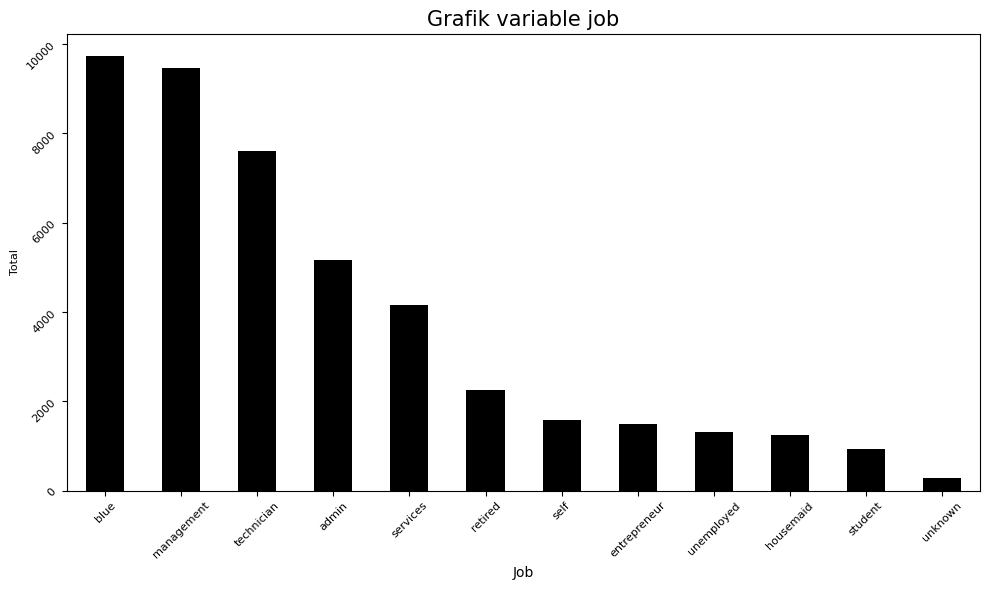

In [59]:
# Buat histogram untuk kolom job
#warna hijau
#data1['job'].value_counts().plot(kind='bar', figsize = (10,6), color = 'green')
data1['job'].value_counts().plot(kind='bar', figsize = (10, 6), color = 'black')

# Tambahkan judul
plt.title('Grafik variable job',  fontsize = 15)
plt.xlabel('Job',fontsize = 10)
plt.ylabel('Total', fontsize =8)

# Tampilkan grafik (di miringkakn x sm y nya dengan ticks)
# x dan y ticks = 8
# miringkan ticks 45 drjat
# berikan agar layout keren dnegan fungsi tight
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(rotation = 45, fontsize = 8)
plt.tight_layout()
plt.show